In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importations bases packages et de fonctions utiles pour ce projet


Voici les principales bibliothèques utilisées dans ce projet :

1. **pandas** : Manipulation des tableaux de données.
2. **numpy** : Calculs numériques.
3. **matplotlib** et **seaborn** : Visualisation des données.
4. **scikit-learn** : Algorithmes de machine learning et pipelines.
5. **Feature-Engine** : Traitement avancé des données et ingénierie des features.
6. **evidently** : Détection de drift et monitoring des données en production.
7. **MLflow** : Suivi des expériences et gestion des modèles.

Ces bibliothèques assurent un traitement complet et optimisé des données, depuis l'exploration jusqu'au déploiement.
- Toutes ces librairies seront utilisées au cours du projet sur les differents notebook a chaque debut de section il ya une partie importation des donnnées nécessaires a notre travail


**Librairies **bold text** nécessaires**

Dans cette section, nous chargeons les librairies essentielles pour l'analyse et la préparation des données, ainsi que pour la visualisation.

**Librairies pour le traitement des données**
- **pandas** : Manipulation des dataframes.
- **numpy** : Calculs numériques et gestion des tableaux.
- **scipy.stats** : Analyse statistique.
- **datetime** : Gestion des dates et heures.

**Librairies pour la visualisation**
- **seaborn** : Visualisation des données avec des graphiques attractifs.
- **matplotlib.pyplot** : Bibliothèque de base pour la visualisation.

**Autres paramètres utiles**
- Désactivation des warnings pour une meilleure lisibilité.
- Paramètres de visualisation (taille des figures, style, palette de couleurs).
- Suppression de l'affichage en notation scientifique pour les nombres.



## packages de base

In [3]:
!pip install feature-engine
!pip install scikit-learn==1.1.3


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.0/375.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 52.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.29.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.3 which is incompatible.
feature-engine 1.8.2 requires scikit-learn>=1.4.0, but you have scikit-learn 1.1.3 which is incompatible.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.1.3 which is incompatible.



**Feature-Engine**

**Présentation :**
Feature-Engine est une bibliothèque Python dédiée à l'ingénierie des features. Elle offre une collection d'outils pratiques pour le traitement et la transformation des données, permettant de simplifier et d'optimiser les étapes de prétraitement. Elle est construite pour s'intégrer facilement avec des bibliothèques populaires comme pandas et scikit-learn.

**Fonctionnalités principales :**
1. **Gestion des valeurs manquantes** :
   - Suppression ou imputation (moyenne, médiane, mode, valeur arbitraire, etc.).
2. **Transformation des variables** :
   - Encodage catégoriel, logarithme, racine carrée, puissance.
3. **Création de variables** :
   - Binning (regroupement par intervalles).
   - Variables indicatrices (dummies) ou cyclicité (trigonométrie sur les dates).
4. **Sélection de variables** :
   - Sélection des features par importance, variance, ou autres critères.
5. **Intégration scikit-learn** :
   - Toutes les transformations peuvent être intégrées dans un pipeline scikit-learn.

**Pourquoi utiliser Feature-Engine ?**
Dans notre projet, nous en aurons besoin pour :
- **Traiter les valeurs manquantes** de manière optimale et automatisée.
- **Encoder les variables catégorielles** sans perdre d'informations.
- **Transformer les variables numériques** (logarithme ou standardisation) pour stabiliser les distributions.
- **Effectuer une sélection de variables** afin d'éliminer les features peu pertinentes.

In [4]:
from feature_engine.imputation import MeanMedianImputer

In [5]:
# Importation des librairies nécessaires
import warnings
import pandas as pd
import numpy as np
import scipy.stats as stats
from datetime import datetime
import sklearn

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = 6, 4

# Configuration des styles pour Seaborn
sns.set_style("ticks")
sns.color_palette("Greens", as_cmap=True)  # Palette verte

# Paramètres d'affichage pour les données
pd.set_option('display.float_format', '{:,.2f}'.format)  # Pas de notation scientifique

# Suppression des warnings pour une meilleure lisibilité
warnings.filterwarnings('ignore')

# Affichage des versions des librairies utilisées
print("pandas version :", pd.__version__)
print("numpy version :", np.__version__)
print("seaborn version :", sns.__version__)


pandas version : 2.2.2
numpy version : 1.26.4
seaborn version : 0.13.2


## fonctions utilisées au cours du notebook

In [6]:
# Fonction pour tracer des graphiques à barres pour une variable qualitative
# La palette de couleurs par défaut est définie sur des tons vert-bleu.
# Si aucune couleur n'est spécifiée, la palette par défaut sera utilisée.
def graphique_barre(df, var, couleur='Greens', titre="", taille=(10, 6)):
    """
    df : DataFrame contenant les données
    var : Nom de la variable qualitative à analyser (colonne du DataFrame)
    couleur : Palette de couleurs ou dictionnaire (par défaut 'Greens')
    titre : Titre du graphique
    taille : Tuple représentant la taille du graphique (par défaut (10, 6))
    """

    # Création du graphique
    fig, ax = plt.subplots(figsize=taille)

    # Tracé du graphique à barres
    sns.countplot(
        data=df,           # DataFrame
        x=var,             # Variable qualitative
        palette=couleur,   # Palette de couleurs
        order=df[var].value_counts().index,  # Ordre des modalités par fréquence
        ax=ax              # Axes du graphique
    )

    # Ajout du titre
    plt.title(titre, loc="center", fontsize=18, fontstyle='italic')

    # Affichage du graphique
    plt.show()


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

def comparaison_categorie(train_df, test_df, var, titre_train, titre_test, taille=(12, 5)):
    """
    Trace des graphiques côte à côte pour une variable catégorielle dans deux datasets,
    avec annotations pour afficher les pourcentages et les nombres sur chaque barre.

    Parameters:
    - train_df : DataFrame d'entraînement
    - test_df : DataFrame de test
    - var : Nom de la variable catégorielle à analyser
    - titre_train : Titre pour le graphique du dataset d'entraînement
    - titre_test : Titre pour le graphique du dataset de test
    - taille : Taille de la figure (par défaut (12, 5))
    """
    # Configuration de la figure pour les subplots
    fig, axes = plt.subplots(1, 2, figsize=taille, sharey=True)  # 1 ligne, 2 colonnes

    # Graphique pour le dataset d'entraînement
    train_plot = sns.countplot(
        data=train_df,
        x=var,
        palette='Blues',  # Palette bleue pour X_train
        order=train_df[var].value_counts().index,
        ax=axes[0]
    )
    axes[0].set_title(titre_train, fontsize=14, fontweight='bold')
    axes[0].set_xlabel(var, fontsize=12)
    axes[0].set_ylabel("Nombre", fontsize=12)

    # Ajout des annotations pour le dataset d'entraînement
    total_train = len(train_df)
    for patch in train_plot.patches:
        count = patch.get_height()
        percentage = 100 * count / total_train
        x = patch.get_x() + patch.get_width() / 2
        y = patch.get_height()
        train_plot.annotate(f'{count}\n({percentage:.1f}%)', (x, y), ha='center', fontsize=10)

    # Graphique pour le dataset de test
    test_plot = sns.countplot(
        data=test_df,
        x=var,
        palette='Greens',  # Palette verte pour X_test
        order=test_df[var].value_counts().index,
        ax=axes[1]
    )
    axes[1].set_title(titre_test, fontsize=14, fontweight='bold')
    axes[1].set_xlabel(var, fontsize=12)
    axes[1].set_ylabel("")

    # Ajout des annotations pour le dataset de test
    total_test = len(test_df)
    for patch in test_plot.patches:
        count = patch.get_height()
        percentage = 100 * count / total_test
        x = patch.get_x() + patch.get_width() / 2
        y = patch.get_height()
        test_plot.annotate(f'{count}\n({percentage:.1f}%)', (x, y), ha='center', fontsize=10)

    # Ajustement des espacements et affichage
    plt.tight_layout()
    plt.show()


In [8]:
def barplot_unique_base(df, var, titre, taille=(8, 6)):
    """
    Trace un barplot pour une variable catégorielle d'une base unique
    avec une palette spécifique pour la base donnée.

    Parameters:
    - df : DataFrame contenant la variable.
    - var : Nom de la variable catégorielle à analyser.
    - titre : Titre du graphique.
    - taille : Taille de la figure (par défaut (8, 6)).
    """
    plt.figure(figsize=taille)
    sns.countplot(
        data=df,
        x=var,
        palette='Purples',  # Palette dédiée à la base
        order=df[var].value_counts().index
    )
    plt.title(titre, fontsize=14, fontweight='bold')
    plt.xlabel(var, fontsize=12)
    plt.ylabel("Nombre d'observations", fontsize=12)
    plt.xticks(rotation=45, fontsize=10, ha='right')
    plt.tight_layout()
    plt.show()

In [9]:
def barplot_unique_base(df, var, titre, taille=(8, 6)):
    """
    Trace un barplot pour une variable catégorielle d'une base unique
    avec une palette spécifique pour la base donnée.

    Parameters:
    - df : DataFrame contenant la variable.
    - var : Nom de la variable catégorielle à analyser.
    - titre : Titre du graphique.
    - taille : Taille de la figure (par défaut (8, 6)).
    """
    plt.figure(figsize=taille)
    sns.countplot(
        data=df,
        x=var,
        palette='Purples',  # Palette dédiée à la base
        order=df[var].value_counts().index
    )
    plt.title(titre, fontsize=14, fontweight='bold')
    plt.xlabel(var, fontsize=12)
    plt.ylabel("Nombre d'observations", fontsize=12)
    plt.xticks(rotation=45, fontsize=10, ha='right')
    plt.tight_layout()
    plt.show()

In [10]:
def calculate_percentage(df, column_name):
    # Calcul du nombre total d'occurrences pour chaque valeur
    value_counts = df[column_name].value_counts(dropna=False)  # Inclure les NaN dans le calcul

    # Conversion des comptages en pourcentage
    percentages = (value_counts / len(df)) * 100

    # Conversion en DataFrame pour un affichage plus clair
    percentages_df = percentages.reset_index()
    percentages_df.columns = [column_name, 'Percentage']
    return percentages_df

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

def diagnostic_plots(df, variable, title):
    """
    Fonction pour tracer un histogramme, un Q-Q plot, et un boxplot pour une variable donnée.

    Parameters:
    - df : DataFrame contenant les données
    - variable : Nom de la variable à analyser
    - title : Titre principal pour les graphiques
    """
    # Configuration du style et de la taille de la figure
    sns.set(style="ticks", rc={'figure.figsize': (20, 4)})

    # Histogramme avec palette verte
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30, color='green')
    plt.title('Histogram', fontsize=14)

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles', fontsize=12)

    # Boxplot avec palette bleue
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable], color='blue')
    plt.title('Boxplot', fontsize=14)

    # Titre principal
    plt.suptitle(f"{title}",
                 y=1.05, fontsize=20, fontstyle='italic', color="darkgreen")

    # Affichage
    plt.tight_layout()
    plt.show()


In [12]:
def high_correlation(mat_corr, corr_value = 0.7):
    for i in mat_corr.columns:
        cr = mat_corr.loc[i].loc[(mat_corr.loc[i] >= corr_value) | (mat_corr.loc[i] <= -corr_value)].drop(i)
        if len(cr) > 0:
            print(i)
            print("-------------------------------")
            print(cr.sort_values(ascending=False))
            print("\n")

In [13]:
# Categorical Variables
def cat_analyzer(dataframe, variable):
    print(variable)
    print(pd.DataFrame({
            "COUNT": dataframe[variable].value_counts(),
            "RATIO": dataframe[variable].value_counts() / len(dataframe) *100}), end="\n\n\n")


## Description des fichiers de données et importation des données


Voici les différents fichiers utilisés pour le projet :

- **application_{train|test}.csv** : Table principale. Chaque ligne représente un prêt. Dans `train`, la colonne `TARGET` indique si le client a fait défaut. Dans `test`, cette colonne est absente.

- **bureau.csv** : Crédits passés des clients auprès d'autres institutions financières. Une ligne correspond à un crédit précédent.

- **bureau_balance.csv** : Historique mensuel des soldes pour les crédits présents dans `bureau.csv`. Une ligne correspond à un mois d’historique pour un crédit.

- **POS_CASH_balance.csv** : Historique mensuel des soldes pour les crédits à la consommation ou prêts en espèces contractés auprès de Home Credit. Une ligne correspond à un mois d’historique pour un prêt.

- **credit_card_balance.csv** : Historique mensuel des soldes des cartes de crédit contractées auprès de Home Credit. Une ligne correspond à un mois d’historique pour une carte.

- **previous_application.csv** : Liste des demandes de crédit précédentes des clients. Une ligne correspond à une demande de prêt passée.

- **installments_payments.csv** : Historique des remboursements (ou non) des crédits précédents. Une ligne correspond à un versement réalisé ou manqué.

- **HomeCredit_columns_description.csv** : Descriptions des colonnes pour tous les fichiers.

In [14]:
# Définition du chemin des fichiers
csv_path = '/content/drive/My Drive/Projets Master/Projet 7/Projet+Mise+en+prod+-+home-credit-default-risk/'

# Lecture des fichiers avec le chemin défini
X_train = pd.read_csv(csv_path + 'application_train.csv')
X_test = pd.read_csv(csv_path + 'application_test.csv')
bureau = pd.read_csv(csv_path + 'bureau.csv')
bureau_balance = pd.read_csv(csv_path + 'bureau_balance.csv')
pos_cash = pd.read_csv(csv_path + 'POS_CASH_balance.csv')
credit_card = pd.read_csv(csv_path + 'credit_card_balance.csv')
previous_application = pd.read_csv(csv_path + 'previous_application.csv')
installments_payments = pd.read_csv(csv_path + 'installments_payments.csv')

# Affichage d'un message de confirmation
print("Tous les fichiers ont été chargés avec succès.")


Tous les fichiers ont été chargés avec succès.


In [15]:
# Chargement du fichier HomeCredit_columns_description.csv
homecredit_columns_description = pd.read_csv(csv_path+'HomeCredit_columns_description.csv', encoding='latin1')

# Affichage complet de la table
pd.set_option('display.max_rows', None)  # Permet d'afficher toutes les lignes
pd.set_option('display.max_columns', None)  # Permet d'afficher toutes les colonnes
print(homecredit_columns_description)

     Unnamed: 0                         Table                           Row  \
0             1  application_{train|test}.csv                    SK_ID_CURR   
1             2  application_{train|test}.csv                        TARGET   
2             5  application_{train|test}.csv            NAME_CONTRACT_TYPE   
3             6  application_{train|test}.csv                   CODE_GENDER   
4             7  application_{train|test}.csv                  FLAG_OWN_CAR   
5             8  application_{train|test}.csv               FLAG_OWN_REALTY   
6             9  application_{train|test}.csv                  CNT_CHILDREN   
7            10  application_{train|test}.csv              AMT_INCOME_TOTAL   
8            11  application_{train|test}.csv                    AMT_CREDIT   
9            12  application_{train|test}.csv                   AMT_ANNUITY   
10           13  application_{train|test}.csv               AMT_GOODS_PRICE   
11           14  application_{train|test}.csv       

**Analyse et Préparation des Données pour la Modélisation**

Dans ce notebook, nous allons analyser et préparer les différentes bases de données fournies dans le cadre du projet. L'objectif est d'obtenir des datasets `X_train` et `X_test` nettoyés, avec les bonnes colonnes, prêts pour la modélisation. Chaque section sera dédiée à une base de données spécifique.


# Analyse de la base principale : application_train




**Objectif**
La base **application_train** contient la variable cible `TARGET` qui indique si le client a fait défaut (1) ou non (0). Cette base sera utilisée comme point de départ pour la modélisation.

** Étapes prévues**
- Analyse des variables.
- Nettoyage des valeurs manquantes et aberrantes.
- Préparation des features importantes pour la modélisation.

## Vérification des doublons dans les identifiants des prêts
Nous vérifions s'il existe des identifiants de prêts uniques dupliqués dans la base `X_train`. Ensuite, nous calculons la répartition entre les échantillons d'entraînement et de test.


In [16]:
print(
    f"Nombre d'identifiants de prêts uniques dupliqués : {X_train.duplicated(subset=['SK_ID_CURR']).sum()}")
print(
    f"Nombre d'identifiants de prêts uniques dupliqués : {X_test.duplicated(subset=['SK_ID_CURR']).sum()}")


Nombre d'identifiants de prêts uniques dupliqués : 0
Nombre d'identifiants de prêts uniques dupliqués : 0


In [17]:

# Affichage des premières lignes de la table `X_train`
print("\nPremières lignes de la base X_train :")
display(X_train.head())

# Affichage des premières lignes de la table `X_test`
print("\nPremières lignes de la base X_test :")
display(X_test.head())


Premières lignes de la base X_train :


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  \
0               Y             0        202,500.00   406,597.50    24,700.50   
1               N             0        270,000.00 1,293,502.50    35,698.50   
2               Y             0         67,500.00   135,000.00     6,750.00   
3               Y             0        135,000.00   312,682.50    29,686.50   
4               Y             0        121,500.00   513,000.00    21,865.50   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0       351,000.00   Unaccompanied          Working   
1     1,129,500.00          Family    State servant   
2       135,000.00   Unaccompanied          Working   
3       297,000.00   Unaccompanied          Working   
4       513,000.00   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                        0.02       -9461           -637          -3,648.00   
1                        0.00      -16765          -1188          -1,186.00   
2                        0.01      -19046           -225          -4,260.00   
3                        0.01      -19005          -3039          -9,833.00   
4                        0.03      -19932          -3038          -4,311.00   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531        26.00           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers             1.00   
1                 1           1           0      Core staff             2.00   
2                 1           1           0        Laborers             1.00   
3                 1           0           0        Laborers             2.00   
4                 1           0           0      Core staff             1.00   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                  


Premières lignes de la base X_test :


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0        135,000.00   568,800.00    20,560.50       450,000.00   
1             0         99,000.00   222,768.00    17,370.00       180,000.00   
2             0        202,500.00   663,264.00    69,777.00       630,000.00   
3             2        315,000.00 1,575,000.00    49,018.50     1,575,000.00   
4             1        180,000.00   625,500.00    32,067.00       625,500.00   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working               Higher education   
1   Unaccompanied          Working  Secondary / secondary special   
2             NaN          Working               Higher education   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0            Married  House / apartment                        0.02   
1            Married  House / apartment                        0.04   
2            Married  House / apartment                        0.02   
3            Married  House / apartment                        0.03   
4            Married  House / apartment                        0.01   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0      -19241          -2329          -5,170.00             -812          NaN   
1      -18064          -4469          -9,118.00            -1623          NaN   
2      -20038          -4458          -2,175.00            -3503         5.00   
3      -13976          -1866          -2,000.00            -4208          NaN   
4      -13040          -2191          -4,000.00            -4262        16.00   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           0   
1           1               1                0                 1           0   
2           1               1                0                 1           0   
3           1               1                0                 1           1   
4           1               1                1                 1           0   

   FLAG_EMAIL     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           1                 NaN             2.00                     2   
1           0  Low-skill Laborers             2.00                     2   
2           0             Drivers             2.00                     2   
3           0         Sales staff             4.00                     2   
4           0                 NaN             3.00                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                    TUESDAY   
1                            2                     FRIDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                     FRIDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       18                           0   
1                        9                           0   
2                       14                           0   
3                       11                           0   
4                        5                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0             

# 1.. Visualisation de la variable cible `TARGET`
Nous affichons un graphique représentant la répartition des clients en difficulté de paiement (`TARGET = 1`) et ceux sans difficulté (`TARGET = 0`).

Cela permet de visualiser l'équilibre ou le déséquilibre entre les deux classes.


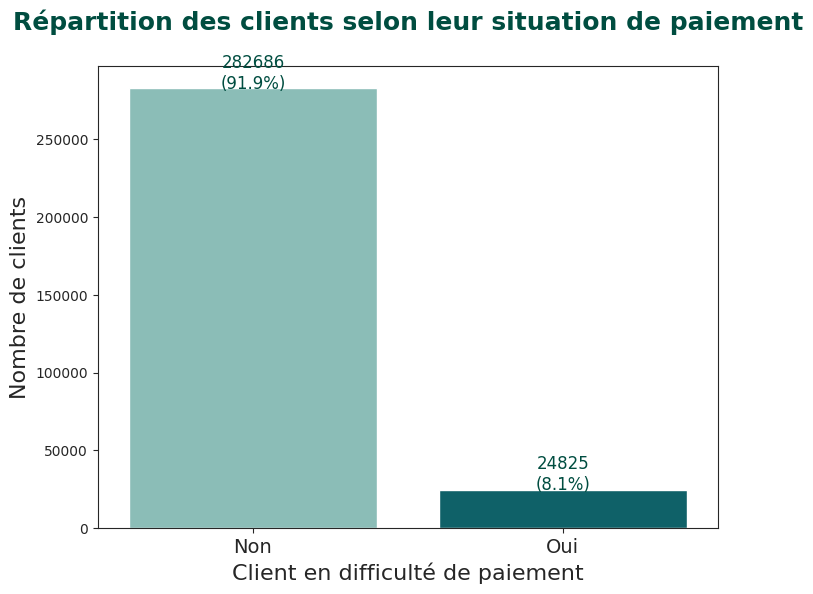

In [18]:
colors = ['#83c5be', '#006d77']  # Palette verte/bleue
# Dictionnaire pour mapper les valeurs de TARGET en "Oui" et "Non"
loan_map = {
    1: "Oui",  # TARGET = 1 : client en difficulté de paiement
    0: "Non"   # TARGET = 0 : client sans difficulté de paiement
}
# Création du graphique avec des annotations pour les nombres et pourcentages
plt.figure(figsize=(8, 6))
sns.countplot(
    data=X_train,           # Dataset utilisé
    x='TARGET',             # Colonne cible
    palette=colors,         # Palette de couleurs
    order=[0, 1]            # Ordre des valeurs (0 puis 1)
)

# Ajout des labels pour les axes
plt.xticks(ticks=[0, 1], labels=[loan_map[0], loan_map[1]], fontsize=14)
plt.xlabel("Client en difficulté de paiement", fontsize=16)
plt.ylabel("Nombre de clients", fontsize=16)

# Titre principal
plt.title(
    "Répartition des clients selon leur situation de paiement\n",
    fontsize=18, fontweight='bold', color="#004d40", loc="center"
)

# Calcul des pourcentages et ajout des annotations
total = len(X_train)  # Total des observations
for patch in plt.gca().patches:
    count = int(patch.get_height())  # Nombre de clients dans chaque catégorie
    percentage = 100 * count / total  # Pourcentage correspondant
    x = patch.get_x() + patch.get_width() / 2  # Position x pour l'annotation
    y = patch.get_height()  # Position y pour l'annotation
    plt.text(x, y, f"{count}\n({percentage:.1f}%)", ha="center", fontsize=12, color="#004d40")

# Affichage du graphique
plt.show()


#### Répartition des clients selon leur situation de paiement

### Observations :
- **91.9% des clients** n'ont pas rencontré de difficultés de paiement (TARGET = 0).
- **8.1% des clients** ont rencontré des difficultés de paiement (TARGET = 1).

Cette répartition montre que la base est fortement **déséquilibrée**, avec une sur-représentation des clients sans difficulté de paiement. Ce déséquilibre devra être pris en compte lors de la modélisation pour éviter que le modèle favorise excessivement la classe majoritaire.

### Étapes suivantes :
- Analyser les variables explicatives pour identifier les facteurs qui influencent la variable cible (`TARGET`).
- Traiter le déséquilibre des classes (via des techniques comme le sur-échantillonnage, le sous-échantillonnage, ou des algorithmes adaptés tels que XGBoost).
- On va faire ceci apres notre analyse exploratoire mais eon garde ces remarques en tete

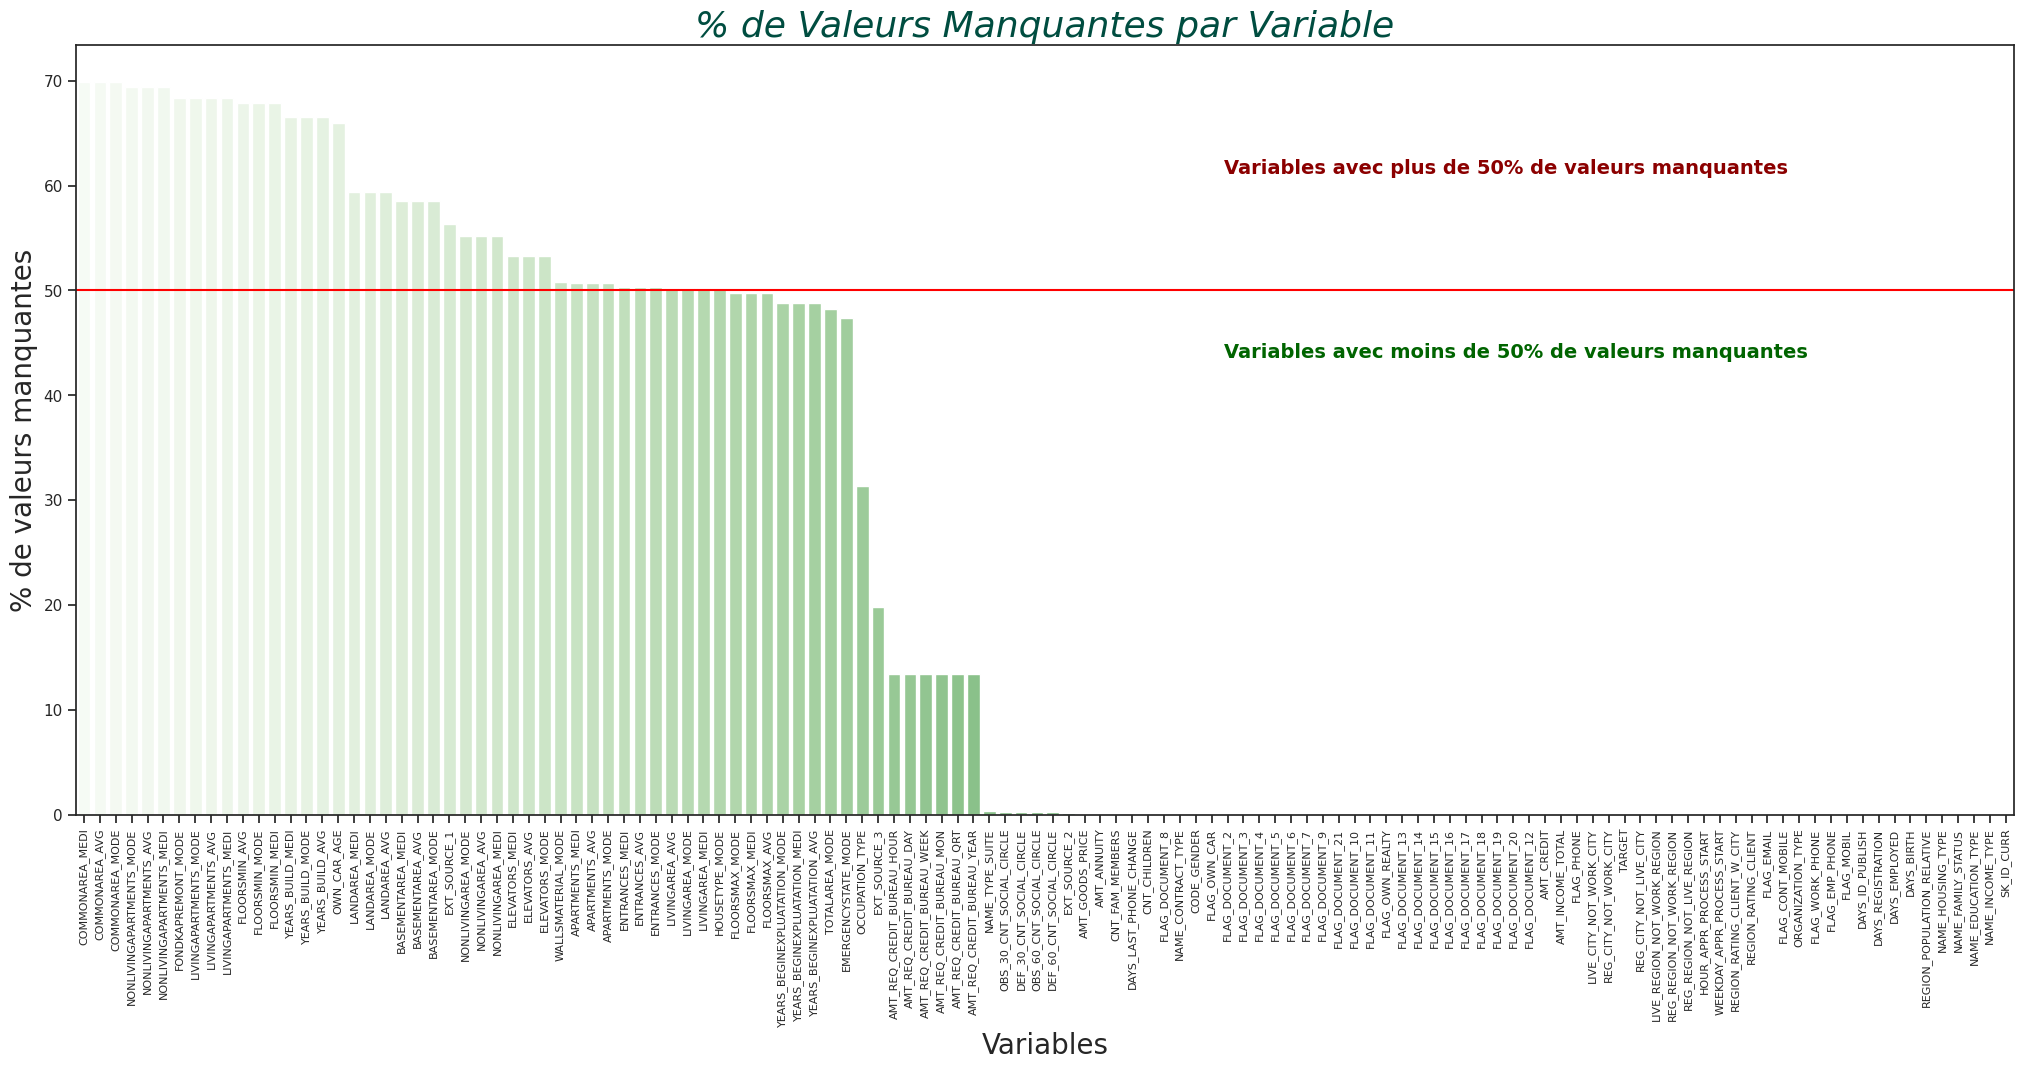

In [19]:
# Configuration de Seaborn avec une palette verte
sns.set(style="ticks", rc={'figure.figsize': (25, 10)}, palette="Greens")
thresh_na = 50  # Seuil en pourcentage pour les valeurs manquantes

# Calcul du pourcentage de valeurs manquantes
perc = (X_train.isnull().sum() / X_train.shape[0]) * 100
perc = perc.sort_values(ascending=False)

# Création du graphique avec Seaborn
ax = plt.subplot(1, 1, 1)
ax = sns.barplot(x=X_train.columns, y=perc, palette="Greens")

# Ajout de la ligne de seuil
plt.axhline(y=thresh_na, color='r', linestyle='-')

# Texte explicatif au-dessus du seuil
plt.text(len(X_train.isnull().sum() / len(X_train)) / 1.7,
         thresh_na + 12.5,
         'Variables avec plus de %s%s de valeurs manquantes' % (thresh_na, '%'),
         fontsize=14, weight='bold', color='darkred', ha='left', va='top')

# Texte explicatif en-dessous du seuil
plt.text(len(X_train.isnull().sum() / len(X_train)) / 1.7,
         thresh_na - 5,
         'Variables avec moins de %s%s de valeurs manquantes' % (thresh_na, '%'),
         fontsize=14, weight='bold', color='darkgreen', ha='left', va='top')

# Ajout des titres et labels
ax.set_title('% de Valeurs Manquantes par Variable', loc="center", fontsize=26, fontstyle='italic', color="#004d40")
ax.set_xlabel('Variables', fontsize=20)
ax.set_ylabel('% de valeurs manquantes', fontsize=20)
ax.set_xticklabels(perc.index, rotation=90, fontsize=8)

# Affichage du graphique
plt.show()


### Analyse des variables avec des valeurs manquantes
Nous allons analyser les variables ayant un grand nombre de valeurs manquantes (> 50%) et décider de leur traitement. Cette étape est cruciale pour nettoyer le dataset et réduire les biais éventuels dus à des colonnes trop incomplètes.


In [20]:
# Recherche des variables ayant plus de 50% de valeurs manquantes
# Ici, je vais identifier toutes les colonnes avec un pourcentage élevé de données manquantes.
vars_with_na_1 = [var for var in X_train.columns if X_train[var].isnull().mean() > 0.5]
print(vars_with_na_1)

['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE']


In [21]:
# Identification du type des variables ayant des données manquantes
# Je vérifie si ces colonnes sont numériques ou catégorielles pour guider mon nettoyage.
X_train[vars_with_na_1].dtypes

X_train[vars_with_na_1].dtypes

OWN_CAR_AGE                 float64
EXT_SOURCE_1                float64
APARTMENTS_AVG              float64
BASEMENTAREA_AVG            float64
YEARS_BUILD_AVG             float64
COMMONAREA_AVG              float64
ELEVATORS_AVG               float64
ENTRANCES_AVG               float64
FLOORSMIN_AVG               float64
LANDAREA_AVG                float64
LIVINGAPARTMENTS_AVG        float64
LIVINGAREA_AVG              float64
NONLIVINGAPARTMENTS_AVG     float64
NONLIVINGAREA_AVG           float64
APARTMENTS_MODE             float64
BASEMENTAREA_MODE           float64
YEARS_BUILD_MODE            float64
COMMONAREA_MODE             float64
ELEVATORS_MODE              float64
ENTRANCES_MODE              float64
FLOORSMIN_MODE              float64
LANDAREA_MODE               float64
LIVINGAPARTMENTS_MODE       float64
LIVINGAREA_MODE             float64
NONLIVINGAPARTMENTS_MODE    float64
NONLIVINGAREA_MODE          float64
APARTMENTS_MEDI             float64
BASEMENTAREA_MEDI           float64
YEARS_BUILD_MEDI            float64
COMMONAREA_MEDI             float64
ELEVATORS_MEDI              float64
ENTRANCES_MEDI              float64
FLOORSMIN_MEDI              float64
LANDAREA_MEDI               float64
LIVINGAPARTMENTS_MEDI       float64
LIVINGAREA_MEDI             float64
NONLIVINGAPARTMENTS_MEDI    float64
NONLIVINGAREA_MEDI          float64
FONDKAPREMONT_MODE           object
HOUSETYPE_MODE               object
WALLSMATERIAL_MODE           object
dtype: object

In [22]:
# Répartition des valeurs dans les colonnes sélectionnées
# Je vais analyser la distribution des données (valeurs manquantes incluses)
# pour comprendre leur structure et leur utilité potentielle.

X_train['FONDKAPREMONT_MODE'].value_counts(normalize=True, dropna=False) * 100
X_train['HOUSETYPE_MODE'].value_counts(normalize=True, dropna=False) * 100
X_train['WALLSMATERIAL_MODE'].value_counts(normalize=True, dropna=False) * 100

WALLSMATERIAL_MODE
NaN            50.84
Panel          21.48
Stone, brick   21.08
Block           3.01
Wooden          1.74
Mixed           0.75
Monolithic      0.58
Others          0.53
Name: proportion, dtype: float64

In [23]:
# Résumé statistique des variables numériques ayant des valeurs manquantes
# Je vérifie leurs statistiques descriptives pour évaluer leur importance.
X_train[vars_with_na_1].describe(include=[np.number]).T


count  mean   std  min  25%  50%   75%   max
OWN_CAR_AGE              104,582.00 12.06 11.94 0.00 5.00 9.00 15.00 91.00
EXT_SOURCE_1             134,133.00  0.50  0.21 0.01 0.33 0.51  0.68  0.96
APARTMENTS_AVG           151,450.00  0.12  0.11 0.00 0.06 0.09  0.15  1.00
BASEMENTAREA_AVG         127,568.00  0.09  0.08 0.00 0.04 0.08  0.11  1.00
YEARS_BUILD_AVG          103,023.00  0.75  0.11 0.00 0.69 0.76  0.82  1.00
COMMONAREA_AVG            92,646.00  0.04  0.08 0.00 0.01 0.02  0.05  1.00
ELEVATORS_AVG            143,620.00  0.08  0.13 0.00 0.00 0.00  0.12  1.00
ENTRANCES_AVG            152,683.00  0.15  0.10 0.00 0.07 0.14  0.21  1.00
FLOORSMIN_AVG             98,869.00  0.23  0.16 0.00 0.08 0.21  0.38  1.00
LANDAREA_AVG             124,921.00  0.07  0.08 0.00 0.02 0.05  0.09  1.00
LIVINGAPARTMENTS_AVG      97,312.00  0.10  0.09 0.00 0.05 0.08  0.12  1.00
LIVINGAREA_AVG           153,161.00  0.11  0.11 0.00 0.05 0.07  0.13  1.00
NONLIVINGAPARTMENTS_AVG   93,997.00  0.01  0.05 0.00 0.00 0.00  0.00  1.00
NONLIVINGAREA_AVG        137,829.00  0.03  0.07 0.00 0.00 0.00  0.03  1.00
APARTMENTS_MODE          151,450.00  0.11  0.11 0.00 0.05 0.08  0.14  1.00
BASEMENTAREA_MODE        127,568.00  0.09  0.08 0.00 0.04 0.07  0.11  1.00
YEARS_BUILD_MODE         103,023.00  0.76  0.11 0.00 0.70 0.76  0.82  1.00
COMMONAREA_MODE           92,646.00  0.04  0.07 0.00 0.01 0.02  0.05  1.00
ELEVATORS_MODE           143,620.00  0.07  0.13 0.00 0.00 0.00  0.12  1.00
ENTRANCES_MODE           152,683.00  0.15  0.10 0.00 0.07 0.14  0.21  1.00
FLOORSMIN_MODE            98,869.00  0.23  0.16 0.00 0.08 0.21  0.38  1.00
LANDAREA_MODE            124,921.00  0.06  0.08 0.00 0.02 0.05  0.08  1.00
LIVINGAPARTMENTS_MODE     97,312.00  0.11  0.10 0.00 0.05 0.08  0.13  1.00
LIVINGAREA_MODE          153,161.00  0.11  0.11 0.00 0.04 0.07  0.13  1.00
NONLIVINGAPARTMENTS_MODE  93,997.00  0.01  0.05 0.00 0.00 0.00  0.00  1.00
NONLIVINGAREA_MODE       137,829.00  0.03  0.07 0.00 0.00 0.00  0.02  1.00
APARTMENTS_MEDI          151,450.00  0.12  0.11 0.00 0.06 0.09  0.15  1.00
BASEMENTAREA_MEDI        127,568.00  0.09  0.08 0.00 0.04 0.08  0.11  1.00
YEARS_BUILD_MEDI         103,023.00  0.76  0.11 0.00 0.69 0.76  0.83  1.00
COMMONAREA_MEDI           92,646.00  0.04  0.08 0.00 0.01 0.02  0.05  1.00
ELEVATORS_MEDI           143,620.00  0.08  0.13 0.00 0.00 0.00  0.12  1.00
ENTRANCES_MEDI           152,683.00  0.15  0.10 0.00 0.07 0.14  0.21  1.00
FLOORSMIN_MEDI            98,869.00  0.23  0.16 0.00 0.08 0.21  0.38  1.00
LANDAREA_MEDI            124,921.00  0.07  0.08 0.00 0.02 0.05  0.09  1.00
LIVINGAPARTMENTS_MEDI     97,312.00  0.10  0.09 0.00 0.05 0.08  0.12  1.00
LIVINGAREA_MEDI          153,161.00  0.11  0.11 0.00 0.05 0.07  0.13  1.00
NONLIVINGAPARTMENTS_MEDI  93,997.00  0.01  0.05 0.00 0.00 0.00  0.00  1.00
NONLIVINGAREA_MEDI       137,829.00  0.03  0.07 0.00 0.00 0.00  0.03  1.00

In [24]:
# Suppression des colonnes identifiées comme ayant trop de données manquantes
# Ces colonnes sont retirées pour éviter d’introduire du bruit dans le modèle.
X_train.drop(labels=vars_with_na_1, axis=1, inplace=True)
X_train.shape

(307511, 81)

**Démarche :**
1. Nous avons identifié les variables ayant plus de 50% de valeurs manquantes.
2. Ensuite, nous avons analysé la nature de ces variables (numériques ou catégorielles) et leur répartition.
3. Après cette analyse, nous avons décidé de supprimer les variables peu utiles ou trop incomplètes pour garantir la qualité de nos données.
4. Enfin, nous vérifions la nouvelle taille du dataset après cette étape de nettoyage.


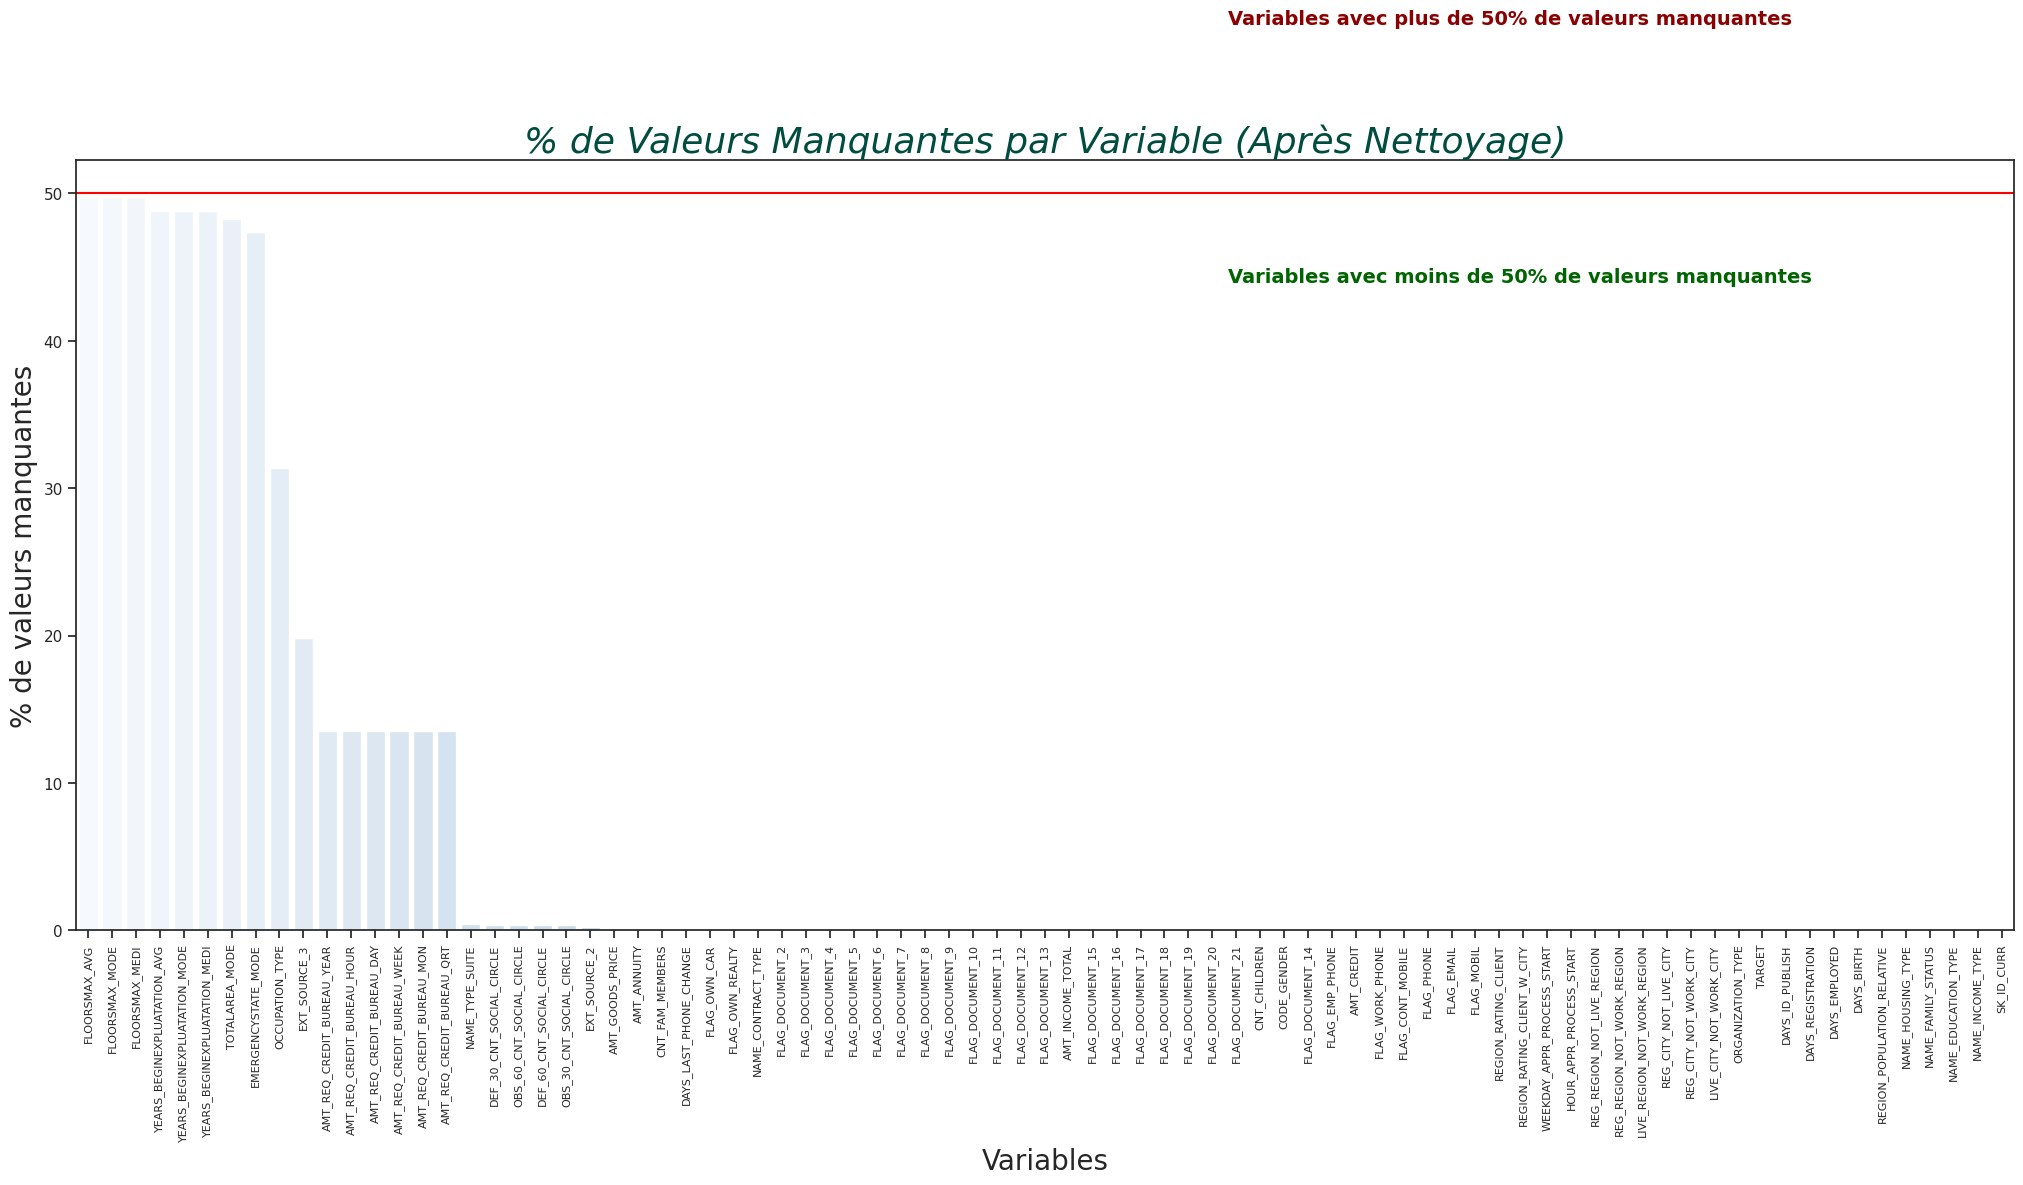

In [25]:
# Configuration de Seaborn avec une palette verte pour le nouveau dataset
sns.set(style="ticks", rc={'figure.figsize': (25, 10)}, palette="Blues")
thresh_na = 50  # Seuil en pourcentage pour les valeurs manquantes

# Calcul du pourcentage de valeurs manquantes dans le dataset nettoyé
perc_new = (X_train.isnull().sum() / X_train.shape[0]) * 100
perc_new = perc_new.sort_values(ascending=False)

# Création du graphique avec Seaborn
ax = plt.subplot(1, 1, 1)
ax = sns.barplot(x=X_train.columns, y=perc_new, palette="Blues")

# Ajout de la ligne de seuil
plt.axhline(y=thresh_na, color='r', linestyle='-')

# Texte explicatif au-dessus du seuil
plt.text(len(X_train.isnull().sum() / len(X_train)) / 1.7,
         thresh_na + 12.5,
         'Variables avec plus de %s%s de valeurs manquantes' % (thresh_na, '%'),
         fontsize=14, weight='bold', color='darkred', ha='left', va='top')

# Texte explicatif en-dessous du seuil
plt.text(len(X_train.isnull().sum() / len(X_train)) / 1.7,
         thresh_na - 5,
         'Variables avec moins de %s%s de valeurs manquantes' % (thresh_na, '%'),
         fontsize=14, weight='bold', color='darkgreen', ha='left', va='top')

# Ajout des titres et labels
ax.set_title('% de Valeurs Manquantes par Variable (Après Nettoyage)', loc="center", fontsize=26, fontstyle='italic', color="#004d40")
ax.set_xlabel('Variables', fontsize=20)
ax.set_ylabel('% de valeurs manquantes', fontsize=20)
ax.set_xticklabels(perc_new.index, rotation=90, fontsize=8)

# Affichage du graphique
plt.show()


In [26]:
vars_with_na_2 = [var for var in X_train.columns if X_train[var].isnull().mean() > 0.1]
print(vars_with_na_2)

['OCCUPATION_TYPE', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


In [27]:
X_train[vars_with_na_2].dtypes


OCCUPATION_TYPE                  object
EXT_SOURCE_3                    float64
YEARS_BEGINEXPLUATATION_AVG     float64
FLOORSMAX_AVG                   float64
YEARS_BEGINEXPLUATATION_MODE    float64
FLOORSMAX_MODE                  float64
YEARS_BEGINEXPLUATATION_MEDI    float64
FLOORSMAX_MEDI                  float64
TOTALAREA_MODE                  float64
EMERGENCYSTATE_MODE              object
AMT_REQ_CREDIT_BUREAU_HOUR      float64
AMT_REQ_CREDIT_BUREAU_DAY       float64
AMT_REQ_CREDIT_BUREAU_WEEK      float64
AMT_REQ_CREDIT_BUREAU_MON       float64
AMT_REQ_CREDIT_BUREAU_QRT       float64
AMT_REQ_CREDIT_BUREAU_YEAR      float64
dtype: object

In [28]:
X_train[vars_with_na_2].describe(include=[np.number]).T


count  mean  std  min  25%  50%  75%    max
EXT_SOURCE_3                 246,546.00  0.51 0.19 0.00 0.37 0.54 0.67   0.90
YEARS_BEGINEXPLUATATION_AVG  157,504.00  0.98 0.06 0.00 0.98 0.98 0.99   1.00
FLOORSMAX_AVG                154,491.00  0.23 0.14 0.00 0.17 0.17 0.33   1.00
YEARS_BEGINEXPLUATATION_MODE 157,504.00  0.98 0.06 0.00 0.98 0.98 0.99   1.00
FLOORSMAX_MODE               154,491.00  0.22 0.14 0.00 0.17 0.17 0.33   1.00
YEARS_BEGINEXPLUATATION_MEDI 157,504.00  0.98 0.06 0.00 0.98 0.98 0.99   1.00
FLOORSMAX_MEDI               154,491.00  0.23 0.15 0.00 0.17 0.17 0.33   1.00
TOTALAREA_MODE               159,080.00  0.10 0.11 0.00 0.04 0.07 0.13   1.00
AMT_REQ_CREDIT_BUREAU_HOUR   265,992.00  0.01 0.08 0.00 0.00 0.00 0.00   4.00
AMT_REQ_CREDIT_BUREAU_DAY    265,992.00  0.01 0.11 0.00 0.00 0.00 0.00   9.00
AMT_REQ_CREDIT_BUREAU_WEEK   265,992.00  0.03 0.20 0.00 0.00 0.00 0.00   8.00
AMT_REQ_CREDIT_BUREAU_MON    265,992.00  0.27 0.92 0.00 0.00 0.00 0.00  27.00
AMT_REQ_CREDIT_BUREAU_QRT    265,992.00  0.27 0.79 0.00 0.00 0.00 0.00 261.00
AMT_REQ_CREDIT_BUREAU_YEAR   265,992.00  1.90 1.87 0.00 0.00 1.00 3.00  25.00

In [29]:
X_train['OCCUPATION_TYPE'].value_counts(normalize=True, dropna=False)*100
X_train['EMERGENCYSTATE_MODE'].value_counts(normalize=True, dropna=False)*100


EMERGENCYSTATE_MODE
No    51.84
NaN   47.40
Yes    0.76
Name: proportion, dtype: float64

In [30]:
X_train.drop(labels=vars_with_na_2, axis=1, inplace=True)
X_train.shape


(307511, 65)

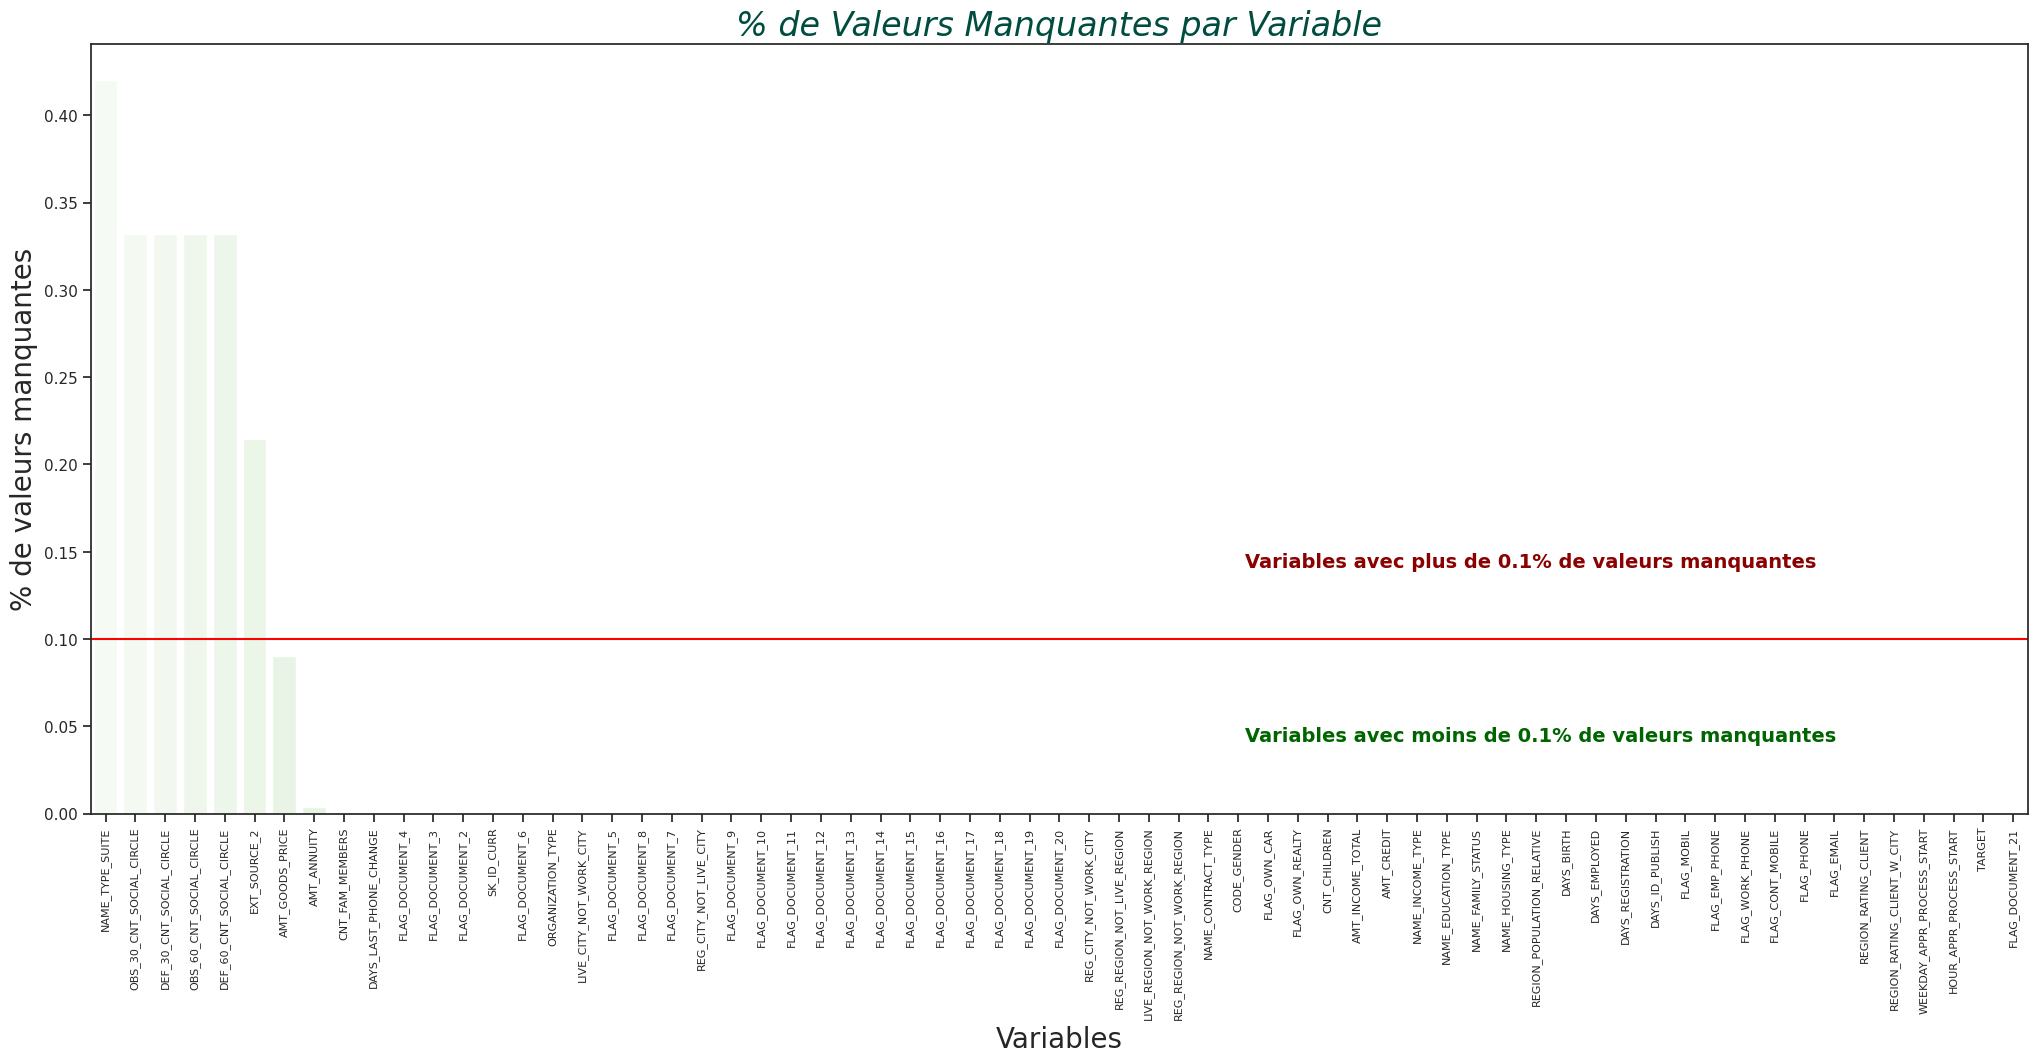

In [31]:
# Configuration de Seaborn avec une palette verte
sns.set(style="ticks", rc={'figure.figsize': (25, 10)}, palette="Greens")
thresh_na = 0.1  # Seuil en pourcentage pour les valeurs manquantes

# Calcul du pourcentage de valeurs manquantes
perc = (X_train.isnull().sum() / X_train.shape[0]) * 100
perc = perc.sort_values(ascending=False)

# Création du graphique avec Seaborn
ax = plt.subplot(1, 1, 1)
ax = sns.barplot(x=X_train.columns, y=perc, palette="Greens")

# Ajout de la ligne de seuil
plt.axhline(y=thresh_na, color='r', linestyle='-')

# Texte explicatif au-dessus du seuil
plt.text(len(X_train.isnull().sum() / len(X_train)) / 1.7,
         thresh_na + 0.05,
         'Variables avec plus de %s%s de valeurs manquantes' % (thresh_na, '%'),
         fontsize=14, weight='bold', color='darkred', ha='left', va='top')

# Texte explicatif en-dessous du seuil
plt.text(len(X_train.isnull().sum() / len(X_train)) / 1.7,
         thresh_na - 0.05,
         'Variables avec moins de %s%s de valeurs manquantes' % (thresh_na, '%'),
         fontsize=14, weight='bold', color='darkgreen', ha='left', va='top')

# Ajout des titres et labels
ax.set_title('% de Valeurs Manquantes par Variable', loc="center", fontsize=24, fontstyle='italic', color="#004d40")
ax.set_xlabel('Variables', fontsize=20)
ax.set_ylabel('% de valeurs manquantes', fontsize=20)
ax.set_xticklabels(perc.index, rotation=90, fontsize=8)

# Affichage du graphique
plt.show()


In [32]:
vars_with_na_3 = [var for var in X_train.columns if X_train[var].isnull().mean() > 0]
print(vars_with_na_3)

['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE']


In [33]:

X_train[vars_with_na_3].dtypes

AMT_ANNUITY                 float64
AMT_GOODS_PRICE             float64
NAME_TYPE_SUITE              object
CNT_FAM_MEMBERS             float64
EXT_SOURCE_2                float64
OBS_30_CNT_SOCIAL_CIRCLE    float64
DEF_30_CNT_SOCIAL_CIRCLE    float64
OBS_60_CNT_SOCIAL_CIRCLE    float64
DEF_60_CNT_SOCIAL_CIRCLE    float64
DAYS_LAST_PHONE_CHANGE      float64
dtype: object

In [34]:

X_train['NAME_TYPE_SUITE'].value_counts(normalize=True, dropna=False)*1

NAME_TYPE_SUITE
Unaccompanied     0.81
Family            0.13
Spouse, partner   0.04
Children          0.01
Other_B           0.01
NaN               0.00
Other_A           0.00
Group of people   0.00
Name: proportion, dtype: float64

In [35]:
X_train[vars_with_na_3].describe(include=[np.number]).T


count       mean        std       min  \
AMT_ANNUITY              307,499.00  27,108.57  14,493.74  1,615.50   
AMT_GOODS_PRICE          307,233.00 538,396.21 369,446.46 40,500.00   
CNT_FAM_MEMBERS          307,509.00       2.15       0.91      1.00   
EXT_SOURCE_2             306,851.00       0.51       0.19      0.00   
OBS_30_CNT_SOCIAL_CIRCLE 306,490.00       1.42       2.40      0.00   
DEF_30_CNT_SOCIAL_CIRCLE 306,490.00       0.14       0.45      0.00   
OBS_60_CNT_SOCIAL_CIRCLE 306,490.00       1.41       2.38      0.00   
DEF_60_CNT_SOCIAL_CIRCLE 306,490.00       0.10       0.36      0.00   
DAYS_LAST_PHONE_CHANGE   307,510.00    -962.86     826.81 -4,292.00   

                                25%        50%        75%          max  
AMT_ANNUITY               16,524.00  24,903.00  34,596.00   258,025.50  
AMT_GOODS_PRICE          238,500.00 450,000.00 679,500.00 4,050,000.00  
CNT_FAM_MEMBERS                2.00       2.00       3.00        20.00  
EXT_SOURCE_2                   0.39       0.57       0.66         0.85  
OBS_30_CNT_SOCIAL_CIRCLE       0.00       0.00       2.00       348.00  
DEF_30_CNT_SOCIAL_CIRCLE       0.00       0.00       0.00        34.00  
OBS_60_CNT_SOCIAL_CIRCLE       0.00       0.00       2.00       344.00  
DEF_60_CNT_SOCIAL_CIRCLE       0.00       0.00       0.00        24.00  
DAYS_LAST_PHONE_CHANGE    -1,570.00    -757.00    -274.00         0.00

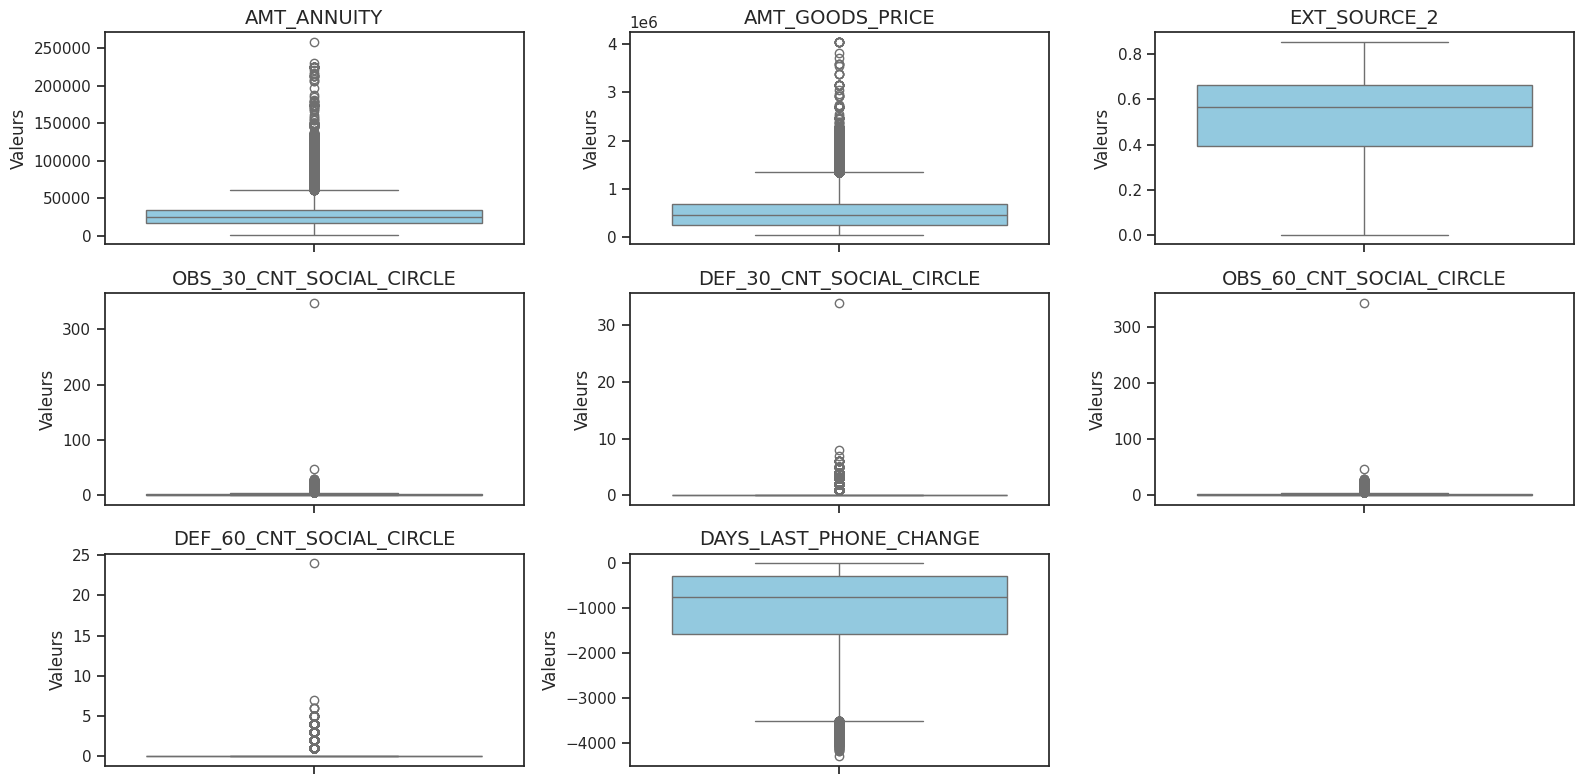

In [36]:
# Liste des variables à tracer (exclusion de la variable catégorielle)
vars_numeric = ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'EXT_SOURCE_2',
                'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
                'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
                'DAYS_LAST_PHONE_CHANGE']

# Création du graphique
plt.figure(figsize=(16, 8))

# Tracé des boxplots pour chaque variable numérique
for i, var in enumerate(vars_numeric):
    plt.subplot(3, 3, i + 1)  # Création d'une grille 3x3
    sns.boxplot(
        data=X_train,
        y=var,
        color='skyblue'
    )
    plt.title(var, fontsize=14)
    plt.ylabel('Valeurs', fontsize=12)
    plt.xlabel('')

# Ajustement des espacements
plt.tight_layout()
plt.show()


In [37]:
vars_with_na_drop = vars_with_na_1 + vars_with_na_2
X_test.drop(labels=vars_with_na_drop, axis=1, inplace=True)
X_test.shape
# Suppression de la variable cible dans le X-train
y_train = X_train['TARGET']
X_train.drop(labels='TARGET', axis=1, inplace=True)
X_train.shape, y_train.shape

((307511, 64), (307511,))

### Imputation des valeurs manquantes par la médiane
Dans cette étape, nous remplaçons les valeurs manquantes des variables numériques par leur médiane à l'aide de `MeanMedianImputer` de Feature-Engine.


In [38]:
# Pour effectuer une imputation par la médiane,
# nous spécifions la stratégie d'imputation
imputer = MeanMedianImputer(imputation_method='median')

# On adapte l'imputer au dataset
imputer.fit(X_train)

# L'imputer a identifié les variables numériques à
# imputer avec la médiane
print(imputer.variables_)


['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLA

In [39]:
# Ici, nous pouvons voir la médiane attribuée à chaque variable
imputer.imputer_dict_



{'SK_ID_CURR': 278202.0,
 'CNT_CHILDREN': 0.0,
 'AMT_INCOME_TOTAL': 147150.0,
 'AMT_CREDIT': 513531.0,
 'AMT_ANNUITY': 24903.0,
 'AMT_GOODS_PRICE': 450000.0,
 'REGION_POPULATION_RELATIVE': 0.01885,
 'DAYS_BIRTH': -15750.0,
 'DAYS_EMPLOYED': -1213.0,
 'DAYS_REGISTRATION': -4504.0,
 'DAYS_ID_PUBLISH': -3254.0,
 'FLAG_MOBIL': 1.0,
 'FLAG_EMP_PHONE': 1.0,
 'FLAG_WORK_PHONE': 0.0,
 'FLAG_CONT_MOBILE': 1.0,
 'FLAG_PHONE': 0.0,
 'FLAG_EMAIL': 0.0,
 'CNT_FAM_MEMBERS': 2.0,
 'REGION_RATING_CLIENT': 2.0,
 'REGION_RATING_CLIENT_W_CITY': 2.0,
 'HOUR_APPR_PROCESS_START': 12.0,
 'REG_REGION_NOT_LIVE_REGION': 0.0,
 'REG_REGION_NOT_WORK_REGION': 0.0,
 'LIVE_REGION_NOT_WORK_REGION': 0.0,
 'REG_CITY_NOT_LIVE_CITY': 0.0,
 'REG_CITY_NOT_WORK_CITY': 0.0,
 'LIVE_CITY_NOT_WORK_CITY': 0.0,
 'EXT_SOURCE_2': 0.5659614260608526,
 'OBS_30_CNT_SOCIAL_CIRCLE': 0.0,
 'DEF_30_CNT_SOCIAL_CIRCLE': 0.0,
 'OBS_60_CNT_SOCIAL_CIRCLE': 0.0,
 'DEF_60_CNT_SOCIAL_CIRCLE': 0.0,
 'DAYS_LAST_PHONE_CHANGE': -757.0,
 'FLAG_DOCUMENT

In [40]:
# on recupere un data frame avec l'imputer qu'on va utiliser par la suite pour faire nos traitement
clean_X_train = imputer.transform(X_train)
clean_X_train.shape
clean_X_test = imputer.transform(X_test)

clean_X_test.shape

(48744, 64)

In [41]:
# Nous spécifions la méthode d'imputation
# pour les variables catégorielles.

from feature_engine.imputation import CategoricalImputer

# Configuration de l'imputer pour remplacer les valeurs manquantes
# par la valeur la plus fréquente ("frequent").
imputer = CategoricalImputer(imputation_method='frequent')

# Adaptation de l'imputer sur le dataset d'entraînement
imputer.fit(clean_X_train)

# Ici, nous affichons les valeurs les plus fréquentes
# qui seront utilisées pour remplacer les NA dans chaque variable catégorielle.
imputer.imputer_dict_



{'NAME_CONTRACT_TYPE': 'Cash loans',
 'CODE_GENDER': 'F',
 'FLAG_OWN_CAR': 'N',
 'FLAG_OWN_REALTY': 'Y',
 'NAME_TYPE_SUITE': 'Unaccompanied',
 'NAME_INCOME_TYPE': 'Working',
 'NAME_EDUCATION_TYPE': 'Secondary / secondary special',
 'NAME_FAMILY_STATUS': 'Married',
 'NAME_HOUSING_TYPE': 'House / apartment',
 'WEEKDAY_APPR_PROCESS_START': 'TUESDAY',
 'ORGANIZATION_TYPE': 'Business Entity Type 3'}

### Imputation des valeurs manquantes pour les variables catégorielles
Dans cette étape, nous remplaçons les valeurs manquantes des variables catégorielles par leur **valeur la plus fréquente** (`imputation_method='frequent'`). Nous utilisons `CategoricalImputer` de Feature-Engine pour automatiser ce processus.


In [42]:
# Application de l'imputation sur le dataset d'entraînement nettoyé
clean_X_train = imputer.transform(clean_X_train)

# Vérification qu'il n'y a plus de valeurs manquantes dans les variables catégorielles
clean_X_train[imputer.variables_].isnull().mean()

# Application de l'imputation sur le dataset de test nettoyé
clean_X_test = imputer.transform(clean_X_test)

# Vérification qu'il n'y a plus de valeurs manquantes dans les variables catégorielles
clean_X_test[imputer.variables_].isnull().mean()

# Vérification des dimensions des datasets après traitement
clean_X_test.shape, clean_X_train.shape


((48744, 64), (307511, 64))

### Résultat après imputation des variables catégorielles
- Les valeurs manquantes des variables catégorielles ont été remplacées par leur **valeur la plus fréquente**.
- Nous avons vérifié que les datasets d'entraînement (`clean_X_train`) et de test (`clean_X_test`) ne contiennent plus de valeurs manquantes.
- Les dimensions des datasets ont été conservées après l'imputation.


# 2.. Analyse des variables dans la base principale : x_train x_test

## 2.a Analyse des variables qualitatives dans X_train

Dans cette section, nous allons analyser les 11 variables qualitatives présentes dans notre dataset d'entraînement `X_train`. L'objectif est d'identifier les variables pertinentes pour notre étude et d'éliminer celles qui n'apportent pas d'information utile pour la modélisation.

### Liste des variables catégorielles :
1. **NAME_CONTRACT_TYPE** : Type de contrat du prêt.
2. **CODE_GENDER** : Genre du client.
3. **FLAG_OWN_CAR** : Le client possède-t-il une voiture ?
4. **FLAG_OWN_REALTY** : Le client possède-t-il un bien immobilier ?
5. **NAME_TYPE_SUITE** : Type d'accompagnant lors de la demande de prêt.
6. **NAME_INCOME_TYPE** : Type de revenu du client.
7. **NAME_EDUCATION_TYPE** : Niveau d'éducation du client.
8. **NAME_FAMILY_STATUS** : Situation familiale du client.
9. **NAME_HOUSING_TYPE** : Type de logement du client.
10. **WEEKDAY_APPR_PROCESS_START** : Jour de la semaine où la demande a été initiée.
11. **ORGANIZATION_TYPE** : Type d'organisation où travaille le client.

### Variables potentiellement non pertinentes :
- **NAME_TYPE_SUITE** : Le type d'accompagnant lors de la demande de prêt semble peu pertinent pour prédire la probabilité de défaut.
- **WEEKDAY_APPR_PROCESS_START** : Le jour de la semaine où la demande a été initiée semble également peu lié à notre problématique métier et peut être considéré comme non pertinent.
- **ORGANIZATION_TYPE** : Ce type de variable peut être pertinent dans certains cas, mais son grand nombre de modalités uniques pourrait entraîner une complexité inutile. Cela nécessitera une analyse approfondie pour décider.

### Étapes suivantes :
Pour chaque variable catégorielle restante, nous allons :
1. Étudier leur répartition (par exemple, avec des graphiques à barres).
2. Identifier les valeurs rares ou manquantes.
3. Évaluer leur pertinence pour la modélisation.

À la fin de cette analyse, nous déciderons quelles variables conserver et lesquelles supprimer.


In [43]:
# Identification des variables qualitatives
qualitative_vars = [var for var in clean_X_train.columns if clean_X_train[var].dtype == 'object']

# Affichage des variables qualitatives
print(f"Variables qualitatives dans X_train :\n{qualitative_vars}")

# Affichage des premières valeurs de ces variables
print("\nAperçu des premières lignes des variables qualitatives :")
print(clean_X_train[qualitative_vars].head())


Variables qualitatives dans X_train :
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']

Aperçu des premières lignes des variables qualitatives :
  NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY NAME_TYPE_SUITE  \
0         Cash loans           M            N               Y   Unaccompanied   
1         Cash loans           F            N               N          Family   
2    Revolving loans           M            Y               Y   Unaccompanied   
3         Cash loans           F            N               Y   Unaccompanied   
4         Cash loans           M            N               Y   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Highe

In [44]:
# Liste des variables à supprimer
vars_to_drop = ['NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']

# Suppression des variables dans les deux datasets
clean_X_train = clean_X_train.drop(columns=vars_to_drop)
clean_X_test = clean_X_test.drop(columns=vars_to_drop)

# Vérification des dimensions après suppression
print(f"Dimensions après suppression :\nX_train : {clean_X_train.shape}\nX_test : {clean_X_test.shape}")


Dimensions après suppression :
X_train : (307511, 61)
X_test : (48744, 61)


### Étude de la variable : NAME_CONTRACT_TYPE
Cette variable indique le **type de contrat de prêt** contracté par le client, comme un prêt en espèces ou à tempérament.



In [45]:
clean_X_train['NAME_CONTRACT_TYPE'].value_counts()


NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

In [46]:
clean_X_test['NAME_CONTRACT_TYPE'].value_counts()

NAME_CONTRACT_TYPE
Cash loans         48305
Revolving loans      439
Name: count, dtype: int64

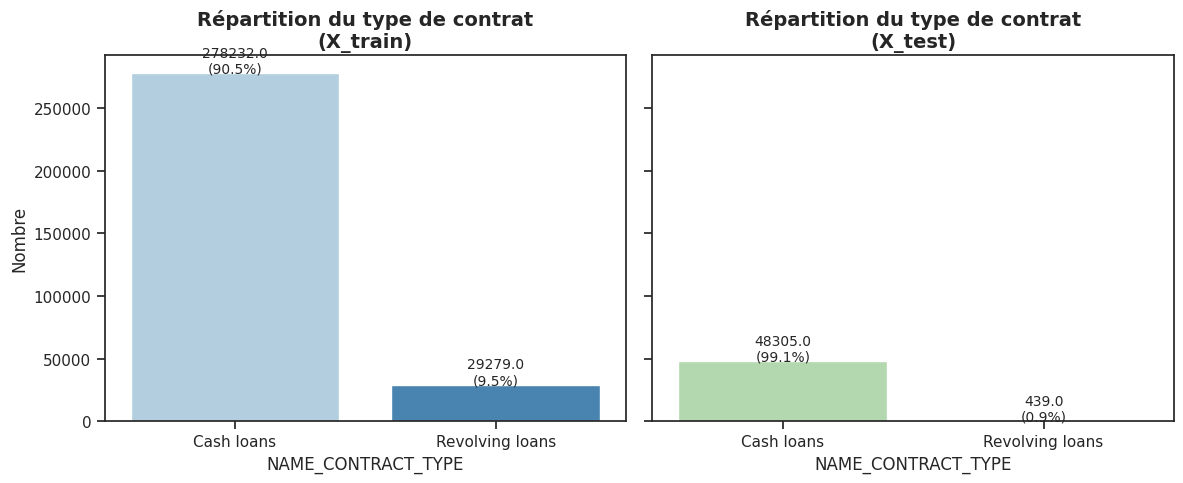

In [47]:
# Tracé des barplots pour NAME_CONTRACT_TYPE
comparaison_categorie(
    train_df=clean_X_train,
    test_df=clean_X_test,
    var='NAME_CONTRACT_TYPE',
    titre_train="Répartition du type de contrat\n(X_train)",
    titre_test="Répartition du type de contrat\n(X_test)"
)


### Étude de la variable : CODE_GENDER
Cette variable indique le **genre du client**, à savoir masculin ou féminin.

In [48]:
clean_X_train['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [49]:
# Imputation des 4 clients dont le genre est inconnu à la modalité la plus fréquente (F)

map_genre = {'F' : 'Femme',
             'M' : 'Homme',
             'XNA' : 'Femme'}

clean_X_train['CODE_GENDER'] = clean_X_train['CODE_GENDER'].map(map_genre)
clean_X_test['CODE_GENDER'] = clean_X_test['CODE_GENDER'].map(map_genre)

clean_X_train.shape, clean_X_test.shape


((307511, 61), (48744, 61))

In [50]:
clean_X_test['CODE_GENDER'].value_counts()

CODE_GENDER
Femme    32678
Homme    16066
Name: count, dtype: int64

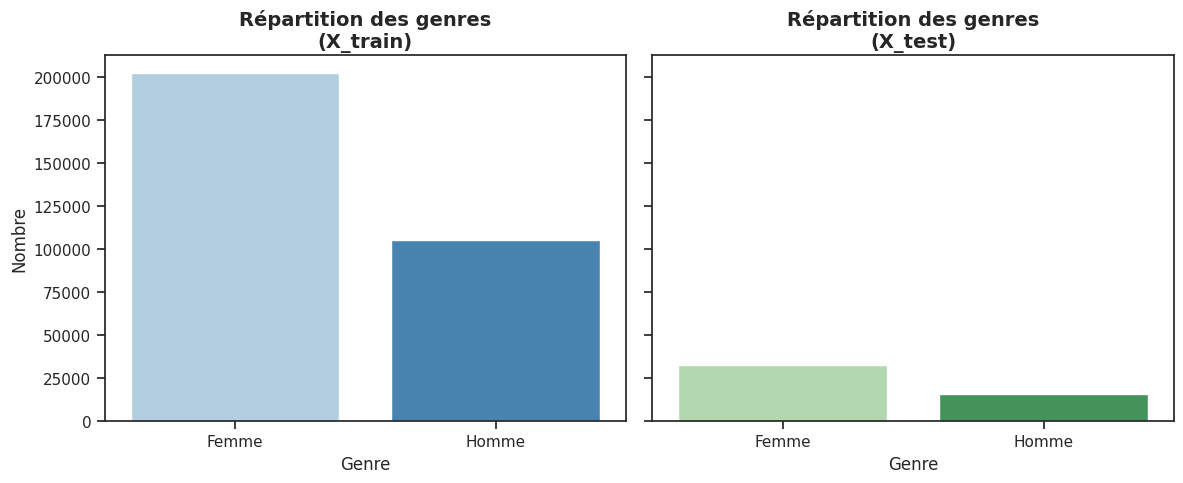

In [51]:

# Configuration de la figure pour les subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)  # 1 ligne, 2 colonnes

# Graphique pour clean_X_train
sns.countplot(
    data=clean_X_train,
    x='CODE_GENDER',
    palette='Blues',
    order=clean_X_train['CODE_GENDER'].value_counts().index,
    ax=axes[0]
)
axes[0].set_title("Répartition des genres\n(X_train)", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Genre", fontsize=12)
axes[0].set_ylabel("Nombre", fontsize=12)

# Graphique pour clean_X_test
sns.countplot(
    data=clean_X_test,
    x='CODE_GENDER',
    palette='Greens',
    order=clean_X_test['CODE_GENDER'].value_counts().index,
    ax=axes[1]
)
axes[1].set_title("Répartition des genres\n(X_test)", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Genre", fontsize=12)
axes[1].set_ylabel("")

# Ajustement des espacements et affichage
plt.tight_layout()
plt.show()



### Étude de la variable : FLAG_OWN_CAR
Cette variable indique si le client **possède une voiture** (oui ou non).


In [52]:
clean_X_train['FLAG_OWN_CAR'].value_counts()

FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64

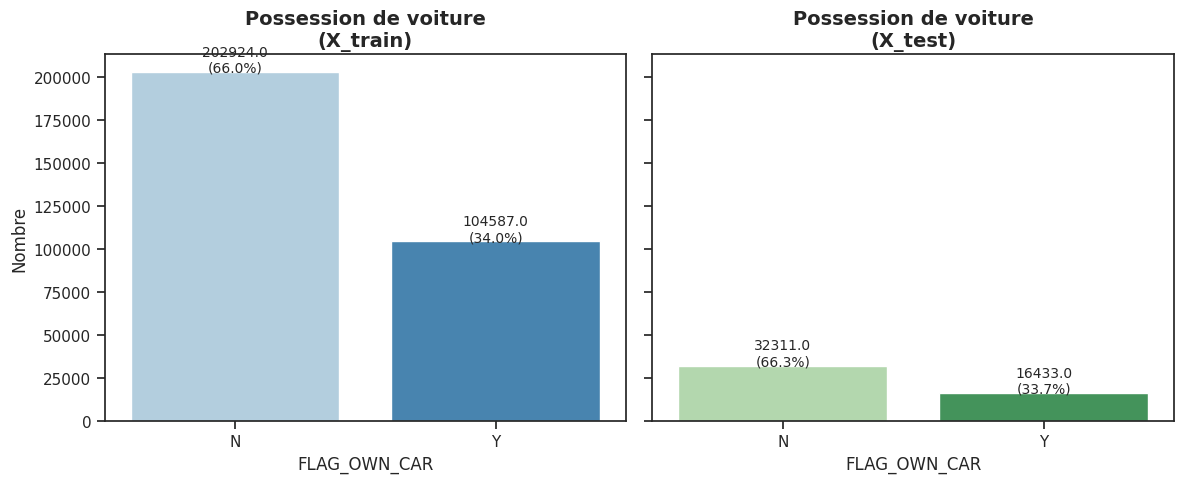

In [53]:
comparaison_categorie(
    train_df=clean_X_train,
    test_df=clean_X_test,
    var='FLAG_OWN_CAR',
    titre_train="Possession de voiture\n(X_train)",
    titre_test="Possession de voiture\n(X_test)"
)


### Étude de la variable : FLAG_OWN_REALTY
Cette variable indique si le client **possède un bien immobilier** (oui ou non).


In [54]:
clean_X_train['FLAG_OWN_REALTY'].value_counts()

FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64

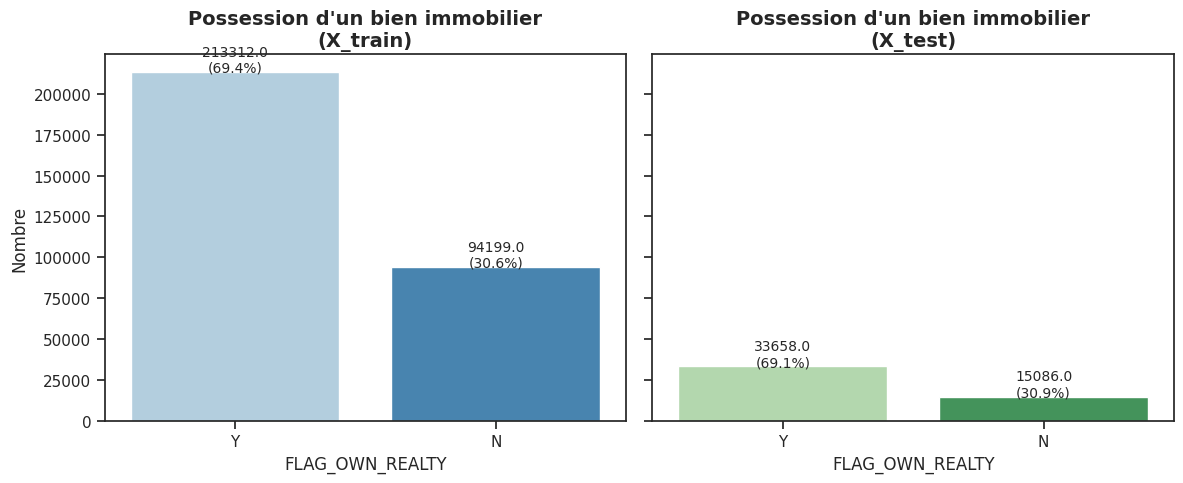

In [55]:
comparaison_categorie(
    train_df=clean_X_train,
    test_df=clean_X_test,
    var='FLAG_OWN_REALTY',
    titre_train="Possession d'un bien immobilier\n(X_train)",
    titre_test="Possession d'un bien immobilier\n(X_test)"
)


### Étude de la variable : NAME_INCOME_TYPE
Cette variable indique le **type de revenu du client**, par exemple salarié, retraité, indépendant, etc.


In [56]:
clean_X_train['NAME_INCOME_TYPE'].value_counts()


NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

In [57]:
clean_X_test['NAME_INCOME_TYPE'].value_counts()


NAME_INCOME_TYPE
Working                 24533
Commercial associate    11402
Pensioner                9273
State servant            3532
Student                     2
Businessman                 1
Unemployed                  1
Name: count, dtype: int64

In [58]:
# Mapping des catégories vers les nouvelles catégories
income_type_mapping = {
    'Unemployed': 'Sans emploi',
    'Student': 'Sans emploi',
    'Maternity leave': 'Sans emploi',
    'Working': 'Employé',
    'Pensioner': 'Sans emploi',
    'State servant': 'Fonctionnaire',
    'Commercial associate': 'Commercial',
    'Businessman': 'Commercial'
}

# Appliquer le mapping au dataset d'entraînement
clean_X_train['NAME_INCOME_TYPE'] = clean_X_train['NAME_INCOME_TYPE'].map(income_type_mapping)

# Appliquer le mapping au dataset de test
clean_X_test['NAME_INCOME_TYPE'] = clean_X_test['NAME_INCOME_TYPE'].map(income_type_mapping)

# Vérifier les nouvelles catégories dans le dataset d'entraînement
print(clean_X_train['NAME_INCOME_TYPE'].value_counts())



NAME_INCOME_TYPE
Employé          158774
Commercial        71627
Sans emploi       55407
Fonctionnaire     21703
Name: count, dtype: int64


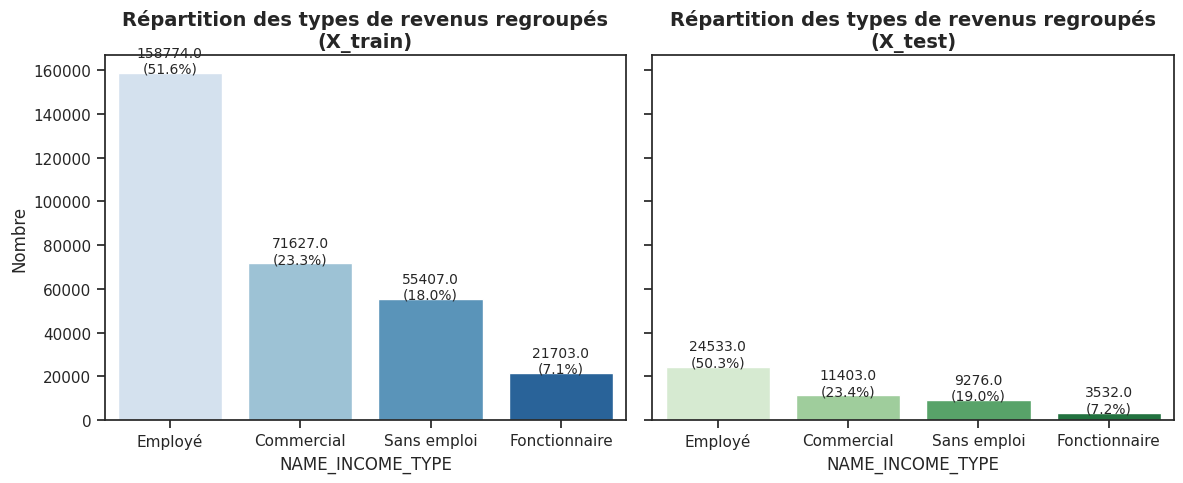

In [59]:
# Tracé du barplot pour les deux bases
comparaison_categorie(
    train_df=clean_X_train,
    test_df=clean_X_test,
    var='NAME_INCOME_TYPE',
    titre_train="Répartition des types de revenus regroupés\n(X_train)",
    titre_test="Répartition des types de revenus regroupés\n(X_test)"
)


### Étude de la variable : NAME_EDUCATION_TYPE
Cette variable indique le **niveau d'éducation du client**, par exemple études secondaires, supérieures, etc.


In [60]:
clean_X_train['NAME_EDUCATION_TYPE'].value_counts()

NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64

In [61]:
# Mapping des catégories vers les nouvelles catégories
income_type_mapping = {
    'Secondary / secondary special': 'Secondaire',
    'Higher education': 'Enseignement superieur',
    'Incomplete higher': 'Enseignement superieur',
    'Lower secondary': 'Secondaire',
    'Academic degree': 'Enseignement superieur'
}

# Appliquer le mapping au dataset d'entraînement
clean_X_train['NAME_EDUCATION_TYPE'] = clean_X_train['NAME_EDUCATION_TYPE'].map(income_type_mapping)

# Appliquer le mapping au dataset de test
clean_X_test['NAME_EDUCATION_TYPE'] = clean_X_test['NAME_EDUCATION_TYPE'].map(income_type_mapping)

# Vérifier les nouvelles catégories dans le dataset d'entraînement
print(clean_X_train['NAME_EDUCATION_TYPE'].value_counts())

NAME_EDUCATION_TYPE
Secondaire                222207
Enseignement superieur     85304
Name: count, dtype: int64


### Étude de la variable : NAME_FAMILY_STATUS
Cette variable indique la **situation familiale du client**, par exemple célibataire, marié, séparé, etc.

In [62]:
clean_X_train['NAME_FAMILY_STATUS'].value_counts()


NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

In [63]:
# Nouveau mapping des modalités
map_name_family_status = {
    'Married': 'en_couple',
    'Civil marriage': 'en_couple',
    'Single / not married': 'single',
    'Separated': 'single',
    'Widow': 'single',
    'Unknown' : 'en_couple'
}

# Remplacement des modalités dans NAME_FAMILY_STATUS
clean_X_train['NAME_FAMILY_STATUS'] = clean_X_train['NAME_FAMILY_STATUS'].map(map_name_family_status)

# Appliquer les mêmes transformations sur le dataset de test
clean_X_test['NAME_FAMILY_STATUS'] = clean_X_test['NAME_FAMILY_STATUS'].map(map_name_family_status)

# Vérification des nouvelles modalités
print(clean_X_train['NAME_FAMILY_STATUS'].value_counts())
print(clean_X_test['NAME_FAMILY_STATUS'].value_counts())


NAME_FAMILY_STATUS
en_couple    226209
single        81302
Name: count, dtype: int64
NAME_FAMILY_STATUS
en_couple    36544
single       12200
Name: count, dtype: int64


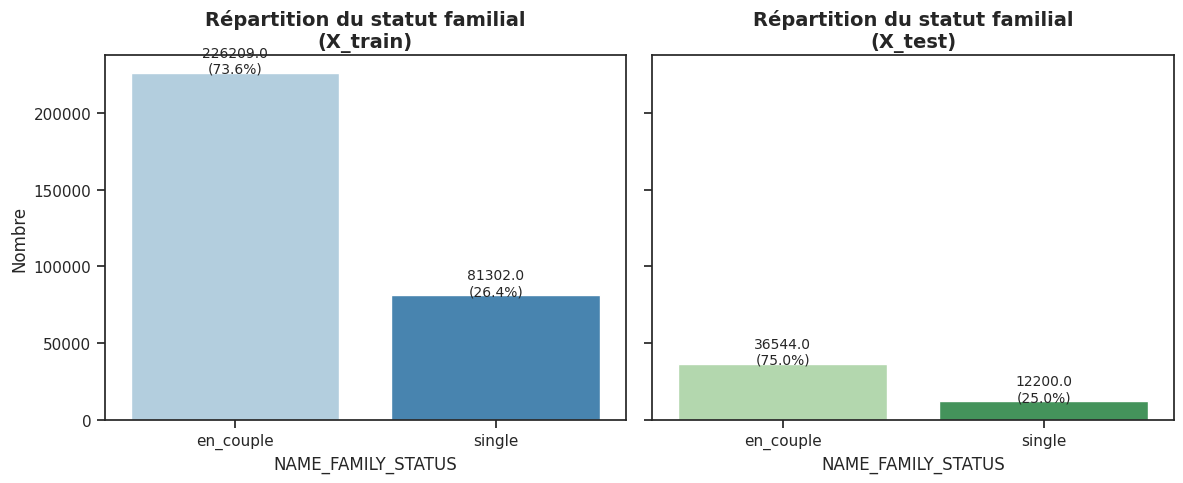

In [64]:
# Tracé des barplots pour NAME_FAMILY_STATUS
comparaison_categorie(
    train_df=clean_X_train,
    test_df=clean_X_test,
    var='NAME_FAMILY_STATUS',
    titre_train="Répartition du statut familial\n(X_train)",
    titre_test="Répartition du statut familial\n(X_test)"
)


### Étude de la variable : NAME_HOUSING_TYPE
Cette variable indique le **type de logement du client**, par exemple maison, appartement, etc.**bold text**

In [65]:
clean_X_train['NAME_HOUSING_TYPE'].value_counts()


NAME_HOUSING_TYPE
House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: count, dtype: int64

In [66]:
# Nouveau mapping des modalités
map_name_housing_type = {
    'House / apartment': 'Propriétaire',  # Remplacement par "proprio"
    'With parents': 'locataire/autre',
    'Municipal apartment': 'locataire/autre',
    'Rented apartment': 'locataire/autre',
    'Office apartment': 'locataire/autre',
    'Co-op apartment': 'locataire/autre'
}

# Remplacement des modalités dans NAME_HOUSING_TYPE pour le dataset d'entraînement
clean_X_train['NAME_HOUSING_TYPE'] = clean_X_train['NAME_HOUSING_TYPE'].map(map_name_housing_type)

# Remplacement des modalités dans NAME_HOUSING_TYPE pour le dataset de test
clean_X_test['NAME_HOUSING_TYPE'] = clean_X_test['NAME_HOUSING_TYPE'].map(map_name_housing_type)

# Vérification des nouvelles modalités
print(clean_X_train['NAME_HOUSING_TYPE'].value_counts())
print(clean_X_test['NAME_HOUSING_TYPE'].value_counts())


NAME_HOUSING_TYPE
Propriétaire       272868
locataire/autre     34643
Name: count, dtype: int64
NAME_HOUSING_TYPE
Propriétaire       43645
locataire/autre     5099
Name: count, dtype: int64


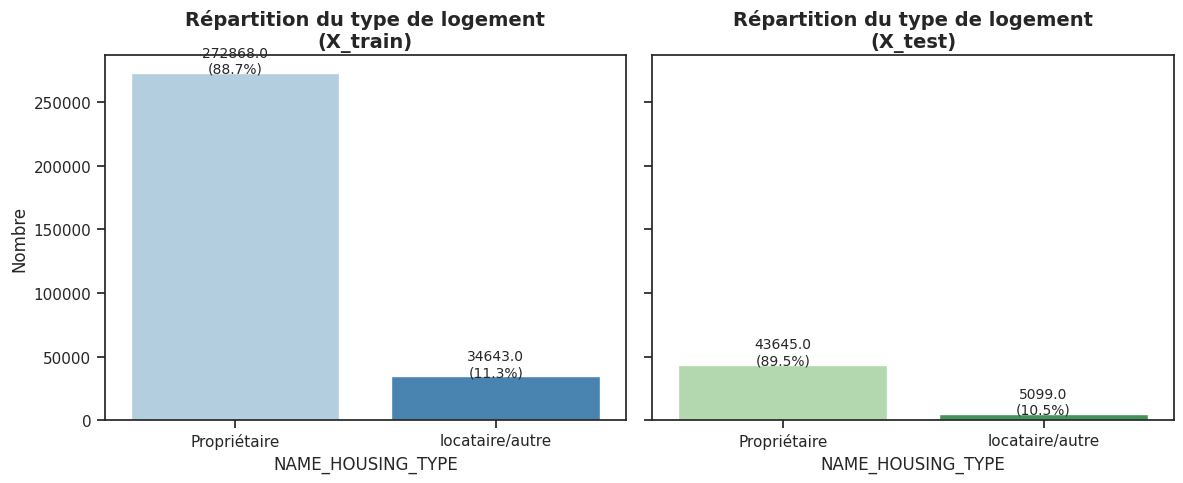

In [67]:
# Tracé des barplots pour NAME_HOUSING_TYPE
comparaison_categorie(
    train_df=clean_X_train,
    test_df=clean_X_test,
    var='NAME_HOUSING_TYPE',
    titre_train="Répartition du type de logement\n(X_train)",
    titre_test="Répartition du type de logement\n(X_test)"
)


In [68]:

clean_X_train.shape, clean_X_test.shape

((307511, 61), (48744, 61))

## 2.b Analyse des variables quantitatives



Dans cette section, nous allons étudier les variables quantitatives présentes dans notre dataset. Les variables quantitatives peuvent être divisées en deux catégories principales :

1. **Variables discrètes** : Ce sont des variables numériques qui prennent un nombre fini ou limité de valeurs (par exemple, le nombre d'enfants, d'années de travail, etc.).
2. **Variables continues** : Ce sont des variables numériques qui peuvent prendre une infinité de valeurs dans une plage donnée (par exemple, le montant d'un crédit, les revenus annuels, etc.).

L'objectif de cette analyse est de :
- Identifier et analyser la distribution des variables quantitatives.
- Détecter les outliers (valeurs aberrantes).
- Identifier les éventuelles transformations nécessaires (logarithmique, normalisation, etc.).
- Vérifier les éventuelles corrélations entre ces variables et la variable cible.

**Étape 1 : Analyse des variables discrètes**
Pour les variables discrètes, nous allons :
- Étudier leur répartition (graphiques de barres ou d'histogrammes).
- Identifier les valeurs rares ou peu fréquentes.

**Étape 2 : Analyse des variables continues**
Pour les variables continues, nous allons :
- Étudier leur distribution (graphiques de densité ou histogrammes).
- Identifier les outliers à l'aide de boxplots.
- Analyser les transformations possibles pour stabiliser les distributions (logarithme, standardisation, etc.).

À chaque étape, nous préciserons si une variable est pertinente pour notre étude ou si elle doit être supprimée. Une fois cette analyse terminée, nous disposerons d'un dataset propre et optimisé pour la modélisation.


In [69]:
# Obtenir un résumé statistique des variables dans clean_X_train
clean_X_train.describe().T


count       mean        std        min  \
SK_ID_CURR                  307,511.00 278,180.52 102,790.18 100,002.00   
CNT_CHILDREN                307,511.00       0.42       0.72       0.00   
AMT_INCOME_TOTAL            307,511.00 168,797.92 237,123.15  25,650.00   
AMT_CREDIT                  307,511.00 599,026.00 402,490.78  45,000.00   
AMT_ANNUITY                 307,511.00  27,108.49  14,493.46   1,615.50   
AMT_GOODS_PRICE             307,511.00 538,316.29 369,288.98  40,500.00   
REGION_POPULATION_RELATIVE  307,511.00       0.02       0.01       0.00   
DAYS_BIRTH                  307,511.00 -16,037.00   4,363.99 -25,229.00   
DAYS_EMPLOYED               307,511.00  63,815.05 141,275.77 -17,912.00   
DAYS_REGISTRATION           307,511.00  -4,986.12   3,522.89 -24,672.00   
DAYS_ID_PUBLISH             307,511.00  -2,994.20   1,509.45  -7,197.00   
FLAG_MOBIL                  307,511.00       1.00       0.00       0.00   
FLAG_EMP_PHONE              307,511.00       0.82       0.38       0.00   
FLAG_WORK_PHONE             307,511.00       0.20       0.40       0.00   
FLAG_CONT_MOBILE            307,511.00       1.00       0.04       0.00   
FLAG_PHONE                  307,511.00       0.28       0.45       0.00   
FLAG_EMAIL                  307,511.00       0.06       0.23       0.00   
CNT_FAM_MEMBERS             307,511.00       2.15       0.91       1.00   
REGION_RATING_CLIENT        307,511.00       2.05       0.51       1.00   
REGION_RATING_CLIENT_W_CITY 307,511.00       2.03       0.50       1.00   
HOUR_APPR_PROCESS_START     307,511.00      12.06       3.27       0.00   
REG_REGION_NOT_LIVE_REGION  307,511.00       0.02       0.12       0.00   
REG_REGION_NOT_WORK_REGION  307,511.00       0.05       0.22       0.00   
LIVE_REGION_NOT_WORK_REGION 307,511.00       0.04       0.20       0.00   
REG_CITY_NOT_LIVE_CITY      307,511.00       0.08       0.27       0.00   
REG_CITY_NOT_WORK_CITY      307,511.00       0.23       0.42       0.00   
LIVE_CITY_NOT_WORK_CITY     307,511.00       0.18       0.38       0.00   
EXT_SOURCE_2                307,511.00       0.51       0.19       0.00   
OBS_30_CNT_SOCIAL_CIRCLE    307,511.00       1.42       2.40       0.00   
DEF_30_CNT_SOCIAL_CIRCLE    307,511.00       0.14       0.45       0.00   
OBS_60_CNT_SOCIAL_CIRCLE    307,511.00       1.40       2.38       0.00   
DEF_60_CNT_SOCIAL_CIRCLE    307,511.00       0.10       0.36       0.00   
DAYS_LAST_PHONE_CHANGE      307,511.00    -962.86     826.81  -4,292.00   
FLAG_DOCUMENT_2             307,511.00       0.00       0.01       0.00   
FLAG_DOCUMENT_3             307,511.00       0.71       0.45       0.00   
FLAG_DOCUMENT_4             307,511.00       0.00       0.01       0.00   
FLAG_DOCUMENT_5             307,511.00       0.02       0.12       0.00   
FLAG_DOCUMENT_6             307,511.00       0.09       0.28       0.00   
FLAG_DOCUMENT_7             307,511.00       0.00       0.01       0.00   
FLAG_DOCUMENT_8             307,511.00       0.08       0.27       0.00   
FLAG_DOCUMENT_9             307,511.00       0.00       0.06       0.00   
FLAG_DOCUMENT_10            307,511.00       0.00       0.00       0.00   
FLAG_DOCUMENT_11            307,511.00       0.00       0.06       0.00   
FLAG_DOCUMENT_12            307,511.00       0.00       0.00       0.00   
FLAG_DOCUMENT_13            307,511.00       0.00       0.06       0.00   
FLAG_DOCUMENT_14            307,511.00       0.00       0.05       0.00   
FLAG_DOCUMENT_15            307,511.00       0.00       0.03       0.00   
FLAG_DOCUMENT_16            307,511.00       0.01       0.10       0.00   
FLAG_DOCUMENT_17            307,511.00       0.00       0.02       0.00   
FLAG_DOCUMENT_18            307,511.00       0.01       0.09       0.00   
FLAG_DOCUMENT_19            307,511.00       0.00       0.02       0.00   
FLAG_DOCUMENT_20            307,511.00       0.00       0.02       0.00   
FLAG_DOCUMENT_21            307,511.00       0.00       0.

### 2.b.1 Variables non pertinentes à notre problématique métier

Dans le cadre de notre problématique, certaines variables ne présentent pas d'intérêt direct pour la prédiction de la probabilité de défaut d'un client. Ces variables sont identifiées comme étant soit constantes, soit peu pertinentes pour évaluer la stabilité financière et le comportement de remboursement. Voici les variables que nous allons supprimer :

1. **FLAG_MOBIL** : Cette variable est constante (toujours 1 dans notre dataset).
2. **FLAG_CONT_MOBILE** : Cette variable est quasi constante (toujours 1 ou proche de 1).
3. **FLAG_EMAIL** : Le fait d'avoir ou non un email n'a pas de lien direct avec le risque de défaut.
4. **HOUR_APPR_PROCESS_START** : L'heure de début de la demande de crédit n'est pas pertinente pour notre analyse.
5. **REGION_RATING_CLIENT** : Une évaluation subjective de la région qui n'apporte pas d'informations spécifiques.
6. **REGION_RATING_CLIENT_W_CITY** : Évaluation redondante et peu informative, similaire à `REGION_RATING_CLIENT`.

Nous avons décidé de conserver les variables liées aux documents (comme `FLAG_DOCUMENT_*`) pour les analyser plus tard, car elles peuvent potentiellement fournir des informations utiles sur le processus administratif ou le profil du client.


In [70]:
# Liste des variables à supprimer
vars_to_drop = [
    'FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL',
    'HOUR_APPR_PROCESS_START', 'REGION_RATING_CLIENT',
    'REGION_RATING_CLIENT_W_CITY'
]

# Suppression des variables dans les datasets
clean_X_train = clean_X_train.drop(columns=vars_to_drop)
clean_X_test = clean_X_test.drop(columns=vars_to_drop)

# Vérification des dimensions après suppression
print(f"Dimensions après suppression :\nX_train : {clean_X_train.shape}\nX_test : {clean_X_test.shape}")


Dimensions après suppression :
X_train : (307511, 55)
X_test : (48744, 55)


### 2.b.2 Analyse des variables discrètes

Les variables discrètes représentent des quantités comptables (comme le nombre d'enfants, de membres de la famille) ou des variables catégoriques encodées sous forme numérique (par exemple, des variables binaires ou ordinales). Ces variables prennent un nombre limité de valeurs uniques.

#### Étapes dans cette section :
1. Identifier les variables discrètes en fonction du nombre de valeurs uniques dans le dataset.
2. Étudier leur répartition à l'aide de barplots ou d'histogrammes.
3. Identifier les valeurs rares et décider de leur traitement.

Nous allons commencer par identifier les variables discrètes dans le dataset.


In [71]:
# Identification des variables discrètes
discrete_vars = [
    col for col in clean_X_train.select_dtypes(include=['int', 'float']).columns
    if clean_X_train[col].nunique() < 20
]

# Affichage des variables discrètes
print("Variables discrètes :", discrete_vars)


Variables discrètes : ['CNT_CHILDREN', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'CNT_FAM_MEMBERS', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']


#### Suppression des variables discrètes non pertinentes

Dans cette étape, nous identifions les variables discrètes qui ne sont pas directement pertinentes à notre problématique métier, à savoir la prédiction de la probabilité de défaut d'un client. Ces variables sont supprimées pour réduire la complexité du modèle et nous concentrer sur les variables ayant une valeur ajoutée significative.

** Variables supprimées**
1. **FLAG_PHONE** :
   - Raison : Fournir un numéro de téléphone personnel n'est pas lié au comportement financier ou à la capacité de remboursement.
2. **REG_REGION_NOT_LIVE_REGION** et **REG_CITY_NOT_LIVE_CITY** :
   - Raison : Mesurent si la région/ville de résidence est différente de la région/ville d'enregistrement. Ces informations contextuelles n'apportent pas de lien direct avec le risque de défaut.
3. **REG_REGION_NOT_WORK_REGION** et **REG_CITY_NOT_WORK_CITY** :
   - Raison : Mesurent si la région/ville de travail est différente de la région/ville d'enregistrement. Ces variables sont également redondantes et peu pertinentes.
4. **LIVE_REGION_NOT_WORK_REGION** et **LIVE_CITY_NOT_WORK_CITY** :
   - Raison : Mesurent si la région/ville de travail est différente de la région/ville de résidence actuelle. Ces variables ne montrent pas de lien direct avec la problématique métier.

Ces variables contextuelles ou administratives ajoutent de la complexité au dataset sans apporter d'informations utiles pour notre objectif.

---

**Variables conservées pour l'analyse**
Nous conservons les variables suivantes, car elles ont un lien potentiel avec le comportement financier ou les charges du client, ce qui peut influencer la probabilité de défaut :
1. **CNT_CHILDREN** : Nombre d'enfants à charge, influençant les dépenses et la stabilité financière.
2. **CNT_FAM_MEMBERS** : Nombre total de membres de la famille, reflétant les charges globales.
3. **FLAG_EMP_PHONE** et **FLAG_WORK_PHONE** : Indiquent la stabilité professionnelle (présence d'un téléphone lié au travail).
4. **DEF_30_CNT_SOCIAL_CIRCLE** et **DEF_60_CNT_SOCIAL_CIRCLE** : Nombre de défauts de paiement parmi les contacts sociaux, mesurant une influence potentielle sur le comportement financier.

Ces variables feront l'objet d'une analyse plus approfondie (distribution, corrélations, etc.) pour déterminer leur pertinence exacte dans la modélisation.


**verificaiton de notre intuition metier**

In [72]:
# Répartition de la variable LIVE_REGION_NOT_WORK_REGION
print("Répartition de LIVE_REGION_NOT_WORK_REGION :")
print(clean_X_train['LIVE_REGION_NOT_WORK_REGION'].value_counts(normalize=True))


Répartition de LIVE_REGION_NOT_WORK_REGION :
LIVE_REGION_NOT_WORK_REGION
0   0.96
1   0.04
Name: proportion, dtype: float64


In [73]:
# Concaténation temporaire pour vérifier la corrélation avec la cible
train_with_target = pd.concat([clean_X_train, y_train], axis=1)

# Corrélation entre LIVE_REGION_NOT_WORK_REGION et TARGET
correlation = train_with_target[['LIVE_REGION_NOT_WORK_REGION', 'TARGET']].corr()
print("Corrélation entre LIVE_REGION_NOT_WORK_REGION et TARGET :\n", correlation)


Corrélation entre LIVE_REGION_NOT_WORK_REGION et TARGET :
                              LIVE_REGION_NOT_WORK_REGION  TARGET
LIVE_REGION_NOT_WORK_REGION                         1.00    0.00
TARGET                                              0.00    1.00


In [74]:
from scipy.stats import chi2_contingency

# Création d'une table de contingence entre LIVE_REGION_NOT_WORK_REGION et TARGET
contingency_table = pd.crosstab(train_with_target['LIVE_REGION_NOT_WORK_REGION'], train_with_target['TARGET'])

# Test du chi²
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Résultat du test
print("Test du chi² :")
print(f"Chi² : {chi2}, p-value : {p}")
if p > 0.05:
    print("La variable LIVE_REGION_NOT_WORK_REGION n'a pas de lien significatif avec TARGET.")
else:
    print("La variable LIVE_REGION_NOT_WORK_REGION a un lien significatif avec TARGET.")


Test du chi² :
Chi² : 2.3924235301789247, p-value : 0.12192447948152679
La variable LIVE_REGION_NOT_WORK_REGION n'a pas de lien significatif avec TARGET.


**suppression des variables suite a la confirmation de notre intuition**

In [75]:
# Liste des variables discrètes non pertinentes à supprimer
vars_to_drop_discretes = [
    'FLAG_PHONE',
    'REG_REGION_NOT_LIVE_REGION', 'REG_CITY_NOT_LIVE_CITY',
    'REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_WORK_CITY',
    'LIVE_REGION_NOT_WORK_REGION', 'LIVE_CITY_NOT_WORK_CITY'
]

# Suppression des variables dans les datasets
clean_X_train = clean_X_train.drop(columns=vars_to_drop_discretes)
clean_X_test = clean_X_test.drop(columns=vars_to_drop_discretes)

# Vérification des dimensions après suppression
print(f"Dimensions après suppression :\nX_train : {clean_X_train.shape}\nX_test : {clean_X_test.shape}")


Dimensions après suppression :
X_train : (307511, 48)
X_test : (48744, 48)


In [76]:
# Identification des variables discrètes
discrete_vars = [
    col for col in clean_X_train.select_dtypes(include=['int', 'float']).columns
    if clean_X_train[col].nunique() < 20
]

# Affichage des variables discrètes
print("Variables discrètes :", discrete_vars)


Variables discrètes : ['CNT_CHILDREN', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'CNT_FAM_MEMBERS', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']


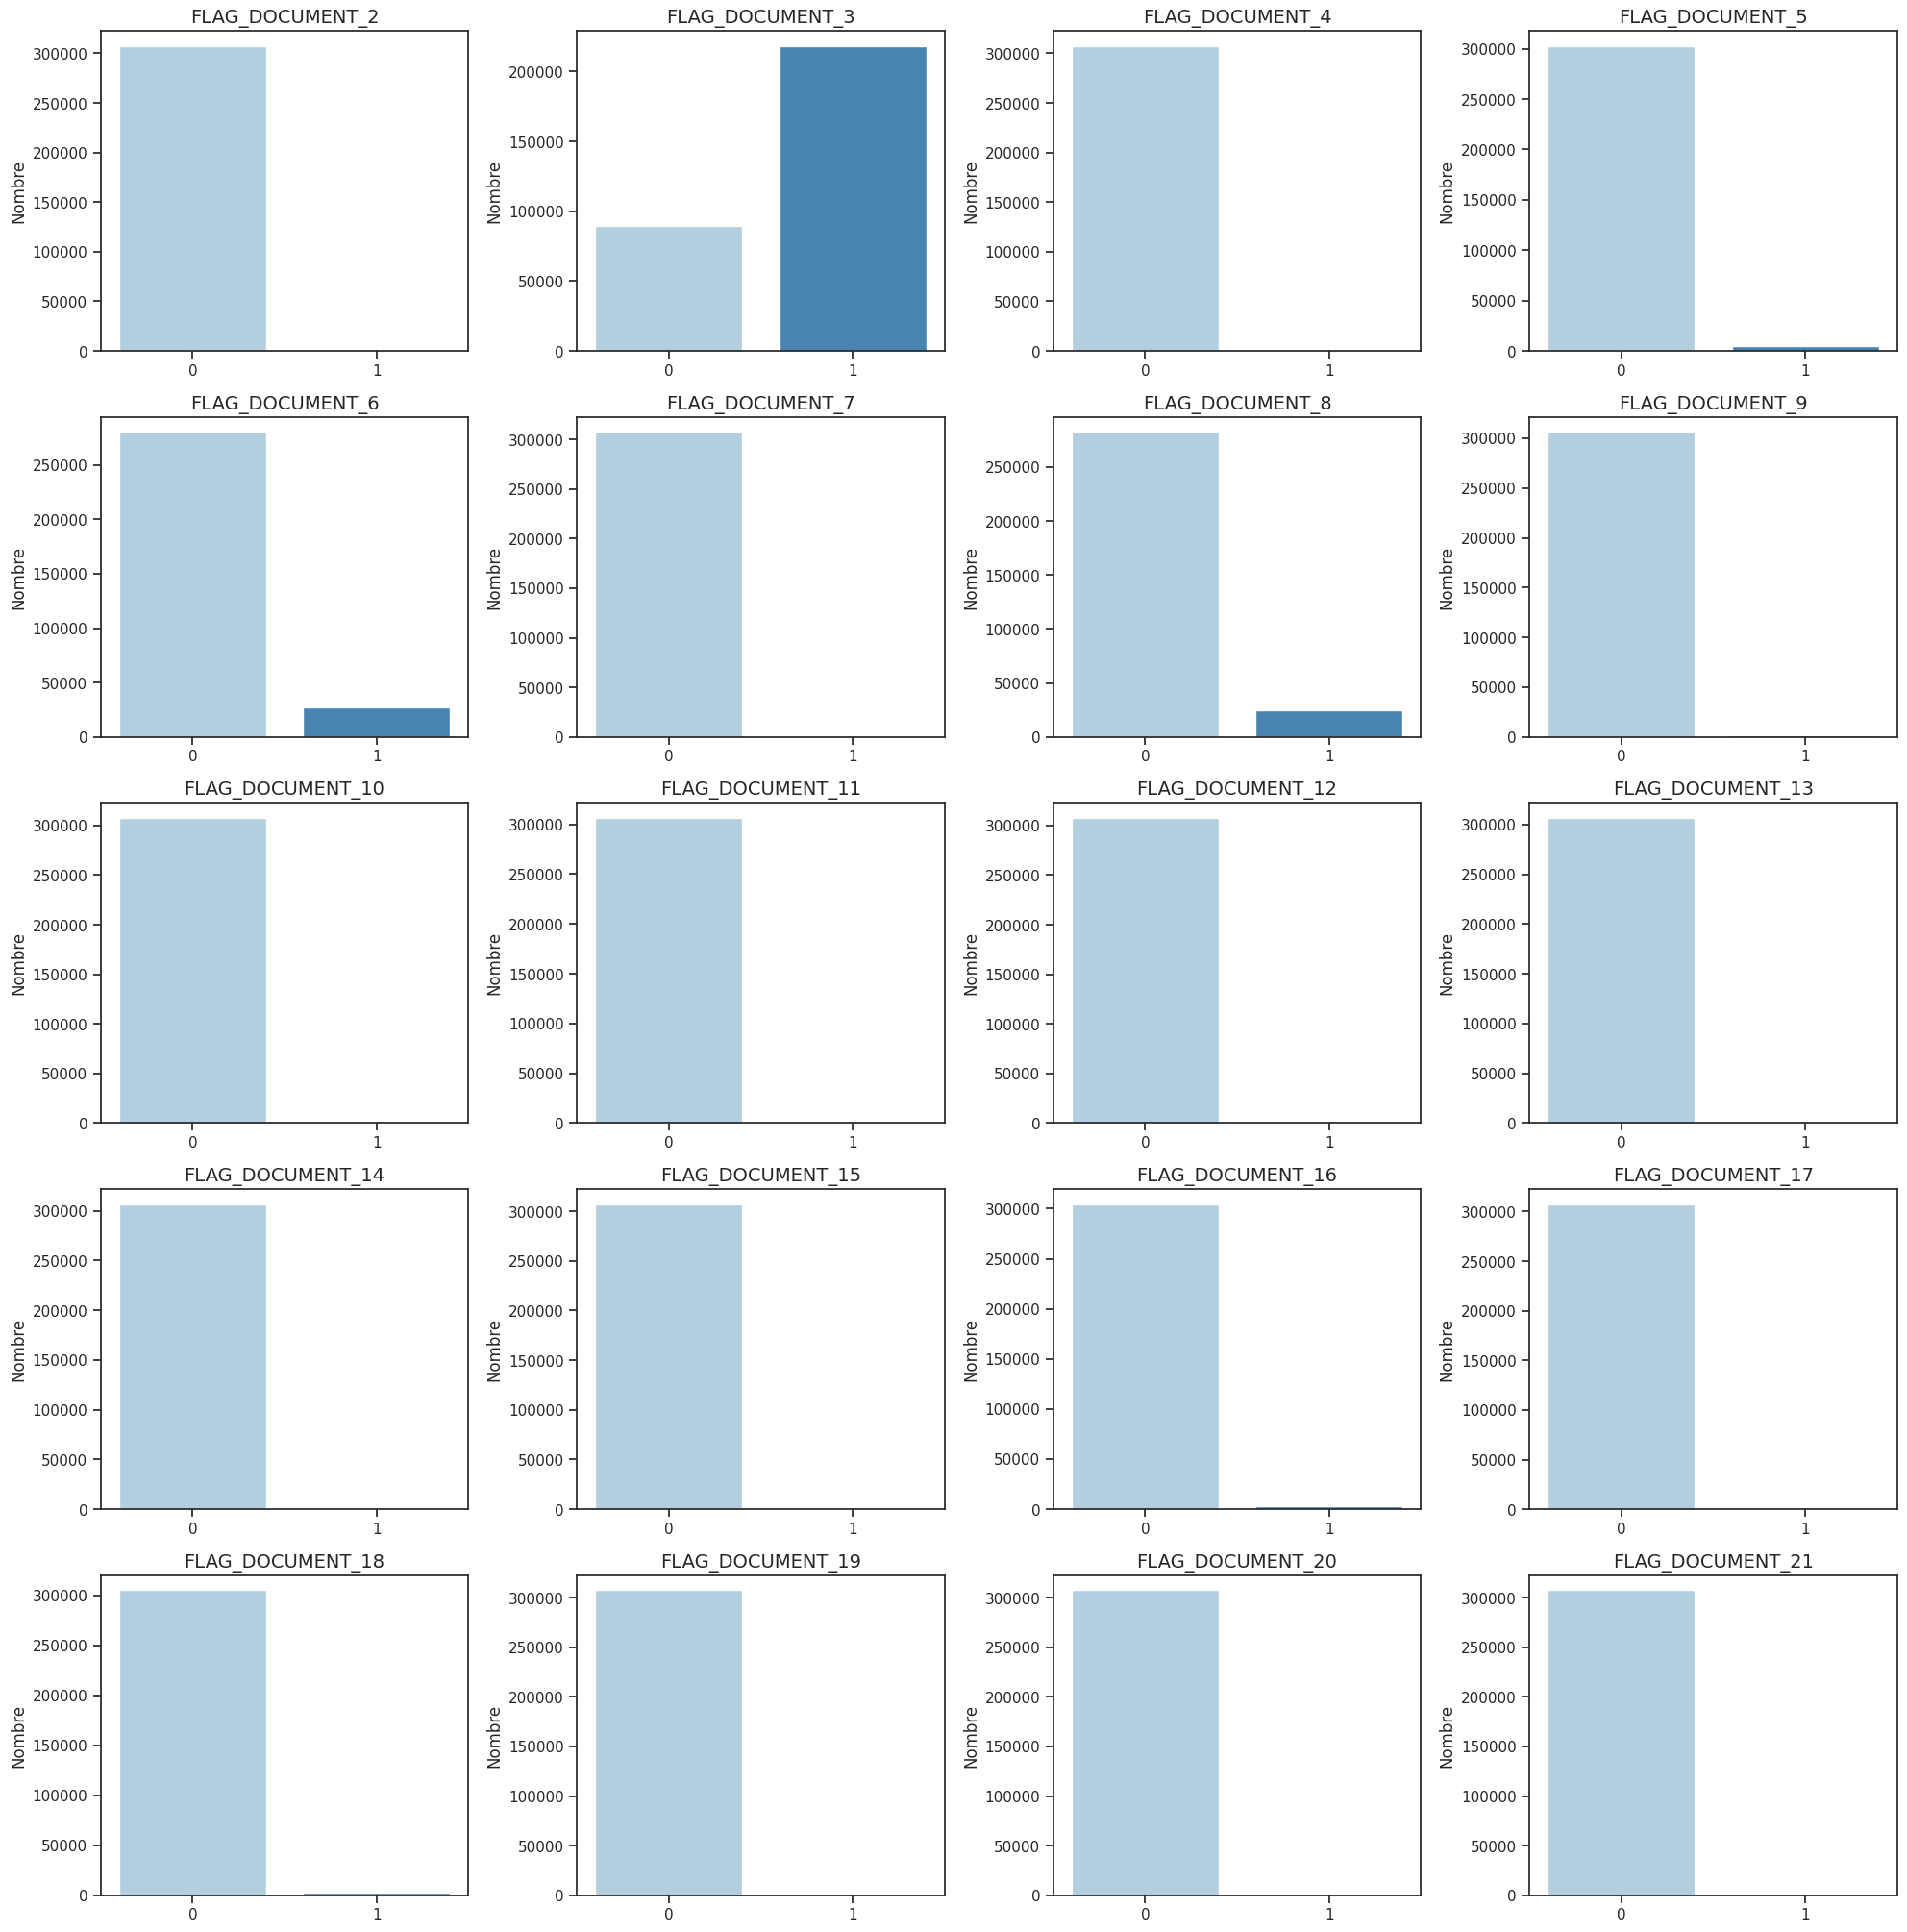

In [77]:
# Filtrer les colonnes FLAG_DOCUMENT_*
flag_document_cols = [col for col in clean_X_train.columns if col.startswith('FLAG_DOCUMENT')]

# Nombre de colonnes à tracer
n_cols = len(flag_document_cols)

# Configuration des subplots
n_rows = (n_cols // 4) + 1  # 4 colonnes par ligne
fig, axes = plt.subplots(n_rows, 4, figsize=(20, n_rows * 4))

# Aplatir les axes pour itérer facilement
axes = axes.flatten()

# Tracé des barplots pour chaque colonne FLAG_DOCUMENT_*
for i, col in enumerate(flag_document_cols):
    sns.countplot(
        data=clean_X_train,
        x=col,
        ax=axes[i],
        palette="Blues"
    )
    axes[i].set_title(col, fontsize=14)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Nombre")

# Supprimer les subplots inutilisés (si le nombre de variables n'est pas un multiple de 4)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajuster les espacements
plt.tight_layout()
plt.show()


#### Analyse et sélection des variables `FLAG_DOCUMENT_*`

Les variables `FLAG_DOCUMENT_*` représentent des indicateurs binaires qui indiquent si un client a fourni certains documents administratifs lors de la demande de crédit. Ces variables ont été analysées pour déterminer leur pertinence dans le cadre de notre problématique métier : prédire la probabilité de défaut d'un client.

### Étapes de la démarche :
1. **Visualisation des distributions** :
   - Un barplot a été généré pour chaque variable afin d'identifier celles qui présentent une répartition équilibrée ou une variabilité significative.
   - Cela nous a permis de repérer les variables presque entièrement composées de `0`, et donc probablement peu informatives.

2. **Critères de suppression** :
   - Les variables avec une proportion **extrêmement faible de `1`** (quasi constantes) ont été jugées peu pertinentes et supprimées, car elles n'apportent pas d'information utile à la modélisation.
   - Ces variables peuvent également ajouter de la complexité inutile au modèle.

3. **Critères de conservation** :
   - Les variables présentant une **variabilité notable** (distribution équilibrée ou significative entre `0` et `1`) ont été conservées.
   - Nous avons également conservé certaines variables déséquilibrées (`FLAG_DOCUMENT_6`, `FLAG_DOCUMENT_8`) car elles pourraient refléter des comportements ou des profils spécifiques liés à la probabilité de défaut, en particulier dans un jeu de données globalement déséquilibré.

### Décisions prises :
- **Variables conservées** :
  - `FLAG_DOCUMENT_3` : Montre une distribution notable entre `0` et `1`.
  - `FLAG_DOCUMENT_6` et `FLAG_DOCUMENT_8` : Bien que déséquilibrées, ces variables peuvent capturer des comportements spécifiques dans un contexte de données déséquilibrées.

- **Variables supprimées** :
  - Les autres variables `FLAG_DOCUMENT_*` ont été supprimées car elles sont presque entièrement composées de `0`, et leur contribution potentielle au modèle est négligeable.

### Pourquoi cette démarche ?
Cette analyse permet de :
- Réduire la complexité du dataset en supprimant les variables non informatives.
- Conserver uniquement les variables ayant une valeur ajoutée potentielle pour la modélisation, tout en tenant compte de la spécificité des données déséquilibrées.
- Garder un focus métier en analysant des variables qui reflètent un comportement ou un profil client pertinent.

Cette approche nous garantit d'optimiser notre dataset pour améliorer la qualité de notre modèle tout en conservant des variables potentiellement pertinentes.


In [78]:
# Liste des variables FLAG_DOCUMENT_* à supprimer
flag_document_to_drop = [
    'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_7',
    'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
    'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
    'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
    'FLAG_DOCUMENT_21'
]

# Suppression des variables dans les datasets
clean_X_train = clean_X_train.drop(columns=flag_document_to_drop)
clean_X_test = clean_X_test.drop(columns=flag_document_to_drop)

# Vérification des dimensions après suppression
print(f"Dimensions après suppression :\nX_train : {clean_X_train.shape}\nX_test : {clean_X_test.shape}")


Dimensions après suppression :
X_train : (307511, 31)
X_test : (48744, 31)


In [79]:
# Identification des variables discrètes restantes
discrete_vars_remaining = [
    col for col in clean_X_train.select_dtypes(include=['int', 'float']).columns
    if clean_X_train[col].nunique() < 20
]

# Affichage des variables discrètes restantes
print("Variables discrètes restantes :", discrete_vars_remaining)


Variables discrètes restantes : ['CNT_CHILDREN', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'CNT_FAM_MEMBERS', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8']


#### CNT_CHILDREN
**Description** : Cette variable représente le nombre d'enfants à charge déclarés par le client.

- **Importance métier** :
    - Le nombre d'enfants à charge peut refléter les charges financières globales du client.
    - Plus le nombre d'enfants est élevé, plus cela peut affecter sa capacité de remboursement.
- **Objectif de l'analyse** :
    - Étudier la répartition de cette variable.
    - Vérifier son lien éventuel avec la variable cible `TARGET`.


In [80]:
clean_X_train['CNT_CHILDREN'].value_counts()


CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: count, dtype: int64

In [81]:
# Affichage des lignes où 'CNT_CHILDREN' est égal à 19
outlier_rows = clean_X_train[clean_X_train['CNT_CHILDREN'] == 19]
print(outlier_rows)


        SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
155369      280108         Cash loans       Femme            N   
265784      407877         Cash loans       Femme            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
155369               Y            19        112,500.00  269,550.00   
265784               Y            19        112,500.00  135,000.00   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_INCOME_TYPE     NAME_EDUCATION_TYPE  \
155369    13,891.50       225,000.00          Employé              Secondaire   
265784     8,788.50       135,000.00          Employé  Enseignement superieur   

       NAME_FAMILY_STATUS NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
155369             single      Propriétaire                        0.01   
265784             single      Propriétaire                        0.02   

        DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
155369      -11057          -1853          -3,0

In [82]:
# Transformation de la variable numérique 'CNT_CHILDREN' en variable qualitative de l'ensemble d'entraînement

clean_X_train['nbr_enfants'] = clean_X_train['CNT_CHILDREN']

clean_X_train['nbr_enfants'] = np.where(clean_X_train['CNT_CHILDREN'] == 0, 'sans_enfant', clean_X_train['nbr_enfants'])
clean_X_train['nbr_enfants'] = np.where(clean_X_train['CNT_CHILDREN'] == 1, 'un_enfant', clean_X_train['nbr_enfants'])
clean_X_train['nbr_enfants'] = np.where(clean_X_train['CNT_CHILDREN'] >= 2, 'Plus__de_deux_enfants', clean_X_train['nbr_enfants'])

#Suppression de la variable CNT_CHILDREN

clean_X_train.drop(labels='CNT_CHILDREN', axis=1, inplace=True)

# Transformation de la variable 'CNT_CHILDREN' en variable qualitative pour la base de test
clean_X_test['nbr_enfants'] = clean_X_test['CNT_CHILDREN']

# Transformation en catégories pour la base de test
clean_X_test['nbr_enfants'] = np.where(clean_X_test['CNT_CHILDREN'] == 0, 'sans_enfant', clean_X_test['nbr_enfants'])
clean_X_test['nbr_enfants'] = np.where(clean_X_test['CNT_CHILDREN'] == 1, 'un_enfant', clean_X_test['nbr_enfants'])
clean_X_test['nbr_enfants'] = np.where(clean_X_test['CNT_CHILDREN'] >= 2, 'Plus__de_deux_enfants', clean_X_test['nbr_enfants'])

#Suppression de la variable CNT_CHILDREN
clean_X_test.drop(labels='CNT_CHILDREN', axis=1, inplace=True)

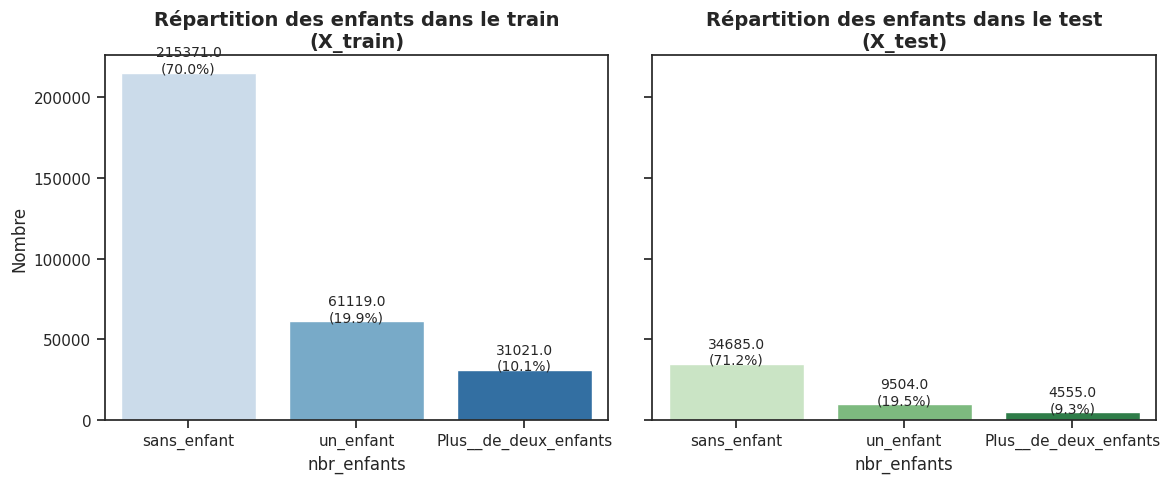

In [83]:
# Tracé du bar chart avec notre fonction
comparaison_categorie(
    train_df=clean_X_train,
    test_df=clean_X_test,
    var='nbr_enfants',
    titre_train="Répartition des enfants dans le train\n(X_train)",
    titre_test="Répartition des enfants dans le test\n(X_test)"
)

#### FLAG_EMP_PHONE
**Description** : Cette variable indique si le client a fourni un numéro de téléphone professionnel (binaire : 0 ou 1).

- **Importance métier** :
    - La présence d'un téléphone professionnel peut refléter une certaine stabilité professionnelle.
    - Cette stabilité pourrait être liée à une meilleure capacité de remboursement.
- **Objectif de l'analyse** :
    - Observer la répartition des valeurs (`0` et `1`).
    - Vérifier si cette variable a un impact significatif sur la probabilité de défaut (`TARGET`).


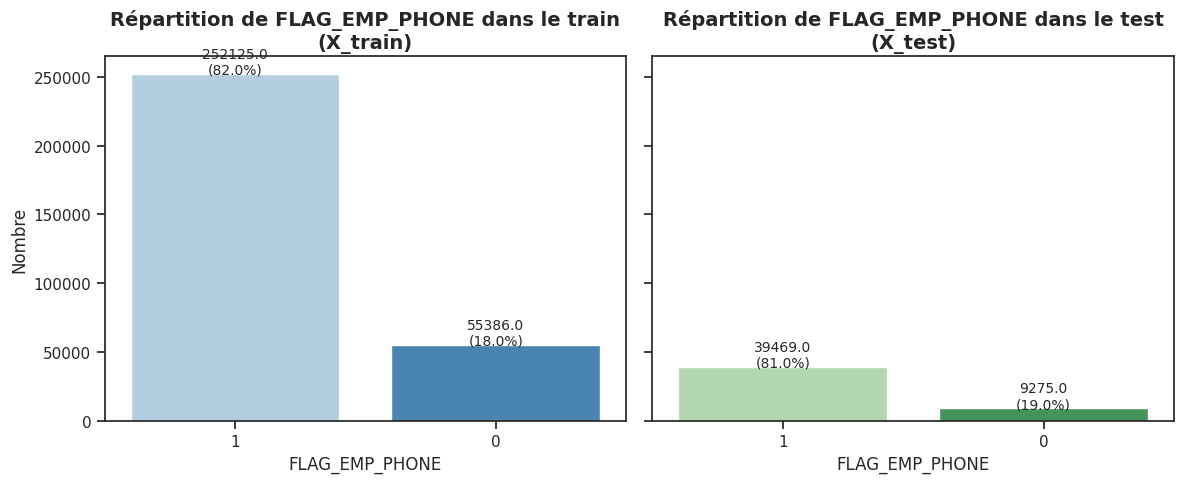

In [84]:
# Tracé du bar chart pour FLAG_EMP_PHONE avec la fonction modifiée
comparaison_categorie(
    train_df=clean_X_train,
    test_df=clean_X_test,
    var='FLAG_EMP_PHONE',
    titre_train="Répartition de FLAG_EMP_PHONE dans le train\n(X_train)",
    titre_test="Répartition de FLAG_EMP_PHONE dans le test\n(X_test)"
)


#### FLAG_WORK_PHONE
**Description** : Cette variable indique si le client a fourni un numéro de téléphone lié à son travail (binaire : 0 ou 1).

- **Importance métier** :
    - Cette variable pourrait indiquer une nature ou une stabilité de l'emploi.
    - Elle pourrait refléter des comportements ou des profils clients spécifiques.
- **Objectif de l'analyse** :
    - Étudier la répartition des valeurs (`0` et `1`).
    - Vérifier son impact potentiel sur la variable cible.


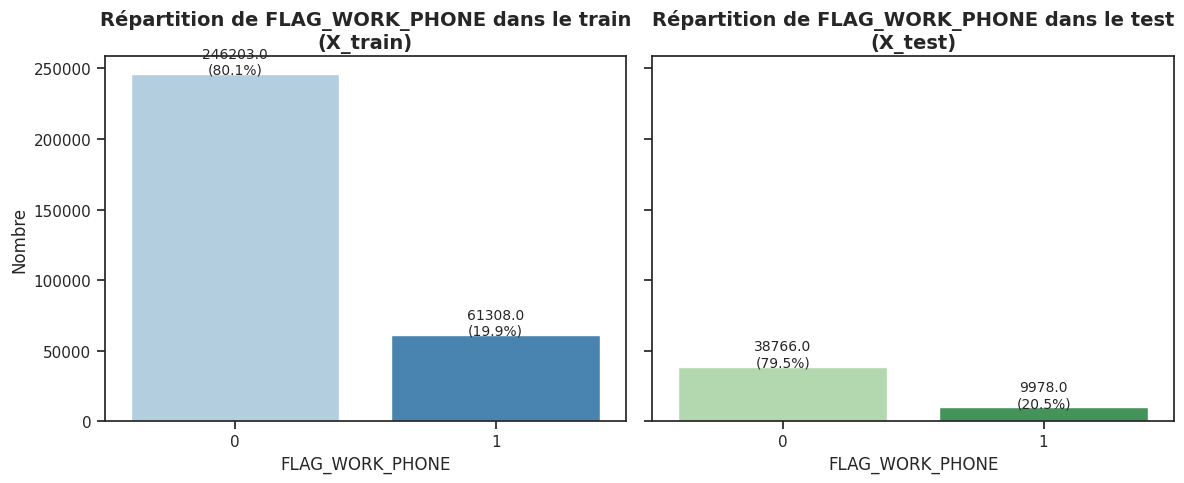

In [85]:
# Tracé du bar chart pour FLAG_WORK_PHONE avec la fonction modifiée
comparaison_categorie(
    train_df=clean_X_train,
    test_df=clean_X_test,
    var='FLAG_WORK_PHONE',
    titre_train="Répartition de FLAG_WORK_PHONE dans le train\n(X_train)",
    titre_test="Répartition de FLAG_WORK_PHONE dans le test\n(X_test)"
)

In [86]:
correlation = clean_X_train[['FLAG_EMP_PHONE', 'FLAG_WORK_PHONE']].corr()
print(correlation)


                 FLAG_EMP_PHONE  FLAG_WORK_PHONE
FLAG_EMP_PHONE             1.00             0.23
FLAG_WORK_PHONE            0.23             1.00


In [87]:
# Calcul des corrélations avec TARGET
emp_corr = clean_X_train[['FLAG_EMP_PHONE']].join(y_train).corr().iloc[0, 1]
work_corr = clean_X_train[['FLAG_WORK_PHONE']].join(y_train).corr().iloc[0, 1]

print(f"Corrélation FLAG_EMP_PHONE avec TARGET : {emp_corr}")
print(f"Corrélation FLAG_WORK_PHONE avec TARGET : {work_corr}")


Corrélation FLAG_EMP_PHONE avec TARGET : 0.045982219716592276
Corrélation FLAG_WORK_PHONE avec TARGET : 0.028524322363216906


Ok on garde les deux

#### CNT_FAM_MEMBERS
**Description** : Nombre total de membres de la famille, y compris le client lui-même.

- **Importance métier** :
    - Cette variable est pertinente car elle reflète les charges globales du client.
    - Une famille plus grande peut être associée à des dépenses plus importantes et à un risque financier plus élevé.
- **Objectif de l'analyse** :
    - Étudier la répartition de cette variable.
    - Vérifier la corrélation entre le nombre de membres de la famille et la probabilité de défaut.


In [88]:
clean_X_train['CNT_FAM_MEMBERS'].value_counts()

CNT_FAM_MEMBERS
2.00     158359
1.00      67847
3.00      52601
4.00      24697
5.00       3478
6.00        408
7.00         81
8.00         20
9.00          6
10.00         3
14.00         2
12.00         2
20.00         2
16.00         2
13.00         1
15.00         1
11.00         1
Name: count, dtype: int64

In [89]:
# Transformation de la variable numérique 'CNT_CHILDREN' en variable qualitative de l'ensemble d'entraînement

clean_X_train['taille_famille'] = clean_X_train['CNT_FAM_MEMBERS']
clean_X_train['taille_famille'] = np.where(clean_X_train['CNT_FAM_MEMBERS'] == 1, '1_personne', clean_X_train['taille_famille'])
clean_X_train['taille_famille'] = np.where(clean_X_train['CNT_FAM_MEMBERS'] == 2, '2_personnes', clean_X_train['taille_famille'])
clean_X_train['taille_famille'] = np.where(clean_X_train['CNT_FAM_MEMBERS'] == 3, '3_personnes', clean_X_train['taille_famille'])
clean_X_train['taille_famille'] = np.where(clean_X_train['CNT_FAM_MEMBERS'] >= 4, '4_personnes_et_plus', clean_X_train['taille_famille'])

#Suppression de la variable CNT_FAM_MEMBERS
clean_X_train.drop(labels='CNT_FAM_MEMBERS', axis=1, inplace=True)


# Transformation de la variable numérique 'CNT_FAM_MEMBERS' en variable qualitative de l'ensemble de test

clean_X_test['taille_famille'] = clean_X_test['CNT_FAM_MEMBERS']
clean_X_test['taille_famille'] = np.where(clean_X_test['CNT_FAM_MEMBERS'] == 1, '1_personne', clean_X_test['taille_famille'])
clean_X_test['taille_famille'] = np.where(clean_X_test['CNT_FAM_MEMBERS'] == 2, '2_personnes', clean_X_test['taille_famille'])
clean_X_test['taille_famille'] = np.where(clean_X_test['CNT_FAM_MEMBERS'] == 3, '3_personnes', clean_X_test['taille_famille'])
clean_X_test['taille_famille'] = np.where(clean_X_test['CNT_FAM_MEMBERS'] >= 4, '4_personnes_et_plus', clean_X_test['taille_famille'])

#Suppression de la variable CNT_FAM_MEMBERS
clean_X_test.drop(labels='CNT_FAM_MEMBERS', axis=1, inplace=True)


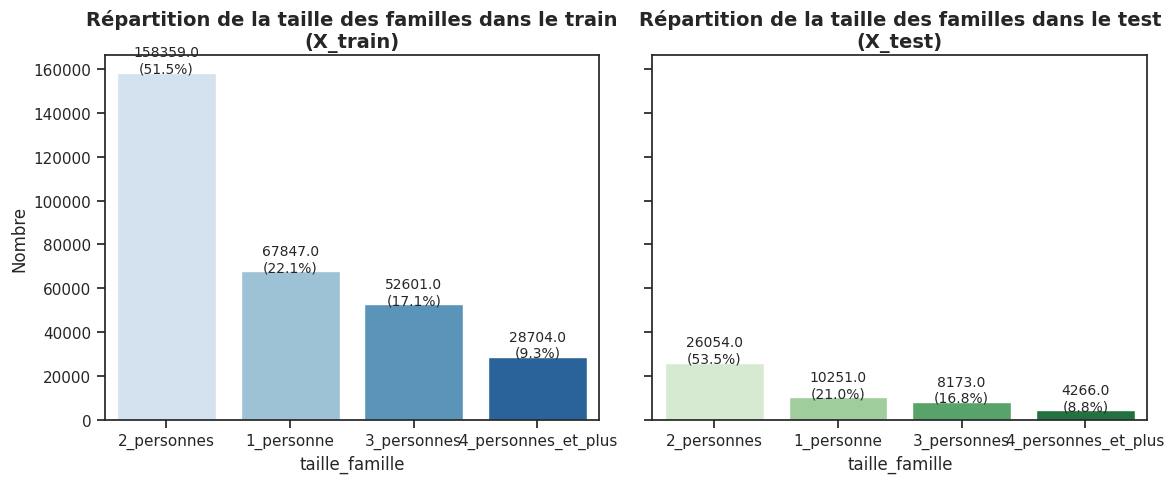

In [90]:
# Tracé du bar chart avec notre fonction
comparaison_categorie(
    train_df=clean_X_train,
    test_df=clean_X_test,
    var='taille_famille',
    titre_train="Répartition de la taille des familles dans le train\n(X_train)",
    titre_test="Répartition de la taille des familles dans le test\n(X_test)"
)

#### DEF_30_CNT_SOCIAL_CIRCLE
**Description** : Nombre de défauts de paiement parmi les contacts sociaux du client sur une période de 30 jours.

- **Importance métier** :
    - Cette variable pourrait indiquer un effet d'influence sociale : les contacts d'un client en défaut peuvent refléter son propre risque.
    - Elle peut être un proxy indirect pour le comportement financier d'un client.
- **Objectif de l'analyse** :
    - Étudier la répartition des valeurs.
    - Identifier si cette variable est significativement liée à la variable cible.


#### DEF_60_CNT_SOCIAL_CIRCLE
**Description** : Nombre de défauts de paiement parmi les contacts sociaux du client sur une période de 60 jours.

- **Importance métier** :
    - Similaire à `DEF_30_CNT_SOCIAL_CIRCLE`, mais sur une période plus longue.
    - Peut capturer un effet social à plus long terme.
- **Objectif de l'analyse** :
    - Étudier la répartition des valeurs.
    - Vérifier la relation entre cette variable et la probabilité de défaut.

#### OBS_60_CNT_SOCIAL_CIRCLE
#### DEF_60_CNT_SOCIAL_CIRCLE

**Analyse de ces variables**

In [91]:
clean_X_train['DEF_30_CNT_SOCIAL_CIRCLE'].value_counts()

DEF_30_CNT_SOCIAL_CIRCLE
0.00     272345
1.00      28328
2.00       5323
3.00       1192
4.00        253
5.00         56
6.00         11
7.00          1
34.00         1
8.00          1
Name: count, dtype: int64

In [92]:
# Affichage des 10 premières lignes de la colonne 'DEF_30_CNT_SOCIAL_CIRCLE'
print(clean_X_train['DEF_30_CNT_SOCIAL_CIRCLE'].head(10))


0   2.00
1   0.00
2   0.00
3   0.00
4   0.00
5   0.00
6   0.00
7   0.00
8   0.00
9   0.00
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64


In [93]:
list_var = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']

clean_X_train[list_var].describe()

OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
count                307,511.00                307,511.00   
mean                       1.42                      0.14   
std                        2.40                      0.45   
min                        0.00                      0.00   
25%                        0.00                      0.00   
50%                        0.00                      0.00   
75%                        2.00                      0.00   
max                      348.00                     34.00   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  
count                307,511.00                307,511.00  
mean                       1.40                      0.10  
std                        2.38                      0.36  
min                        0.00                      0.00  
25%                        0.00                      0.00  
50%                        0.00                      0.00  
75%                        2.00                      0.00  
max                      344.00                     24.00

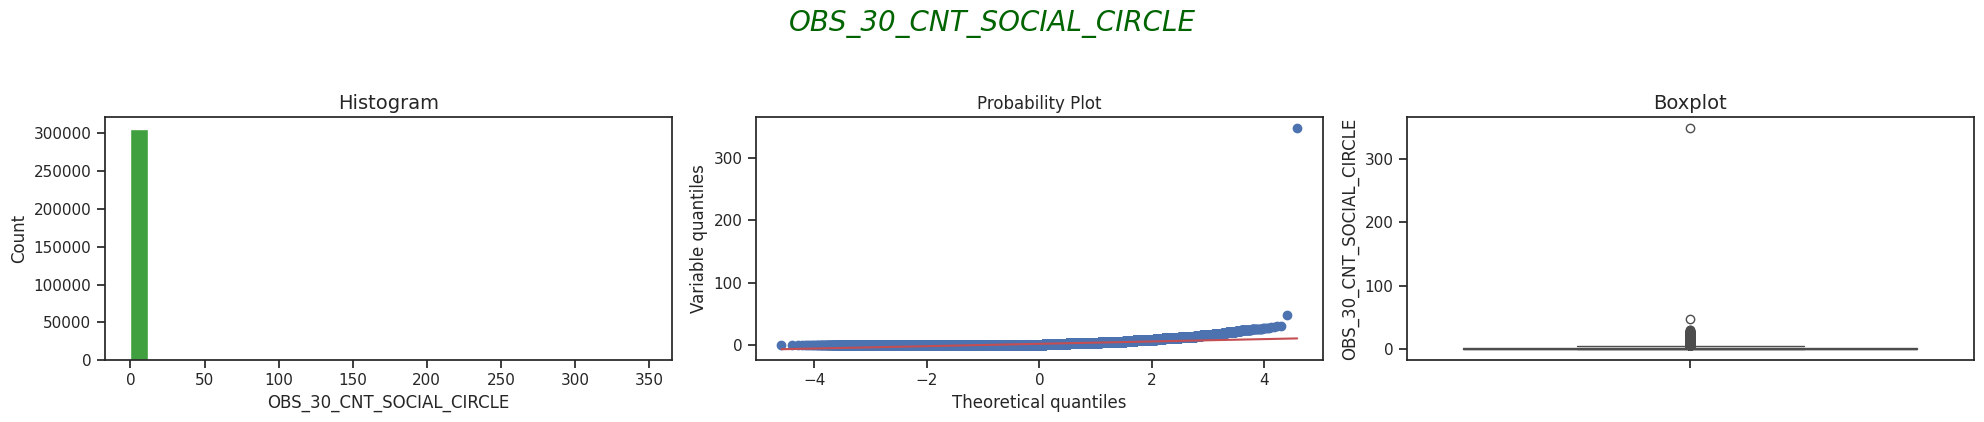

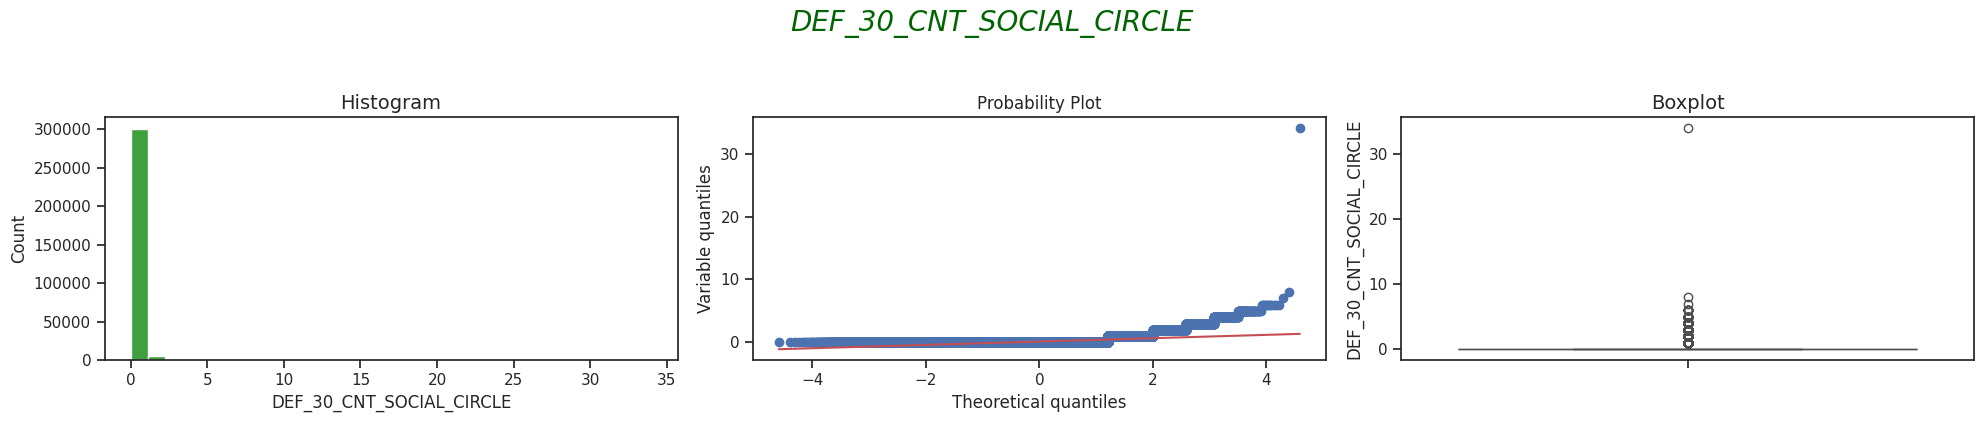

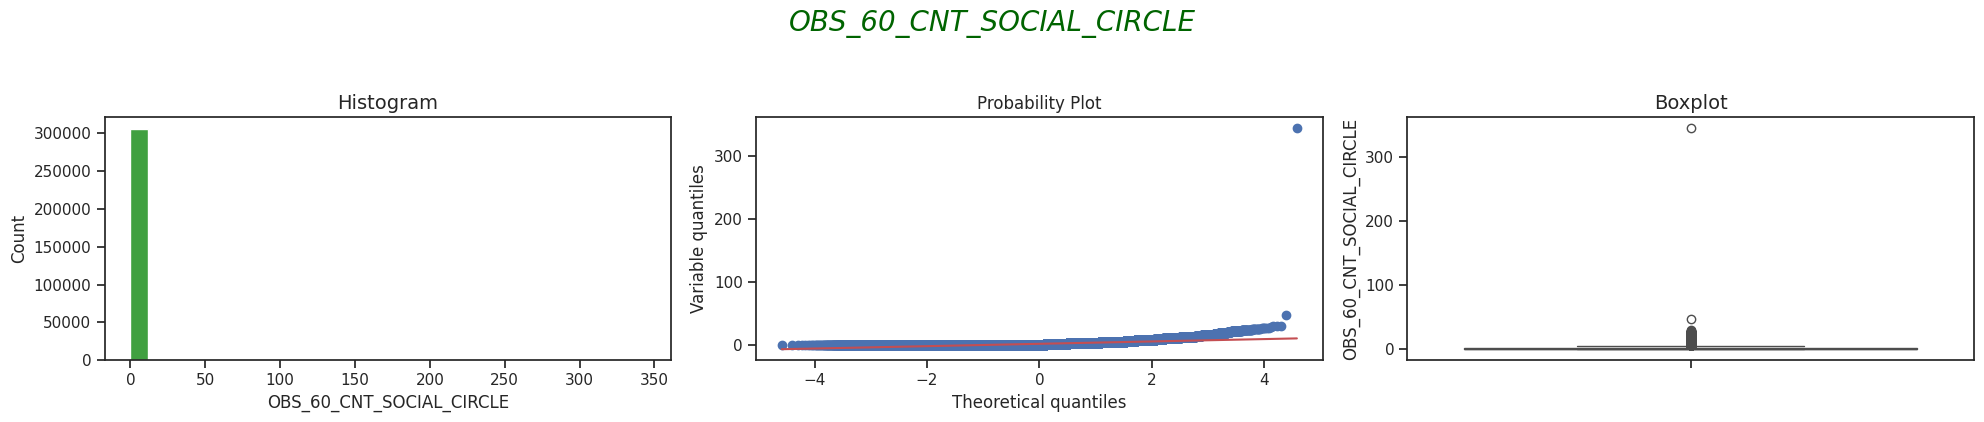

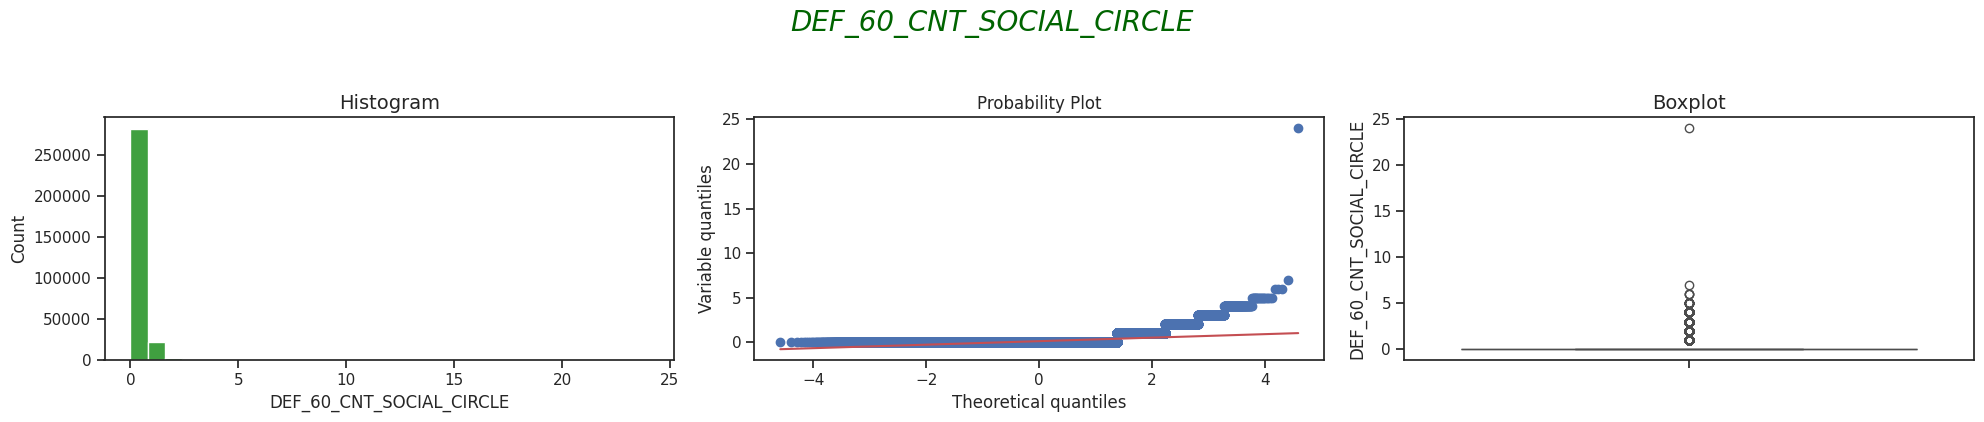

In [94]:
for var in list_var:
    diagnostic_plots(clean_X_train, var, f"{var}")

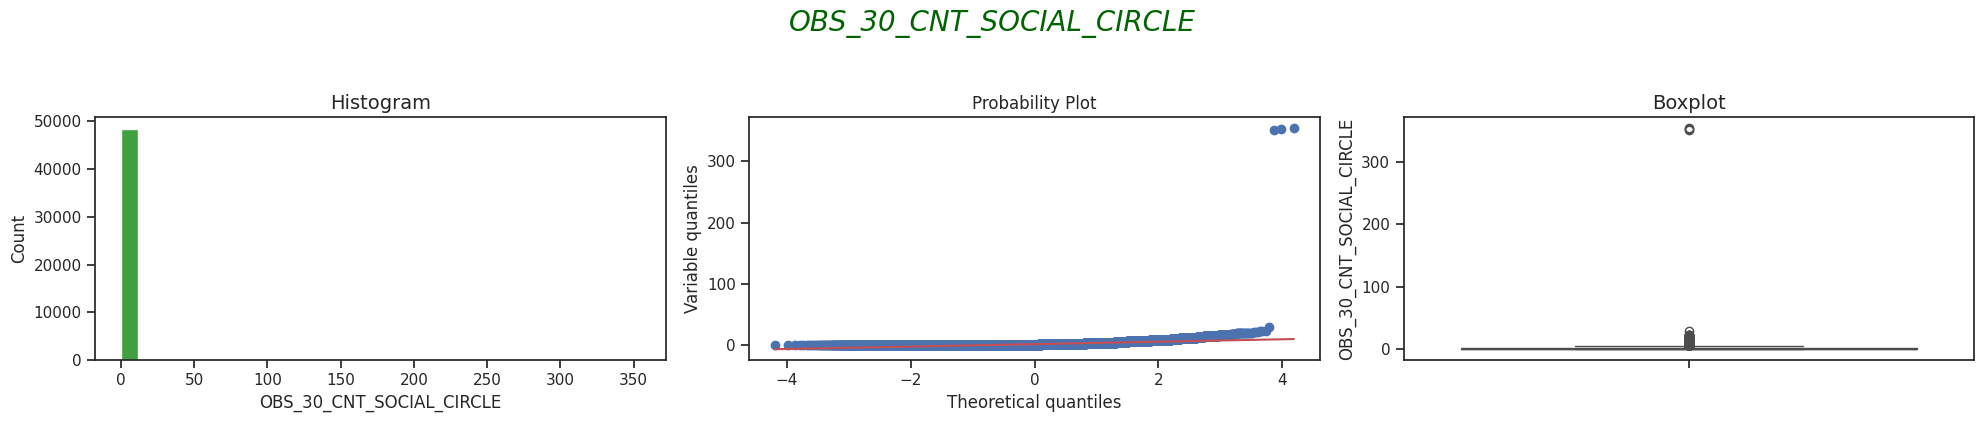

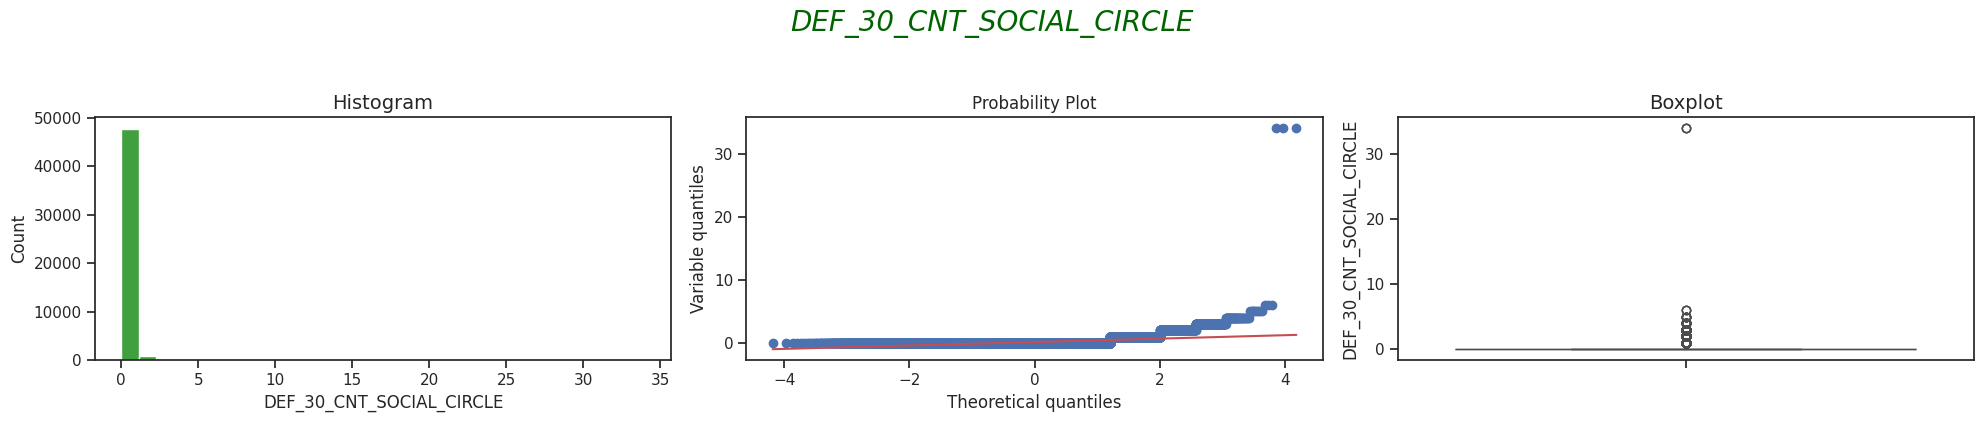

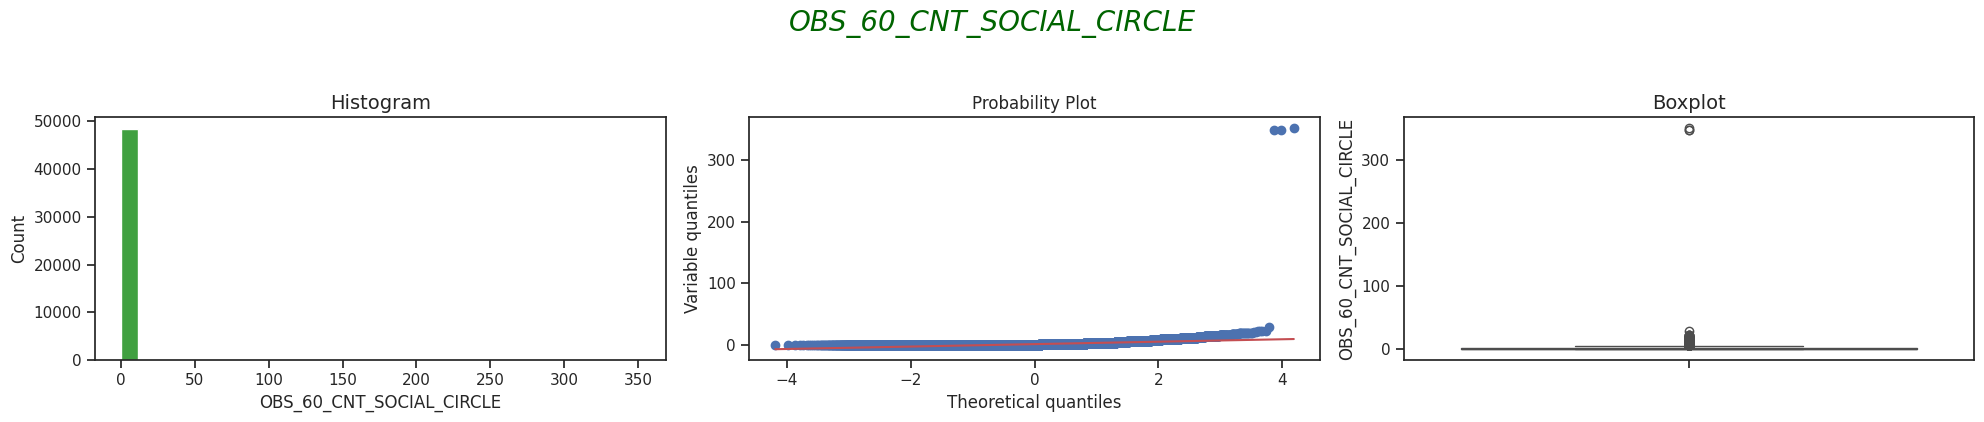

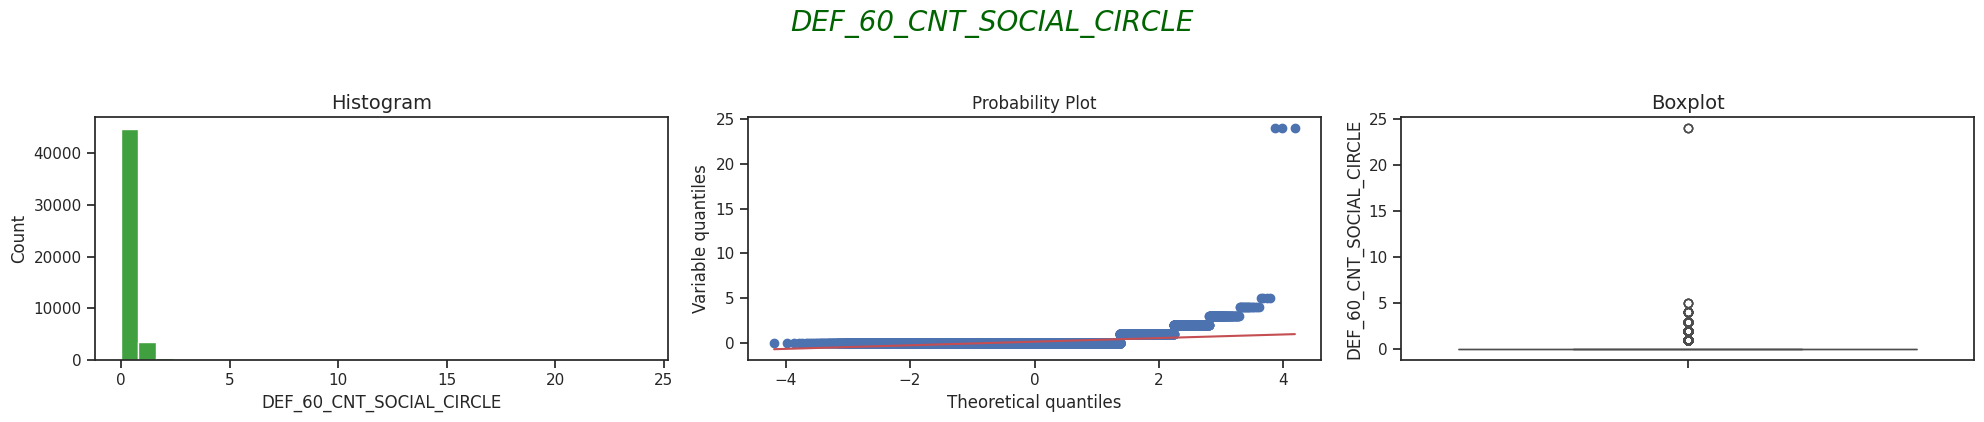

In [95]:
for var in list_var:
    diagnostic_plots(clean_X_test, var, f"{var}")

**Suppression des variables sociales (`OBS_30_CNT_SOCIAL_CIRCLE`, `DEF_30_CNT_SOCIAL_CIRCLE`, `OBS_60_CNT_SOCIAL_CIRCLE`, `DEF_60_CNT_SOCIAL_CIRCLE`)**

**Raisons de la suppression :**

1. **Forte concentration des valeurs** :
   - Comme le montre l'histogramme, la majorité des valeurs sont concentrées autour de **0**, ce qui reflète un manque de variabilité dans les données.
   - Cela signifie que ces variables n'apportent pas d'information discriminante pour la modélisation.

2. **Présence de valeurs extrêmes (outliers)** :
   - Les boxplots mettent en évidence des valeurs extrêmes (exemple : `10`, `20`, voire plus). Ces outliers représentent un nombre très faible d'observations, mais pourraient biaiser les résultats si elles ne sont pas traitées.
   - Ces valeurs extrêmes sont rares et peu représentatives de la population générale.

3. **Distribution non normale** :
   - Le Q-Q plot montre que ces variables ne suivent pas une distribution normale, ce qui est attendu, mais cela confirme leur nature fortement asymétrique et peu informative.

4. **Redondance d'information métier limitée** :
   - Ces variables représentent des informations sur les **contacts sociaux du client** (exemple : nombre de défauts de paiement parmi ses contacts).
   - Or, nous nous concentrons sur le **comportement individuel** du client, rendant ces variables moins pertinentes pour notre problématique.

#### Conclusion :
Ces variables ont été supprimées car elles :
- N'apportent pas de variabilité utile à la modélisation.
- Contiennent des valeurs extrêmes peu représentatives.
- Sont moins pertinentes pour comprendre ou prédire le comportement financier du client.


In [96]:
# Liste des variables à supprimer
variables_to_drop = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']

# Suppression des variables dans clean_X_train et clean_X_test
clean_X_train = clean_X_train.drop(columns=variables_to_drop)
clean_X_test = clean_X_test.drop(columns=variables_to_drop)

# Vérification des dimensions après suppression
print(f"Dimensions après suppression :\nX_train : {clean_X_train.shape}\nX_test : {clean_X_test.shape}")


Dimensions après suppression :
X_train : (307511, 27)
X_test : (48744, 27)


In [97]:
# Affichage des colonnes restantes dans clean_X_train
remaining_columns = clean_X_train.columns

# Affichage du nombre total de colonnes restantes
print(f"Nombre de colonnes restantes : {len(remaining_columns)}")
print("Colonnes restantes :", remaining_columns)

Nombre de colonnes restantes : 27
Colonnes restantes : Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'EXT_SOURCE_2',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_8', 'nbr_enfants', 'taille_famille'],
      dtype='object')


## 2.c Analyse des variables continues (numériques)



Les variables continues représentent des mesures ou des montants qui peuvent prendre une infinité de valeurs dans une plage donnée. Par exemple, les revenus, les montants des crédits, ou encore les jours (âge, ancienneté professionnelle).

**Étapes dans cette section :**
1. Identifier les variables continues en fonction de leur plage de valeurs et du nombre de valeurs uniques.
2. Étudier leur distribution à l'aide de graphiques de densité ou d'histogrammes.
3. Détecter et traiter les outliers à l'aide de boxplots.
4. Appliquer des transformations (logarithmique, standardisation, etc.) si nécessaire.

Nous allons commencer par identifier les variables continues dans le dataset.


##### 2.c.1 Raisons métiers




**1. Raisons générales :**
Nous avons décidé de supprimer certaines variables après avoir évalué leur **pertinence métier** et leur lien potentiel avec la cible (`TARGET`). Les critères de suppression sont :
- **Faible pertinence métier** : Les variables trop éloignées de la problématique de capacité de remboursement.
- **Faible variabilité/distribution non informative** : Les variables dont la distribution montre peu de pouvoir discriminant.
- **Lien indirect ou faible avec la cible** : Si aucune logique métier ou statistique ne justifie leur inclusion.

** 2. Variables supprimées :**
- **`REGION_POPULATION_RELATIVE`** : Variable géographique sans lien direct avec la capacité de remboursement.
- **`AMT_GOODS_PRICE`** : Prix des biens achetés. Analyse statistique effectuée pour confirmer sa faible variabilité et son absence de pertinence.
- **`DAYS_REGISTRATION`** : Jours depuis l'enregistrement de la voiture, sans intérêt direct pour la stabilité ou le risque financier.
- **`DAYS_ID_PUBLISH`** : Jours depuis le dernier changement d'identifiant administratif, sans utilité pour la modélisation.
- **`DAYS_LAST_PHONE_CHANGE`** : Date de changement de téléphone, reflétant un comportement indirect sans lien avec la problématique.

**3. Résultat attendu :**
Ces suppressions permettent de réduire le bruit dans nos données, en conservant uniquement les variables les plus pertinentes pour notre modèle.

count     307,511.00
mean      538,316.29
std       369,288.98
min        40,500.00
25%       238,500.00
50%       450,000.00
75%       679,500.00
max     4,050,000.00
Name: AMT_GOODS_PRICE, dtype: float64


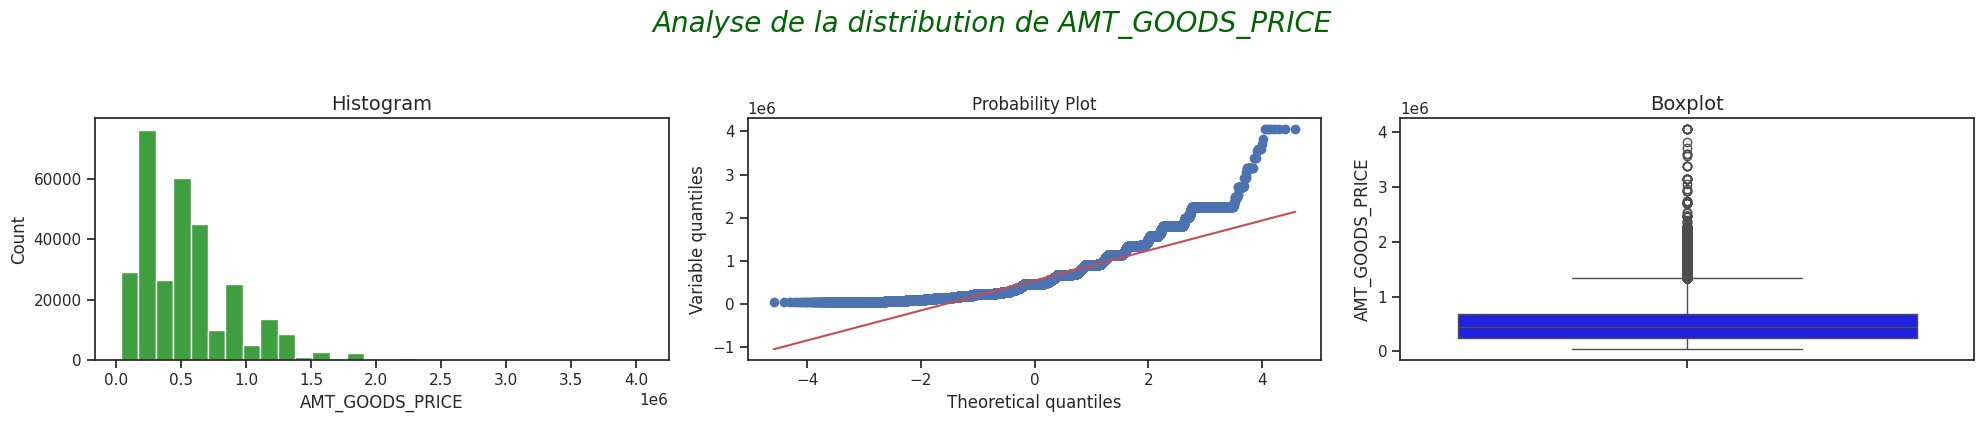

In [98]:
# Analyse statistique de AMT_GOODS_PRICE
print(clean_X_train['AMT_GOODS_PRICE'].describe())

# Affichage de la distribution avec la fonction de diagnostic
diagnostic_plots(clean_X_train, 'AMT_GOODS_PRICE', "Analyse de la distribution de AMT_GOODS_PRICE")


L'histogramme montre une concentration importante autour de valeurs spécifiques (effet de plafonnement), ce qui indique un manque de variabilité significative.
Le Q-Q plot montre une déviation claire par rapport à une distribution normale.
Le boxplot révèle la présence de valeurs extrêmes importantes, ce qui pourrait affecter l'analyse si ces valeurs ne sont pas pertinentes.
Conclusion :
Cette variable est fortement biaisée et redondante avec d'autres variables financières comme AMT_CREDIT.
Décision : Suppression justifiée par sa faible pertinence dans le cadre métier et sa corrélation probable avec d'autres variables.

In [99]:
# Suppression de la variable AMT_GOODS_PRICE
clean_X_train = clean_X_train.drop(columns=['AMT_GOODS_PRICE'])
clean_X_test = clean_X_test.drop(columns=['AMT_GOODS_PRICE'])

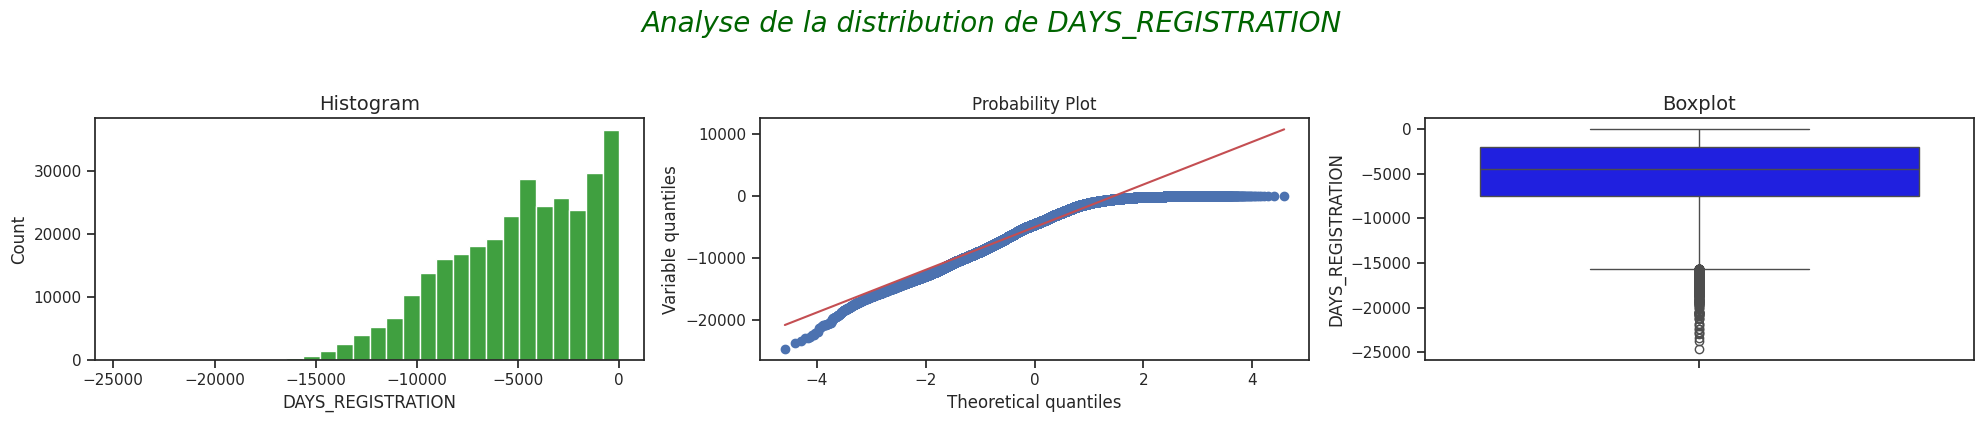

In [100]:
# Analyse de la distribution avec la fonction de diagnostic
diagnostic_plots(clean_X_train, 'DAYS_REGISTRATION', "Analyse de la distribution de DAYS_REGISTRATION")


In [101]:
# Suppression de la variable DAYS_REGISTRATION
clean_X_train = clean_X_train.drop(columns=['DAYS_REGISTRATION'])
clean_X_test = clean_X_test.drop(columns=['DAYS_REGISTRATION'])

DAYS_REGISTRATION correspond au nombre de jours depuis l'enregistrement de la voiture. Bien que cette information soit intéressante, elle est indirectement liée à la capacité de remboursement.
Conclusion : Cette variable est considérée comme non pertinente pour la problématique métier.

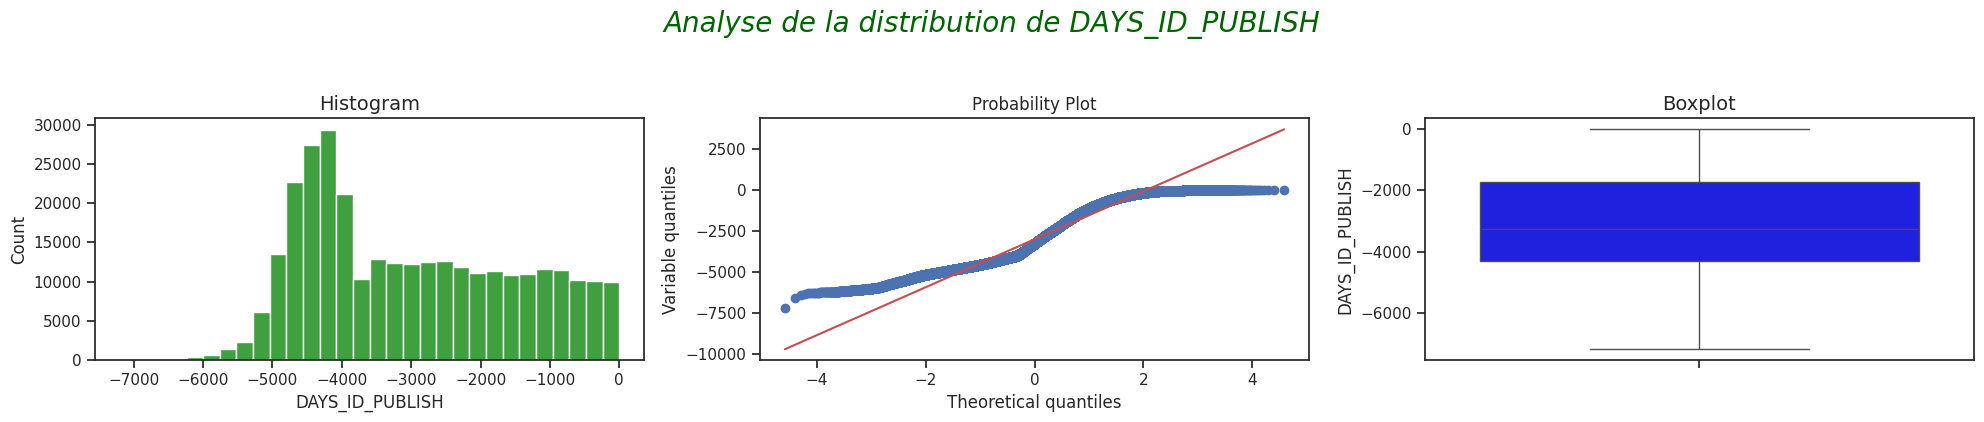

In [102]:
# Analyse de la distribution avec la fonction de diagnostic
diagnostic_plots(clean_X_train, 'DAYS_ID_PUBLISH', "Analyse de la distribution de DAYS_ID_PUBLISH")


In [103]:
# Calcul du coefficient de corrélation point bisérial
correlation = clean_X_train['DAYS_ID_PUBLISH'].corr(y_train)
print(f"Corrélation entre DAYS_ID_PUBLISH et TARGET : {correlation:.4f}")


Corrélation entre DAYS_ID_PUBLISH et TARGET : 0.0515


In [104]:
from scipy.stats import mannwhitneyu

# Séparer les données selon les classes de la cible
group_0 = clean_X_train.loc[y_train == 0, 'DAYS_ID_PUBLISH']
group_1 = clean_X_train.loc[y_train == 1, 'DAYS_ID_PUBLISH']

# Test de Mann-Whitney
stat, p = mannwhitneyu(group_0, group_1, alternative='two-sided')
print(f"Statistique de test : {stat:.4f}, p-value : {p:.4f}")

# Interprétation
if p < 0.05:
    print("La variable DAYS_ID_PUBLISH est significativement différente entre les classes TARGET (corrélée).")
else:
    print("Aucune différence significative entre les classes TARGET (non corrélée).")


Statistique de test : 3118165526.0000, p-value : 0.0000
La variable DAYS_ID_PUBLISH est significativement différente entre les classes TARGET (corrélée).


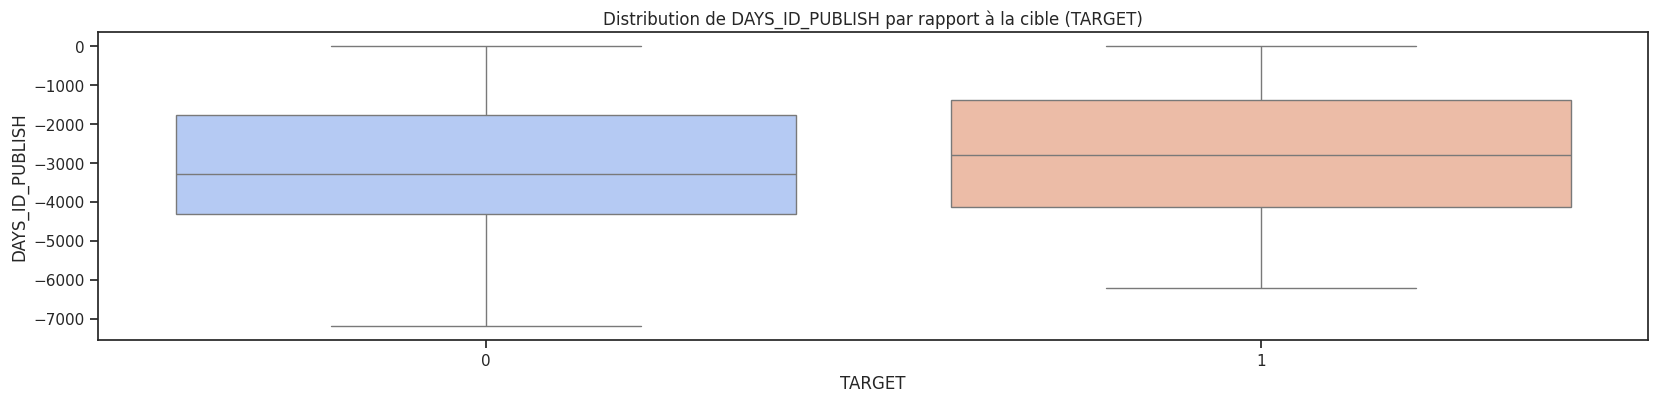

In [105]:
# Tracé d'un boxplot pour visualiser la relation
sns.boxplot(x=y_train, y=clean_X_train['DAYS_ID_PUBLISH'], palette="coolwarm")
plt.title("Distribution de DAYS_ID_PUBLISH par rapport à la cible (TARGET)")
plt.xlabel("TARGET")
plt.ylabel("DAYS_ID_PUBLISH")
plt.show()


In [106]:
# Suppression de la variable DAYS_ID_PUBLISH
clean_X_train = clean_X_train.drop(columns=['DAYS_ID_PUBLISH'])
clean_X_test = clean_X_test.drop(columns=['DAYS_ID_PUBLISH'])


In [107]:
# Suppression de la variable DAYS_LAST_PHONE_CHANGE
clean_X_train = clean_X_train.drop(columns=['DAYS_LAST_PHONE_CHANGE'])
clean_X_test = clean_X_test.drop(columns=['DAYS_LAST_PHONE_CHANGE'])


In [108]:
# Affichage des colonnes restantes dans clean_X_train
remaining_columns = clean_X_train.columns

# Affichage du nombre total de colonnes restantes
print(f"Nombre de colonnes restantes : {len(remaining_columns)}")
print("Colonnes restantes :", remaining_columns)

Nombre de colonnes restantes : 23
Colonnes restantes : Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'EXT_SOURCE_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8', 'nbr_enfants',
       'taille_famille'],
      dtype='object')


#### 2.c.2 Analyse des variables temporelles




**Variables analysées :**
1. **`DAYS_BIRTH`** : Âge du client (en jours, valeur négative).
2. **`DAYS_EMPLOYED`** : Jours depuis le début de l'emploi.

**Objectif :**
L'objectif de cette analyse est de :
- Étudier la distribution de ces variables.
- Identifier des anomalies ou valeurs aberrantes (comme les valeurs positives pour `DAYS_EMPLOYED`).
- Comprendre leur pertinence métier pour évaluer la stabilité et la situation financière du client.

##### DAYS_EMPLOYED

In [109]:
clean_X_train['DAYS_EMPLOYED'].describe()


count   307,511.00
mean     63,815.05
std     141,275.77
min     -17,912.00
25%      -2,760.00
50%      -1,213.00
75%        -289.00
max     365,243.00
Name: DAYS_EMPLOYED, dtype: float64

In [110]:
# Calcul du nombre d'années' (même principe que pour l'âge)
clean_X_train['DAYS_EMPLOYED'] = round(clean_X_train['DAYS_EMPLOYED'] / -365, 0)

In [111]:
clean_X_train['DAYS_EMPLOYED'].describe()


count   307,511.00
mean       -174.90
std         387.19
min      -1,001.00
25%           1.00
50%           3.00
75%           8.00
max          49.00
Name: DAYS_EMPLOYED, dtype: float64

In [112]:
clean_X_train[clean_X_train['DAYS_EMPLOYED'] < 0].shape


(55374, 23)

In [113]:
# Suppression temporaire des clients retraités et chômeurs pour calculer l'ancienneté des clients

modalite_to_drop = ['Sans emploi']

temp_X_train = clean_X_train.loc[~clean_X_train['NAME_INCOME_TYPE'].isin(modalite_to_drop), :]
temp_X_train.shape

(252104, 23)

In [114]:
print(f"Il y a donc {len(clean_X_train) - (len(temp_X_train))} retraités ou sans emploi dans l'ensemble d'entraînement.")
print(f"Les retraités et les chômeurs représentent donc {(len(clean_X_train) - (len(temp_X_train))) / len(clean_X_train) * 100: .1f}% des demandeurs de crédit.")

Il y a donc 55407 retraités ou sans emploi dans l'ensemble d'entraînement.
Les retraités et les chômeurs représentent donc  18.0% des demandeurs de crédit.


In [115]:
#Calcul des tranches d'ancienneté

pd.qcut(temp_X_train.DAYS_EMPLOYED, q=4).head(7)

0    (-0.001, 2.0]
1       (2.0, 5.0]
2    (-0.001, 2.0]
3       (5.0, 9.0]
4       (5.0, 9.0]
5       (2.0, 5.0]
6       (5.0, 9.0]
Name: DAYS_EMPLOYED, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 2.0] < (2.0, 5.0] < (5.0, 9.0] < (9.0, 49.0]]

In [116]:
clean_X_train['anciennete_entreprise'] = clean_X_train['DAYS_EMPLOYED']

clean_X_train['anciennete_entreprise'] = np.where(clean_X_train['DAYS_EMPLOYED'] <= 2,
                                                  '2_ans_et_moins', clean_X_train['anciennete_entreprise'])

clean_X_train['anciennete_entreprise'] = np.where((clean_X_train['DAYS_EMPLOYED'] > 2) & (clean_X_train['DAYS_EMPLOYED'] <= 5),
                                                  '3_a_5_ans', clean_X_train['anciennete_entreprise'])

clean_X_train['anciennete_entreprise'] = np.where((clean_X_train['DAYS_EMPLOYED'] > 5) & (clean_X_train['DAYS_EMPLOYED'] <= 9),
                                                  '6_a_9_ans', clean_X_train['anciennete_entreprise'])

clean_X_train['anciennete_entreprise'] = np.where(clean_X_train['DAYS_EMPLOYED'] > 9,
                                                  '10_ans_et_plus', clean_X_train['anciennete_entreprise'])

clean_X_train['anciennete_entreprise'] = np.where(clean_X_train['NAME_INCOME_TYPE'].isin(modalite_to_drop),
                                                  'retraité_ou_sans_emploi', clean_X_train['anciennete_entreprise'])

In [117]:
# Calcul du nombre de mois (même principe que pour l'âge)
clean_X_test['DAYS_EMPLOYED'] = round(clean_X_test['DAYS_EMPLOYED'] / -365, 0)

clean_X_test['DAYS_EMPLOYED'].describe()

count   48,744.00
mean      -184.96
std        395.61
min     -1,001.00
25%          1.00
50%          4.00
75%          8.00
max         48.00
Name: DAYS_EMPLOYED, dtype: float64

In [118]:
clean_X_test['anciennete_entreprise'] = clean_X_test['DAYS_EMPLOYED']

clean_X_test['anciennete_entreprise'] = np.where(clean_X_test['DAYS_EMPLOYED'] <= 2,
                                                  '2_ans_et_moins', clean_X_test['anciennete_entreprise'])

clean_X_test['anciennete_entreprise'] = np.where((clean_X_test['DAYS_EMPLOYED'] > 2) & (clean_X_test['DAYS_EMPLOYED'] <= 5),
                                                  '3_a_5_ans', clean_X_test['anciennete_entreprise'])

clean_X_test['anciennete_entreprise'] = np.where((clean_X_test['DAYS_EMPLOYED'] > 5) & (clean_X_test['DAYS_EMPLOYED'] <= 9),
                                                  '6_a_9_ans', clean_X_test['anciennete_entreprise'])

clean_X_test['anciennete_entreprise'] = np.where(clean_X_test['DAYS_EMPLOYED'] > 9,
                                                  '10_ans_et_plus', clean_X_test['anciennete_entreprise'])

clean_X_test['anciennete_entreprise'] = np.where(clean_X_test['NAME_INCOME_TYPE'].isin(modalite_to_drop),
                                                  'retraité_ou_sans_emploi', clean_X_test['anciennete_entreprise'])

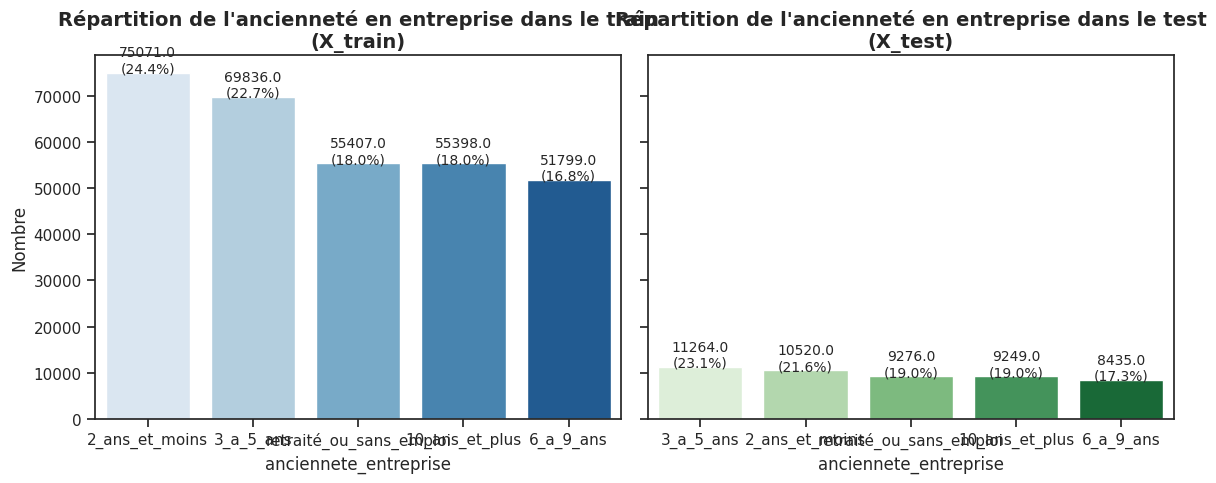

In [119]:
# Tracé du graphique pour l'ancienneté en entreprise
comparaison_categorie(
    train_df=clean_X_train,
    test_df=clean_X_test,
    var='anciennete_entreprise',
    titre_train="Répartition de l'ancienneté en entreprise dans le train\n(X_train)",
    titre_test="Répartition de l'ancienneté en entreprise dans le test\n(X_test)"
)


In [120]:
# Suppression de la variable DAYS_EMPLOYED dans X_Train et X_Test

clean_X_train.drop(labels='DAYS_EMPLOYED',
                   axis=1, inplace=True)

clean_X_test.drop(labels='DAYS_EMPLOYED',
                  axis=1, inplace=True)

In [121]:
clean_X_train.shape, clean_X_test.shape


((307511, 23), (48744, 23))

##### DAYS_BIRT

In [122]:
# Calculé en jours depuis le jour de la demande (d'où le négatif)
clean_X_train['DAYS_BIRTH'].describe()

count   307,511.00
mean    -16,037.00
std       4,363.99
min     -25,229.00
25%     -19,682.00
50%     -15,750.00
75%     -12,413.00
max      -7,489.00
Name: DAYS_BIRTH, dtype: float64

In [123]:
# Calcul de l'âge des clients
clean_X_train['DAYS_BIRTH'] = round(clean_X_train['DAYS_BIRTH'] / -365, 0)

# Calcul de l'âge des clients
clean_X_test['DAYS_BIRTH'] = round(clean_X_test['DAYS_BIRTH'] / -365, 0)

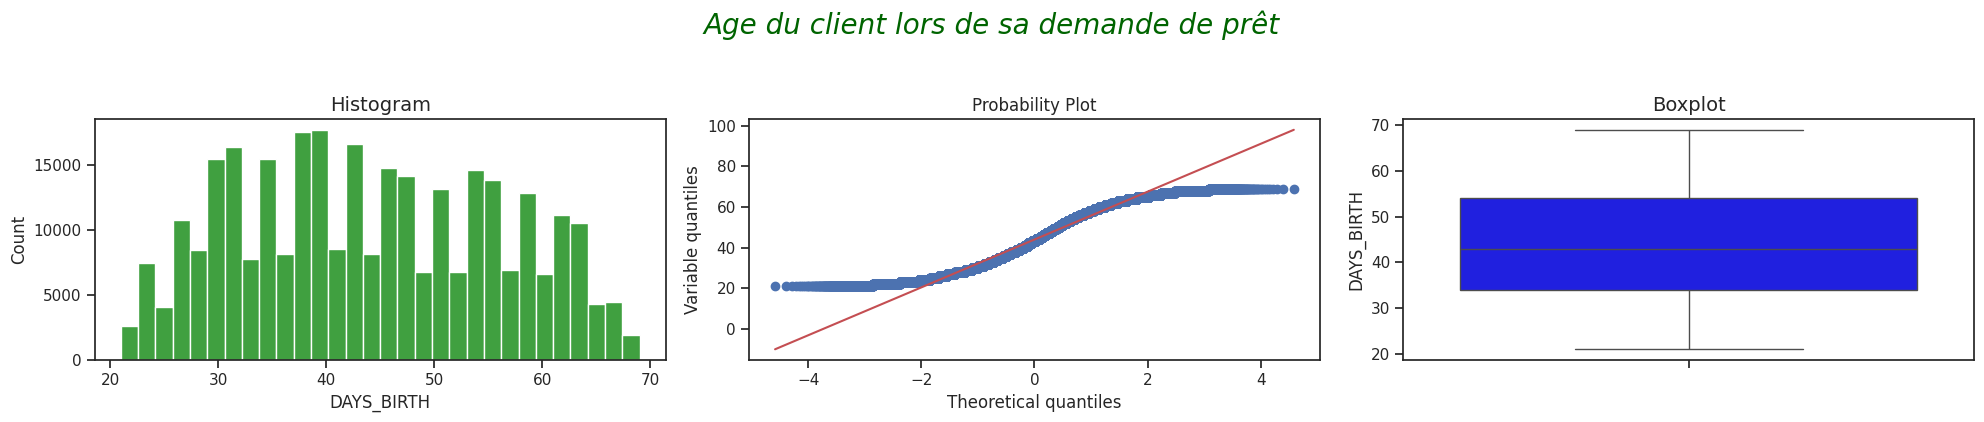

In [124]:
diagnostic_plots(clean_X_train, 'DAYS_BIRTH', "Age du client lors de sa demande de prêt")


In [125]:
pd.qcut(clean_X_train.DAYS_BIRTH, q=5).head(7)


0    (20.999, 32.0]
1      (39.0, 47.0]
2      (47.0, 56.0]
3      (47.0, 56.0]
4      (47.0, 56.0]
5      (39.0, 47.0]
6      (32.0, 39.0]
Name: DAYS_BIRTH, dtype: category
Categories (5, interval[float64, right]): [(20.999, 32.0] < (32.0, 39.0] < (39.0, 47.0] <
                                           (47.0, 56.0] < (56.0, 69.0]]

In [126]:
# creation de la variable cat age client qui regroupe les clients sur notre base train
clean_X_train['age_client'] = pd.qcut(clean_X_train.DAYS_BIRTH,
                                         q=5,
                                         labels=['32_ans_et_moins',
                                                 '33_a_39_ans',
                                                 '40_a_47_ans',
                                                 '48_a_56_ans',
                                                 '57_ans_et_plus'])

print(clean_X_train['age_client'].value_counts())

# creation de la variable cat age client qui regroupe les clients sur notre base test
clean_X_test['age_client'] = pd.cut(clean_X_test.DAYS_BIRTH,
                                    bins=[1,
                                          32,
                                          39,
                                          47,
                                          56,
                                          100],
                                    include_lowest=True,
                                    labels=['32_ans_et_moins',
                                            '33_a_39_ans',
                                            '40_a_47_ans',
                                            '48_a_56_ans',
                                            '57_ans_et_plus'])

print(clean_X_test['age_client'].value_counts())

age_client
32_ans_et_moins    65203
40_a_47_ans        63722
48_a_56_ans        61956
57_ans_et_plus     58796
33_a_39_ans        57834
Name: count, dtype: int64
age_client
40_a_47_ans        10360
32_ans_et_moins    10037
48_a_56_ans         9880
57_ans_et_plus      9240
33_a_39_ans         9227
Name: count, dtype: int64


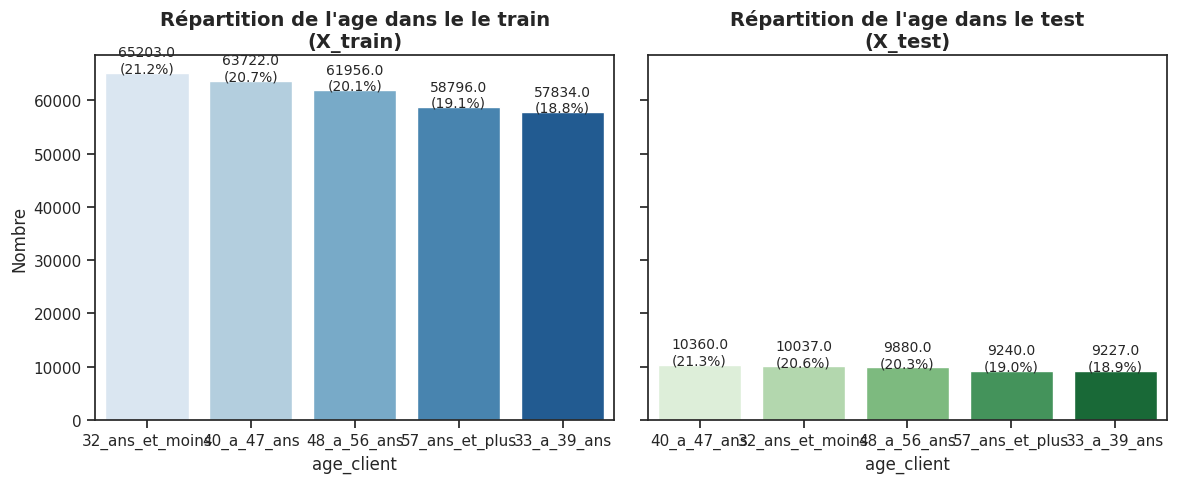

In [127]:
# Tracé du graphique pour l'ancienneté en entreprise
comparaison_categorie(
    train_df=clean_X_train,
    test_df=clean_X_test,
    var='age_client',
    titre_train="Répartition de l'age dans le le train\n(X_train)",
    titre_test="Répartition de l'age dans le test\n(X_test)"
)


In [128]:
# Suppression de la variable DAYS_BIRTH dans X_Train et X_Test

clean_X_train.drop(labels='DAYS_BIRTH',
                   axis=1, inplace=True)

clean_X_test.drop(labels='DAYS_BIRTH',
                  axis=1, inplace=True)



In [129]:
clean_X_train.shape, clean_X_test.shape

((307511, 23), (48744, 23))

### 2.c.3 Analyse des variables financières et du score externe



** Variables analysées :**
1. **`AMT_INCOME_TOTAL`** : Revenu total du client.
2. **`AMT_CREDIT`** : Montant du crédit demandé.
3. **`AMT_ANNUITY`** : Montant annuel des échéances.
4. **`EXT_SOURCE_2`** : Score externe utilisé pour l'évaluation du risque.

**Objectif :**

L'objectif de cette analyse est de :
- Étudier la distribution de ces variables.
- Identifier les valeurs aberrantes et leur impact potentiel.
- Vérifier la corrélation avec la cible (`TARGET`).
- Comprendre leur pertinence métier dans le cadre de la modélisation.


In [130]:
# Statistiques descriptives des variables financières et du score
variables_financieres = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'EXT_SOURCE_2']

print(clean_X_train[variables_financieres].describe())


       AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  EXT_SOURCE_2
count        307,511.00   307,511.00   307,511.00    307,511.00
mean         168,797.92   599,026.00    27,108.49          0.51
std          237,123.15   402,490.78    14,493.46          0.19
min           25,650.00    45,000.00     1,615.50          0.00
25%          112,500.00   270,000.00    16,524.00          0.39
50%          147,150.00   513,531.00    24,903.00          0.57
75%          202,500.00   808,650.00    34,596.00          0.66
max      117,000,000.00 4,050,000.00   258,025.50          0.85


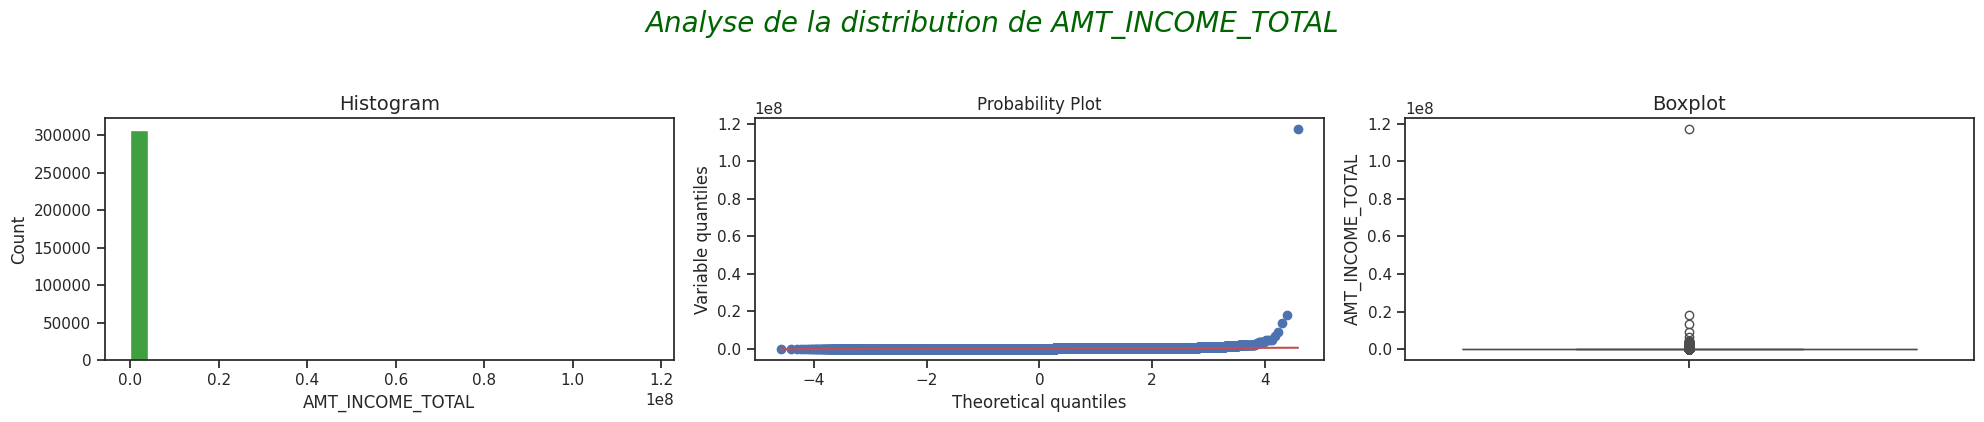

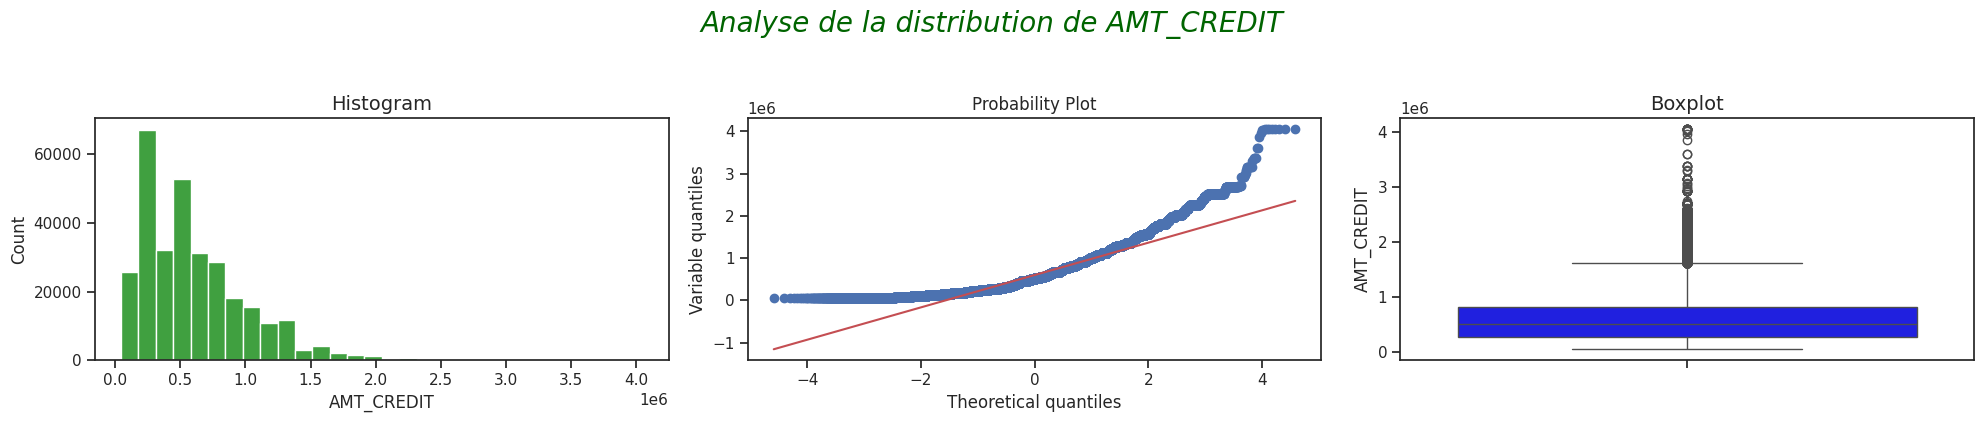

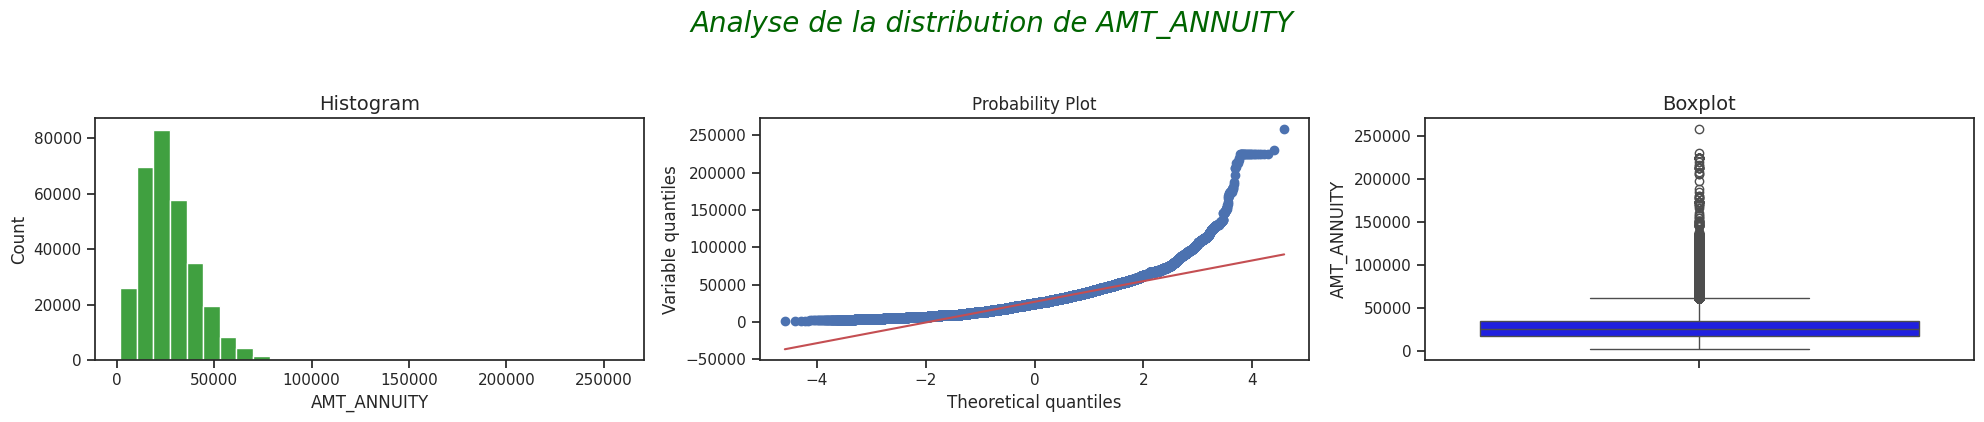

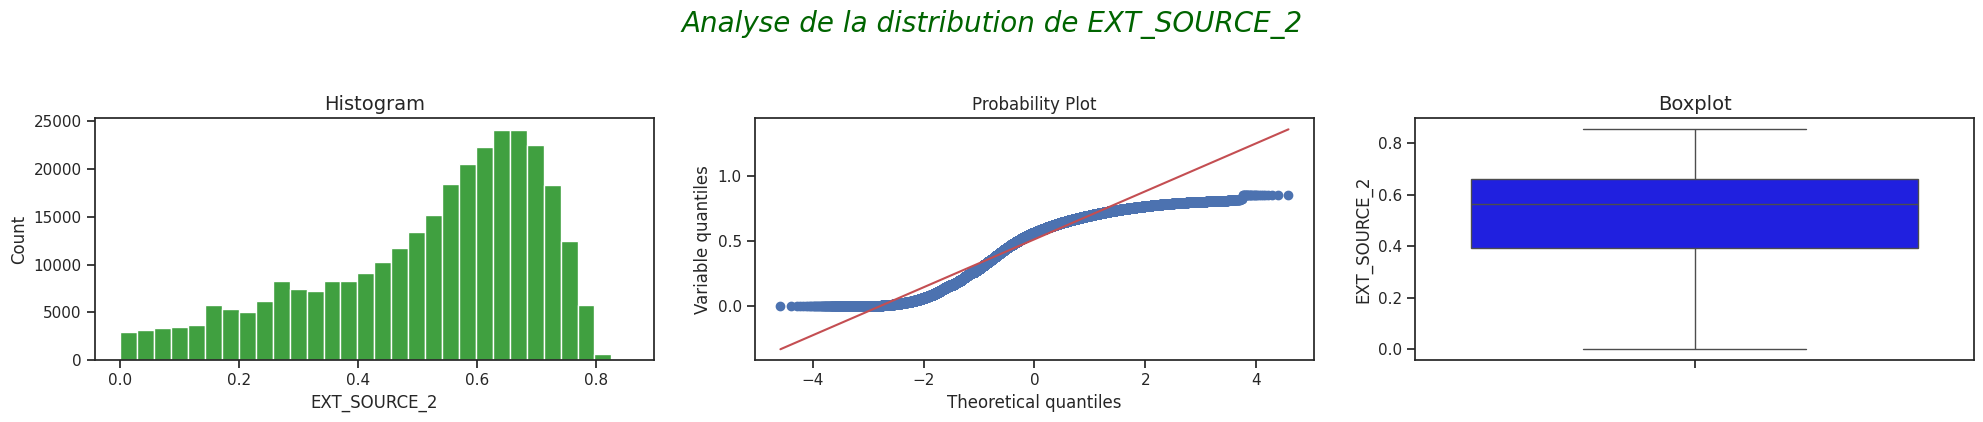

In [131]:

# Itération sur chaque variable pour afficher les diagnostics
for var in variables_financieres:
    diagnostic_plots(clean_X_train, var, f"Analyse de la distribution de {var}")


**Analyse des variables financières et du score**

**AMT_INCOME_TOTAL (Revenu total)**  
La variable représentant le revenu total des clients montre une distribution fortement asymétrique, avec une concentration importante autour des revenus faibles (moins de 500,000). Quelques observations extrêmes, représentant des revenus très élevés, sont visibles sous forme d'outliers marqués. Cela pourrait potentiellement biaiser les résultats de nos modèles. Une transformation semble nécessaire pour limiter l'impact de ces valeurs extrêmes.

**AMT_CREDIT (Montant du crédit demandé)**  
La distribution de cette variable est légèrement mieux répartie que celle des revenus, mais reste asymétrique. La majorité des montants de crédits demandés se situe sous 1,000,000, avec la présence notable de valeurs aberrantes. Là encore, il sera pertinent d'explorer une transformation pour normaliser cette variable et en améliorer l'intégration dans nos modèles.

**AMT_ANNUITY (Montant des échéances annuelles)**  
Les montants des échéances annuelles montrent une distribution asymétrique, mais légèrement mieux concentrée que les deux variables précédentes. Les valeurs extrêmes, bien qu'elles soient présentes, sont moins significatives. Cependant, pour garantir de bonnes performances algorithmiques, une transformation pourrait être envisagée pour cette variable également.

**EXT_SOURCE_2 (Score externe)**  
Le score externe présente une distribution nettement plus proche de la normalité, avec une plage de valeurs comprise entre 0 et 1. Peu ou pas d'outliers sont visibles. Cette variable semble donc prête à être intégrée telle quelle dans nos modèles sans nécessiter de transformation particulière.

**Synthèse**  
Les variables financières (**AMT_INCOME_TOTAL**, **AMT_CREDIT**, **AMT_ANNUITY**) montrent des distributions asymétriques et la présence de valeurs aberrantes importantes. Une normalisation ou transformation de ces variables est donc indispensable avant leur utilisation dans nos algorithmes de machine learning. En revanche, la variable **EXT_SOURCE_2** semble déjà exploitable sans nécessiter de modifications.



In [132]:
# Calcul des degrés d'asymétrie : Test Skewness

# Liste des variables financières
variables_financieres = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'EXT_SOURCE_2']

# Calcul des degrés d'asymétrie pour les variables financières
skewness_financieres = clean_X_train[variables_financieres].skew().sort_values()

# Affichage des résultats
print("Degrés d'asymétrie (Skewness) pour les variables financières :")
print(skewness_financieres)


Degrés d'asymétrie (Skewness) pour les variables financières :
EXT_SOURCE_2        -0.80
AMT_CREDIT           1.23
AMT_ANNUITY          1.58
AMT_INCOME_TOTAL   391.56
dtype: float64


In [133]:
# Liste des variables financières
variables_financieres = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'EXT_SOURCE_2']

# Calcul du kurtosis pour les variables financières
kurtosis_financieres = clean_X_train[variables_financieres].kurt().sort_values()

# Affichage des résultats
print("Coefficient d'aplatissement (Kurtosis) pour les variables financières :")
print(kurtosis_financieres)

Coefficient d'aplatissement (Kurtosis) pour les variables financières :
EXT_SOURCE_2            -0.26
AMT_CREDIT               1.93
AMT_ANNUITY              7.71
AMT_INCOME_TOTAL   191,786.55
dtype: float64


In [134]:
# Jarque-Bera test

from scipy import stats

alpha = 0.05

for i in variables_financieres:
    print ([i])
    a,b = stats.jarque_bera(clean_X_train[[i]])
    print ("Statistics : ", a, "; p-value : ", b)
    if b < alpha:
        print("On rejette H0 : la normalité de la distribution est rejetée\n")
    else:
        print("On accepte H0 : la normalité de la distribution est acceptée\n")

['AMT_INCOME_TOTAL']
Statistics :  471279821765169.1 ; p-value :  0.0
On rejette H0 : la normalité de la distribution est rejetée

['AMT_CREDIT']
Statistics :  126066.32414248875 ; p-value :  0.0
On rejette H0 : la normalité de la distribution est rejetée

['AMT_ANNUITY']
Statistics :  889098.145866223 ; p-value :  0.0
On rejette H0 : la normalité de la distribution est rejetée

['EXT_SOURCE_2']
Statistics :  33350.1341990588 ; p-value :  0.0
On rejette H0 : la normalité de la distribution est rejetée



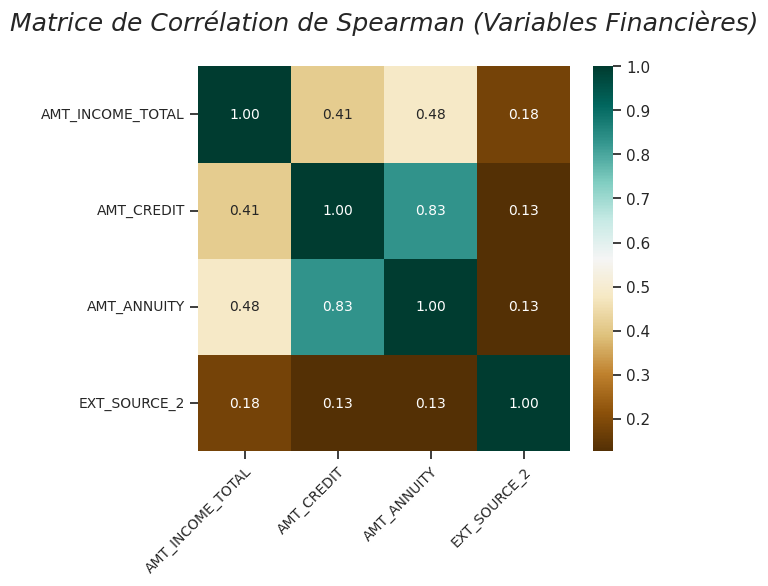

In [135]:
# Liste des variables financières
variables_financieres = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'EXT_SOURCE_2']

# Sous-ensemble des variables financières
df_analyse_num = clean_X_train[variables_financieres]

# Centrage et réduction des colonnes (normalisation)
df_analyse_norm = (df_analyse_num - df_analyse_num.mean(axis=0)) / df_analyse_num.std(axis=0)

# Création de la matrice de corrélation (Spearman)
corr_df = df_analyse_norm.corr(method='spearman')

# Heatmap de la matrice de corrélation
sns.set(style="ticks", rc={'figure.figsize': (6, 5)})
ax = sns.heatmap(corr_df, cmap="BrBG", annot=True, annot_kws={"size": 10}, fmt=".2f")
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=10, rotation=45, ha='right', rotation_mode='anchor')
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=10, horizontalalignment='right')

# Titre
plt.title("Matrice de Corrélation de Spearman (Variables Financières)\n",
          loc="center", fontsize=18, fontstyle='italic')
plt.show()


**Analyse de la normalité des variables financières**

Les tests de normalité réalisés sur les variables **AMT_INCOME_TOTAL**, **AMT_CREDIT**, **AMT_ANNUITY**, et **EXT_SOURCE_2** montrent que la normalité est rejetée pour toutes ces variables (p-value = 0). Cela signifie que leurs distributions s'écartent significativement d'une distribution normale.

Observations :
- **AMT_INCOME_TOTAL** : Distribution fortement asymétrique avec des outliers extrêmes. Cela est confirmé par une statistique de test extrêmement élevée.
- **AMT_CREDIT** et **AMT_ANNUITY** : Ces variables montrent également des écarts clairs par rapport à la normalité, bien que moins prononcés que pour le revenu total.
- **EXT_SOURCE_2** : Malgré une plage bornée entre 0 et 1, cette variable ne suit pas non plus une distribution normale.

Implications :
Ces résultats indiquent que des transformations seront nécessaires pour normaliser ces variables avant leur intégration dans les modèles de machine learning, afin de garantir des performances optimales. Les transformations possibles incluent des logarithmes, des racines carrées, ou des standardisations robustes pour réduire l'impact des valeurs extrêmes et aligner les distributions sur une forme plus proche de la normalité.


##### taux_endettement

In [136]:
clean_X_train['taux_endettement'] = clean_X_train['AMT_ANNUITY'] / clean_X_train['AMT_INCOME_TOTAL'] * 100
print(clean_X_train['taux_endettement'].describe())

clean_X_test['taux_endettement'] = clean_X_test['AMT_ANNUITY'] / clean_X_test['AMT_INCOME_TOTAL'] * 100
print(clean_X_test['taux_endettement'].describe())




count   307,511.00
mean         18.09
std           9.46
min           0.02
25%          11.48
50%          16.28
75%          22.91
max         187.60
Name: taux_endettement, dtype: float64
count   48,744.00
mean        18.30
std          9.55
min          0.57
25%         11.63
50%         16.59
75%         22.98
max        202.47
Name: taux_endettement, dtype: float64


In [137]:
### ajout de la variable taus d'endettement
clean_X_train['taux_endettement'] = pd.qcut(clean_X_train.taux_endettement,
                                      q=5,
                                      labels=['10%_et_mois',
                                              '11_a_14%',
                                              '15_a_19%',
                                              '20_a_25%',
                                              '26%_et_plus'])

print(clean_X_train['taux_endettement'].value_counts())


clean_X_test['taux_endettement'] = pd.cut(round(clean_X_test.taux_endettement, 0),
                                          bins=[-1,
                                                10,
                                                14,
                                                19,
                                                25,
                                                300],
                                          include_lowest=True,
                                          labels=['10%_et_mois',
                                                  '11_a_14%',
                                                  '15_a_19%',
                                                  '20_a_25%',
                                                  '26%_et_plus'])

print(clean_X_test['taux_endettement'].value_counts())

taux_endettement
20_a_25%       61522
11_a_14%       61509
10%_et_mois    61504
15_a_19%       61498
26%_et_plus    61478
Name: count, dtype: int64
taux_endettement
15_a_19%       11295
10%_et_mois     9641
11_a_14%        9603
26%_et_plus     9133
20_a_25%        9072
Name: count, dtype: int64


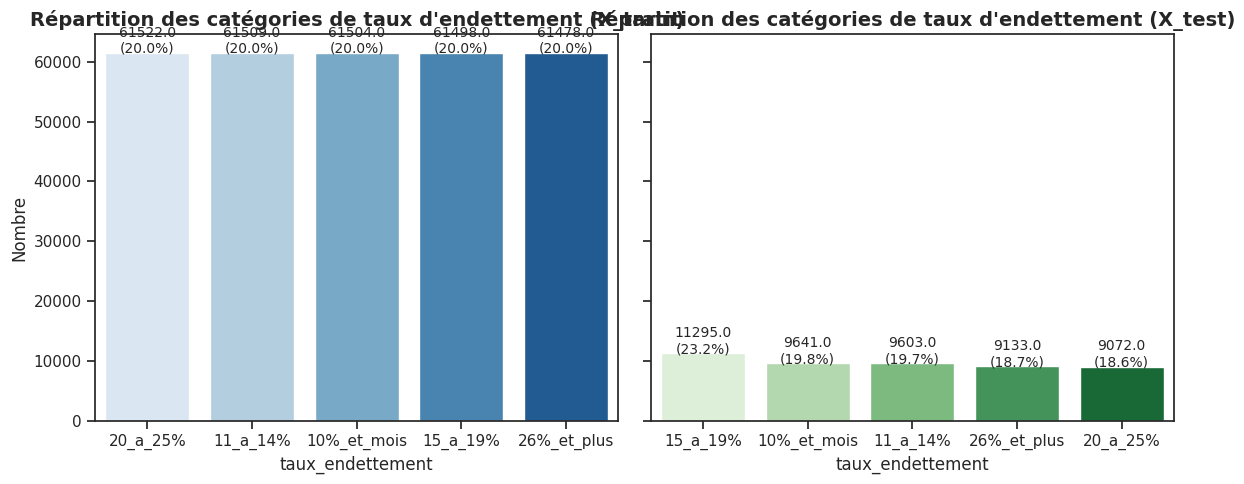

In [138]:
# Tracé du bar chart pour la variable 'taux_endettement' avec la fonction comparaison_categorie
comparaison_categorie(
    train_df=clean_X_train,
    test_df=clean_X_test,
    var='taux_endettement',
    titre_train="Répartition des catégories de taux d'endettement (X_train)",
    titre_test="Répartition des catégories de taux d'endettement (X_test)"
)


#####  duree des remboursements

In [139]:
clean_X_train['duree_remboursement'] =  round(clean_X_train['AMT_CREDIT'] / clean_X_train['AMT_ANNUITY'], 0)
clean_X_train['duree_remboursement'].describe()

clean_X_test['duree_remboursement'] =  round(clean_X_test['AMT_CREDIT'] / clean_X_test['AMT_ANNUITY'], 0)
clean_X_test['duree_remboursement'].describe()

count   48,744.00
mean        17.23
std          6.32
min          4.00
25%         13.00
50%         16.00
75%         21.00
max         72.00
Name: duree_remboursement, dtype: float64

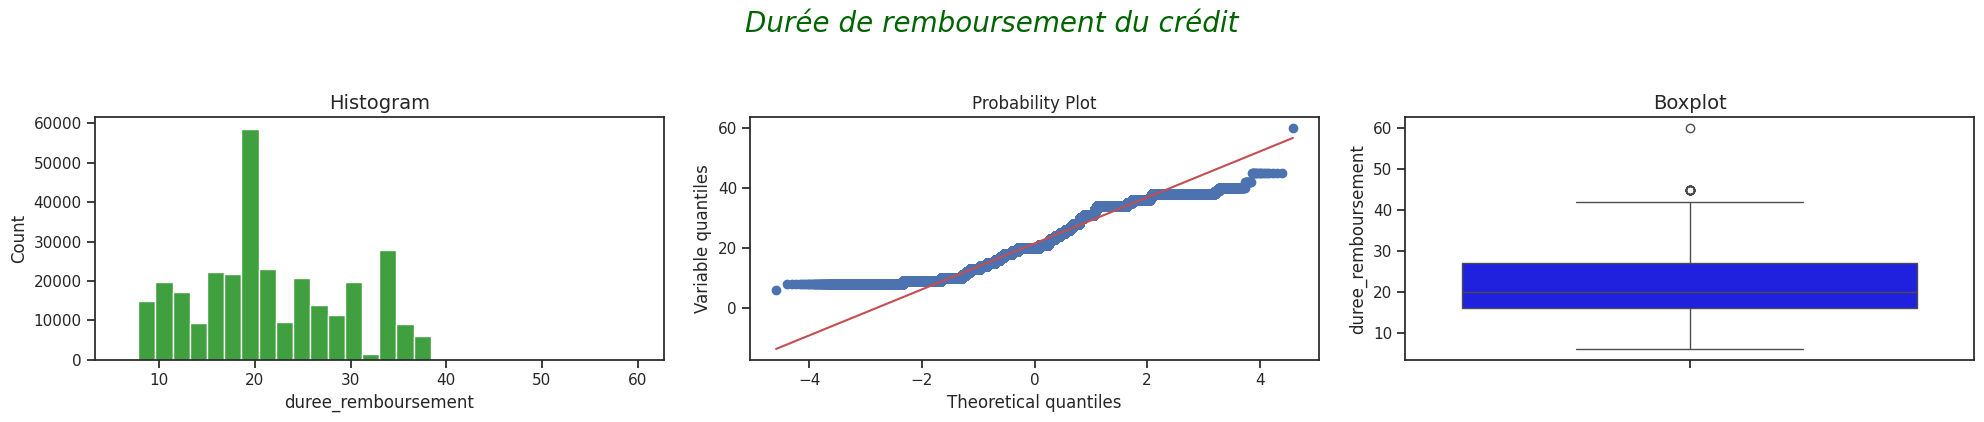

In [140]:
diagnostic_plots(clean_X_train, 'duree_remboursement', "Durée de remboursement du crédit")


In [141]:
pd.qcut(clean_X_train.duree_remboursement, q=3).head()


0    (5.999, 18.0]
1     (24.0, 60.0]
2     (18.0, 24.0]
3    (5.999, 18.0]
4     (18.0, 24.0]
Name: duree_remboursement, dtype: category
Categories (3, interval[float64, right]): [(5.999, 18.0] < (18.0, 24.0] < (24.0, 60.0]]

In [142]:
clean_X_train['duree_remboursement'] = pd.qcut(clean_X_train.duree_remboursement,
                                               q=3,
                                               labels=['18_mois_et_mois',
                                                       '19_a_24_mois',
                                                       '25_mois_et_plus'])

print(clean_X_train['duree_remboursement'].value_counts())


clean_X_test['duree_remboursement'] = pd.cut(clean_X_test.duree_remboursement,
                                             bins=[-1,
                                                   18,
                                                   24,
                                                   100],
                                             include_lowest=True,
                                             labels=['18_mois_et_mois',
                                                     '19_a_24_mois',
                                                     '25_mois_et_plus'])


print(clean_X_test['duree_remboursement'].value_counts())

duree_remboursement
18_mois_et_mois    105473
19_a_24_mois       102694
25_mois_et_plus     99344
Name: count, dtype: int64
duree_remboursement
18_mois_et_mois    29007
19_a_24_mois       13783
25_mois_et_plus     5954
Name: count, dtype: int64


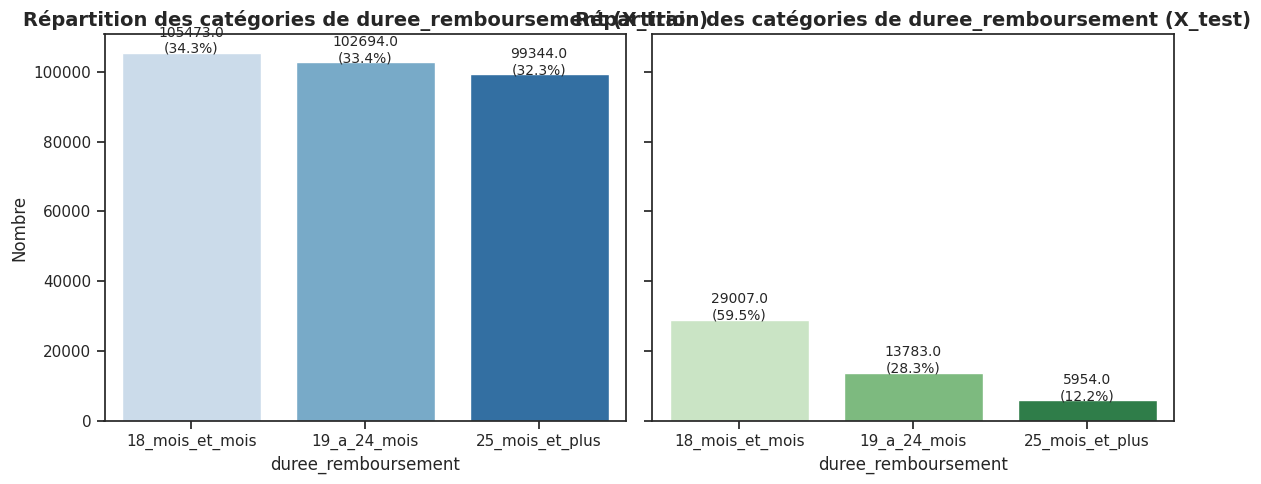

In [143]:
# Tracé du bar chart pour la variable 'duree_remboursement' avec la fonction comparaison_categorie
comparaison_categorie(
    train_df=clean_X_train,
    test_df=clean_X_test,
    var='duree_remboursement',
    titre_train="Répartition des catégories de duree_remboursement (X_train)",
    titre_test="Répartition des catégories de duree_remboursement (X_test)"
)

##### Les revenus mensuels des clients


In [144]:
pd.qcut(clean_X_train.AMT_INCOME_TOTAL, q=5).head(7)


0       (162000.0, 225000.0]
1    (225000.0, 117000000.0]
2       (25649.999, 99000.0]
3        (99000.0, 135000.0]
4        (99000.0, 135000.0]
5       (25649.999, 99000.0]
6       (162000.0, 225000.0]
Name: AMT_INCOME_TOTAL, dtype: category
Categories (5, interval[float64, right]): [(25649.999, 99000.0] < (99000.0, 135000.0] <
                                           (135000.0, 162000.0] < (162000.0, 225000.0] <
                                           (225000.0, 117000000.0]]

In [145]:
clean_X_train['total_revenus'] = pd.qcut(clean_X_train.AMT_INCOME_TOTAL,
                                         q=5,
                                         labels=['99000_et_moins',
                                                 '99001_a_135000',
                                                 '135001_a_162000',
                                                 '162001_a_225000',
                                                 '225001_et_plus'])

print(clean_X_train['total_revenus'].value_counts())

# Application à l'ensemble de test

clean_X_test['total_revenus'] = pd.cut(clean_X_test.AMT_INCOME_TOTAL,
                                       bins=[1,
                                             99000,
                                             135000,
                                             162000,
                                             225000,
                                             200000000],
                                       include_lowest=True,
                                       labels=['99000_et_moins',
                                               '99001_a_135000',
                                               '135001_a_162000',
                                               '162001_a_225000',
                                               '225001_et_plus'])

print(clean_X_test['total_revenus'].value_counts())

total_revenus
99001_a_135000     85756
162001_a_225000    75513
99000_et_moins     63671
225001_et_plus     47118
135001_a_162000    35453
Name: count, dtype: int64
total_revenus
162001_a_225000    13235
99001_a_135000     13099
225001_et_plus      8680
99000_et_moins      7830
135001_a_162000     5900
Name: count, dtype: int64


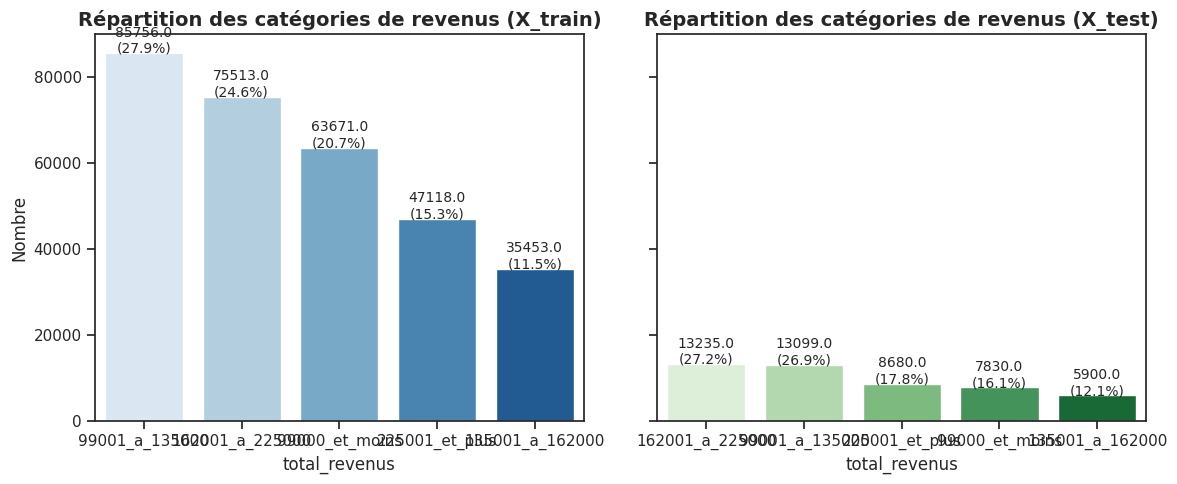

In [146]:
# Tracé du bar chart pour la variable 'total_revenus' avec la fonction comparaison_categorie
comparaison_categorie(
    train_df=clean_X_train,
    test_df=clean_X_test,
    var='total_revenus',
    titre_train="Répartition des catégories de revenus (X_train)",
    titre_test="Répartition des catégories de revenus (X_test)"
)

##### somme du credit demandé par les clients

In [147]:
clean_X_train['AMT_CREDIT'].describe()


count     307,511.00
mean      599,026.00
std       402,490.78
min        45,000.00
25%       270,000.00
50%       513,531.00
75%       808,650.00
max     4,050,000.00
Name: AMT_CREDIT, dtype: float64

In [148]:
pd.qcut(clean_X_train.AMT_CREDIT, q=5).head(7)


0     (254700.0, 432000.0]
1    (900000.0, 4050000.0]
2    (44999.999, 254700.0]
3     (254700.0, 432000.0]
4     (432000.0, 604152.0]
5     (432000.0, 604152.0]
6    (900000.0, 4050000.0]
Name: AMT_CREDIT, dtype: category
Categories (5, interval[float64, right]): [(44999.999, 254700.0] < (254700.0, 432000.0] <
                                           (432000.0, 604152.0] < (604152.0, 900000.0] <
                                           (900000.0, 4050000.0]]

In [149]:
clean_X_train['montant_credit'] = pd.qcut(clean_X_train.AMT_CREDIT,
                                          q=5,
                                          labels=['254700_et_moins',
                                                  '254701_a_432000',
                                                  '432001_a_604152',
                                                  '604153_a_900000',
                                                  '900001_et_plus'])

print(clean_X_train['montant_credit'].value_counts())


# Application à l'ensemble de test

clean_X_test['montant_credit'] = pd.cut(clean_X_test.AMT_CREDIT,
                                        bins=[1,
                                              254700,
                                              432000,
                                              604152,
                                              900000,
                                              5000000],
                                        include_lowest=True,
                                        labels=['254700_et_moins',
                                                '254701_a_432000',
                                                '432001_a_604152',
                                                '604153_a_900000',
                                                '900001_et_plus'])

print(clean_X_test['montant_credit'].value_counts())

montant_credit
254700_et_moins    64925
604153_a_900000    64024
432001_a_604152    61552
900001_et_plus     58912
254701_a_432000    58098
Name: count, dtype: int64
montant_credit
254701_a_432000    11747
254700_et_moins    11612
432001_a_604152    11296
604153_a_900000     8450
900001_et_plus      5639
Name: count, dtype: int64


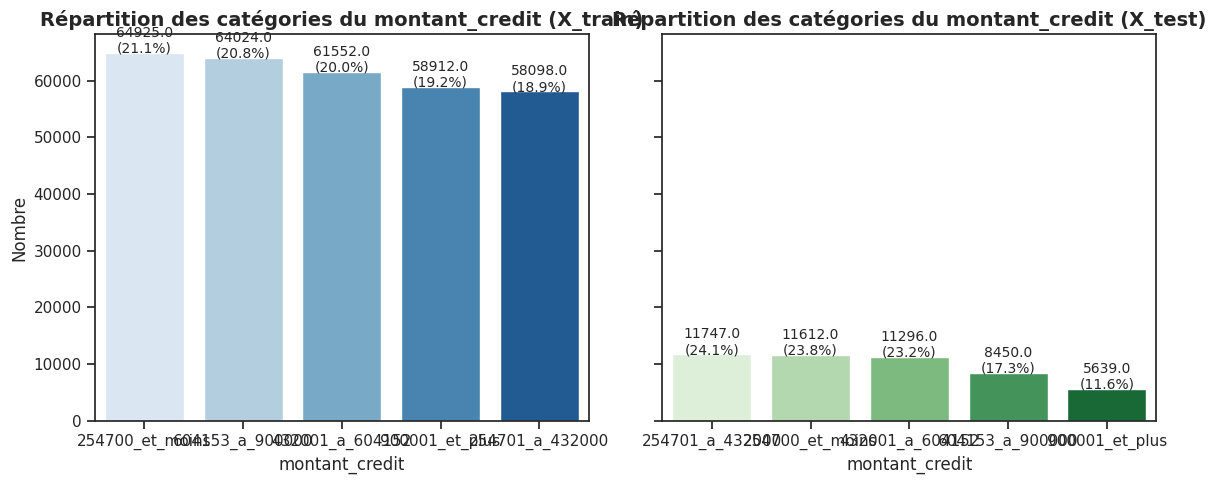

In [150]:
# Tracé du bar chart pour la variable 'montant_credit' avec la fonction comparaison_categorie
comparaison_categorie(
    train_df=clean_X_train,
    test_df=clean_X_test,
    var='montant_credit',
    titre_train="Répartition des catégories du montant_credit (X_train)",
    titre_test="Répartition des catégories du montant_credit (X_test)"
)

##### supression des variables

AMT_ANNUITY
AMT_INCOME_TOTAL
AMT_CREDIT

In [151]:
# Suppression de la variable AMT_ANNUITY dans X_Train et X_Test

clean_X_train.drop(labels='AMT_ANNUITY',
                   axis=1, inplace=True)

clean_X_test.drop(labels='AMT_ANNUITY',
                  axis=1, inplace=True)

clean_X_train.shape, clean_X_test.shape

((307511, 26), (48744, 26))

In [152]:
# Suppression de la variable AMT_INCOME_TOTAL dans X_Train et X_Test

clean_X_train.drop(labels='AMT_INCOME_TOTAL',
                   axis=1, inplace=True)

clean_X_test.drop(labels='AMT_INCOME_TOTAL',
                   axis=1, inplace=True)

clean_X_train.shape, clean_X_test.shape

((307511, 25), (48744, 25))

In [153]:
# Suppression de la variable AMT_CREDIT dans X_Train et X_Test

clean_X_train.drop(labels='AMT_CREDIT',
                   axis=1, inplace=True)

clean_X_test.drop(labels='AMT_CREDIT',
                   axis=1, inplace=True)

clean_X_train.shape, clean_X_test.shape

((307511, 24), (48744, 24))

In [154]:
# Affichage des colonnes restantes dans clean_X_train
colonnes_restantes = clean_X_train.columns.to_list()
print("Colonnes restantes dans clean_X_train :")
print(colonnes_restantes)


Colonnes restantes dans clean_X_train :
['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'EXT_SOURCE_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8', 'nbr_enfants', 'taille_famille', 'anciennete_entreprise', 'age_client', 'taux_endettement', 'duree_remboursement', 'total_revenus', 'montant_credit']


##  Conclusion de l'étude de `X_train` et `X_test`



---

Après l'étude approfondie des variables présentes dans les datasets `X_train` et `X_test`, nous avons sélectionné et conservé les variables les plus pertinentes pour notre problématique métier. Cela nous permet de disposer d'un jeu de données prêt pour les étapes de modélisation.

**1. Résumé des variables restantes**
Voici la liste des variables retenues, avec une brève description pour chacune :

- **`SK_ID_CURR`** : Identifiant unique du client.
- **`NAME_CONTRACT_TYPE`** : Type de contrat de crédit (ex : Cash loans, Revolving loans).
- **`CODE_GENDER`** : Genre du client (Male, Female).
- **`FLAG_OWN_CAR`** : Indique si le client possède une voiture.
- **`FLAG_OWN_REALTY`** : Indique si le client possède un bien immobilier.
- **`NAME_INCOME_TYPE`** : Source principale des revenus du client (ex : Employé, Retraité).
- **`NAME_EDUCATION_TYPE`** : Niveau d'éducation du client (ex : Supérieur, Secondaire).
- **`NAME_FAMILY_STATUS`** : Statut familial du client (ex : Marié, Célibataire).
- **`NAME_HOUSING_TYPE`** : Type de logement du client (ex : Locataire, Propriétaire).
- **`REGION_POPULATION_RELATIVE`** : Indice de densité de population de la région du client.
- **`FLAG_EMP_PHONE`** : Indique si le client possède un téléphone professionnel.
- **`FLAG_WORK_PHONE`** : Indique si le client possède un téléphone personnel lié au travail.
- **`EXT_SOURCE_2`** : Score externe (source externe), utilisé comme indicateur de risque.
- **`FLAG_DOCUMENT_3`** : Indique la disponibilité du document 3 (document administratif).
- **`FLAG_DOCUMENT_6`** : Indique la disponibilité du document 6 (document administratif).
- **`FLAG_DOCUMENT_8`** : Indique la disponibilité du document 8 (document administratif).
- **`nbr_enfants`** : Nombre d'enfants du client.
- **`taille_famille`** : Taille de la famille du client.
- **`anciennete_entreprise`** : Ancienneté du client dans son entreprise (regroupée en catégories).
- **`age_client`** : Tranche d'âge du client (regroupée en catégories).
- **`taux_endettement`** : Taux d'endettement du client (montant du crédit divisé par le revenu total).
- **`duree_remboursement`** : Durée estimée de remboursement du crédit.
- **`total_revenus`** : Total des revenus du client.
- **`montant_credit`** : Montant total du crédit demandé.

---

**2. Vérification des colonnes entre `X_train` et `X_test`**

Avant de conclure, il est crucial de s'assurer que les deux datasets (`X_train` et `X_test`) possèdent le **même nombre de colonnes**.

In [155]:
# Vérification des colonnes
print(f"Nombre de colonnes dans X_train : {len(clean_X_train.columns)}")
print(f"Nombre de colonnes dans X_test : {len(clean_X_test.columns)}")

# Vérification que les colonnes sont identiques
colonnes_identiques = clean_X_train.columns.equals(clean_X_test.columns)
if colonnes_identiques:
    print("Les colonnes de X_train et X_test sont identiques.")
else:
    print("Attention : Les colonnes de X_train et X_test diffèrent.")


Nombre de colonnes dans X_train : 24
Nombre de colonnes dans X_test : 24
Les colonnes de X_train et X_test sont identiques.


## Sauvegarde dans un dossier au cas ou pour faire les jointures

In [156]:
# Chemin pour sauvegarder les fichiers CSV
#xtrain_path = '/content/drive/My Drive/Projets Master/Projet 7/bases_crash/xtrain_crash.csv'
##xtest_path = '/content/drive/My Drive/Projets Master/Projet 7/bases_crash/xtest_crash.csv'

# Sauvegarde des DataFrames dans des fichiers CSV
#X_train.to_csv(xtrain_path, index=False)
#X_test.to_csv(xtest_path, index=False)

#print(f"Les fichiers ont été sauvegardés avec succès :\n- X_train : {xtrain_path}\n- X_test : {xtest_path}")

# 3.. Données Bureau et Bureau Balance




**Objectif**
Les bases **bureau** et **bureau_balance** fournissent des informations sur les crédits passés des clients auprès d'autres institutions financières.

**Étapes prévues**
- Agrégation des informations dans ces bases par client.
- Création de features dérivées pour enrichir `application_train` et `application_test`.

In [157]:
#bureau = pd.read_csv(csv_path + 'bureau.csv')
#bureau_balance = pd.read_csv(csv_path + 'bureau_balance.csv')

### 3.a Bureau

In [158]:
bureau.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [159]:
bureau.isna().mean()*100


SK_ID_CURR                0.00
SK_ID_BUREAU              0.00
CREDIT_ACTIVE             0.00
CREDIT_CURRENCY           0.00
DAYS_CREDIT               0.00
CREDIT_DAY_OVERDUE        0.00
DAYS_CREDIT_ENDDATE       6.15
DAYS_ENDDATE_FACT        36.92
AMT_CREDIT_MAX_OVERDUE   65.51
CNT_CREDIT_PROLONG        0.00
AMT_CREDIT_SUM            0.00
AMT_CREDIT_SUM_DEBT      15.01
AMT_CREDIT_SUM_LIMIT     34.48
AMT_CREDIT_SUM_OVERDUE    0.00
CREDIT_TYPE               0.00
DAYS_CREDIT_UPDATE        0.00
AMT_ANNUITY              71.47
dtype: float64

#### Approche métier pour la suppression de certaines variables


**DAYS_CREDIT_ENDDATE**  
Raison métier : Cette variable indique la date estimée de fin de crédit en nombre de jours relatifs à la demande. Cependant, elle est souvent redondante avec d'autres variables (par exemple, `DAYS_CREDIT` et `AMT_CREDIT_SUM`). De plus, les crédits déjà terminés ou en cours n'ont pas forcément de valeur significative ici, ce qui limite son apport analytique.

**DAYS_ENDDATE_FACT**  
Raison métier : Cette variable représente la date effective de fin de crédit pour les crédits clos. Elle n'est pertinente que pour des crédits terminés, ce qui en fait une information peu utile pour évaluer un risque de défaut sur des crédits actifs ou futurs.

**AMT_CREDIT_MAX_OVERDUE**  
Raison métier : Cette variable représente le montant maximal de retard observé sur le crédit. Elle peut sembler pertinente, mais elle est souvent fortement corrélée avec `AMT_CREDIT_SUM_OVERDUE`, qui mesure directement le montant en retard actuel. Garder `AMT_CREDIT_SUM_OVERDUE` est suffisant pour une analyse efficace.

**AMT_CREDIT_SUM_DEBT**  
Raison métier : Ce montant total de dettes peut être redondant avec des variables comme `AMT_CREDIT_SUM` (montant total du crédit) et `AMT_CREDIT_SUM_OVERDUE`. Par ailleurs, les dettes totales peuvent varier fortement en fonction des caractéristiques du client ou des produits financiers, ce qui peut introduire une complexité inutile dans le modèle.

**AMT_CREDIT_SUM_LIMIT**  
Raison métier : Cette variable indique la limite de crédit pour les lignes de crédit ouvertes (exemple : cartes de crédit). Cependant, pour beaucoup de crédits, cette variable n'est pas renseignée ou n'a pas de signification (par exemple, pour des prêts hypothécaires ou à la consommation). Elle apporte donc peu de valeur universelle dans l'évaluation globale du risque de défaut.

**AMT_ANNUITY**  
Raison métier : Cette variable correspond au montant annuel des paiements d'annuité du crédit. Elle est souvent redondante avec d'autres variables comme `AMT_CREDIT_SUM` et `DAYS_CREDIT`, qui permettent d'inférer indirectement les mêmes informations. Si elle est incluse, elle peut introduire de la multicolinéarité dans le modèle.

**CREDIT_CURRENCY**  
Raison métier : Cette variable indique la devise du crédit. Dans la majorité des cas, tous les crédits sont dans la même devise (par exemple, dans une seule devise nationale). Si ce n'est pas le cas, le nombre de crédits dans une devise différente est souvent marginal et n'apporte pas d'information discriminante pour le risque de défaut.


In [160]:
# Suppression des variables avec valeurs manquantes

var_to_drop=['DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE',
             'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']

bureau.drop(labels=var_to_drop, axis=1, inplace= True)

In [161]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 11 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   CNT_CREDIT_PROLONG      int64  
 7   AMT_CREDIT_SUM          float64
 8   AMT_CREDIT_SUM_OVERDUE  float64
 9   CREDIT_TYPE             object 
 10  DAYS_CREDIT_UPDATE      int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 144.0+ MB


In [162]:
bureau.drop('CREDIT_CURRENCY', axis=1, inplace= True)

#### Analyse des variables quali de Bureau

In [163]:
# Sélection des colonnes qualitatives dans le DataFrame bureau
qualitative_columns_bureau = bureau.select_dtypes(include=['object']).columns

# J'affiche ici les noms des colonnes catégoriques pour voir quelles variables qualitatives sont disponibles.
print("Variables qualitatives dans la base bureau :")
print(qualitative_columns_bureau)

# Si je veux travailler uniquement avec les variables qualitatives, je crée un DataFrame qui les contient.
qualitative_df_bureau = bureau[qualitative_columns_bureau]

# Affichage du DataFrame contenant uniquement les variables qualitatives
qualitative_df_bureau.head()

Variables qualitatives dans la base bureau :
Index(['CREDIT_ACTIVE', 'CREDIT_TYPE'], dtype='object')


CREDIT_ACTIVE      CREDIT_TYPE
0        Closed  Consumer credit
1        Active      Credit card
2        Active  Consumer credit
3        Active      Credit card
4        Active  Consumer credit

In [164]:
# Calcul des pourcentages pour 'CREDIT_ACTIVE'
percent_CREDIT_ACTIVE = calculate_percentage(bureau, 'CREDIT_ACTIVE')

# Calcul des pourcentages pour 'CREDIT_TYPE'
percent_CREDIT_TYPE = calculate_percentage(bureau, 'CREDIT_TYPE')

# Affichage des résultats
print("Pourcentage des valeurs dans 'CREDIT_ACTIVE':")
print(percent_CREDIT_ACTIVE)

print("\nPourcentage des valeurs dans 'CREDIT_TYPE':")
print(percent_CREDIT_TYPE)



Pourcentage des valeurs dans 'CREDIT_ACTIVE':
  CREDIT_ACTIVE  Percentage
0        Closed       62.88
1        Active       36.74
2          Sold        0.38
3      Bad debt        0.00

Pourcentage des valeurs dans 'CREDIT_TYPE':
                                     CREDIT_TYPE  Percentage
0                                Consumer credit       72.92
1                                    Credit card       23.43
2                                       Car loan        1.61
3                                       Mortgage        1.07
4                                      Microloan        0.72
5                  Loan for business development        0.12
6                           Another type of loan        0.06
7                           Unknown type of loan        0.03
8         Loan for working capital replenishment        0.03
9                      Cash loan (non-earmarked)        0.00
10                              Real estate loan        0.00
11            Loan for the purchase o

In [165]:
map_credit_active = {'Closed': 'Closed',
                     'Active': 'Active',
                     'Sold': 'Sold_bad_debt',
                     'Bad debt': 'Sold_bad_debt'}

bureau['CREDIT_ACTIVE'] = bureau['CREDIT_ACTIVE'].map(map_credit_active)

In [166]:
map_credit_type = {"Consumer credit": "Consumer_credit",
                   "Credit card": "Credit_card",
                   "Car loan" : "Other_credit",
                   "Mortgage" : "Other_credit",
                   "Microloan" : "Other_credit",
                   "Loan for business development" : "Other_credit",
                   "Another type of loan" : "Other_credit",
                   "Unknown type of loan" : "Other_credit",
                   "Loan for working capital replenishment" : "Other_credit",
                   "Cash loan (non-earmarked)" : "Other_credit",
                   "Real estate loan" : "Other_credit",
                   "Loan for the purchase of equipment" : "Other_credit",
                   "Loan for purchase of shares (margin lending)" : "Other_credit",
                   "Mobile operator loan" : "Other_credit",
                   "Interbank credit" : "Other_credit"}

bureau['CREDIT_TYPE'] = bureau['CREDIT_TYPE'].map(map_credit_type)

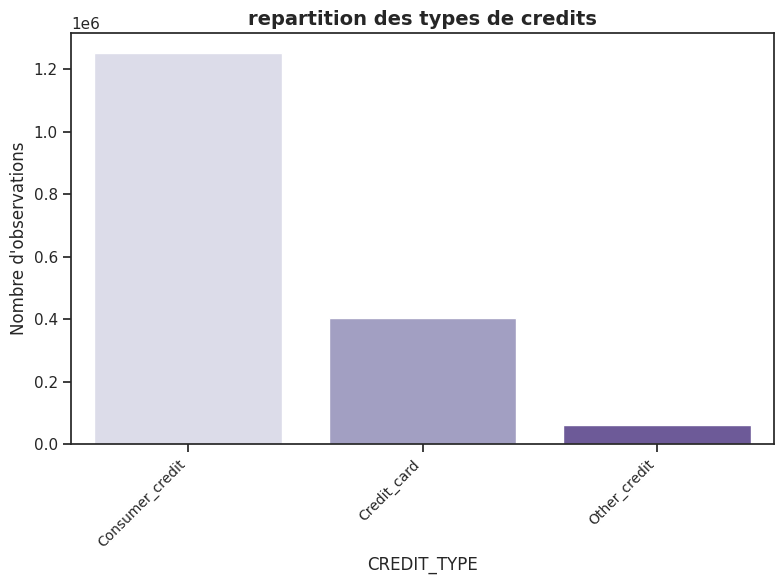

In [167]:
barplot_unique_base(bureau, 'CREDIT_TYPE', 'repartition des types de credits', taille=(8, 6))

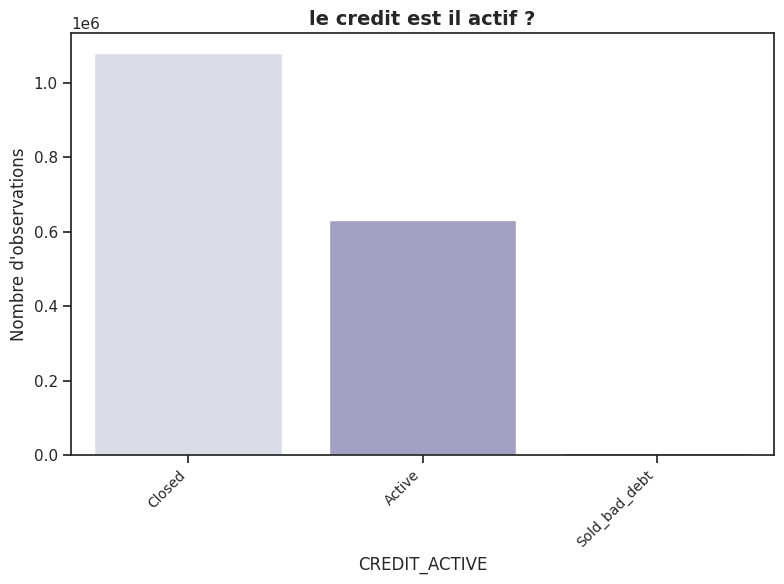

In [168]:
barplot_unique_base(bureau, 'CREDIT_ACTIVE', 'le credit est il actif ?', taille=(8, 6))

In [169]:
bureau = pd.get_dummies(bureau,
                        columns=["CREDIT_ACTIVE",
                                 "CREDIT_TYPE"],
                        prefix={'CREDIT_ACTIVE': 'bureau_credit_actif',
                                'CREDIT_TYPE': 'bureau_credit_type'},
                       drop_first=True)

In [170]:
bureau.head(5)

SK_ID_CURR  SK_ID_BUREAU  DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
0      215354       5714462         -497                   0   
1      215354       5714463         -208                   0   
2      215354       5714464         -203                   0   
3      215354       5714465         -203                   0   
4      215354       5714466         -629                   0   

   CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_OVERDUE  \
0                   0       91,323.00                    0.00   
1                   0      225,000.00                    0.00   
2                   0      464,323.50                    0.00   
3                   0       90,000.00                    0.00   
4                   0    2,700,000.00                    0.00   

   DAYS_CREDIT_UPDATE  bureau_credit_actif_Closed  \
0                -131                        True   
1                 -20                       False   
2                 -16                       False   
3                 -16                       False   
4                 -21                       False   

   bureau_credit_actif_Sold_bad_debt  bureau_credit_type_Credit_card  \
0                              False                           False   
1                              False                            True   
2                              False                           False   
3                              False                            True   
4                              False                           False   

   bureau_credit_type_Other_credit  
0                            False  
1                            False  
2                            False  
3                            False  
4                            False

In [171]:
bureau.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 12 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   SK_ID_CURR                         int64  
 1   SK_ID_BUREAU                       int64  
 2   DAYS_CREDIT                        int64  
 3   CREDIT_DAY_OVERDUE                 int64  
 4   CNT_CREDIT_PROLONG                 int64  
 5   AMT_CREDIT_SUM                     float64
 6   AMT_CREDIT_SUM_OVERDUE             float64
 7   DAYS_CREDIT_UPDATE                 int64  
 8   bureau_credit_actif_Closed         bool   
 9   bureau_credit_actif_Sold_bad_debt  bool   
 10  bureau_credit_type_Credit_card     bool   
 11  bureau_credit_type_Other_credit    bool   
dtypes: bool(4), float64(2), int64(6)
memory usage: 111.3 MB


#### analyse des variables quanti de Bureau

In [172]:
# Conversion explicite des colonnes booléennes en uint8
for col in bureau.select_dtypes(include=['bool']).columns:
    bureau[col] = bureau[col].astype('uint8')

In [173]:
# Les variables numériques
var_num = bureau.drop(labels=['SK_ID_CURR', 'SK_ID_BUREAU'], axis=1).select_dtypes(include=[np.number]).columns.to_list()
print(var_num)

['DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE', 'bureau_credit_actif_Closed', 'bureau_credit_actif_Sold_bad_debt', 'bureau_credit_type_Credit_card', 'bureau_credit_type_Other_credit']


In [174]:
var_num = ['DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE']

bureau[var_num].describe([.01, .1, .25, .5, .75, .8, .9, .95, .99])[1:].T

mean          std        min        1%       10%  \
DAYS_CREDIT             -1,142.11       795.16  -2,922.00 -2,867.00 -2,443.00   
CREDIT_DAY_OVERDUE           0.82        36.54       0.00      0.00      0.00   
CNT_CREDIT_PROLONG           0.01         0.10       0.00      0.00      0.00   
AMT_CREDIT_SUM         354,994.59 1,149,811.34       0.00      0.00 22,500.00   
AMT_CREDIT_SUM_OVERDUE      37.91     5,937.65       0.00      0.00      0.00   
DAYS_CREDIT_UPDATE        -593.75       720.75 -41,947.00 -2,531.00 -1,561.00   

                             25%        50%        75%        80%        90%  \
DAYS_CREDIT            -1,666.00    -987.00    -474.00    -385.00    -215.00   
CREDIT_DAY_OVERDUE          0.00       0.00       0.00       0.00       0.00   
CNT_CREDIT_PROLONG          0.00       0.00       0.00       0.00       0.00   
AMT_CREDIT_SUM         51,300.00 125,518.50 315,000.00 423,000.00 778,754.74   
AMT_CREDIT_SUM_OVERDUE      0.00       0.00       0.00       0.00       0.00   
DAYS_CREDIT_UPDATE       -908.00    -395.00     -33.00     -25.00     -13.00   

                                95%          99%            max  
DAYS_CREDIT                 -125.00       -38.00           0.00  
CREDIT_DAY_OVERDUE             0.00         0.00       2,792.00  
CNT_CREDIT_PROLONG             0.00         0.00           9.00  
AMT_CREDIT_SUM         1,350,000.00 3,700,916.10 585,000,000.00  
AMT_CREDIT_SUM_OVERDUE         0.00         0.00   3,756,681.00  
DAYS_CREDIT_UPDATE            -8.00        -3.00         372.00

In [175]:
calculate_percentage(bureau, 'CREDIT_DAY_OVERDUE')


CREDIT_DAY_OVERDUE  Percentage
0                     0       99.75
1                    30        0.02
2                    60        0.01
3                     8        0.01
4                    13        0.01
5                     9        0.01
6                     7        0.01
7                    14        0.01
8                    17        0.00
9                    11        0.00
10                   15        0.00
11                   10        0.00
12                   12        0.00
13                   20        0.00
14                   21        0.00
15                   18        0.00
16                    6        0.00
17                   19        0.00
18                   22        0.00
19                    5        0.00
20                   16        0.00
21                   28        0.00
22                    4        0.00
23                   29        0.00
24                   26        0.00
25                   24        0.00
26                   23        0.00
27                   25        0.00
28                   31        0.00
29                   32        0.00
30                  150        0.00
31                   34        0.00
32                   37        0.00
33                   41        0.00
34                   35        0.00
35                   38        0.00
36                    3        0.00
37                   27        0.00
38                   40        0.00
39                  120        0.00
40                   90        0.00
41                   39        0.00
42                   44        0.00
43                   36        0.00
44                   43        0.00
45                   33        0.00
46                   52        0.00
47                    2        0.00
48                   46        0.00
49                   48        0.00
50                   50        0.00
51                   49        0.00
52                   69        0.00
53                   53        0.00
54                   55        0.00
55                   73        0.00
56                   68        0.00
57                   64        0.00
58                   65        0.00
59                   54        0.00
60                   61        0.00
61                   56        0.00
62                   58        0.00
63                   45        0.00
64                   51        0.00
65                   77        0.00
66                   79        0.00
67                   67        0.00
68                   42        0.00
69                   76        0.00
70                   57        0.00
71                  115        0.00
72                   63        0.00
73                   71        0.00
74                  174        0.00
75                   59        0.00
76                  102        0.00
77                  101        0.00
78                   62        0.00
79                   47        0.00
80                   75        0.00
81                   82        0.00
82                  366        0.00
83                   66        0.00
84                   93        0.00
85                  143        0.00
86                   81        0.00
87                   98        0.00
88                   99        0.00
89                  117        0.00
90                  651        0.00
91                   80        0.00
92                   86        0.00
93                  103        0.00
94                   70        0.00
95                  948        0.00
96                   78        0.00
97                   72        0.00
98                   85        0.00
99                    1        0.00
100                 108        0.00
101                 171        0.00
102                 105        0.00
103                 161        0.00
104                  83        0.00
105                  74        0.00
106                  89        0.00
107                1118        0.00
108                 179        0.00
109                 277        0.00
110      

In [176]:
calculate_percentage(bureau, 'CNT_CREDIT_PROLONG')


CNT_CREDIT_PROLONG  Percentage
0                   0       99.47
1                   1        0.44
2                   2        0.07
3                   3        0.01
4                   4        0.00
5                   5        0.00
6                   9        0.00
7                   6        0.00
8                   8        0.00
9                   7        0.00

In [177]:
calculate_percentage(bureau, 'AMT_CREDIT_SUM_OVERDUE')


AMT_CREDIT_SUM_OVERDUE  Percentage
0                       0.00       99.76
1                       4.50        0.02
2                       9.00        0.01
3                      13.50        0.00
4                      18.00        0.00
5                      22.50        0.00
6                      45.00        0.00
7                      27.00        0.00
8                      36.00        0.00
9                      31.50        0.00
10                     54.00        0.00
11                     40.50        0.00
12                     58.50        0.00
13                    675.00        0.00
14                     49.50        0.00
15                     72.00        0.00
16                     90.00        0.00
17                    148.50        0.00
18                     63.00        0.00
19                     67.50        0.00
20                    180.00        0.00
21                     76.50        0.00
22                     94.50        0.00
23                     99.00        0.00
24                    130.50        0.00
25                    135.00        0.00
26                    175.50        0.00
27                     81.00        0.00
28                    315.00        0.00
29                    112.50        0.00
30                     85.50        0.00
31                    450.00        0.00
32                    144.00        0.00
33                    139.50        0.00
34                    270.00        0.00
35                    126.00        0.00
36                    108.00        0.00
37                    504.00        0.00
38                    117.00        0.00
39                    540.00        0.00
40                    121.50        0.00
41                    265.50        0.00
42                    220.50        0.00
43                    360.00        0.00
44                    103.50        0.00
45                    198.00        0.00
46                    193.50        0.00
47                    157.50        0.00
48                    319.50        0.00
49                    184.50        0.00
50                    202.50        0.00
51                    211.50        0.00
52                    333.00        0.00
53                    153.00        0.00
54                    234.00        0.00
55                    256.50        0.00
56                    288.00        0.00
57                    166.50        0.00
58                    225.00        0.00
59                    171.00        0.00
60                    162.00        0.00
61                    238.50        0.00
62                    207.00        0.00
63                    283.50        0.00
64                    373.50        0.00
65                    216.00        0.00
66                    189.00        0.00
67                    828.00        0.00
68                    427.50        0.00
69                    279.00        0.00
70                    247.50        0.00
71                    477.00        0.00
72                    459.00        0.00
73                    693.00        0.00
74                    229.50        0.00
75                    630.00        0.00
76                    387.00        0.00
77                    414.00        0.00
78                    418.50        0.00
79                    792.00        0.00
80                    639.00        0.00
81                    351.00        0.00
82                    369.00        0.00
83                    405.00        0.00
84                    252.00        0.00
85                    720.00        0.00
86                    441.00        0.00
87                    603.00        0.00
88                    364.50        0.00
89                    342.00        0.00
90                    796.50        0.00
91                    756.00        0.00
92                    481.50        0.00
93                    841.50        0.00
94                    261.00        0.00
95                    679.50        0.00
96                    801.00 

In [178]:
var_to_drop = ['CREDIT_DAY_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM_OVERDUE']

bureau.drop(labels=var_to_drop, axis=1, inplace= True)

bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 9 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   SK_ID_CURR                         int64  
 1   SK_ID_BUREAU                       int64  
 2   DAYS_CREDIT                        int64  
 3   AMT_CREDIT_SUM                     float64
 4   DAYS_CREDIT_UPDATE                 int64  
 5   bureau_credit_actif_Closed         uint8  
 6   bureau_credit_actif_Sold_bad_debt  uint8  
 7   bureau_credit_type_Credit_card     uint8  
 8   bureau_credit_type_Other_credit    uint8  
dtypes: float64(1), int64(4), uint8(4)
memory usage: 72.0 MB


In [179]:
bureau['DAYS_CREDIT'] = round(bureau['DAYS_CREDIT'] / -365, 0)
bureau['DAYS_CREDIT_UPDATE'] = round(bureau['DAYS_CREDIT_UPDATE'] / -365, 0)

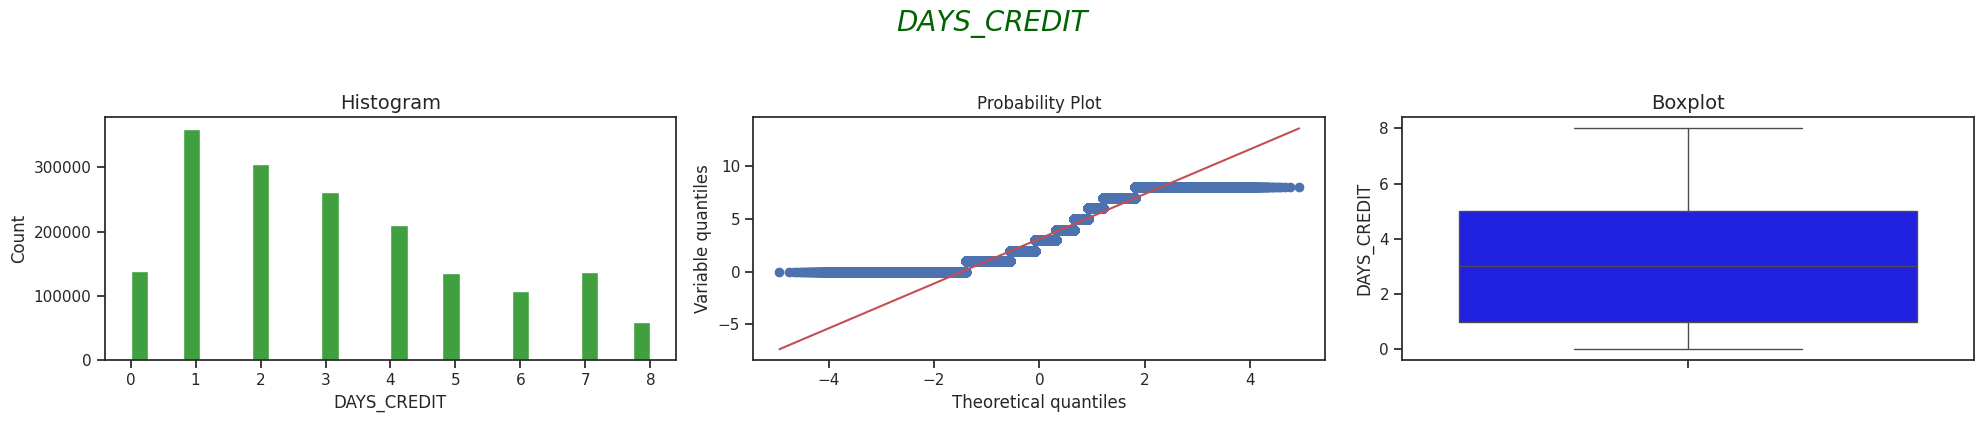

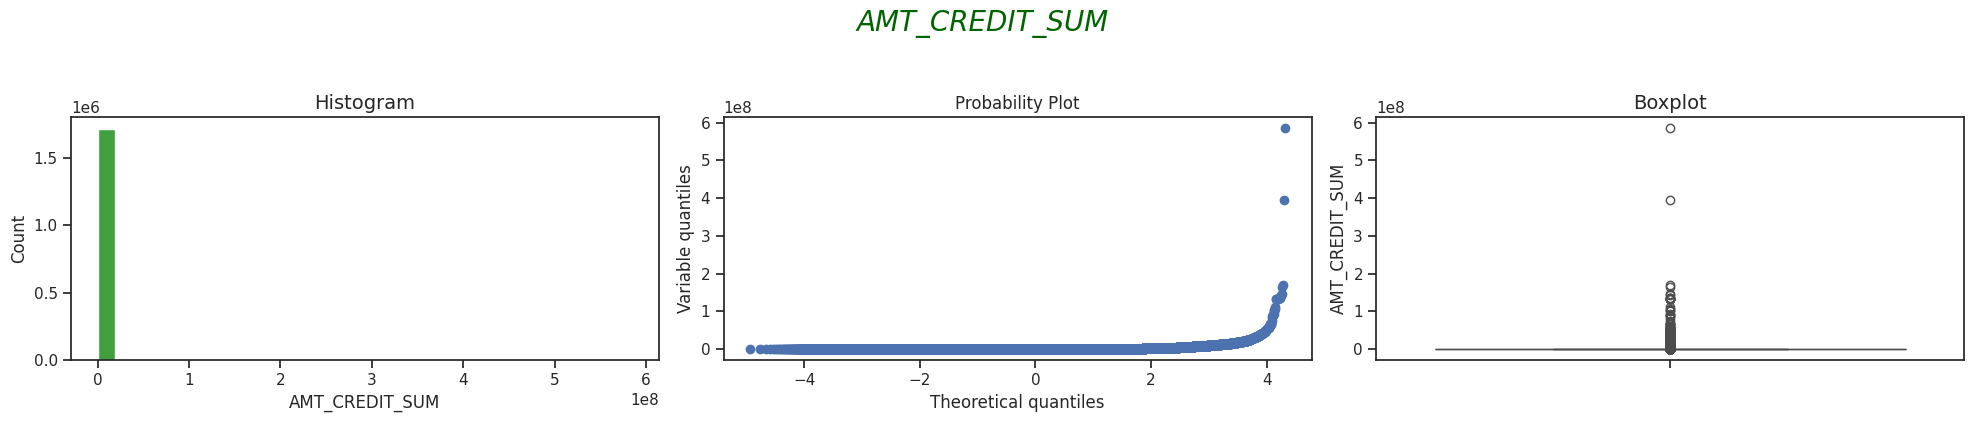

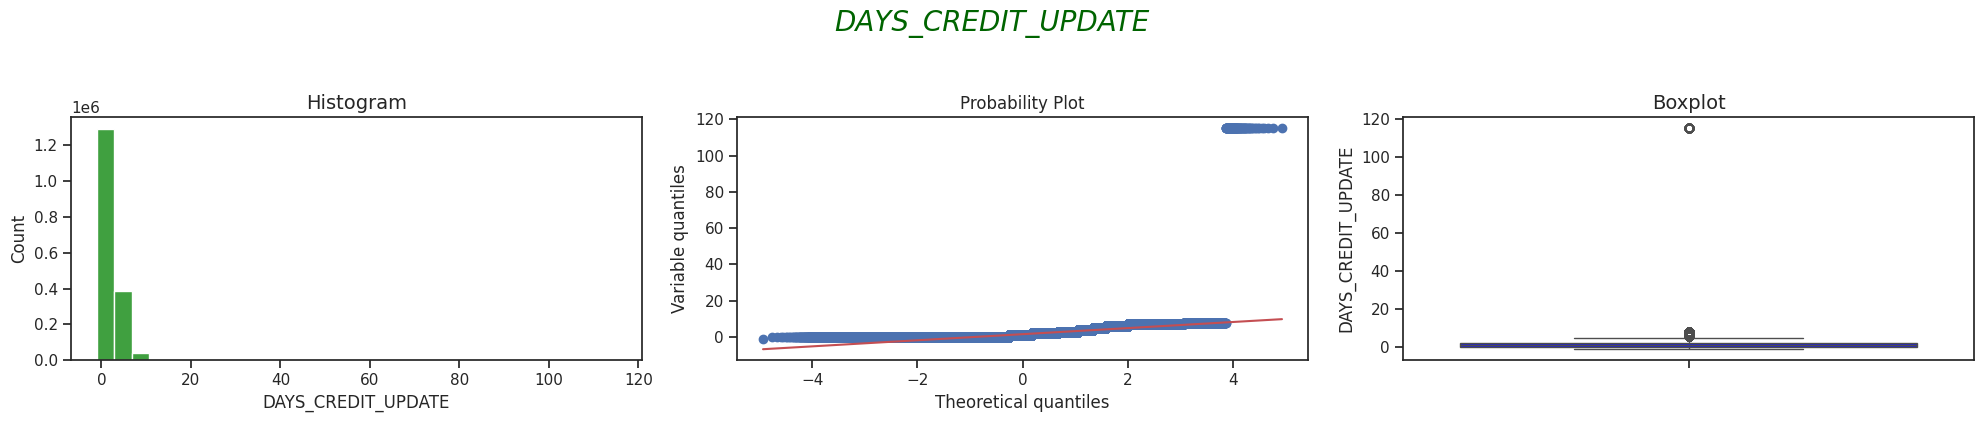

In [180]:
var_num = ['DAYS_CREDIT', 'AMT_CREDIT_SUM', 'DAYS_CREDIT_UPDATE']

for var in var_num:
    diagnostic_plots(bureau, var, f"{var}")

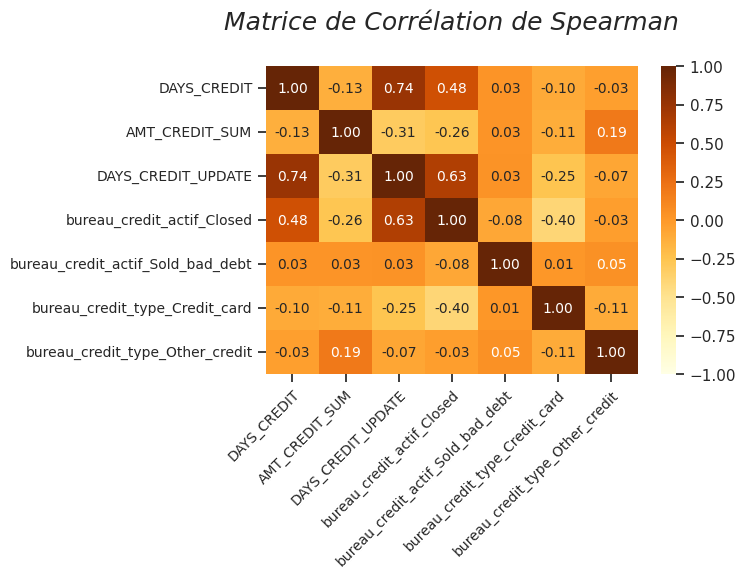

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuration de style
sns.set(style="ticks", rc={'figure.figsize': (6, 4)})

# Sélection des colonnes numériques après suppression des identifiants
df_analyse_num = bureau.drop(labels=['SK_ID_CURR', 'SK_ID_BUREAU'], axis=1).select_dtypes(include=[np.number])

# Centrage et réduction des colonnes
df_analyse_norm = (df_analyse_num - df_analyse_num.mean(axis=0)) / df_analyse_num.std(axis=0)

# Création de la matrice de corrélation
corr_df = df_analyse_norm.corr(method='spearman')

# Heatmap de la matrice de corrélation avec une palette dans les tons jaunes
ax = sns.heatmap(corr_df, cmap="YlOrBr", annot=True, annot_kws={"size": 10}, fmt=".2f", vmin=-1, vmax=1)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=10,
                   rotation=45, ha='right', rotation_mode='anchor')
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=10,
                   horizontalalignment='right')

# Titre
plt.title("Matrice de Corrélation de Spearman\n",
          loc="center", fontsize=18, fontstyle='italic')
plt.show()


In [182]:
# Quelles sont les variables dont le coef de corrélation > 0.7
high_correlation(corr_df, corr_value = 0.7)

DAYS_CREDIT
-------------------------------
DAYS_CREDIT_UPDATE   0.74
Name: DAYS_CREDIT, dtype: float64


DAYS_CREDIT_UPDATE
-------------------------------
DAYS_CREDIT   0.74
Name: DAYS_CREDIT_UPDATE, dtype: float64




In [183]:
bureau.drop(labels=['DAYS_CREDIT_UPDATE'], axis=1, inplace=True)
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 8 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   SK_ID_CURR                         int64  
 1   SK_ID_BUREAU                       int64  
 2   DAYS_CREDIT                        float64
 3   AMT_CREDIT_SUM                     float64
 4   bureau_credit_actif_Closed         uint8  
 5   bureau_credit_actif_Sold_bad_debt  uint8  
 6   bureau_credit_type_Credit_card     uint8  
 7   bureau_credit_type_Other_credit    uint8  
dtypes: float64(2), int64(2), uint8(4)
memory usage: 58.9 MB


## 3.b Bureau_balance

In [184]:
bureau_balance.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [185]:
bureau_balance.isnull().sum()


SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [186]:
calculate_percentage(bureau_balance, 'STATUS')

STATUS  Percentage
0      C       49.99
1      0       27.47
2      X       21.28
3      1        0.89
4      5        0.23
5      2        0.09
6      3        0.03
7      4        0.02

In [187]:
map_statut_bureau = {'C': 'closed',
                     '0': 'actif_sans_jours_retard',
                     '1': 'actif_avec_jours_retard',
                     '2': 'actif_avec_jours_retard',
                     '3': 'actif_avec_jours_retard',
                     '4': 'actif_avec_jours_retard',
                     '5': 'actif_avec_jours_retard',
                     'X': 'inconnu'}

bureau_balance['solde_credit_bureau_statut'] = bureau_balance['STATUS'].map(map_statut_bureau)


In [188]:
bureau_balance.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 4 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   SK_ID_BUREAU                int64 
 1   MONTHS_BALANCE              int64 
 2   STATUS                      object
 3   solde_credit_bureau_statut  object
dtypes: int64(2), object(2)
memory usage: 833.1+ MB


In [189]:
bureau_balance = pd.get_dummies(bureau_balance,
                                columns=["solde_credit_bureau_statut"],
                                prefix={'solde_credit_bureau_statut': 'solde_credit_bureau_statut'})

In [190]:
bureau_balance.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 7 columns):
 #   Column                                              Dtype 
---  ------                                              ----- 
 0   SK_ID_BUREAU                                        int64 
 1   MONTHS_BALANCE                                      int64 
 2   STATUS                                              object
 3   solde_credit_bureau_statut_actif_avec_jours_retard  bool  
 4   solde_credit_bureau_statut_actif_sans_jours_retard  bool  
 5   solde_credit_bureau_statut_closed                   bool  
 6   solde_credit_bureau_statut_inconnu                  bool  
dtypes: bool(4), int64(2), object(1)
memory usage: 729.0+ MB


In [191]:
# Transformation des variables booléennes en uint8
bool_columns = bureau_balance.select_dtypes(include=['bool']).columns

# Conversion des colonnes booléennes en uint8
bureau_balance[bool_columns] = bureau_balance[bool_columns].astype('uint8')

# Vérification des types après transformation
print(bureau_balance.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 7 columns):
 #   Column                                              Dtype 
---  ------                                              ----- 
 0   SK_ID_BUREAU                                        int64 
 1   MONTHS_BALANCE                                      int64 
 2   STATUS                                              object
 3   solde_credit_bureau_statut_actif_avec_jours_retard  uint8 
 4   solde_credit_bureau_statut_actif_sans_jours_retard  uint8 
 5   solde_credit_bureau_statut_closed                   uint8 
 6   solde_credit_bureau_statut_inconnu                  uint8 
dtypes: int64(2), object(1), uint8(4)
memory usage: 729.0+ MB
None


In [192]:
# Non prise en compte de solde_credit_bureau_statut_inconnu pour éviter la fuite des variables fictives

solde_bureau_balance = bureau_balance.groupby(['SK_ID_BUREAU'], as_index=False).agg({'MONTHS_BALANCE': 'mean',
                                                                                     'solde_credit_bureau_statut_actif_avec_jours_retard': 'sum',
                                                                                     'solde_credit_bureau_statut_actif_sans_jours_retard': 'sum',
                                                                                     'solde_credit_bureau_statut_closed': 'sum'
                                                                                     })

solde_bureau_balance.drop(labels='SK_ID_BUREAU', axis=1).describe()

MONTHS_BALANCE  solde_credit_bureau_statut_actif_avec_jours_retard  \
count      817,395.00                                         817,395.00    
mean           -23.23                                               0.42    
std             19.35                                               2.28    
min            -96.00                                               0.00    
25%            -33.50                                               0.00    
50%            -18.00                                               0.00    
75%             -8.00                                               0.00    
max              0.00                                              97.00    

       solde_credit_bureau_statut_actif_sans_jours_retard  \
count                                         817,395.00    
mean                                                9.17    
std                                                10.31    
min                                                 0.00    
25%                                                 2.00    
50%                                                 6.00    
75%                                                12.00    
max                                                97.00    

       solde_credit_bureau_statut_closed  
count                         817,395.00  
mean                               16.70  
std                                23.27  
min                                 0.00  
25%                                 0.00  
50%                                 5.00  
75%                                27.00  
max                                97.00

## 3.c Fusion des bases Bureau et bureau_balance

In [193]:
#Fusion avec bureau
bureau = bureau.merge(solde_bureau_balance, how='left', on='SK_ID_BUREAU')
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 12 columns):
 #   Column                                              Dtype  
---  ------                                              -----  
 0   SK_ID_CURR                                          int64  
 1   SK_ID_BUREAU                                        int64  
 2   DAYS_CREDIT                                         float64
 3   AMT_CREDIT_SUM                                      float64
 4   bureau_credit_actif_Closed                          uint8  
 5   bureau_credit_actif_Sold_bad_debt                   uint8  
 6   bureau_credit_type_Credit_card                      uint8  
 7   bureau_credit_type_Other_credit                     uint8  
 8   MONTHS_BALANCE                                      float64
 9   solde_credit_bureau_statut_actif_avec_jours_retard  float64
 10  solde_credit_bureau_statut_actif_sans_jours_retard  float64
 11  solde_credit_bureau_statut_closed    

In [194]:
bureau.isna().mean()*100


SK_ID_CURR                                            0.00
SK_ID_BUREAU                                          0.00
DAYS_CREDIT                                           0.00
AMT_CREDIT_SUM                                        0.00
bureau_credit_actif_Closed                            0.00
bureau_credit_actif_Sold_bad_debt                     0.00
bureau_credit_type_Credit_card                        0.00
bureau_credit_type_Other_credit                       0.00
MONTHS_BALANCE                                       54.89
solde_credit_bureau_statut_actif_avec_jours_retard   54.89
solde_credit_bureau_statut_actif_sans_jours_retard   54.89
solde_credit_bureau_statut_closed                    54.89
dtype: float64

In [195]:
liste_var2 = ['MONTHS_BALANCE', 'solde_credit_bureau_statut_actif_avec_jours_retard', 'solde_credit_bureau_statut_actif_sans_jours_retard',
              'solde_credit_bureau_statut_closed']

In [196]:
for var in liste_var2:
    bureau[var].fillna(0, inplace=True)

In [197]:
bureau.isna().mean()*100


SK_ID_CURR                                           0.00
SK_ID_BUREAU                                         0.00
DAYS_CREDIT                                          0.00
AMT_CREDIT_SUM                                       0.00
bureau_credit_actif_Closed                           0.00
bureau_credit_actif_Sold_bad_debt                    0.00
bureau_credit_type_Credit_card                       0.00
bureau_credit_type_Other_credit                      0.00
MONTHS_BALANCE                                       0.00
solde_credit_bureau_statut_actif_avec_jours_retard   0.00
solde_credit_bureau_statut_actif_sans_jours_retard   0.00
solde_credit_bureau_statut_closed                    0.00
dtype: float64

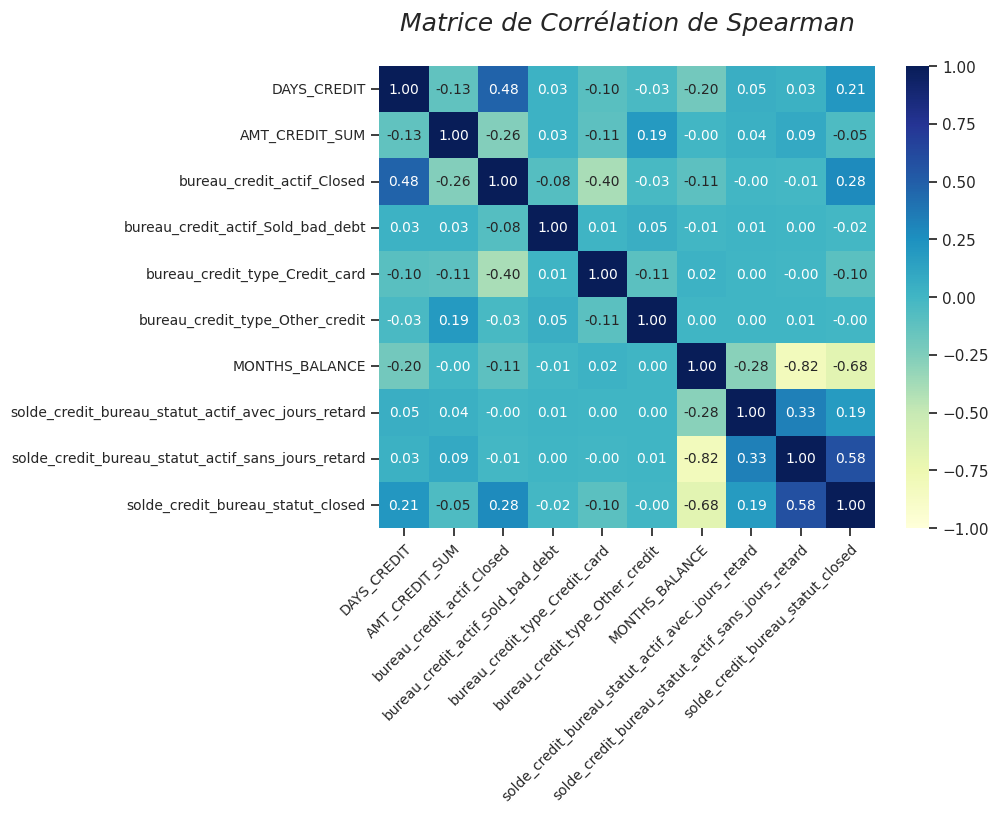

In [198]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuration de style
sns.set(style="ticks", rc={'figure.figsize': (8, 6)})

# Sélection des colonnes numériques après suppression des identifiants
df_analyse_num = bureau.drop(labels=['SK_ID_CURR', 'SK_ID_BUREAU'], axis=1).select_dtypes(include=[np.number])

# Centrage et réduction des colonnes
df_analyse_norm = (df_analyse_num - df_analyse_num.mean(axis=0)) / df_analyse_num.std(axis=0)

# Création de la matrice de corrélation
corr_df = df_analyse_norm.corr(method='spearman')

# Heatmap de la matrice de corrélation avec une palette dans les tons jaunes
ax = sns.heatmap(corr_df, cmap="YlGnBu", annot=True, annot_kws={"size": 10}, fmt=".2f", vmin=-1, vmax=1)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=10,
                   rotation=45, ha='right', rotation_mode='anchor')
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=10,
                   horizontalalignment='right')

# Titre
plt.title("Matrice de Corrélation de Spearman\n",
          loc="center", fontsize=18, fontstyle='italic')
plt.show()


In [199]:
high_correlation(corr_df, corr_value = 0.7)


MONTHS_BALANCE
-------------------------------
solde_credit_bureau_statut_actif_sans_jours_retard   -0.82
Name: MONTHS_BALANCE, dtype: float64


solde_credit_bureau_statut_actif_sans_jours_retard
-------------------------------
MONTHS_BALANCE   -0.82
Name: solde_credit_bureau_statut_actif_sans_jours_retard, dtype: float64




In [200]:
# Suppression de Months_Balance

bureau.drop(labels='MONTHS_BALANCE', axis=1, inplace=True)

In [201]:
bureau.columns.to_list()


['SK_ID_CURR',
 'SK_ID_BUREAU',
 'DAYS_CREDIT',
 'AMT_CREDIT_SUM',
 'bureau_credit_actif_Closed',
 'bureau_credit_actif_Sold_bad_debt',
 'bureau_credit_type_Credit_card',
 'bureau_credit_type_Other_credit',
 'solde_credit_bureau_statut_actif_avec_jours_retard',
 'solde_credit_bureau_statut_actif_sans_jours_retard',
 'solde_credit_bureau_statut_closed']

In [202]:
client_bureau = bureau.groupby(['SK_ID_CURR'], as_index=False).agg({'SK_ID_BUREAU': 'count',
                                                                    'DAYS_CREDIT': 'mean',
                                                                    'AMT_CREDIT_SUM': 'sum',
                                                                    'bureau_credit_actif_Closed': 'sum',
                                                                    'bureau_credit_actif_Sold_bad_debt': 'sum',
                                                                    'bureau_credit_type_Credit_card': 'sum',
                                                                    'bureau_credit_type_Other_credit': 'sum',
                                                                    'solde_credit_bureau_statut_actif_avec_jours_retard': 'sum',
                                                                    'solde_credit_bureau_statut_actif_sans_jours_retard': 'sum',
                                                                    'solde_credit_bureau_statut_closed': 'sum'
                                                                    })

client_bureau.drop(labels='SK_ID_CURR', axis=1).describe()

SK_ID_BUREAU  DAYS_CREDIT   AMT_CREDIT_SUM  bureau_credit_actif_Closed  \
count    305,811.00   305,811.00       305,811.00                  305,811.00   
mean           5.61         2.96     1,992,466.07                        3.53   
std            4.43         1.55     4,165,820.02                        3.43   
min            1.00         0.00             0.00                        0.00   
25%            2.00         2.00       346,967.64                        1.00   
50%            4.00         3.00       978,820.74                        3.00   
75%            8.00         4.00     2,345,121.00                        5.00   
max          116.00         8.00 1,017,957,917.38                      108.00   

       bureau_credit_actif_Sold_bad_debt  bureau_credit_type_Credit_card  \
count                         305,811.00                      305,811.00   
mean                                0.02                            1.32   
std                                 0.16                            1.51   
min                                 0.00                            0.00   
25%                                 0.00                            0.00   
50%                                 0.00                            1.00   
75%                                 0.00                            2.00   
max                                 9.00                           22.00   

       bureau_credit_type_Other_credit  \
count                       305,811.00   
mean                              0.20   
std                               0.72   
min                               0.00   
25%                               0.00   
50%                               0.00   
75%                               0.00   
max                              79.00   

       solde_credit_bureau_statut_actif_avec_jours_retard  \
count                                         305,811.00    
mean                                                1.03    
std                                                 5.25    
min                                                 0.00    
25%                                                 0.00    
50%                                                 0.00    
75%                                                 0.00    
max                                               396.00    

       solde_credit_bureau_statut_actif_sans_jours_retard  \
count                                         305,811.00    
mean                                               23.53    
std                                                44.87    
min                                                 0.00    
25%                                                 0.00    
50%                                                 0.00    
75%                                                30.00    
max                                               696.00    

       solde_credit_bureau_statut_closed  
count                         305,811.00  
mean                               37.79  
std                                84.40  
min                                 0.00  
25%                                 0.00  
50%                                 0.00  
75%                                35.00  
max                             1,981.00

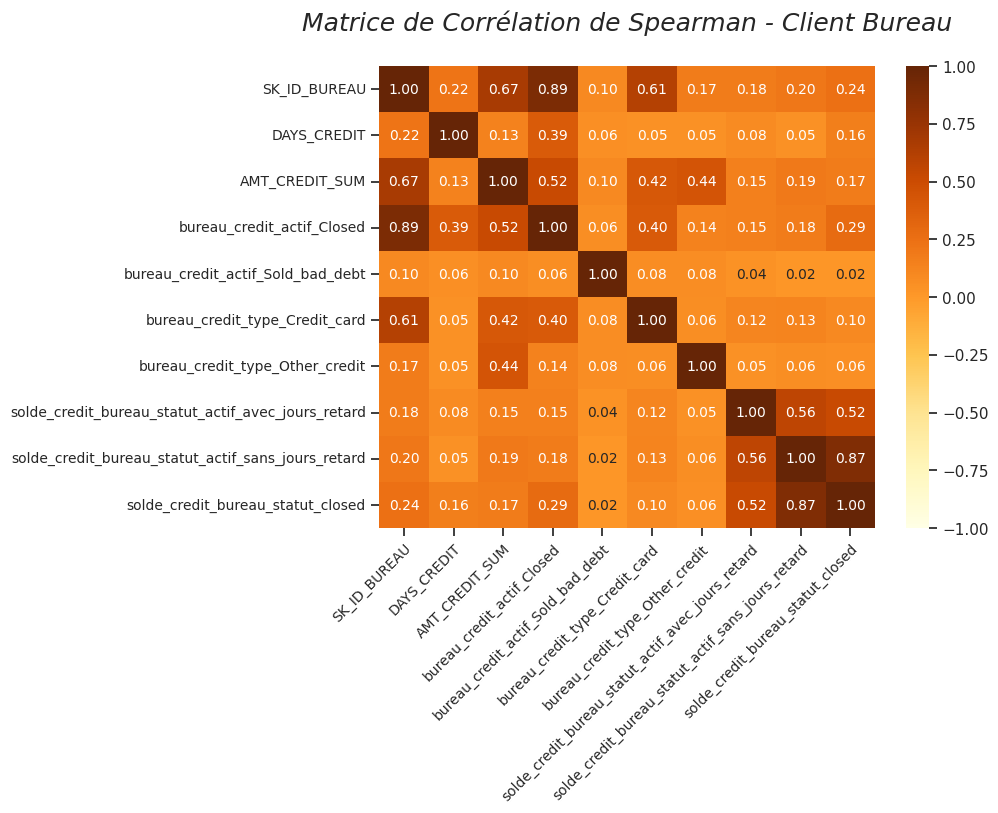

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuration de style
sns.set(style="ticks", rc={'figure.figsize': (8, 6)})

# Sélection des colonnes numériques après suppression des identifiants
df_analyse_num = client_bureau.drop(labels=['SK_ID_CURR'], axis=1).select_dtypes(include=[np.number])

# Centrage et réduction des colonnes
df_analyse_norm = (df_analyse_num - df_analyse_num.mean(axis=0)) / df_analyse_num.std(axis=0)

# Création de la matrice de corrélation
corr_df = df_analyse_norm.corr(method='spearman')

# Heatmap de la matrice de corrélation avec une palette dans les tons jaunes
ax = sns.heatmap(corr_df, cmap="YlOrBr", annot=True, annot_kws={"size": 10}, fmt=".2f", vmin=-1, vmax=1)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=10,
                   rotation=45, ha='right', rotation_mode='anchor')
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=10,
                   horizontalalignment='right')

# Titre
plt.title("Matrice de Corrélation de Spearman - Client Bureau\n",
          loc="center", fontsize=18, fontstyle='italic')
plt.show()


In [204]:
high_correlation(corr_df, corr_value = 0.7)

SK_ID_BUREAU
-------------------------------
bureau_credit_actif_Closed   0.89
Name: SK_ID_BUREAU, dtype: float64


bureau_credit_actif_Closed
-------------------------------
SK_ID_BUREAU   0.89
Name: bureau_credit_actif_Closed, dtype: float64


solde_credit_bureau_statut_actif_sans_jours_retard
-------------------------------
solde_credit_bureau_statut_closed   0.87
Name: solde_credit_bureau_statut_actif_sans_jours_retard, dtype: float64


solde_credit_bureau_statut_closed
-------------------------------
solde_credit_bureau_statut_actif_sans_jours_retard   0.87
Name: solde_credit_bureau_statut_closed, dtype: float64




In [205]:
vars_to_drop = ['SK_ID_BUREAU', 'solde_credit_bureau_statut_actif_sans_jours_retard']

client_bureau.drop(labels=vars_to_drop, axis=1, inplace=True)

In [206]:
client_bureau.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305811 entries, 0 to 305810
Data columns (total 9 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   SK_ID_CURR                                          305811 non-null  int64  
 1   DAYS_CREDIT                                         305811 non-null  float64
 2   AMT_CREDIT_SUM                                      305811 non-null  float64
 3   bureau_credit_actif_Closed                          305811 non-null  uint8  
 4   bureau_credit_actif_Sold_bad_debt                   305811 non-null  uint8  
 5   bureau_credit_type_Credit_card                      305811 non-null  uint8  
 6   bureau_credit_type_Other_credit                     305811 non-null  uint8  
 7   solde_credit_bureau_statut_actif_avec_jours_retard  305811 non-null  float64
 8   solde_credit_bureau_statut_closed                   305811 non-nu

## Sauvegarde dans un dossier au cas ou pour faire les jointures



In [207]:
# Chemin de sauvegarde
#csv_path = '/content/drive/My Drive/Projets Master/Projet 7/bases_crash/client_bureau.csv'

# Sauvegarde du DataFrame dans un fichier Excel
#client_bureau.to_csv(csv_path, index=False)

#print(f"Le fichier a été sauvegardé avec succès à l'emplacement : {csv_path}")

# 4.. Données sur les cartes de crédit : credit_card_balance




**Objectif**
La base **credit_card_balance** contient des informations mensuelles sur les cartes de crédit des clients. Ces données seront agrégées pour générer des variables utiles à la modélisation.

**Étapes prévues**
- Analyse des colonnes.
- Agrégation par client pour créer des features globales.

## 4.a Approche metier

In [208]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [209]:
credit_card.isna().mean()*100

SK_ID_PREV                    0.00
SK_ID_CURR                    0.00
MONTHS_BALANCE                0.00
AMT_BALANCE                   0.00
AMT_CREDIT_LIMIT_ACTUAL       0.00
AMT_DRAWINGS_ATM_CURRENT     19.52
AMT_DRAWINGS_CURRENT          0.00
AMT_DRAWINGS_OTHER_CURRENT   19.52
AMT_DRAWINGS_POS_CURRENT     19.52
AMT_INST_MIN_REGULARITY       7.95
AMT_PAYMENT_CURRENT          20.00
AMT_PAYMENT_TOTAL_CURRENT     0.00
AMT_RECEIVABLE_PRINCIPAL      0.00
AMT_RECIVABLE                 0.00
AMT_TOTAL_RECEIVABLE          0.00
CNT_DRAWINGS_ATM_CURRENT     19.52
CNT_DRAWINGS_CURRENT          0.00
CNT_DRAWINGS_OTHER_CURRENT   19.52
CNT_DRAWINGS_POS_CURRENT     19.52
CNT_INSTALMENT_MATURE_CUM     7.95
NAME_CONTRACT_STATUS          0.00
SK_DPD                        0.00
SK_DPD_DEF                    0.00
dtype: float64

In [210]:
credit_card.dropna(axis=1, inplace=True)

Supprime les colonnes qui contiennent des valeurs manquantes

In [211]:
credit_card.isna().mean()*100

SK_ID_PREV                  0.00
SK_ID_CURR                  0.00
MONTHS_BALANCE              0.00
AMT_BALANCE                 0.00
AMT_CREDIT_LIMIT_ACTUAL     0.00
AMT_DRAWINGS_CURRENT        0.00
AMT_PAYMENT_TOTAL_CURRENT   0.00
AMT_RECEIVABLE_PRINCIPAL    0.00
AMT_RECIVABLE               0.00
AMT_TOTAL_RECEIVABLE        0.00
CNT_DRAWINGS_CURRENT        0.00
NAME_CONTRACT_STATUS        0.00
SK_DPD                      0.00
SK_DPD_DEF                  0.00
dtype: float64

Les colonnes suivantes sont supprimées car elles ne sont pas pertinentes pour notre étude :

- **AMT_RECEIVABLE_PRINCIPAL** : Redondant avec d'autres mesures de la dette restante.
- **AMT_RECIVABLE** : Redondant avec AMT_RECEIVABLE_PRINCIPAL, sans apport significatif supplémentaire.
- **AMT_TOTAL_RECEIVABLE** : Redondant avec AMT_RECEIVABLE et AMT_RECEIVABLE_PRINCIPAL.
- **NAME_CONTRACT_STATUS** : Le statut du contrat n'est pas directement lié au risque de défaut.
- **AMT_PAYMENT_TOTAL_CURRENT** : Montant total des paiements sans indication de retard ou d'insolvabilité.
- **CNT_DRAWINGS_CURRENT** : Nombre de retraits, peu corrélé au risque de défaut.
- **SK_DPD** : Nombre de jours de retard actuel, déjà mieux capturé par d'autres variables.
- **SK_DPD_DEF** : Nombre de jours de retard considéré comme défaut, redondant avec des indicateurs globaux de défaut.


In [212]:
# Colonnes à supprimer
vars_to_drop = [
    'AMT_RECEIVABLE_PRINCIPAL',
    'AMT_RECIVABLE',
    'AMT_TOTAL_RECEIVABLE',
    'NAME_CONTRACT_STATUS',
    'AMT_PAYMENT_TOTAL_CURRENT',
    'CNT_DRAWINGS_CURRENT',
    'SK_DPD',
    'SK_DPD_DEF'
]

# Suppression des colonnes non pertinentes
credit_card = credit_card.drop(columns=vars_to_drop, inplace=False)

# Affichage des colonnes restantes
print(credit_card.columns)


Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_CURRENT'],
      dtype='object')


In [213]:
credit_card.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 6 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   SK_ID_PREV               int64  
 1   SK_ID_CURR               int64  
 2   MONTHS_BALANCE           int64  
 3   AMT_BALANCE              float64
 4   AMT_CREDIT_LIMIT_ACTUAL  int64  
 5   AMT_DRAWINGS_CURRENT     float64
dtypes: float64(2), int64(4)
memory usage: 175.8 MB


In [214]:
credit_card.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6        56.97   
1     2582071      363914              -1    63,975.56   
2     1740877      371185              -7    31,815.22   
3     1389973      337855              -4   236,572.11   
4     1891521      126868              -1   453,919.46   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_CURRENT  
0                   135000                877.50  
1                    45000              2,250.00  
2                   450000                  0.00  
3                   225000              2,250.00  
4                   450000             11,547.00

**Variables restantes dans le DataFrame**

Voici une description métier des colonnes restantes après nettoyage des données :
- **MONTHS_BALANCE** : Nombre de mois relatifs à l'enregistrement (valeurs négatives indiquent les mois passés). Cette variable est importante pour analyser l'évolution temporelle du crédit et le comportement du client sur une période donnée.

- **AMT_BALANCE** : Montant actuel du solde sur le crédit. Cette variable mesure la dette restante ou le montant disponible, ce qui est crucial pour évaluer le comportement financier du client.

- **AMT_CREDIT_LIMIT_ACTUAL** : Limite de crédit autorisée pour le client. Utile pour évaluer si le client utilise tout son crédit ou si une partie de la limite reste disponible, ce qui peut indiquer une gestion financière prudente.

- **AMT_DRAWINGS_CURRENT** : Montant total actuellement retiré ou utilisé du crédit. Cette variable aide à comprendre le comportement d'utilisation du crédit du client.

**Conclusion**

Ces variables offrent une vue d'ensemble sur le comportement d'utilisation et la gestion des crédits, ainsi que sur l'évolution temporelle de ces comportements. Elles sont toutes pertinentes pour analyser le risque de défaut.


In [215]:
client_credit_card = credit_card.groupby(['SK_ID_CURR'], as_index=False).agg({'SK_ID_PREV': 'count',
                                                                              'MONTHS_BALANCE': 'mean',
                                                                              'AMT_BALANCE': 'sum',
                                                                              'AMT_CREDIT_LIMIT_ACTUAL': 'sum',
                                                                              'AMT_DRAWINGS_CURRENT': 'sum' })

In [216]:
client_credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103558 entries, 0 to 103557
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   SK_ID_CURR               103558 non-null  int64  
 1   SK_ID_PREV               103558 non-null  int64  
 2   MONTHS_BALANCE           103558 non-null  float64
 3   AMT_BALANCE              103558 non-null  float64
 4   AMT_CREDIT_LIMIT_ACTUAL  103558 non-null  int64  
 5   AMT_DRAWINGS_CURRENT     103558 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 4.7 MB


## Sauvegarde dans un dossier au cas ou pour faire les jointures


In [217]:
# Chemin pour sauvegarder le fichier CSV
#csv_path = '/content/drive/My Drive/Projets Master/Projet 7/bases_crash/client_credit_card.csv'

# Sauvegarde du DataFrame dans un fichier CSV
#client_credit_card.to_csv(csv_path, index=False)

#print(f"Le fichier a été sauvegardé avec succès à l'emplacement : {csv_path}")


# 5.. Données sur les demandes précédentes : previous_application




**Objectif**
La base **previous_application** contient des informations sur les demandes de prêts précédentes des clients. Ces données seront utilisées pour enrichir le dataset principal.

**Étapes prévues**
- Analyse des variables importantes.
- Agrégation des informations par client.

## 5.a approche metier et analyse des colonnes

In [218]:
previous_application.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [219]:
previous_application.isna().mean().sort_values(ascending=False) * 100


RATE_INTEREST_PRIVILEGED      99.64
RATE_INTEREST_PRIMARY         99.64
AMT_DOWN_PAYMENT              53.64
RATE_DOWN_PAYMENT             53.64
NAME_TYPE_SUITE               49.12
NFLAG_INSURED_ON_APPROVAL     40.30
DAYS_TERMINATION              40.30
DAYS_LAST_DUE                 40.30
DAYS_LAST_DUE_1ST_VERSION     40.30
DAYS_FIRST_DUE                40.30
DAYS_FIRST_DRAWING            40.30
AMT_GOODS_PRICE               23.08
AMT_ANNUITY                   22.29
CNT_PAYMENT                   22.29
PRODUCT_COMBINATION            0.02
AMT_CREDIT                     0.00
NAME_YIELD_GROUP               0.00
NAME_PORTFOLIO                 0.00
NAME_SELLER_INDUSTRY           0.00
SELLERPLACE_AREA               0.00
CHANNEL_TYPE                   0.00
NAME_PRODUCT_TYPE              0.00
SK_ID_PREV                     0.00
NAME_GOODS_CATEGORY            0.00
NAME_CLIENT_TYPE               0.00
CODE_REJECT_REASON             0.00
SK_ID_CURR                     0.00
DAYS_DECISION                  0.00
NAME_CONTRACT_STATUS           0.00
NAME_CASH_LOAN_PURPOSE         0.00
NFLAG_LAST_APPL_IN_DAY         0.00
FLAG_LAST_APPL_PER_CONTRACT    0.00
HOUR_APPR_PROCESS_START        0.00
WEEKDAY_APPR_PROCESS_START     0.00
AMT_APPLICATION                0.00
NAME_CONTRACT_TYPE             0.00
NAME_PAYMENT_TYPE              0.00
dtype: float64

In [220]:
# Suppression des variables avec valeurs manquantes
var_to_drop = [var for var in previous_application.columns if previous_application[var].isnull().mean() > 0.2]
print(var_to_drop)
previous_application.drop(labels=var_to_drop, axis=1, inplace=True)


['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


In [221]:
previous_application.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_APPLICATION              1670214 non-null  float64
 4   AMT_CREDIT                   1670213 non-null  float64
 5   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 6   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 7   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 8   NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 9   NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 10  NAME_CONTRACT_STATUS         1670214 non-null  object 
 11  DAYS_DECISION                1670214 non-null  int64  
 12  NAME_PAYMENT_TYPE            1670214 non-n

In [222]:
previous_application.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_APPLICATION',
       'AMT_CREDIT', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [223]:
previous_application.shape

(1670214, 23)

**Analyse mise à jour des variables dans `previous_application`**

La base `previous_application` contient 23 colonnes. Après une analyse approfondie, nous avons regroupé les colonnes en trois catégories : celles à conserver, celles à analyser avant de prendre une décision, et celles à supprimer.

---

**Colonnes pertinentes à conserver**
Ces variables apportent une valeur directe pour notre problématique de prédiction du défaut de paiement :
1. **`SK_ID_CURR`** : Identifiant unique du client.  
   *Pertinent* pour relier cette base à la base principale.
2. **`NAME_CONTRACT_TYPE`** : Type de contrat de crédit (ex : Cash loans, Revolving loans).  
   *Pertinent* pour comprendre les préférences de crédit du client.
3. **`AMT_APPLICATION`** : Montant demandé par le client.  
   *Pertinent* pour comparer avec le montant réellement accordé.
4. **`AMT_CREDIT`** : Montant final accordé pour le crédit.  
   *Pertinent* pour analyser les montants de crédits passés.
5. **`NAME_CONTRACT_STATUS`** : Statut des crédits précédents (Approuvé, Refusé, Annulé).  
   *Pertinent* pour comprendre la fiabilité du client vis-à-vis de ses crédits.
6. **`DAYS_DECISION`** : Nombre de jours depuis la décision sur le crédit.  
   *Pertinent* pour évaluer si les crédits sont récents ou anciens.
7. **`CNT_PAYMENT`** : Nombre d’échéances pour ce crédit.  
   *Pertinent* pour comprendre les durées habituelles des crédits du client.

---

**Colonnes à analyser avant décision**
Ces variables nécessitent une exploration pour déterminer leur pertinence :
1. **`HOUR_APPR_PROCESS_START`** : Heure à laquelle la demande a été faite.  
   - Peut être analysée pour voir si des comportements liés à l'heure (ex : urgences de dernière minute) influencent la probabilité de défaut.
2. **`WEEKDAY_APPR_PROCESS_START`** : Jour de la semaine où la demande a été faite.  
   - Analyse pour comprendre si le jour de la demande a un impact sur les résultats.
3. **`NAME_CASH_LOAN_PURPOSE`** : Objet du crédit (ex : achat, éducation).  
   - Utile si des comportements spécifiques sont observés en fonction des objectifs des crédits.
4. **`NAME_PAYMENT_TYPE`** : Type de paiement utilisé pour le crédit.  
   - Peut être pertinent si certains types de paiement indiquent un risque plus élevé.
5. **`PRODUCT_COMBINATION`** : Combinaison de produits associés au crédit.  
   - À explorer pour voir si certaines combinaisons influencent le risque.

---

**Colonnes à supprimer**
Ces colonnes sont jugées non pertinentes pour notre problématique ou trop spécifiques :
1. **`SK_ID_PREV`** : Identifiant unique du crédit précédent.  
   - Utile pour des analyses spécifiques mais sans valeur pour notre modèle global.
2. **`FLAG_LAST_APPL_PER_CONTRACT`** : Indique s'il s'agit de la dernière demande pour ce contrat.  
   - Information spécifique et peu utile pour notre problématique.
3. **`NFLAG_LAST_APPL_IN_DAY`** : Indique si la demande est la dernière de la journée.  
   - Peu de lien avec la probabilité de défaut.
4. **`NAME_PORTFOLIO`** : Type de portefeuille du crédit précédent.  
   - Détail trop spécifique, peu utile pour notre problématique.
5. **`NAME_PRODUCT_TYPE`** : Type de produit associé au crédit.  
   - Peu de lien direct avec le risque de défaut.
6. **`CHANNEL_TYPE`** : Canal par lequel le crédit a été demandé.  
   - Non pertinent pour évaluer la probabilité de défaut.
7. **`NAME_SELLER_INDUSTRY`** : Industrie du vendeur.  
   - Trop spécifique et sans lien direct avec notre problématique.
8. **`NAME_YIELD_GROUP`** : Catégorie de rendement du crédit.  
   - Non pertinent pour évaluer le risque client.
9. **`SELLERPLACE_AREA`** : Zone géographique du vendeur.  
   - Détail trop spécifique pour influencer la probabilité de défaut.
10.**`NAME_GOODS_CATEGORY`**  a supprimer
---

**Résumé des colonnes**
- **Colonnes conservées (7)** :
  - `SK_ID_CURR`, `NAME_CONTRACT_TYPE`, `AMT_APPLICATION`, `AMT_CREDIT`, `NAME_CONTRACT_STATUS`, `DAYS_DECISION`, `CNT_PAYMENT`.

- **Colonnes à analyser (5)** :
  - `HOUR_APPR_PROCESS_START`, `WEEKDAY_APPR_PROCESS_START`, `NAME_CASH_LOAN_PURPOSE`, `NAME_PAYMENT_TYPE`, `PRODUCT_COMBINATION`.

- **Colonnes supprimées (11)** :
  - `SK_ID_PREV`, `FLAG_LAST_APPL_PER_CONTRACT`, `NFLAG_LAST_APPL_IN_DAY`, `NAME_PORTFOLIO`, `NAME_PRODUCT_TYPE`, `CHANNEL_TYPE`, `NAME_SELLER_INDUSTRY`, `NAME_YIELD_GROUP`, `SELLERPLACE_AREA`.

---

**Conclusion**
Sur les 23 colonnes de la base, nous en conservons **7 directement pertinentes** pour notre problématique. Nous analysons **5 colonnes** pour confirmer ou non leur utilité. Enfin, nous supprimons **11 colonnes** jugées non pertinentes ou trop spécifiques. Cela garantit que la base est optimisée pour notre objectif de prédiction du risque de défaut.



In [224]:
cat_var = previous_application.select_dtypes(exclude=[np.number]).columns.to_list()
print(cat_var)

['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']


In [225]:
for i in cat_var:
    cat_analyzer(previous_application, i)

NAME_CONTRACT_TYPE
                     COUNT  RATIO
NAME_CONTRACT_TYPE               
Cash loans          747553  44.76
Consumer loans      729151  43.66
Revolving loans     193164  11.57
XNA                    346   0.02


WEEKDAY_APPR_PROCESS_START
                             COUNT  RATIO
WEEKDAY_APPR_PROCESS_START               
TUESDAY                     255118  15.27
WEDNESDAY                   255010  15.27
MONDAY                      253557  15.18
FRIDAY                      252048  15.09
THURSDAY                    249099  14.91
SATURDAY                    240631  14.41
SUNDAY                      164751   9.86


FLAG_LAST_APPL_PER_CONTRACT
                               COUNT  RATIO
FLAG_LAST_APPL_PER_CONTRACT                
Y                            1661739  99.49
N                               8475   0.51


NAME_CASH_LOAN_PURPOSE
                                   COUNT  RATIO
NAME_CASH_LOAN_PURPOSE                         
XAP                               922661  5

In [226]:
# oon supprime les variables categories ou yy a beaucooup de valeurs manquantes
# Liste des colonnes à supprimer
colonnes_a_supprimer = [
    'NAME_CASH_LOAN_PURPOSE',
    'CODE_REJECT_REASON',
    'NAME_GOODS_CATEGORY',
    'NAME_PORTFOLIO',
    'NAME_PRODUCT_TYPE',
    'CHANNEL_TYPE',
    'NAME_SELLER_INDUSTRY',
    'NAME_YIELD_GROUP'
]

# Suppression des colonnes dans la base `previous_application`
previous_application.drop(columns=colonnes_a_supprimer, inplace=True)

# Vérification des colonnes restantes
print("Colonnes restantes après suppression :")
print(previous_application.columns.to_list())


Colonnes restantes après suppression :
['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_APPLICATION', 'AMT_CREDIT', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'NAME_CLIENT_TYPE', 'SELLERPLACE_AREA', 'PRODUCT_COMBINATION']


In [227]:
previous_application.shape

(1670214, 15)

In [228]:
# Liste des colonnes à supprimer
colonnes_a_supprimer = [
    'SELLERPLACE_AREA',
    'NAME_PAYMENT_TYPE',
    'FLAG_LAST_APPL_PER_CONTRACT'
]

# Suppression des colonnes dans la base `previous_application`
previous_application.drop(columns=colonnes_a_supprimer, inplace=True)

# Vérification des colonnes restantes
print("Colonnes restantes après suppression :")
print(previous_application.columns.to_list())


Colonnes restantes après suppression :
['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_APPLICATION', 'AMT_CREDIT', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_CLIENT_TYPE', 'PRODUCT_COMBINATION']


## 5.b variables categorielles

In [229]:
previous_application.shape

(1670214, 12)

In [230]:
# Identification des variables catégorielles
variables_categoriques = previous_application.select_dtypes(include=['object']).columns.to_list()

# Affichage des variables catégorielles
print("Variables catégorielles restantes :")
print(variables_categoriques)


Variables catégorielles restantes :
['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'NAME_CONTRACT_STATUS', 'NAME_CLIENT_TYPE', 'PRODUCT_COMBINATION']


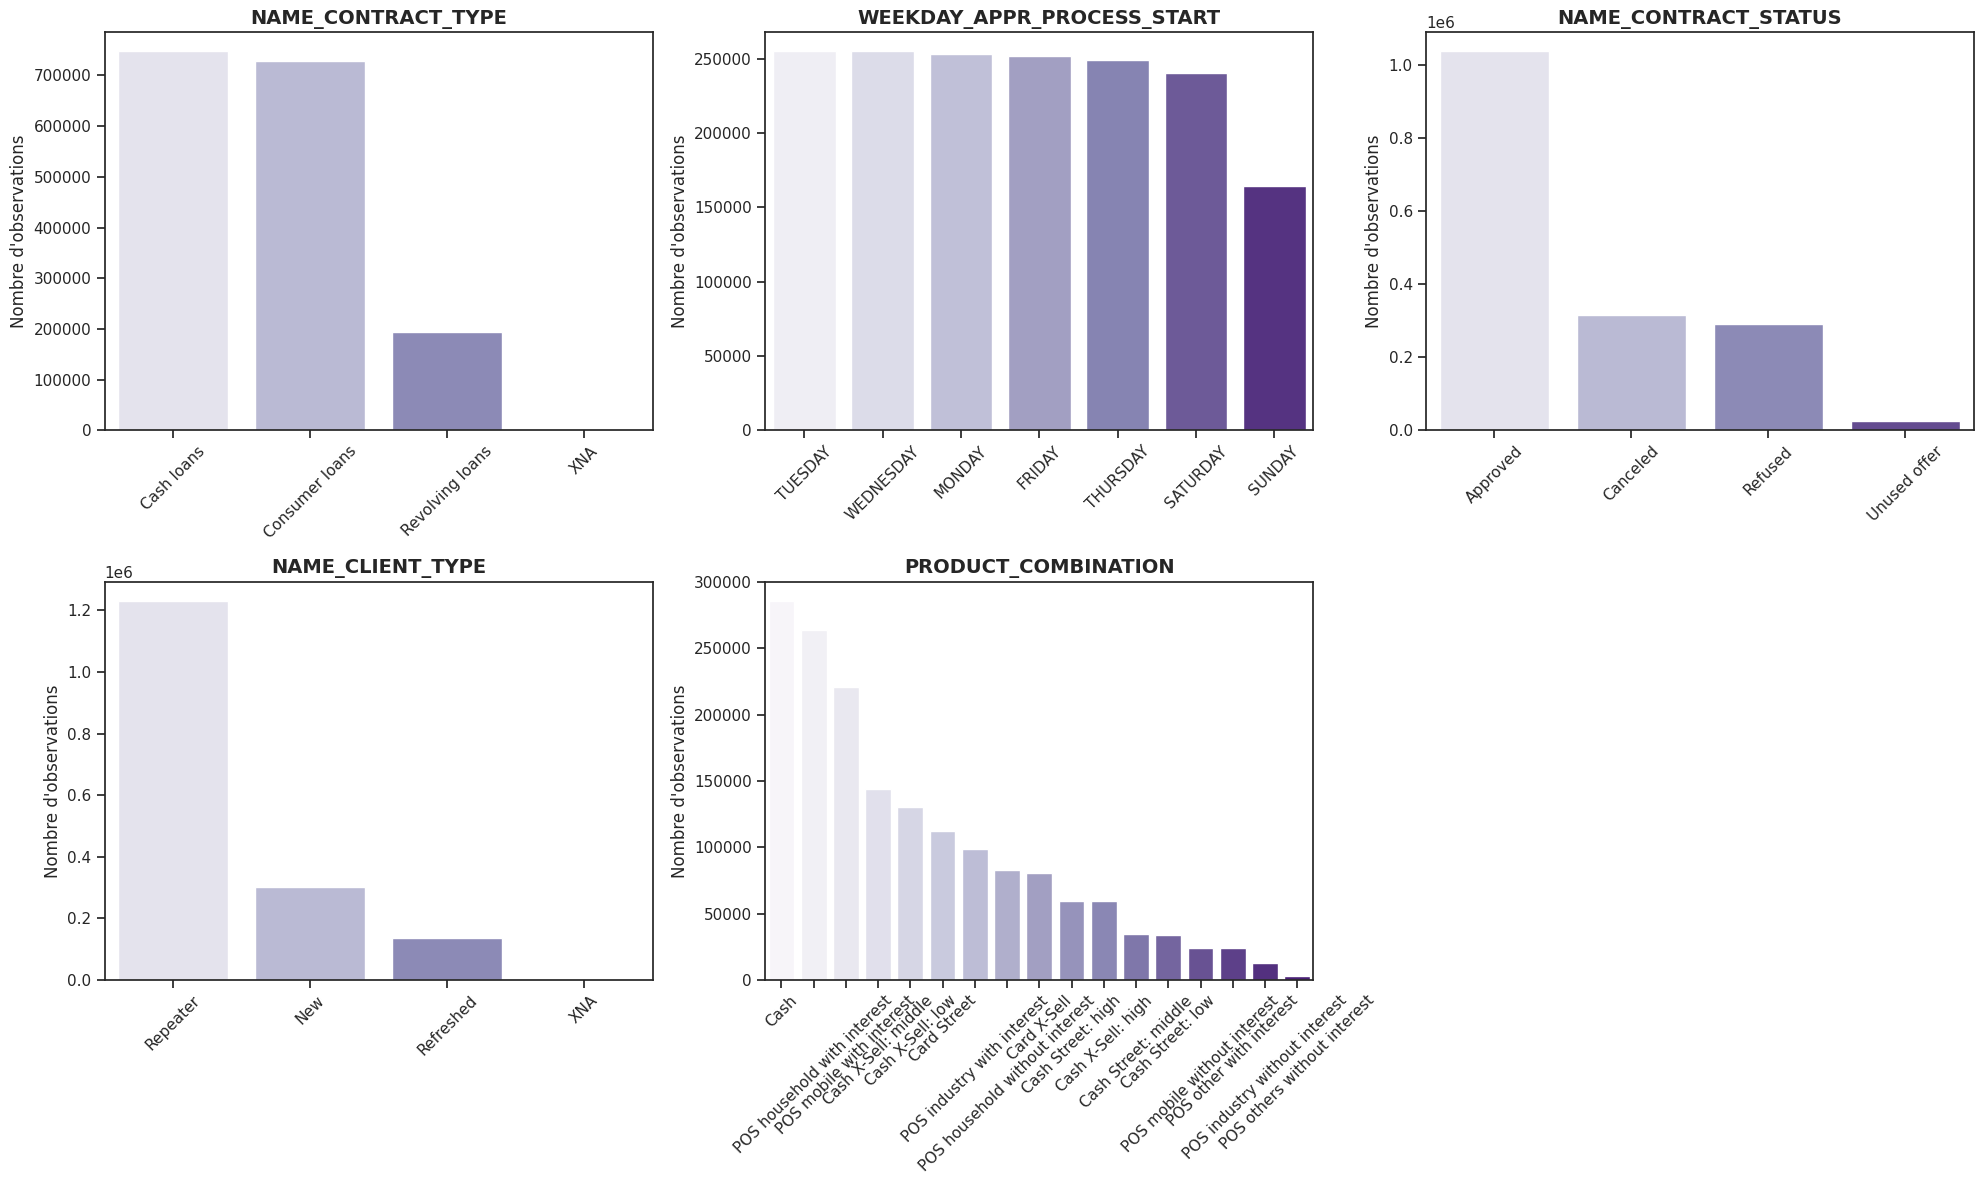

In [231]:

# Identification des variables catégoriques
variables_categoriques = previous_application.select_dtypes(include=['object']).columns.to_list()

# Définition des dimensions pour 3 colonnes par ligne
n_cols = 3
n_rows = (len(variables_categoriques) // n_cols) + (1 if len(variables_categoriques) % n_cols != 0 else 0)

# Création des subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 6))
axes = axes.flatten()  # Aplatir les axes pour accéder facilement à chaque subplot

# Tracé des barplots
for i, var in enumerate(variables_categoriques):
    sns.countplot(
        data=previous_application,
        x=var,
        palette='Purples',  # Palette spécifique à cette base
        order=previous_application[var].value_counts().index,
        ax=axes[i]
    )
    axes[i].set_title(f"{var}", fontsize=14, fontweight='bold')
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Nombre d'observations")
    axes[i].tick_params(axis='x', rotation=45)

# Supprime les axes inutilisés s'il y a moins de variables que de subplots
for j in range(len(variables_categoriques), len(axes)):
    fig.delaxes(axes[j])

# Ajustement de l'espacement entre les subplots
plt.tight_layout()
plt.show()


In [232]:
map_contrat_type = {'Cash loans': 'cash_loans',
                    'Consumer loans': 'consumer_loans',
                    'Revolving loans': 'revolving_loans',
                    'XNA': 'revolving_loans'}

previous_application['NAME_CONTRACT_TYPE'] = previous_application['NAME_CONTRACT_TYPE'].map(map_contrat_type)

In [233]:
print(previous_application.columns.to_list())


['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_APPLICATION', 'AMT_CREDIT', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_CLIENT_TYPE', 'PRODUCT_COMBINATION']


In [234]:
prev_appli_2 = previous_application[['SK_ID_CURR', 'NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS']]


In [235]:
prev_appli_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 3 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   SK_ID_CURR            1670214 non-null  int64 
 1   NAME_CONTRACT_TYPE    1670214 non-null  object
 2   NAME_CONTRACT_STATUS  1670214 non-null  object
dtypes: int64(1), object(2)
memory usage: 38.2+ MB


In [236]:
prev_appli_2 = pd.get_dummies(prev_appli_2,
                              columns=["NAME_CONTRACT_STATUS",
                                       "NAME_CONTRACT_TYPE"],
                              prefix={'NAME_CONTRACT_STATUS': 'prev_contrat_statut',
                                      'NAME_CONTRACT_TYPE': 'prev_contrat_type'},
                              drop_first=True)

In [237]:
prev_appli_2.head()


SK_ID_CURR  prev_contrat_statut_Canceled  prev_contrat_statut_Refused  \
0      271877                         False                        False   
1      108129                         False                        False   
2      122040                         False                        False   
3      176158                         False                        False   
4      202054                         False                         True   

   prev_contrat_statut_Unused offer  prev_contrat_type_consumer_loans  \
0                             False                              True   
1                             False                             False   
2                             False                             False   
3                             False                             False   
4                             False                             False   

   prev_contrat_type_revolving_loans  
0                              False  
1                              False  
2                              False  
3                              False  
4                              False

In [238]:
prev_appli_2 = prev_appli_2.groupby(['SK_ID_CURR'], as_index=False).sum()


In [239]:
prev_appli_2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338857 entries, 0 to 338856
Data columns (total 6 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   SK_ID_CURR                         338857 non-null  int64
 1   prev_contrat_statut_Canceled       338857 non-null  int64
 2   prev_contrat_statut_Refused        338857 non-null  int64
 3   prev_contrat_statut_Unused offer   338857 non-null  int64
 4   prev_contrat_type_consumer_loans   338857 non-null  int64
 5   prev_contrat_type_revolving_loans  338857 non-null  int64
dtypes: int64(6)
memory usage: 15.5 MB


## 5.c variables quantitatives

In [241]:
# Les variables numériques
var_num = previous_application.drop(labels=['SK_ID_CURR', 'SK_ID_PREV'], axis=1).select_dtypes(include=[np.number]).columns.to_list()
print(var_num)

['AMT_APPLICATION', 'AMT_CREDIT', 'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION']


In [242]:
previous_application.drop(labels=['SK_ID_CURR', 'SK_ID_PREV'], axis=1).select_dtypes(include=[np.number]).describe()


AMT_APPLICATION   AMT_CREDIT  HOUR_APPR_PROCESS_START  \
count     1,670,214.00 1,670,213.00             1,670,214.00   
mean        175,233.86   196,114.02                    12.48   
std         292,779.76   318,574.62                     3.33   
min               0.00         0.00                     0.00   
25%          18,720.00    24,160.50                    10.00   
50%          71,046.00    80,541.00                    12.00   
75%         180,360.00   216,418.50                    15.00   
max       6,905,160.00 6,905,160.00                    23.00   

       NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  
count            1,670,214.00   1,670,214.00  
mean                     1.00        -880.68  
std                      0.06         779.10  
min                      0.00      -2,922.00  
25%                      1.00      -1,300.00  
50%                      1.00        -581.00  
75%                      1.00        -280.00  
max                      1.00          -1.00

In [243]:
previous_application['NFLAG_LAST_APPL_IN_DAY'].value_counts()


NFLAG_LAST_APPL_IN_DAY
1    1664314
0       5900
Name: count, dtype: int64

In [244]:
previous_application.query('NFLAG_LAST_APPL_IN_DAY == 1', inplace=True)

previous_application.drop(labels='NFLAG_LAST_APPL_IN_DAY', axis=1, inplace=True)

previous_application.shape

(1664314, 11)

In [245]:
# Calcul nb_jours_depuis_demande_precedente
previous_application['DAYS_DECISION'] = round(previous_application['DAYS_DECISION'] / -365, 0)


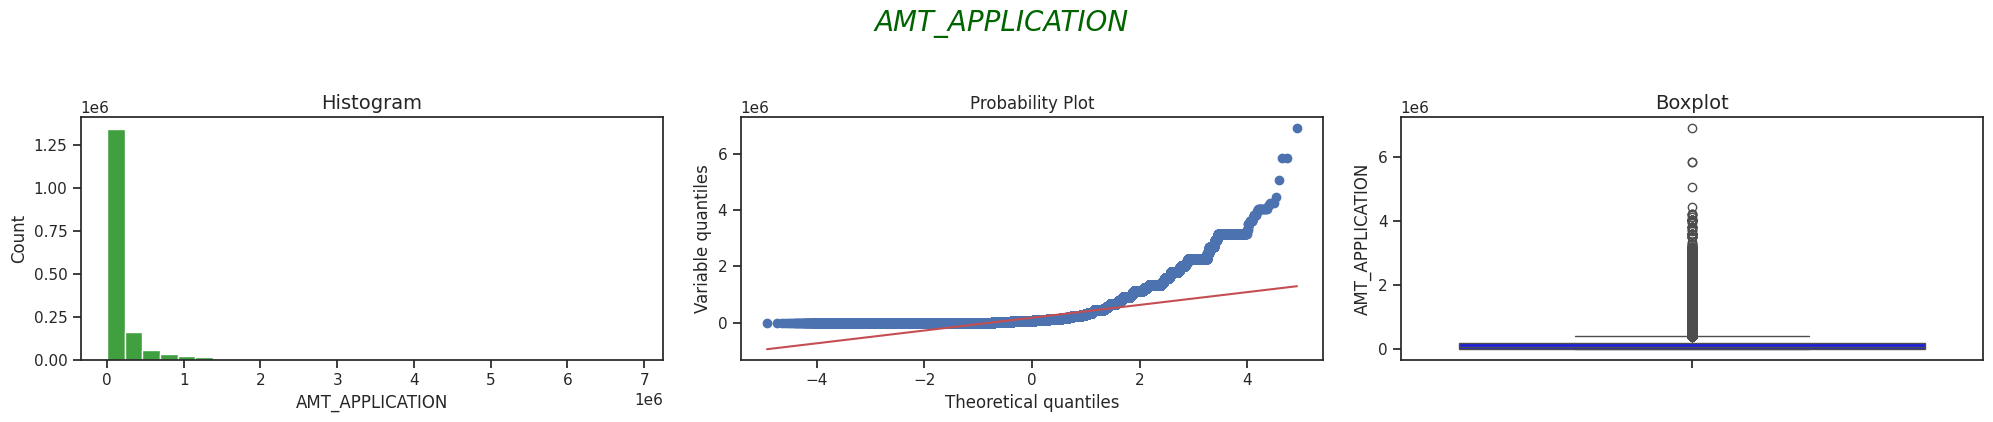

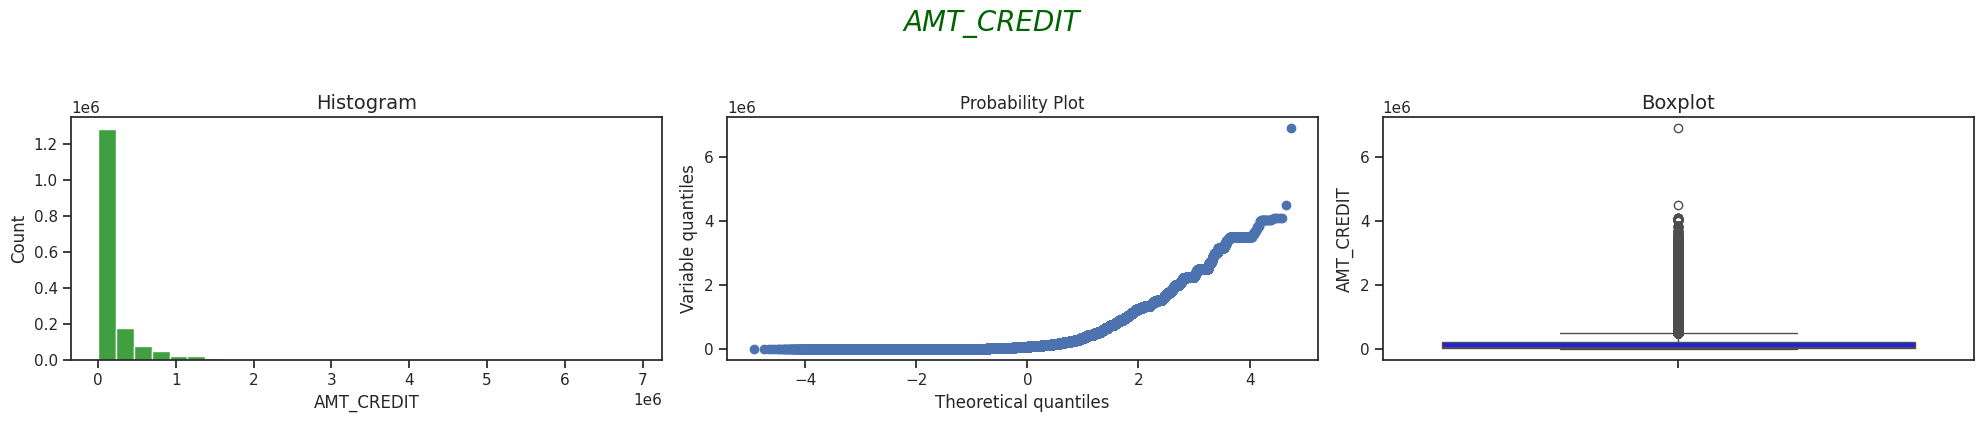

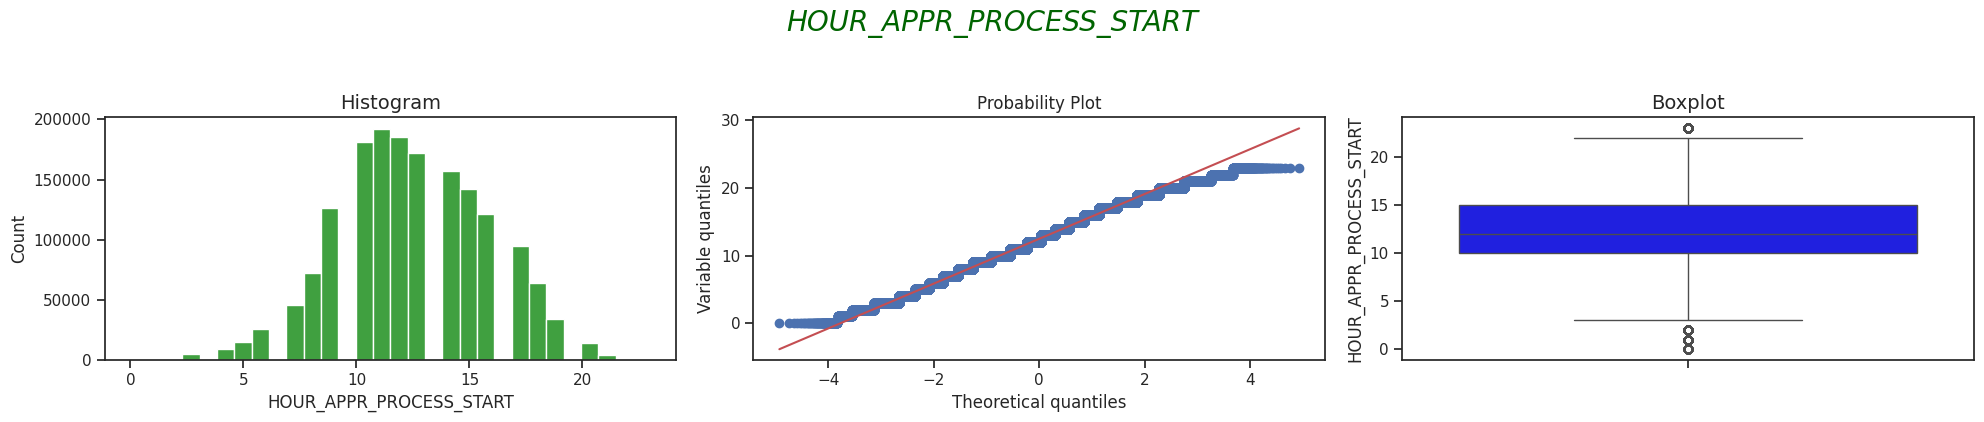

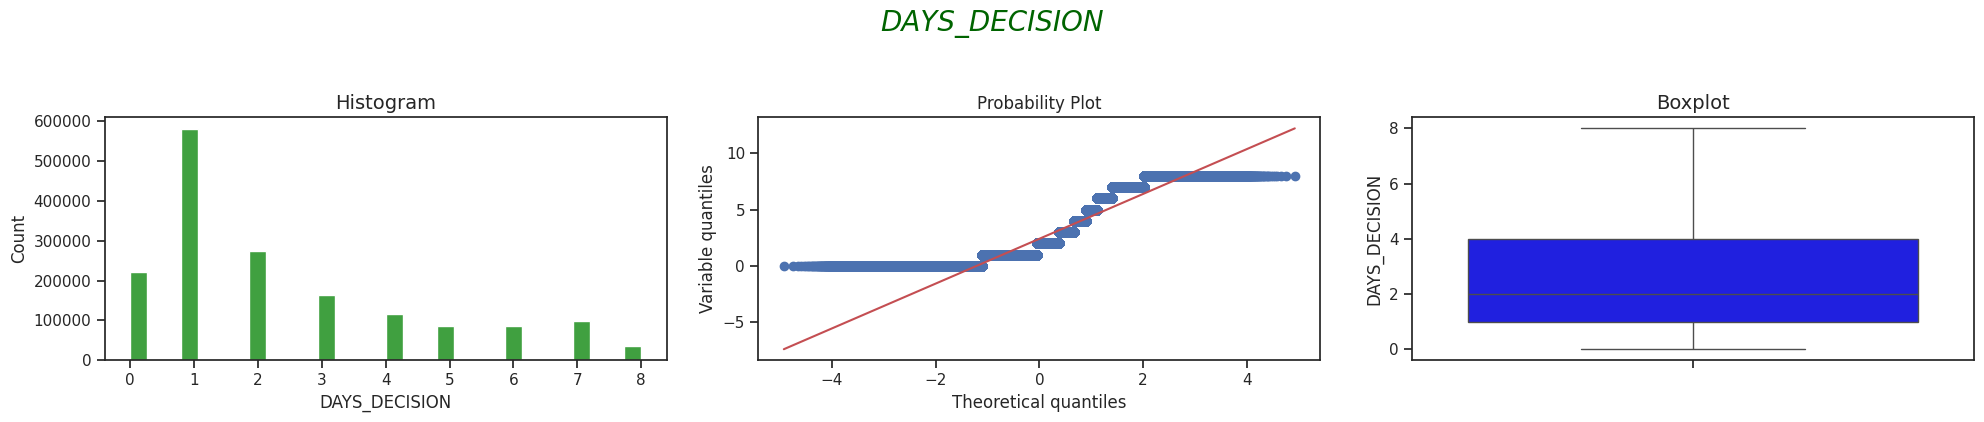

In [246]:
var_num = ['AMT_APPLICATION', 'AMT_CREDIT', 'HOUR_APPR_PROCESS_START', 'DAYS_DECISION']

for var in var_num:
    diagnostic_plots(previous_application, var, f"{var}")

In [247]:
prev_appli_1 = previous_application.groupby(['SK_ID_CURR'], as_index=False).agg({'SK_ID_PREV': 'count',
                                                                                 'AMT_CREDIT': 'mean',
                                                                                 'HOUR_APPR_PROCESS_START': 'mean',
                                                                                 'DAYS_DECISION': 'mean'})

In [248]:
prev_appli_1.drop(labels=['SK_ID_CURR'], axis=1).describe()


SK_ID_PREV   AMT_CREDIT  HOUR_APPR_PROCESS_START  DAYS_DECISION
count  338,810.00   338,810.00               338,810.00     338,810.00
mean         4.91   170,062.88                    12.67           2.52
std          4.20   164,996.61                     2.78           1.59
min          1.00         0.00                     0.00           0.00
25%          2.00    67,255.71                    11.00           1.25
50%          4.00   117,845.16                    12.77           2.06
75%          7.00   215,889.32                    14.50           3.40
max         77.00 4,050,000.00                    23.00           8.00

In [249]:
prev_appli_1 = prev_appli_1.rename(columns={'SK_ID_PREV': 'nb_demande_pret_precedente',
                                            'AMT_CREDIT': 'montant_demande_pret_precedente',
                                            'HOUR_APPR_PROCESS_START': 'heure_demande_pret_precedente',
                                            'DAYS_DECISION': 'nb_year_depuis_decision_precedente'})

## 5.d conclusion sur previous_application

In [250]:
prev_appli_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338810 entries, 0 to 338809
Data columns (total 5 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   SK_ID_CURR                          338810 non-null  int64  
 1   nb_demande_pret_precedente          338810 non-null  int64  
 2   montant_demande_pret_precedente     338810 non-null  float64
 3   heure_demande_pret_precedente       338810 non-null  float64
 4   nb_year_depuis_decision_precedente  338810 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 12.9 MB


In [251]:
prev_appli_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338857 entries, 0 to 338856
Data columns (total 6 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   SK_ID_CURR                         338857 non-null  int64
 1   prev_contrat_statut_Canceled       338857 non-null  int64
 2   prev_contrat_statut_Refused        338857 non-null  int64
 3   prev_contrat_statut_Unused offer   338857 non-null  int64
 4   prev_contrat_type_consumer_loans   338857 non-null  int64
 5   prev_contrat_type_revolving_loans  338857 non-null  int64
dtypes: int64(6)
memory usage: 15.5 MB


## Sauvegarde dans un dossier au cas ou pour faire les jointures


In [252]:

# Chemins pour sauvegarder les fichiers CSV
path_prev_appli_1 = '/content/drive/My Drive/Projets Master/Projet 7/bases_crash/prev_appli_1.csv'
path_prev_appli_2 = '/content/drive/My Drive/Projets Master/Projet 7/bases_crash/prev_appli_2.csv'

# Sauvegarde des fichiers
prev_appli_1.to_csv(path_prev_appli_1, index=False)
prev_appli_2.to_csv(path_prev_appli_2, index=False)

print(f"Les fichiers ont été sauvegardés avec succès :\n- Prev_appli_1 : {path_prev_appli_1}\n- Prev_appli_2 : {path_prev_appli_2}")

Les fichiers ont été sauvegardés avec succès :
- Prev_appli_1 : /content/drive/My Drive/Projets Master/Projet 7/bases_crash/prev_appli_1.csv
- Prev_appli_2 : /content/drive/My Drive/Projets Master/Projet 7/bases_crash/prev_appli_2.csv



# 6.. Données POS Cash Balance : POS_CASH_balance

In [253]:
pos_cash.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [254]:
pos_cash.isna().mean()*100


SK_ID_PREV              0.00
SK_ID_CURR              0.00
MONTHS_BALANCE          0.00
CNT_INSTALMENT          0.26
CNT_INSTALMENT_FUTURE   0.26
NAME_CONTRACT_STATUS    0.00
SK_DPD                  0.00
SK_DPD_DEF              0.00
dtype: float64

In [255]:
pos_cash.drop(labels=['SK_ID_CURR', 'SK_ID_PREV'], axis=1).describe([.01, .1, .25, .5, .75, .8, .9, .95, .99])


MONTHS_BALANCE  CNT_INSTALMENT  CNT_INSTALMENT_FUTURE        SK_DPD  \
count   10,001,358.00    9,975,287.00           9,975,271.00 10,001,358.00   
mean           -35.01           17.09                  10.48         11.61   
std             26.07           12.00                  11.11        132.71   
min            -96.00            1.00                   0.00          0.00   
1%             -94.00            4.00                   0.00          0.00   
10%            -77.00            6.00                   0.00          0.00   
25%            -54.00           10.00                   3.00          0.00   
50%            -28.00           12.00                   7.00          0.00   
75%            -13.00           24.00                  14.00          0.00   
80%            -11.00           24.00                  17.00          0.00   
90%             -6.00           36.00                  24.00          0.00   
95%             -4.00           45.00                  35.00          0.00   
99%             -2.00           60.00                  53.00        235.00   
max             -1.00           92.00                  85.00      4,231.00   

         SK_DPD_DEF  
count 10,001,358.00  
mean           0.65  
std           32.76  
min            0.00  
1%             0.00  
10%            0.00  
25%            0.00  
50%            0.00  
75%            0.00  
80%            0.00  
90%            0.00  
95%            0.00  
99%            1.00  
max        3,595.00

In [256]:
print(pd.DataFrame({"COUNT": pos_cash['NAME_CONTRACT_STATUS'].value_counts()/ len(pos_cash) *100}), end="\n\n\n")


                       COUNT
NAME_CONTRACT_STATUS        
Active                 91.50
Completed               7.45
Signed                  0.87
Demand                  0.07
Returned to the store   0.05
Approved                0.05
Amortized debt          0.01
Canceled                0.00
XNA                     0.00




In [257]:
# Suppression des colonnes non pertinentes dans pos_cash
columns_to_drop = ['SK_DPD_DEF', 'SK_DPD', 'NAME_CONTRACT_STATUS']
pos_cash.drop(columns=columns_to_drop, axis=1, inplace=True)

# Vérification des colonnes restantes
print(pos_cash.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 5 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
dtypes: float64(2), int64(3)
memory usage: 381.5 MB
None


**Analyse et description des variables restantes dans `pos_cash`**

1. **SK_ID_PREV** :
   - Identifiant unique de la demande de prêt précédent.
   - Cette variable est essentielle pour relier ces informations aux autres bases et analyser les prêts antérieurs associés au client.

2. **SK_ID_CURR** :
   - Identifiant unique du client actuel.
   - Permet de relier les informations des clients entre différentes bases.

3. **MONTHS_BALANCE** :
   - Montre le nombre de mois écoulés (ou restant) depuis la demande ou le traitement d’un prêt.
   - Utile pour comprendre l'historique temporel des paiements ou des interactions avec les crédits passés.

4. **CNT_INSTALMENT** :
   - Indique le nombre total d'échéances prévues pour un prêt.
   - Pertinent pour calculer des métriques comme la durée ou la densité des paiements pour les prêts passés.

5. **CNT_INSTALMENT_FUTURE** :
   - Indique le nombre d'échéances restantes pour un prêt.
   - Permet de suivre l'état d'avancement du remboursement du prêt.

---

**Conclusion**
Les variables restantes dans la base `pos_cash` sont toutes pertinentes pour l'analyse. Elles offrent des informations cruciales sur l'état et l'historique des crédits passés, en particulier pour comprendre les comportements de remboursement et la gestion des prêts. Nous conservons toutes ces variables pour notre étude.


## regroupement sur l'ID current du client

In [258]:
client_pos_cash = pos_cash.groupby(['SK_ID_CURR'], as_index=False).agg({'SK_ID_PREV': 'count',
                                                                        'MONTHS_BALANCE': 'mean',
                                                                        'CNT_INSTALMENT': 'mean',
                                                                        'CNT_INSTALMENT_FUTURE': 'mean'})

client_pos_cash.drop(labels='SK_ID_CURR', axis=1).describe()

SK_ID_PREV  MONTHS_BALANCE  CNT_INSTALMENT  CNT_INSTALMENT_FUTURE
count  337,252.00      337,252.00      337,224.00             337,224.00
mean        29.66          -31.87           14.65                   9.18
std         24.53           20.08            7.97                   6.50
min          1.00          -96.00            1.00                   0.00
25%         12.00          -43.99            9.62                   5.00
50%         22.00          -28.57           12.00                   6.99
75%         39.00          -15.50           18.60                  11.67
max        295.00           -1.00           72.00                  60.00

## Sauvegarde dans un dossier au cas ou pour faire les jointures


In [259]:
# Chemin pour sauvegarder le fichier CSV
#csv_path = '/content/drive/My Drive/Projets Master/Projet 7/bases_crash/client_pos_cash.csv'

# Sauvegarde du DataFrame dans un fichier CSV
#client_pos_cash.to_csv(csv_path, index=False)

#print(f"Le fichier a été sauvegardé avec succès à l'emplacement : {csv_path}")


# 7.. installments_payments: Historique de remboursement des crédits





**Objectif**
La base **installments_payments** contient l'historique des paiements (réalisés ou manqués) des crédits précédents. Ces données seront agrégées pour obtenir des variables utiles.

**Étapes prévues**
- Analyse des variables.
- Création de nouvelles features par agrégation.

In [260]:
installments_payments.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [261]:
installments_payments.isna().mean() * 100


SK_ID_PREV               0.00
SK_ID_CURR               0.00
NUM_INSTALMENT_VERSION   0.00
NUM_INSTALMENT_NUMBER    0.00
DAYS_INSTALMENT          0.00
DAYS_ENTRY_PAYMENT       0.02
AMT_INSTALMENT           0.00
AMT_PAYMENT              0.02
dtype: float64

In [262]:
liste_var = ['DAYS_ENTRY_PAYMENT', 'AMT_PAYMENT']

for var in liste_var:
    installments_payments[var].fillna(0, inplace=True)


In [263]:
installments_payments.drop(labels=['SK_ID_CURR', 'SK_ID_PREV'], axis=1).describe()


NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  \
count           13,605,401.00          13,605,401.00    13,605,401.00   
mean                     0.86                  18.87        -1,042.27   
std                      1.04                  26.66           800.95   
min                      0.00                   1.00        -2,922.00   
25%                      0.00                   4.00        -1,654.00   
50%                      1.00                   8.00          -818.00   
75%                      1.00                  19.00          -361.00   
max                    178.00                 277.00            -1.00   

       DAYS_ENTRY_PAYMENT  AMT_INSTALMENT   AMT_PAYMENT  
count       13,605,401.00   13,605,401.00 13,605,401.00  
mean            -1,050.89       17,050.91     17,234.54  
std                800.65       50,570.25     54,730.52  
min             -4,921.00            0.00          0.00  
25%             -1,662.00        4,226.09      3,394.17  
50%               -827.00        8,884.08      8,122.19  
75%               -370.00       16,710.21     16,105.91  
max                  0.00    3,771,487.85  3,771,487.85

In [264]:
installments_payments['DAYS_INSTALMENT'] = round(installments_payments['DAYS_INSTALMENT'] / -365, 0)
installments_payments['DAYS_ENTRY_PAYMENT'] = round(installments_payments['DAYS_ENTRY_PAYMENT'] / -365, 0)

In [265]:
ins_payments = installments_payments.groupby(['SK_ID_CURR'], as_index=False).agg({'NUM_INSTALMENT_VERSION': 'nunique',
                                                                                  'NUM_INSTALMENT_NUMBER': 'sum',
                                                                                  'DAYS_INSTALMENT': 'mean',
                                                                                  'DAYS_ENTRY_PAYMENT': 'mean',
                                                                                  'AMT_INSTALMENT': 'sum',
                                                                                  'AMT_PAYMENT': 'sum'})

ins_payments.drop(labels='SK_ID_CURR', axis=1).describe()

NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  \
count              339,587.00             339,587.00       339,587.00   
mean                     2.30                 756.05             2.48   
std                      1.87               1,892.40             1.66   
min                      1.00                   1.00             0.00   
25%                      1.00                  62.00             1.10   
50%                      2.00                 156.00             2.16   
75%                      3.00                 440.50             3.56   
max                     59.00              43,919.00             8.00   

       DAYS_ENTRY_PAYMENT  AMT_INSTALMENT   AMT_PAYMENT  
count          339,587.00      339,587.00    339,587.00  
mean                 2.51      683,136.95    690,494.23  
std                  1.65      893,380.54    930,897.69  
min                  0.00            0.00          0.00  
25%                  1.14      136,683.36    133,200.74  
50%                  2.19      334,395.22    324,803.52  
75%                  3.59      857,772.74    849,730.91  
max                  8.00   32,479,781.27 32,689,281.51

In [266]:
# Montant payé vs Montant attendu
# Le client a-t-il réglé toutes ces mensualités attendues des crédits précédents ?


ins_payments['montant_paye_vs_du'] = np.where(ins_payments['AMT_INSTALMENT'] != 0,
                                                   ins_payments['AMT_PAYMENT'] / ins_payments['AMT_INSTALMENT'] * 100, 0)

ins_payments['montant_paye_vs_du'].describe()

count   339,587.00
mean         99.34
std          13.71
min           0.00
25%          96.24
50%         100.00
75%         100.00
max         548.51
Name: montant_paye_vs_du, dtype: float64

In [267]:
ins_payments[ins_payments['montant_paye_vs_du'] > 100]


Output hidden; open in https://colab.research.google.com to view.

In [268]:
# Days past due and days before due (no negative values)
ins_payments['days_past_due'] = ins_payments['DAYS_ENTRY_PAYMENT'] - ins_payments['DAYS_INSTALMENT']
ins_payments['days_before_due'] = ins_payments['DAYS_INSTALMENT'] - ins_payments['DAYS_ENTRY_PAYMENT']
ins_payments['days_past_due'] = ins_payments['days_past_due'].apply(lambda x: x if x > 0 else 0)
ins_payments['days_before_due'] = ins_payments['days_before_due'].apply(lambda x: x if x > 0 else 0)

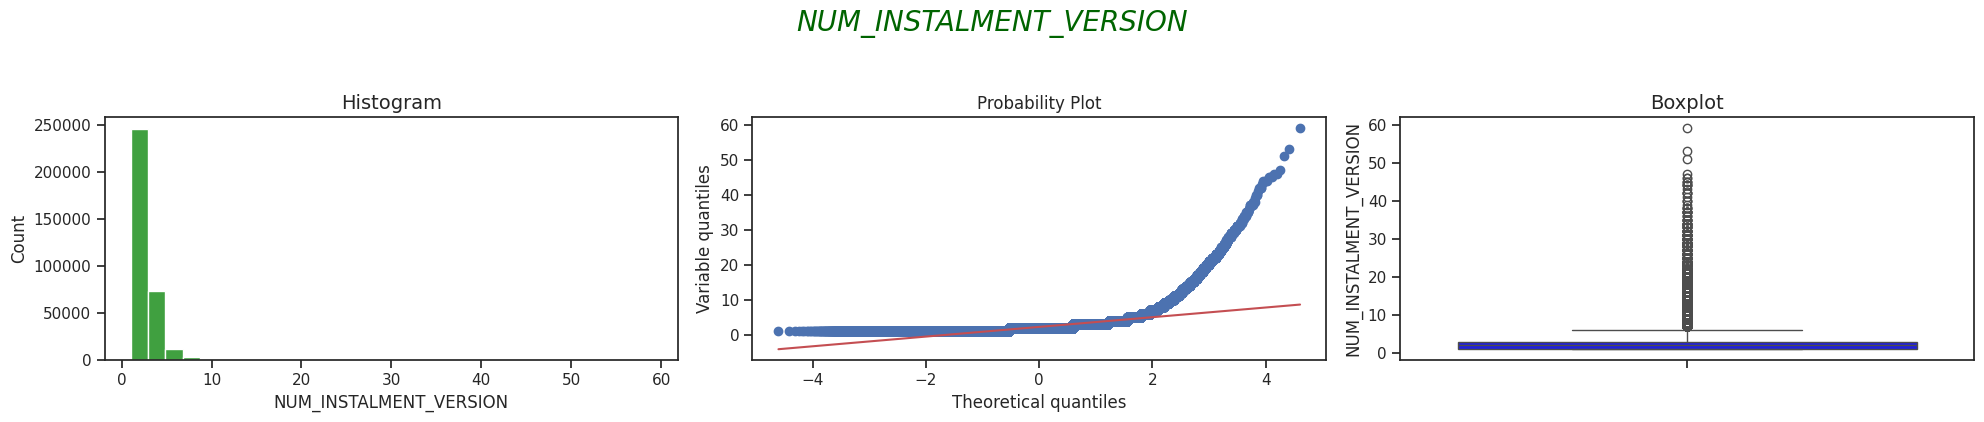

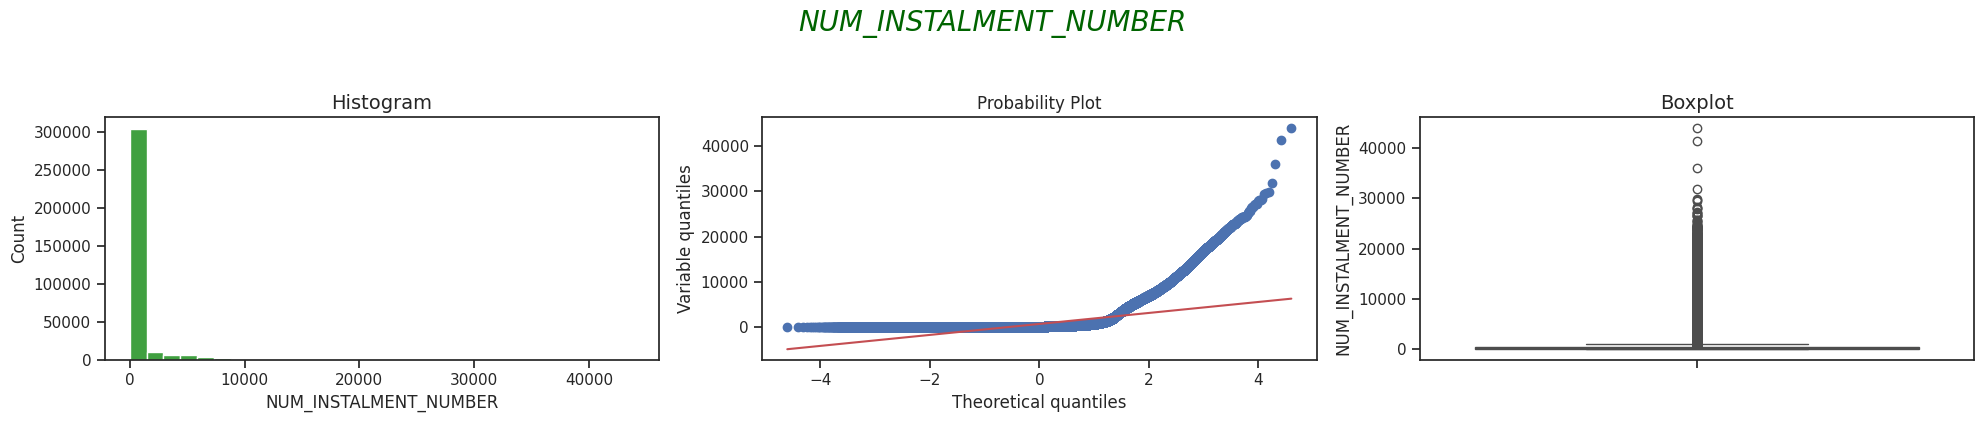

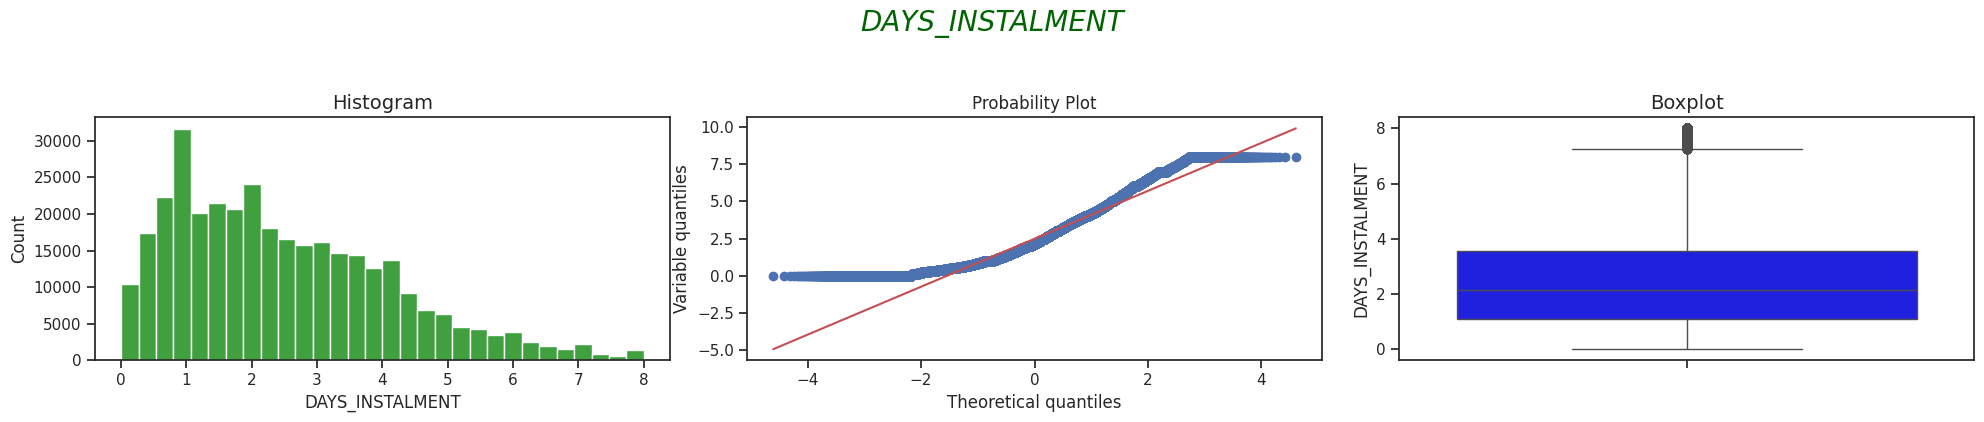

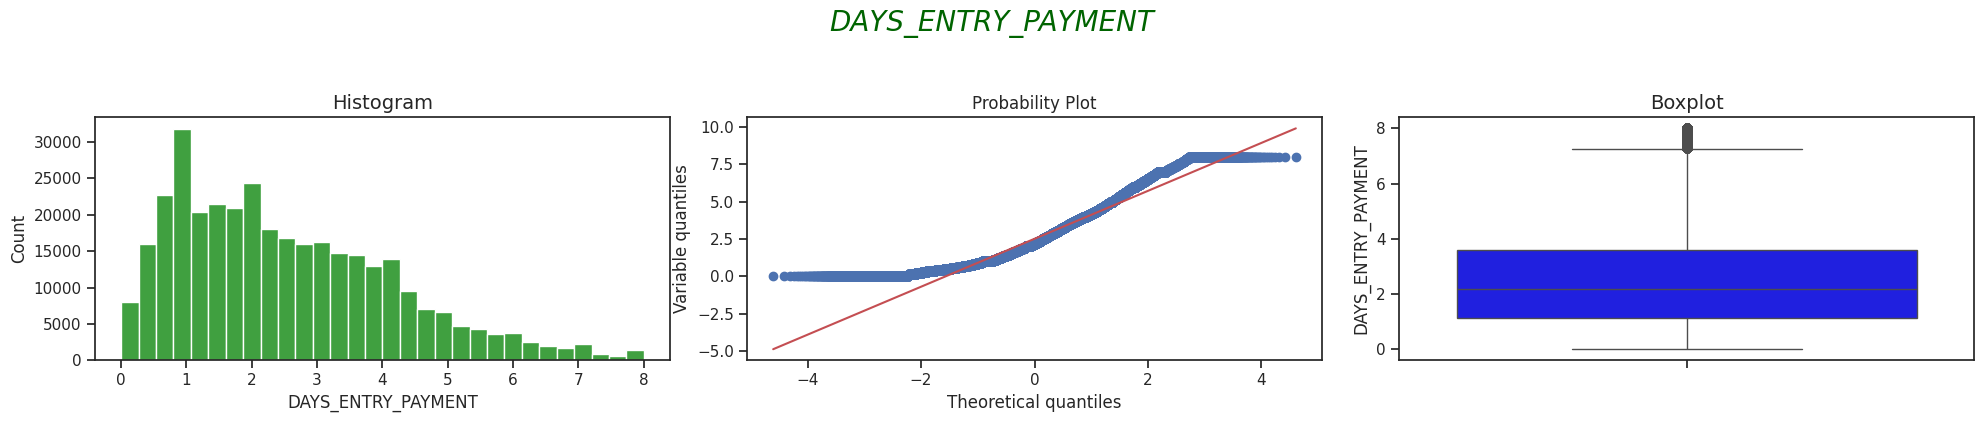

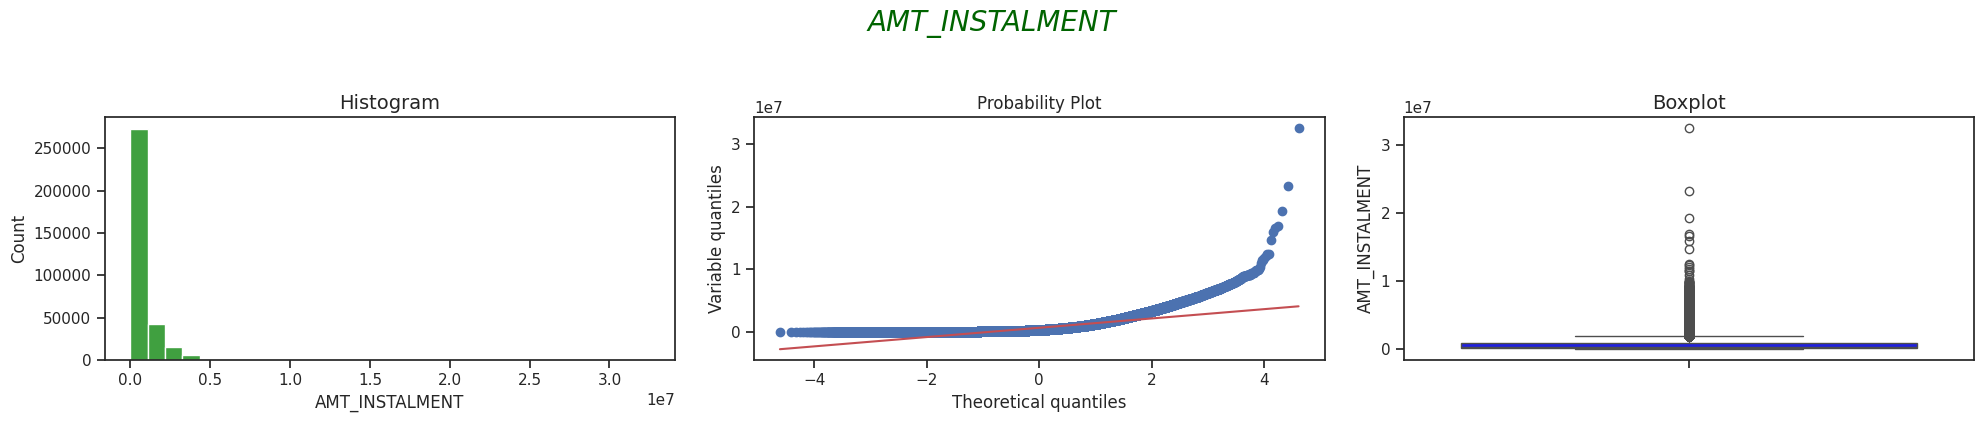

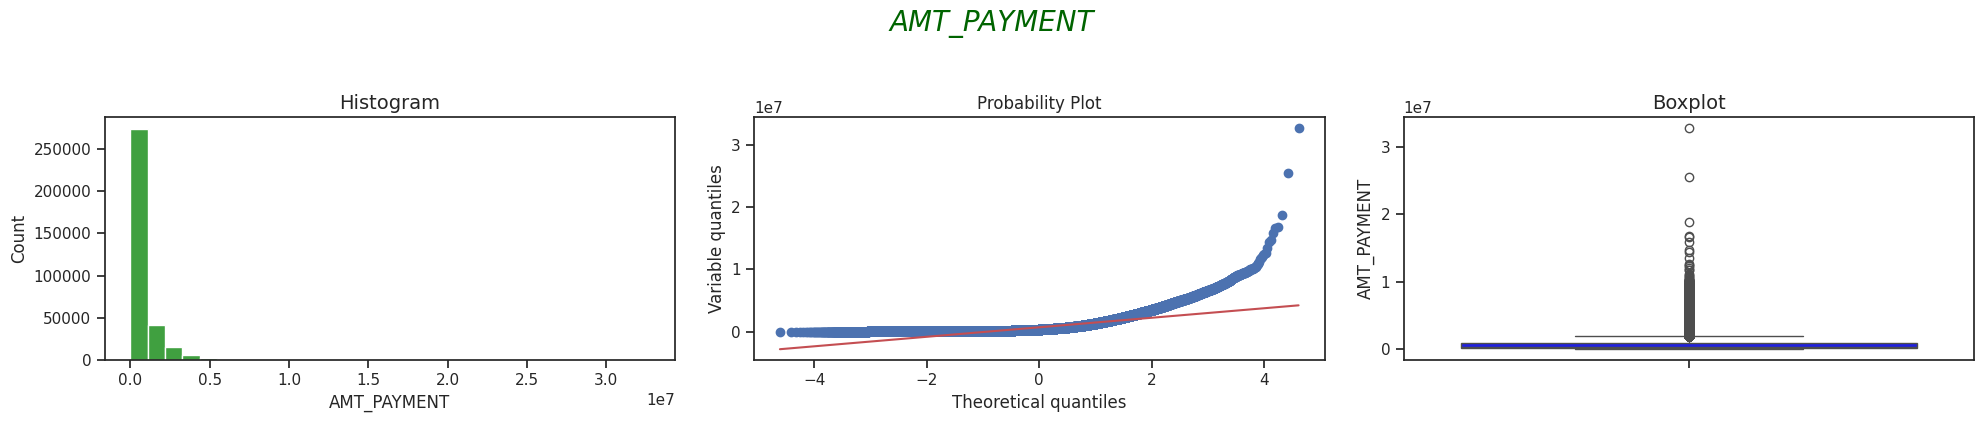

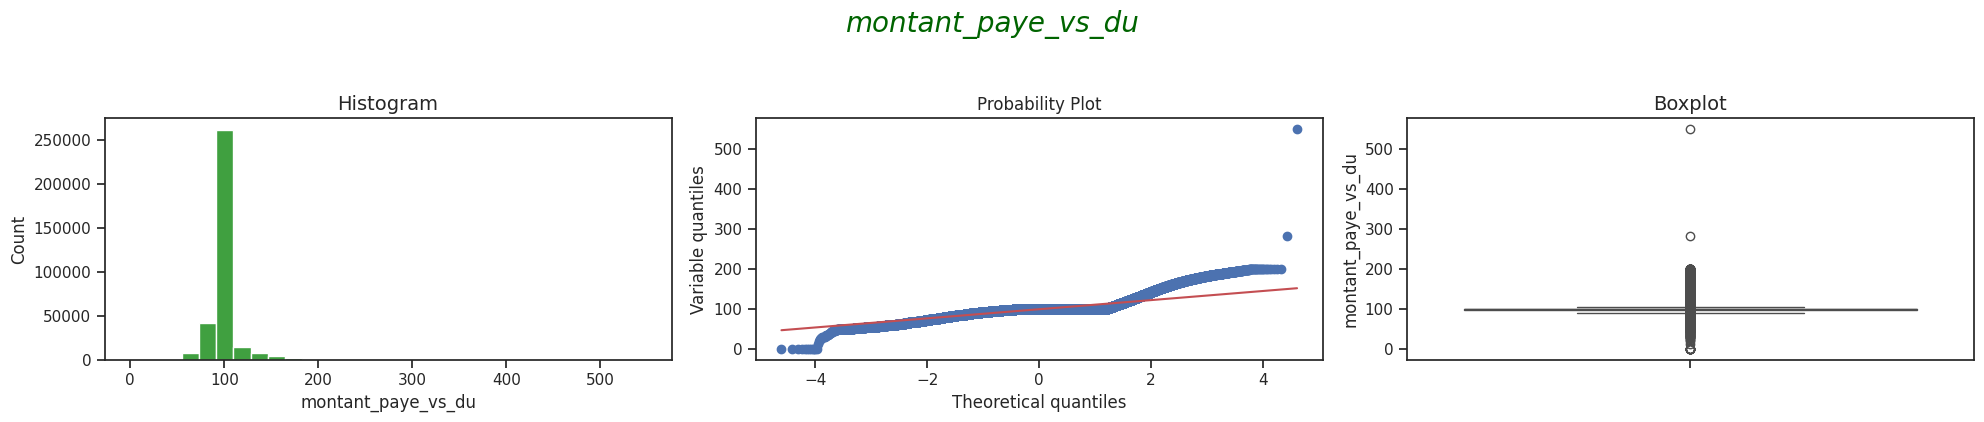

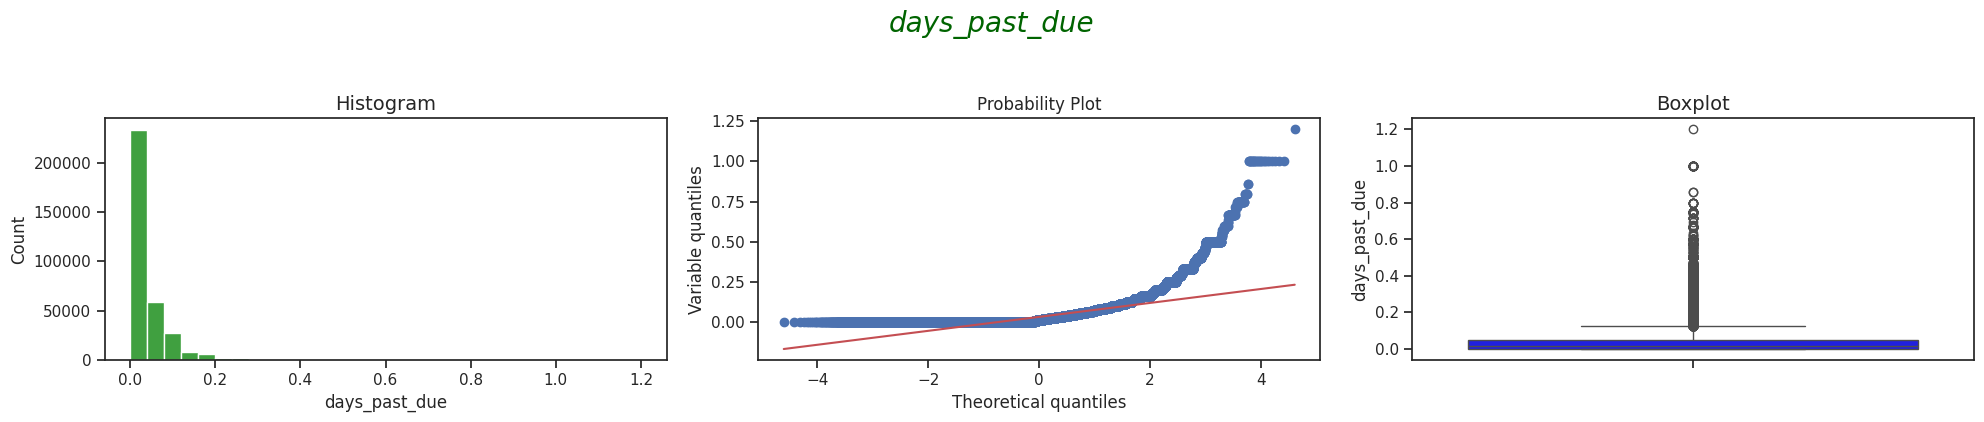

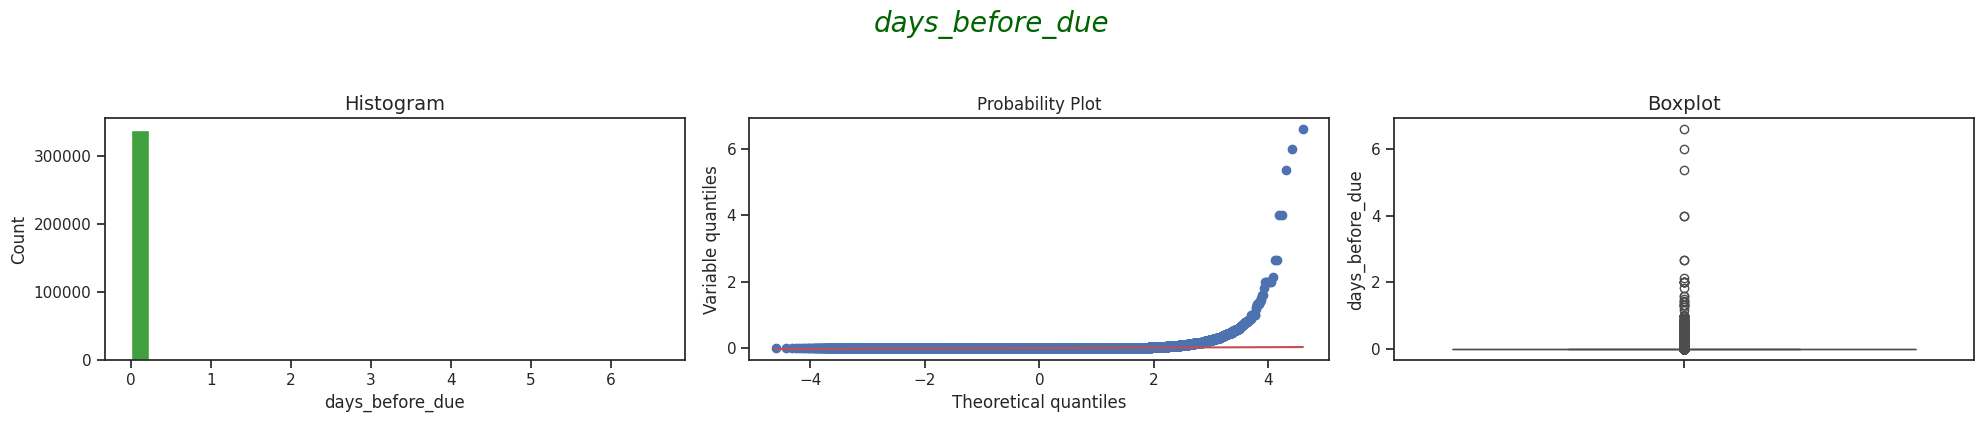

In [269]:
var_num = ['NUM_INSTALMENT_VERSION', 'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT',
           'DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT','AMT_PAYMENT', 'montant_paye_vs_du',
           'days_past_due', 'days_before_due']

for var in var_num:
    diagnostic_plots(ins_payments, var, f"{var}")

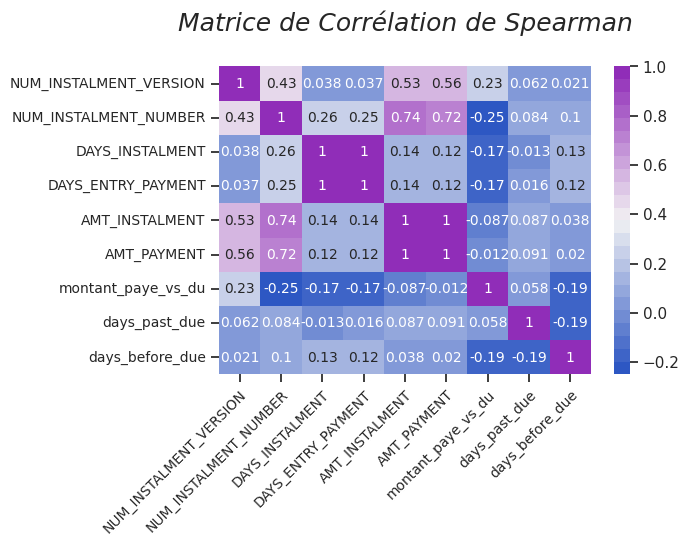

In [270]:
# Supposons que ins_payments soit votre DataFrame
# Chargez ou définissez correctement votre DataFrame ici avant de continuer

sns.set(style="ticks", rc={'figure.figsize': (6, 4)})
cmap = sns.diverging_palette(260, 290, s=85, l=40, n=24)  # Palette ton violet

df_analyse_num = ins_payments.drop(labels='SK_ID_CURR', axis=1).select_dtypes(include=[np.number])

# On centre et on réduit les colonnes
df_analyse_norm = (df_analyse_num - df_analyse_num.mean(axis=0)) / df_analyse_num.std(axis=0)

# On crée la matrice de corrélation
corr_df = df_analyse_norm.corr(method='spearman')

# Heatmap de la matrice de corrélation
ax = sns.heatmap(corr_df, cmap=cmap, annot=True, annot_kws={"size": 10})
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=10, rotation=45, ha='right', rotation_mode='anchor')
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=10, horizontalalignment='right')
plt.title("Matrice de Corrélation de Spearman\n", loc="center", fontsize=18, fontstyle='italic')
plt.show()


In [271]:
# Quelles sont les variables dont le coef de corrélation > 0.7
def high_correlation(mat_corr, corr_value = 0.7):
    for i in mat_corr.columns:
        cr = mat_corr.loc[i].loc[(mat_corr.loc[i] >= corr_value) | (mat_corr.loc[i] <= -corr_value)].drop(i)
        if len(cr) > 0:
            print(i)
            print("-------------------------------")
            print(cr.sort_values(ascending=False))
            print("\n")

In [272]:
ins_payments.drop(columns=['DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT'], axis=1, inplace=True)


In [273]:
ins_payments.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339587 entries, 0 to 339586
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   SK_ID_CURR              339587 non-null  int64  
 1   NUM_INSTALMENT_VERSION  339587 non-null  int64  
 2   NUM_INSTALMENT_NUMBER   339587 non-null  int64  
 3   AMT_PAYMENT             339587 non-null  float64
 4   montant_paye_vs_du      339587 non-null  float64
 5   days_past_due           339587 non-null  float64
 6   days_before_due         339587 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 18.1 MB


## Sauvegarde dans un dossier au cas ou pour faire les jointures


In [274]:
# Chemin pour sauvegarder le fichier CSV
#csv_path = '/content/drive/My Drive/Projets Master/Projet 7/bases_crash/ins_payments.csv'

# Sauvegarde du DataFrame dans un fichier CSV
#ins_payments.to_csv(csv_path, index=False)

#print(f"Le fichier a été sauvegardé avec succès à l'emplacement : {csv_path}")


# 8.. Consolidation des Données


**Objectif**
À cette étape, toutes les bases seront intégrées et alignées pour obtenir des datasets `X_train` et `X_test` nettoyés et prêts pour la modélisation.

**Étapes prévues**
- Fusion des features dérivées des différentes bases.
- Alignement des colonnes entre `X_train` et `X_test`.
- Vérifications finales avant exportation.

## On remet y_train

In [275]:
clean_X_train.shape

(307511, 24)

In [276]:
y_train.shape

(307511,)

In [278]:
# Remettre y_train dans clean_X_train

# Vérification de l'alignement des index entre clean_X_train et y_train
assert all(clean_X_train.index == y_train.index), "Les index ne correspondent pas entre clean_X_train et y_train"

# Ajouter la colonne TARGET à clean_X_train
clean_X_train['TARGET'] = y_train

# Vérification du résultat
print(clean_X_train.shape)
print(clean_X_train['TARGET'].head())
clean_X_train.info()


(307511, 25)
0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  307511 non-null  int64   
 1   NAME_CONTRACT_TYPE          307511 non-null  object  
 2   CODE_GENDER                 307511 non-null  object  
 3   FLAG_OWN_CAR                307511 non-null  object  
 4   FLAG_OWN_REALTY             307511 non-null  object  
 5   NAME_INCOME_TYPE            307511 non-null  object  
 6   NAME_EDUCATION_TYPE         307511 non-null  object  
 7   NAME_FAMILY_STATUS          307511 non-null  object  
 8   NAME_HOUSING_TYPE           307511 non-null  object  
 9   REGION_POPULATION_RELATIVE  307511 non-null  float64 
 10  FLAG_EMP_PHONE              307511 non-null  int64   
 11  FLAG_WORK_PHONE             307511 non-nul

## 8.a fusion x_test et train previous_application variables quanti

In [279]:
#Fusion avec clean_X_train

clean_X_train_join1 = clean_X_train.merge(prev_appli_1, how='left', on='SK_ID_CURR')
clean_X_train_join1.shape
#Fusion avec clean_X_test

clean_X_test_join1 = clean_X_test.merge(prev_appli_1, how='left', on='SK_ID_CURR')
clean_X_test_join1.shape

(48744, 28)

In [280]:
clean_X_train_join1.shape


(307511, 29)

In [281]:
clean_X_train_join1.isna().mean() *100


SK_ID_CURR                           0.00
NAME_CONTRACT_TYPE                   0.00
CODE_GENDER                          0.00
FLAG_OWN_CAR                         0.00
FLAG_OWN_REALTY                      0.00
NAME_INCOME_TYPE                     0.00
NAME_EDUCATION_TYPE                  0.00
NAME_FAMILY_STATUS                   0.00
NAME_HOUSING_TYPE                    0.00
REGION_POPULATION_RELATIVE           0.00
FLAG_EMP_PHONE                       0.00
FLAG_WORK_PHONE                      0.00
EXT_SOURCE_2                         0.00
FLAG_DOCUMENT_3                      0.00
FLAG_DOCUMENT_6                      0.00
FLAG_DOCUMENT_8                      0.00
nbr_enfants                          0.00
taille_famille                       0.00
anciennete_entreprise                0.00
age_client                           0.00
taux_endettement                     0.00
duree_remboursement                  0.00
total_revenus                        0.00
montant_credit                       0.00
TARGET                               0.00
nb_demande_pret_precedente           5.36
montant_demande_pret_precedente      5.36
heure_demande_pret_precedente        5.36
nb_year_depuis_decision_precedente   5.36
dtype: float64

In [282]:
clean_X_test_join1.isna().mean() *100


SK_ID_CURR                           0.00
NAME_CONTRACT_TYPE                   0.00
CODE_GENDER                          0.00
FLAG_OWN_CAR                         0.00
FLAG_OWN_REALTY                      0.00
NAME_INCOME_TYPE                     0.00
NAME_EDUCATION_TYPE                  0.00
NAME_FAMILY_STATUS                   0.00
NAME_HOUSING_TYPE                    0.00
REGION_POPULATION_RELATIVE           0.00
FLAG_EMP_PHONE                       0.00
FLAG_WORK_PHONE                      0.00
EXT_SOURCE_2                         0.00
FLAG_DOCUMENT_3                      0.00
FLAG_DOCUMENT_6                      0.00
FLAG_DOCUMENT_8                      0.00
nbr_enfants                          0.00
taille_famille                       0.00
anciennete_entreprise                0.00
age_client                           0.00
taux_endettement                     0.00
duree_remboursement                  0.00
total_revenus                        0.00
montant_credit                       0.00
nb_demande_pret_precedente           1.95
montant_demande_pret_precedente      1.95
heure_demande_pret_precedente        1.95
nb_year_depuis_decision_precedente   1.95
dtype: float64

In [283]:
var_num = ['nb_demande_pret_precedente', 'montant_demande_pret_precedente', 'heure_demande_pret_precedente', 'nb_year_depuis_decision_precedente']

for var in var_num:
    clean_X_train_join1[var].fillna(0, inplace=True)

In [284]:
var_num = ['nb_demande_pret_precedente', 'montant_demande_pret_precedente', 'heure_demande_pret_precedente', 'nb_year_depuis_decision_precedente']

for var in var_num:
    clean_X_test_join1[var].fillna(0, inplace=True)

In [285]:
clean_X_train_join1[var_num].isna().mean() *100


nb_demande_pret_precedente           0.00
montant_demande_pret_precedente      0.00
heure_demande_pret_precedente        0.00
nb_year_depuis_decision_precedente   0.00
dtype: float64

In [286]:
clean_X_test_join1[var_num].isna().mean() *100


nb_demande_pret_precedente           0.00
montant_demande_pret_precedente      0.00
heure_demande_pret_precedente        0.00
nb_year_depuis_decision_precedente   0.00
dtype: float64

## 8.b fusion x_test et train previous_application variables quali

In [287]:
#Fusion avec clean_X_train_join1

clean_X_train_join2 = clean_X_train_join1.merge(prev_appli_2, how='left', on='SK_ID_CURR')
clean_X_train_join2.shape
#Fusion avec clean_X_test_join1

clean_X_test_join2 = clean_X_test_join1.merge(prev_appli_2, how='left', on='SK_ID_CURR')
clean_X_test_join2.shape

(48744, 33)

In [294]:
liste_var = prev_appli_2.drop(labels='SK_ID_CURR', axis=1).columns.to_list()
print(liste_var)

['prev_contrat_statut_Canceled', 'prev_contrat_statut_Refused', 'prev_contrat_statut_Unused offer', 'prev_contrat_type_consumer_loans', 'prev_contrat_type_revolving_loans']


In [295]:
clean_X_train_join2[liste_var].isna().mean() *100


prev_contrat_statut_Canceled        5.35
prev_contrat_statut_Refused         5.35
prev_contrat_statut_Unused offer    5.35
prev_contrat_type_consumer_loans    5.35
prev_contrat_type_revolving_loans   5.35
dtype: float64

In [296]:
clean_X_test_join2[liste_var].isna().mean() *100


prev_contrat_statut_Canceled        1.94
prev_contrat_statut_Refused         1.94
prev_contrat_statut_Unused offer    1.94
prev_contrat_type_consumer_loans    1.94
prev_contrat_type_revolving_loans   1.94
dtype: float64

In [298]:
for var in liste_var:
    clean_X_train_join2[var].fillna(0, inplace=True)

In [299]:
for var in liste_var:
    clean_X_test_join2[var].fillna(0, inplace=True)

clean_X_test_join2[liste_var].isna().mean() *100

prev_contrat_statut_Canceled        0.00
prev_contrat_statut_Refused         0.00
prev_contrat_statut_Unused offer    0.00
prev_contrat_type_consumer_loans    0.00
prev_contrat_type_revolving_loans   0.00
dtype: float64

In [300]:
clean_X_train_join2[liste_var].isna().mean() *100


prev_contrat_statut_Canceled        0.00
prev_contrat_statut_Refused         0.00
prev_contrat_statut_Unused offer    0.00
prev_contrat_type_consumer_loans    0.00
prev_contrat_type_revolving_loans   0.00
dtype: float64

In [301]:
clean_X_test_join2[liste_var].isna().mean() *100


prev_contrat_statut_Canceled        0.00
prev_contrat_statut_Refused         0.00
prev_contrat_statut_Unused offer    0.00
prev_contrat_type_consumer_loans    0.00
prev_contrat_type_revolving_loans   0.00
dtype: float64

In [302]:
clean_X_train_join2.shape, clean_X_test_join2.shape


((307511, 34), (48744, 33))

## 8.f fusion x_test et train avec historique de remboursement


In [303]:
#Fusion avec clean_X_train_join2

clean_X_train_join3 = clean_X_train_join2.merge(ins_payments, how='left', on='SK_ID_CURR')
clean_X_train_join3.shape

#Fusion avec clean_X_test_join2

clean_X_test_join3 = clean_X_test_join2.merge(ins_payments, how='left', on='SK_ID_CURR')
clean_X_test_join3.shape

(48744, 39)

In [304]:
liste_var = ins_payments.drop(columns=['SK_ID_CURR'], axis=1).columns.to_list()
print(liste_var)

['NUM_INSTALMENT_VERSION', 'NUM_INSTALMENT_NUMBER', 'AMT_PAYMENT', 'montant_paye_vs_du', 'days_past_due', 'days_before_due']


In [305]:
clean_X_train_join3[liste_var].isna().mean() *100

NUM_INSTALMENT_VERSION   5.16
NUM_INSTALMENT_NUMBER    5.16
AMT_PAYMENT              5.16
montant_paye_vs_du       5.16
days_past_due            5.16
days_before_due          5.16
dtype: float64

In [306]:
clean_X_test_join3[liste_var].isna().mean() *100


NUM_INSTALMENT_VERSION   1.64
NUM_INSTALMENT_NUMBER    1.64
AMT_PAYMENT              1.64
montant_paye_vs_du       1.64
days_past_due            1.64
days_before_due          1.64
dtype: float64

In [307]:
for var in liste_var:
    clean_X_train_join3[var].fillna(0, inplace=True)

In [308]:
for var in liste_var:
    clean_X_test_join3[var].fillna(0, inplace=True)

clean_X_test_join3[liste_var].isna().mean() *100

NUM_INSTALMENT_VERSION   0.00
NUM_INSTALMENT_NUMBER    0.00
AMT_PAYMENT              0.00
montant_paye_vs_du       0.00
days_past_due            0.00
days_before_due          0.00
dtype: float64

In [309]:
clean_X_train_join3[liste_var].isna().mean() *100


NUM_INSTALMENT_VERSION   0.00
NUM_INSTALMENT_NUMBER    0.00
AMT_PAYMENT              0.00
montant_paye_vs_du       0.00
days_past_due            0.00
days_before_due          0.00
dtype: float64

In [310]:
clean_X_test_join3[liste_var].isna().mean() *100

NUM_INSTALMENT_VERSION   0.00
NUM_INSTALMENT_NUMBER    0.00
AMT_PAYMENT              0.00
montant_paye_vs_du       0.00
days_past_due            0.00
days_before_due          0.00
dtype: float64

In [311]:
clean_X_train_join3.shape, clean_X_test_join3.shape


((307511, 40), (48744, 39))

## 8.c fusion x_test et train avec bureau



In [312]:
#Fusion avec clean_X_train_join3

clean_X_train_join4 = clean_X_train_join3.merge(client_bureau, how='left', on='SK_ID_CURR')
clean_X_train_join4.shape



(307511, 48)

In [313]:
clean_X_train_join4.isna().mean()*100


SK_ID_CURR                                            0.00
NAME_CONTRACT_TYPE                                    0.00
CODE_GENDER                                           0.00
FLAG_OWN_CAR                                          0.00
FLAG_OWN_REALTY                                       0.00
NAME_INCOME_TYPE                                      0.00
NAME_EDUCATION_TYPE                                   0.00
NAME_FAMILY_STATUS                                    0.00
NAME_HOUSING_TYPE                                     0.00
REGION_POPULATION_RELATIVE                            0.00
FLAG_EMP_PHONE                                        0.00
FLAG_WORK_PHONE                                       0.00
EXT_SOURCE_2                                          0.00
FLAG_DOCUMENT_3                                       0.00
FLAG_DOCUMENT_6                                       0.00
FLAG_DOCUMENT_8                                       0.00
nbr_enfants                                           0.00
taille_famille                                        0.00
anciennete_entreprise                                 0.00
age_client                                            0.00
taux_endettement                                      0.00
duree_remboursement                                   0.00
total_revenus                                         0.00
montant_credit                                        0.00
TARGET                                                0.00
nb_demande_pret_precedente                            0.00
montant_demande_pret_precedente                       0.00
heure_demande_pret_precedente                         0.00
nb_year_depuis_decision_precedente                    0.00
prev_contrat_statut_Canceled                          0.00
prev_contrat_statut_Refused                           0.00
prev_contrat_statut_Unused offer                      0.00
prev_contrat_type_consumer_loans                      0.00
prev_contrat_type_revolving_loans                     0.00
NUM_INSTALMENT_VERSION                                0.00
NUM_INSTALMENT_NUMBER                                 0.00
AMT_PAYMENT                                           0.00
montant_paye_vs_du                                    0.00
days_past_due                                         0.00
days_before_due                                       0.00
DAYS_CREDIT                                          14.31
AMT_CREDIT_SUM                                       14.31
bureau_credit_actif_Closed                           14.31
bureau_credit_actif_Sold_bad_debt                    14.31
bureau_credit_type_Credit_card                       14.31
bureau_credit_type_Other_credit                      14.31
solde_credit_bureau_statut_actif_avec_jours_retard   14.31
solde_credit_bureau_statut_closed                    14.31
dtype: float64

In [314]:
liste_var3 = ['DAYS_CREDIT',
              'AMT_CREDIT_SUM',
              'bureau_credit_actif_Closed',
              'bureau_credit_actif_Sold_bad_debt',
              'bureau_credit_type_Credit_card',
              'bureau_credit_type_Other_credit',
              'solde_credit_bureau_statut_actif_avec_jours_retard',
              'solde_credit_bureau_statut_closed']

In [315]:
for var in liste_var3:
    clean_X_train_join4[var].fillna(0, inplace=True)

In [316]:
clean_X_train_join4.drop(labels=['SK_ID_CURR'], axis=1).select_dtypes(include=[np.number]).columns.to_list()


['REGION_POPULATION_RELATIVE',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'EXT_SOURCE_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_8',
 'TARGET',
 'nb_demande_pret_precedente',
 'montant_demande_pret_precedente',
 'heure_demande_pret_precedente',
 'nb_year_depuis_decision_precedente',
 'prev_contrat_statut_Canceled',
 'prev_contrat_statut_Refused',
 'prev_contrat_statut_Unused offer',
 'prev_contrat_type_consumer_loans',
 'prev_contrat_type_revolving_loans',
 'NUM_INSTALMENT_VERSION',
 'NUM_INSTALMENT_NUMBER',
 'AMT_PAYMENT',
 'montant_paye_vs_du',
 'days_past_due',
 'days_before_due',
 'DAYS_CREDIT',
 'AMT_CREDIT_SUM',
 'bureau_credit_actif_Closed',
 'bureau_credit_actif_Sold_bad_debt',
 'bureau_credit_type_Credit_card',
 'bureau_credit_type_Other_credit',
 'solde_credit_bureau_statut_actif_avec_jours_retard',
 'solde_credit_bureau_statut_closed']

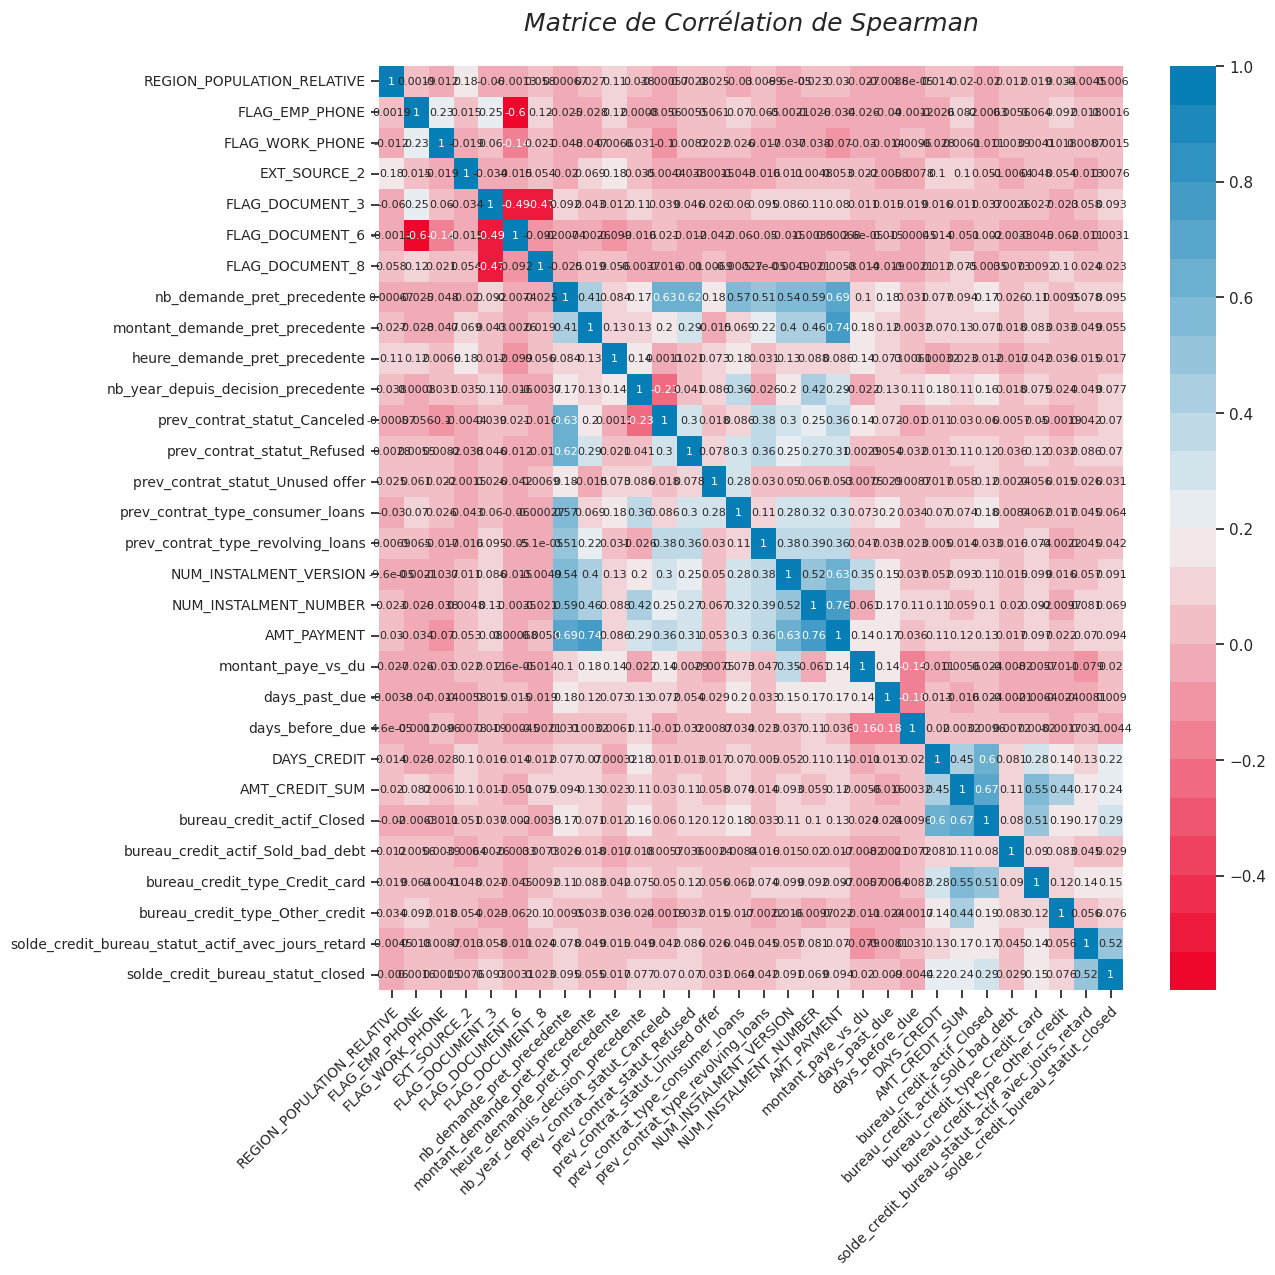

In [317]:
# Configuration de la palette rouge
sns.set(style="ticks", rc={'figure.figsize': (12, 12)})
cmap = sns.diverging_palette(10, 240, s=99, l=50, n=24)  # Palette tons de rouge

# Sélection des colonnes numériques
df_analyse_num = clean_X_train_join4.drop(labels=['SK_ID_CURR','TARGET'], axis=1).select_dtypes(include=[np.number])

# On centre et on réduit les colonnes
df_analyse_norm = (df_analyse_num - df_analyse_num.mean(axis=0)) / df_analyse_num.std(axis=0)

# On crée la matrice de corrélation
corr_df = df_analyse_norm.corr(method='spearman')

# Heatmap de la matrice de corrélation
ax = sns.heatmap(corr_df, cmap=cmap, annot=True, annot_kws={"size": 8})
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=10, rotation=45, ha='right', rotation_mode='anchor')
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=10, horizontalalignment='right')
plt.title("Matrice de Corrélation de Spearman\n", loc="center", fontsize=18, fontstyle='italic')
plt.show()


In [318]:
high_correlation(corr_df, corr_value = 0.7)

montant_demande_pret_precedente
-------------------------------
AMT_PAYMENT   0.74
Name: montant_demande_pret_precedente, dtype: float64


NUM_INSTALMENT_NUMBER
-------------------------------
AMT_PAYMENT   0.76
Name: NUM_INSTALMENT_NUMBER, dtype: float64


AMT_PAYMENT
-------------------------------
NUM_INSTALMENT_NUMBER             0.76
montant_demande_pret_precedente   0.74
Name: AMT_PAYMENT, dtype: float64




In [319]:
# Suppression des variables très liées entre elles

vars_to_drop2 = ['AMT_PAYMENT']

clean_X_train_join4.drop(labels=vars_to_drop2, axis=1, inplace=True)

clean_X_train_join4.shape

(307511, 47)

In [320]:
#Fusion avec clean_X_test_join3

clean_X_test_join4 = clean_X_test_join3.merge(client_bureau, how='left', on='SK_ID_CURR')
clean_X_test_join4.shape

(48744, 47)

In [321]:
clean_X_test_join4.isna().mean()*100


SK_ID_CURR                                            0.00
NAME_CONTRACT_TYPE                                    0.00
CODE_GENDER                                           0.00
FLAG_OWN_CAR                                          0.00
FLAG_OWN_REALTY                                       0.00
NAME_INCOME_TYPE                                      0.00
NAME_EDUCATION_TYPE                                   0.00
NAME_FAMILY_STATUS                                    0.00
NAME_HOUSING_TYPE                                     0.00
REGION_POPULATION_RELATIVE                            0.00
FLAG_EMP_PHONE                                        0.00
FLAG_WORK_PHONE                                       0.00
EXT_SOURCE_2                                          0.00
FLAG_DOCUMENT_3                                       0.00
FLAG_DOCUMENT_6                                       0.00
FLAG_DOCUMENT_8                                       0.00
nbr_enfants                                           0.00
taille_famille                                        0.00
anciennete_entreprise                                 0.00
age_client                                            0.00
taux_endettement                                      0.00
duree_remboursement                                   0.00
total_revenus                                         0.00
montant_credit                                        0.00
nb_demande_pret_precedente                            0.00
montant_demande_pret_precedente                       0.00
heure_demande_pret_precedente                         0.00
nb_year_depuis_decision_precedente                    0.00
prev_contrat_statut_Canceled                          0.00
prev_contrat_statut_Refused                           0.00
prev_contrat_statut_Unused offer                      0.00
prev_contrat_type_consumer_loans                      0.00
prev_contrat_type_revolving_loans                     0.00
NUM_INSTALMENT_VERSION                                0.00
NUM_INSTALMENT_NUMBER                                 0.00
AMT_PAYMENT                                           0.00
montant_paye_vs_du                                    0.00
days_past_due                                         0.00
days_before_due                                       0.00
DAYS_CREDIT                                          13.18
AMT_CREDIT_SUM                                       13.18
bureau_credit_actif_Closed                           13.18
bureau_credit_actif_Sold_bad_debt                    13.18
bureau_credit_type_Credit_card                       13.18
bureau_credit_type_Other_credit                      13.18
solde_credit_bureau_statut_actif_avec_jours_retard   13.18
solde_credit_bureau_statut_closed                    13.18
dtype: float64

In [322]:
for var in liste_var3:
    clean_X_test_join4[var].fillna(0, inplace=True)

In [323]:
# Suppression des variables très liées entre elles

vars_to_drop2 = ['AMT_PAYMENT']

clean_X_test_join4.drop(labels=vars_to_drop2, axis=1, inplace=True)

clean_X_test_join4.shape

(48744, 46)

In [324]:
clean_X_train_join4.shape, clean_X_test_join4.shape


((307511, 47), (48744, 46))

## 8.e fusion x_test et train avec pos_cash_balance


In [325]:
#Fusion avec clean_X_train_join4

clean_X_train_join5 = clean_X_train_join4.merge(client_pos_cash, how='left', on='SK_ID_CURR')
clean_X_train_join5.shape

(307511, 51)

In [326]:
clean_X_train_join5.isna().mean()*100


SK_ID_CURR                                           0.00
NAME_CONTRACT_TYPE                                   0.00
CODE_GENDER                                          0.00
FLAG_OWN_CAR                                         0.00
FLAG_OWN_REALTY                                      0.00
NAME_INCOME_TYPE                                     0.00
NAME_EDUCATION_TYPE                                  0.00
NAME_FAMILY_STATUS                                   0.00
NAME_HOUSING_TYPE                                    0.00
REGION_POPULATION_RELATIVE                           0.00
FLAG_EMP_PHONE                                       0.00
FLAG_WORK_PHONE                                      0.00
EXT_SOURCE_2                                         0.00
FLAG_DOCUMENT_3                                      0.00
FLAG_DOCUMENT_6                                      0.00
FLAG_DOCUMENT_8                                      0.00
nbr_enfants                                          0.00
taille_famille                                       0.00
anciennete_entreprise                                0.00
age_client                                           0.00
taux_endettement                                     0.00
duree_remboursement                                  0.00
total_revenus                                        0.00
montant_credit                                       0.00
TARGET                                               0.00
nb_demande_pret_precedente                           0.00
montant_demande_pret_precedente                      0.00
heure_demande_pret_precedente                        0.00
nb_year_depuis_decision_precedente                   0.00
prev_contrat_statut_Canceled                         0.00
prev_contrat_statut_Refused                          0.00
prev_contrat_statut_Unused offer                     0.00
prev_contrat_type_consumer_loans                     0.00
prev_contrat_type_revolving_loans                    0.00
NUM_INSTALMENT_VERSION                               0.00
NUM_INSTALMENT_NUMBER                                0.00
montant_paye_vs_du                                   0.00
days_past_due                                        0.00
days_before_due                                      0.00
DAYS_CREDIT                                          0.00
AMT_CREDIT_SUM                                       0.00
bureau_credit_actif_Closed                           0.00
bureau_credit_actif_Sold_bad_debt                    0.00
bureau_credit_type_Credit_card                       0.00
bureau_credit_type_Other_credit                      0.00
solde_credit_bureau_statut_actif_avec_jours_retard   0.00
solde_credit_bureau_statut_closed                    0.00
SK_ID_PREV                                           5.88
MONTHS_BALANCE                                       5.88
CNT_INSTALMENT                                       5.88
CNT_INSTALMENT_FUTURE                                5.88
dtype: float64

In [327]:
liste_var4 = ['SK_ID_PREV', 'MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE']

for var in liste_var4:
    clean_X_train_join5[var].fillna(0, inplace=True)

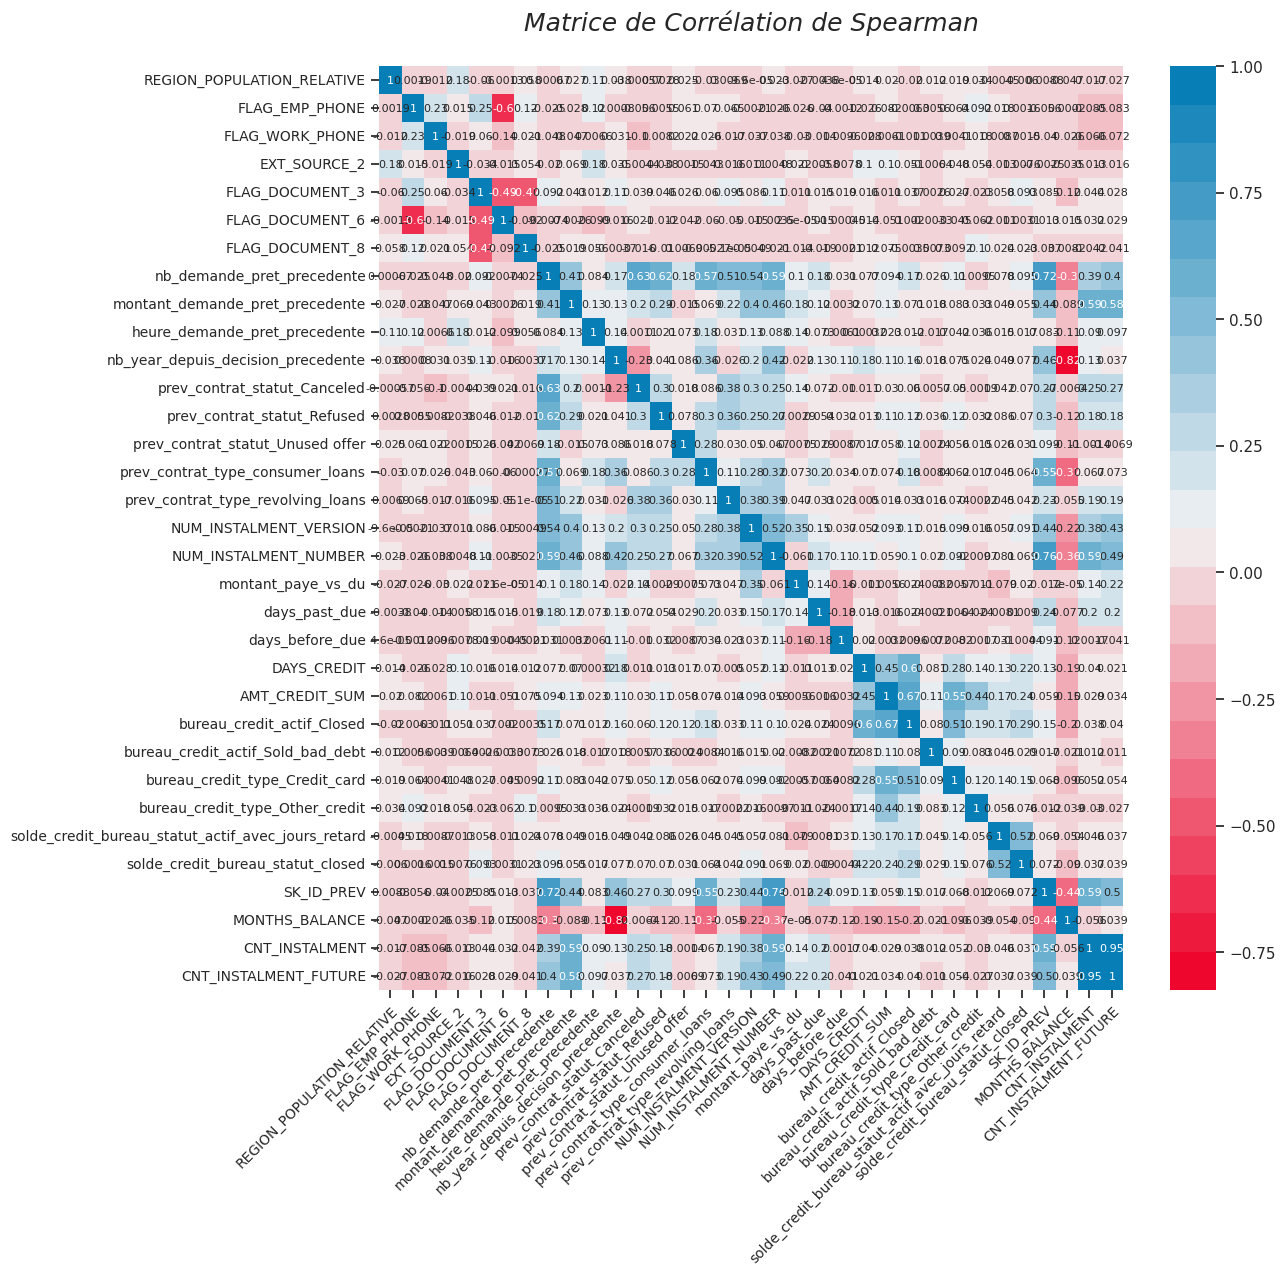

In [328]:
# Configuration de la palette rouge
sns.set(style="ticks", rc={'figure.figsize': (12, 12)})
cmap = sns.diverging_palette(10, 240, s=99, l=50, n=24)  # Palette tons de rouge

# Assurez-vous que le DataFrame clean_X_train_join5 est défini
# Exemple : clean_X_train_join5 = pd.read_csv("chemin_vers_fichier.csv")

df_analyse_num = clean_X_train_join5.drop(labels=['SK_ID_CURR','TARGET'], axis=1).select_dtypes(include=[np.number])

# On centre et on réduit les colonnes
df_analyse_norm = (df_analyse_num - df_analyse_num.mean(axis=0)) / df_analyse_num.std(axis=0)

# On crée la matrice de corrélation
corr_df = df_analyse_norm.corr(method='spearman')

# Heatmap de la matrice de corrélation
ax = sns.heatmap(corr_df, cmap=cmap, annot=True, annot_kws={"size": 8})
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=10, rotation=45, ha='right', rotation_mode='anchor')
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=10, horizontalalignment='right')
plt.title("Matrice de Corrélation de Spearman\n", loc="center", fontsize=18, fontstyle='italic')
plt.show()


In [329]:
high_correlation(corr_df, corr_value = 0.7)

nb_demande_pret_precedente
-------------------------------
SK_ID_PREV   0.72
Name: nb_demande_pret_precedente, dtype: float64


nb_year_depuis_decision_precedente
-------------------------------
MONTHS_BALANCE   -0.82
Name: nb_year_depuis_decision_precedente, dtype: float64


NUM_INSTALMENT_NUMBER
-------------------------------
SK_ID_PREV   0.76
Name: NUM_INSTALMENT_NUMBER, dtype: float64


SK_ID_PREV
-------------------------------
NUM_INSTALMENT_NUMBER        0.76
nb_demande_pret_precedente   0.72
Name: SK_ID_PREV, dtype: float64


MONTHS_BALANCE
-------------------------------
nb_year_depuis_decision_precedente   -0.82
Name: MONTHS_BALANCE, dtype: float64


CNT_INSTALMENT
-------------------------------
CNT_INSTALMENT_FUTURE   0.95
Name: CNT_INSTALMENT, dtype: float64


CNT_INSTALMENT_FUTURE
-------------------------------
CNT_INSTALMENT   0.95
Name: CNT_INSTALMENT_FUTURE, dtype: float64




In [330]:
# Suppression des variables très liées entre elles

vars_to_drop3 = ['CNT_INSTALMENT_FUTURE', 'MONTHS_BALANCE', 'SK_ID_PREV']

clean_X_train_join5.drop(labels=vars_to_drop3, axis=1, inplace=True)

clean_X_train_join5.shape

(307511, 48)

In [331]:
#Fusion avec clean_X_test_join4

clean_X_test_join5 = clean_X_test_join4.merge(client_pos_cash, how='left', on='SK_ID_CURR')
clean_X_test_join5.shape

(48744, 50)

In [332]:
liste_var4 = ['SK_ID_PREV', 'MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE']

for var in liste_var4:
    clean_X_test_join5[var].fillna(0, inplace=True)

In [333]:
# Suppression des variables très liées entre elles

vars_to_drop3 = ['CNT_INSTALMENT_FUTURE', 'MONTHS_BALANCE', 'SK_ID_PREV']

clean_X_test_join5.drop(labels=vars_to_drop3, axis=1, inplace=True)

clean_X_test_join5.shape

(48744, 47)

In [334]:
clean_X_train_join5.shape, clean_X_test_join5.shape


((307511, 48), (48744, 47))

## 8.d fusion x_test et train avec credit_card_balance


In [335]:
#Fusion avec clean_X_train_join5

clean_X_train_join6 = clean_X_train_join5.merge(client_credit_card, how='left', on='SK_ID_CURR')
clean_X_train_join6.shape

(307511, 53)

In [336]:
clean_X_train_join6.isna().mean()*100


SK_ID_CURR                                            0.00
NAME_CONTRACT_TYPE                                    0.00
CODE_GENDER                                           0.00
FLAG_OWN_CAR                                          0.00
FLAG_OWN_REALTY                                       0.00
NAME_INCOME_TYPE                                      0.00
NAME_EDUCATION_TYPE                                   0.00
NAME_FAMILY_STATUS                                    0.00
NAME_HOUSING_TYPE                                     0.00
REGION_POPULATION_RELATIVE                            0.00
FLAG_EMP_PHONE                                        0.00
FLAG_WORK_PHONE                                       0.00
EXT_SOURCE_2                                          0.00
FLAG_DOCUMENT_3                                       0.00
FLAG_DOCUMENT_6                                       0.00
FLAG_DOCUMENT_8                                       0.00
nbr_enfants                                           0.00
taille_famille                                        0.00
anciennete_entreprise                                 0.00
age_client                                            0.00
taux_endettement                                      0.00
duree_remboursement                                   0.00
total_revenus                                         0.00
montant_credit                                        0.00
TARGET                                                0.00
nb_demande_pret_precedente                            0.00
montant_demande_pret_precedente                       0.00
heure_demande_pret_precedente                         0.00
nb_year_depuis_decision_precedente                    0.00
prev_contrat_statut_Canceled                          0.00
prev_contrat_statut_Refused                           0.00
prev_contrat_statut_Unused offer                      0.00
prev_contrat_type_consumer_loans                      0.00
prev_contrat_type_revolving_loans                     0.00
NUM_INSTALMENT_VERSION                                0.00
NUM_INSTALMENT_NUMBER                                 0.00
montant_paye_vs_du                                    0.00
days_past_due                                         0.00
days_before_due                                       0.00
DAYS_CREDIT                                           0.00
AMT_CREDIT_SUM                                        0.00
bureau_credit_actif_Closed                            0.00
bureau_credit_actif_Sold_bad_debt                     0.00
bureau_credit_type_Credit_card                        0.00
bureau_credit_type_Other_credit                       0.00
solde_credit_bureau_statut_actif_avec_jours_retard    0.00
solde_credit_bureau_statut_closed                     0.00
CNT_INSTALMENT                                        0.00
SK_ID_PREV                                           71.74
MONTHS_BALANCE                                       71.74
AMT_BALANCE                                          71.74
AMT_CREDIT_LIMIT_ACTUAL                              71.74
AMT_DRAWINGS_CURRENT                                 71.74
dtype: float64

In [337]:
#Fusion avec clean_X_test_join5

clean_X_test_join6 = clean_X_test_join5.merge(client_credit_card, how='left', on='SK_ID_CURR')
clean_X_test_join6.shape

(48744, 52)

In [338]:
clean_X_test_join6.isna().mean()*100


SK_ID_CURR                                            0.00
NAME_CONTRACT_TYPE                                    0.00
CODE_GENDER                                           0.00
FLAG_OWN_CAR                                          0.00
FLAG_OWN_REALTY                                       0.00
NAME_INCOME_TYPE                                      0.00
NAME_EDUCATION_TYPE                                   0.00
NAME_FAMILY_STATUS                                    0.00
NAME_HOUSING_TYPE                                     0.00
REGION_POPULATION_RELATIVE                            0.00
FLAG_EMP_PHONE                                        0.00
FLAG_WORK_PHONE                                       0.00
EXT_SOURCE_2                                          0.00
FLAG_DOCUMENT_3                                       0.00
FLAG_DOCUMENT_6                                       0.00
FLAG_DOCUMENT_8                                       0.00
nbr_enfants                                           0.00
taille_famille                                        0.00
anciennete_entreprise                                 0.00
age_client                                            0.00
taux_endettement                                      0.00
duree_remboursement                                   0.00
total_revenus                                         0.00
montant_credit                                        0.00
nb_demande_pret_precedente                            0.00
montant_demande_pret_precedente                       0.00
heure_demande_pret_precedente                         0.00
nb_year_depuis_decision_precedente                    0.00
prev_contrat_statut_Canceled                          0.00
prev_contrat_statut_Refused                           0.00
prev_contrat_statut_Unused offer                      0.00
prev_contrat_type_consumer_loans                      0.00
prev_contrat_type_revolving_loans                     0.00
NUM_INSTALMENT_VERSION                                0.00
NUM_INSTALMENT_NUMBER                                 0.00
montant_paye_vs_du                                    0.00
days_past_due                                         0.00
days_before_due                                       0.00
DAYS_CREDIT                                           0.00
AMT_CREDIT_SUM                                        0.00
bureau_credit_actif_Closed                            0.00
bureau_credit_actif_Sold_bad_debt                     0.00
bureau_credit_type_Credit_card                        0.00
bureau_credit_type_Other_credit                       0.00
solde_credit_bureau_statut_actif_avec_jours_retard    0.00
solde_credit_bureau_statut_closed                     0.00
CNT_INSTALMENT                                        0.00
SK_ID_PREV                                           65.84
MONTHS_BALANCE                                       65.84
AMT_BALANCE                                          65.84
AMT_CREDIT_LIMIT_ACTUAL                              65.84
AMT_DRAWINGS_CURRENT                                 65.84
dtype: float64

In [339]:
# Suppression des variables très liées entre elles

vars_to_drop4 = ['AMT_DRAWINGS_CURRENT', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_BALANCE','MONTHS_BALANCE','SK_ID_PREV']

clean_X_test_join6.drop(labels=vars_to_drop4, axis=1, inplace=True)

clean_X_test_join6.shape

(48744, 47)

In [340]:
# Suppression des variables très liées entre elles

vars_to_drop4 = ['AMT_DRAWINGS_CURRENT', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_BALANCE','MONTHS_BALANCE','SK_ID_PREV']

clean_X_train_join6.drop(labels=vars_to_drop4, axis=1, inplace=True)

clean_X_train_join6.shape

(307511, 48)

## Sauvegarde fichier dans base intermediaire et conclusion de l'analyse exploratoire

In [341]:
clean_X_train_join6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 48 columns):
 #   Column                                              Non-Null Count   Dtype   
---  ------                                              --------------   -----   
 0   SK_ID_CURR                                          307511 non-null  int64   
 1   NAME_CONTRACT_TYPE                                  307511 non-null  object  
 2   CODE_GENDER                                         307511 non-null  object  
 3   FLAG_OWN_CAR                                        307511 non-null  object  
 4   FLAG_OWN_REALTY                                     307511 non-null  object  
 5   NAME_INCOME_TYPE                                    307511 non-null  object  
 6   NAME_EDUCATION_TYPE                                 307511 non-null  object  
 7   NAME_FAMILY_STATUS                                  307511 non-null  object  
 8   NAME_HOUSING_TYPE                                   30

In [343]:
clean_X_test_join6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 47 columns):
 #   Column                                              Non-Null Count  Dtype   
---  ------                                              --------------  -----   
 0   SK_ID_CURR                                          48744 non-null  int64   
 1   NAME_CONTRACT_TYPE                                  48744 non-null  object  
 2   CODE_GENDER                                         48744 non-null  object  
 3   FLAG_OWN_CAR                                        48744 non-null  object  
 4   FLAG_OWN_REALTY                                     48744 non-null  object  
 5   NAME_INCOME_TYPE                                    48744 non-null  object  
 6   NAME_EDUCATION_TYPE                                 48744 non-null  object  
 7   NAME_FAMILY_STATUS                                  48744 non-null  object  
 8   NAME_HOUSING_TYPE                                   48744 non-null

In [344]:
# Chemins pour sauvegarder les fichiers CSV
path_clean_X_train_join6 = '/content/drive/My Drive/Projets Master/Projet 7/Bases_intermediaires/X_train_join6.csv'
path_clean_X_test_join6 = '/content/drive/My Drive/Projets Master/Projet 7/Bases_intermediaires/X_test_join6.csv'

# Sauvegarde des fichiers
clean_X_train_join6.to_csv(path_clean_X_train_join6, index=False)
clean_X_test_join6.to_csv(path_clean_X_test_join6, index=False)

print(f"Les fichiers ont été sauvegardés avec succès :\n- clean_X_train_join6 : {path_clean_X_train_join6}\n- clean_X_test_join6 : {path_clean_X_test_join6}")


Les fichiers ont été sauvegardés avec succès :
- clean_X_train_join6 : /content/drive/My Drive/Projets Master/Projet 7/Bases_intermediaires/X_train_join6.csv
- clean_X_test_join6 : /content/drive/My Drive/Projets Master/Projet 7/Bases_intermediaires/X_test_join6.csv


# Conclusion de l'exploration et du feature engineering

Dans cette étape, nous avons réalisé une analyse exploratoire approfondie et un feature engineering ciblé pour préparer nos données à la modélisation. Voici un résumé des actions effectuées et de notre position par rapport à notre problématique :

---

#### **Résumé des actions effectuées :**
1. **Nettoyage des données :**
   - Suppression des valeurs aberrantes et des doublons.
   - Gestion des valeurs manquantes (suppression ou imputation selon les cas).
   - Transformation de certaines valeurs aberrantes dans des catégories pertinentes (`CODE_GENDER` par exemple).

2. **Création de nouvelles variables :**
   - Construction de nouvelles features pertinentes (par ex. : taux d'endettement, durée de remboursement, total des revenus).
   - Ingénierie des variables à partir des bases secondaires (intégration des informations provenant de `bureau`, `credit_card`, etc.).

3. **Suppression des variables inutiles ou redondantes :**
   - Élimination des colonnes peu pertinentes ou fortement corrélées pour réduire la dimensionnalité et améliorer la performance du modèle.

4. **Intégration de la cible (`TARGET`) :**
   - La cible a été réintégrée dans le jeu de données d’entraînement après validation des index et suppression des lignes incohérentes.

---

#### **Position par rapport à la problématique :**
Notre problématique est d'**évaluer le risque de défaut de paiement des clients** à partir de données multidimensionnelles. Grâce à cette étape, nous avons :
- Nettoyé et consolidé les différentes sources de données.
- Standardisé les variables pour garantir une base cohérente.
- Créé des indicateurs pertinents pour mieux capturer le comportement des clients (exemple : utilisation des limites de crédit, historique des paiements, etc.).

Nous disposons désormais d'un jeu de données prêt à être utilisé pour la modélisation. Les données d'entraînement et de test sont structurées et intègrent les informations nécessaires pour répondre à notre problématique.

---

#### **Prochaine étape :**
Dans le prochain notebook, nous allons :
1. Appliquer des techniques de sélection de variables pour affiner encore les features.
2. Passer à la phase de modélisation en testant différents algorithmes.
3. Optimiser les modèles pour maximiser les performances prédictives et garantir leur interprétabilité.


